# Imports and utility functions

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
def import_dataset():
    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    with open(fn, 'r') as opened_file:
        txt_lines = opened_file.readlines()

    sequences = []
    label_array = np.zeros(len(txt_lines))
    for i in range (len(txt_lines)):
        line_elements = txt_lines[i].split('\t')
        label_array[i] = int(line_elements[0])
        seq = list(line_elements[1][:-1])
        sequences.append(seq)

    raw_dataset = pd.DataFrame(data=sequences, columns=range(1,201))
    raw_dataset['label'] = label_array
    return raw_dataset

def calc_mean_letter_case(vec):
    return ((vec < 'a').sum() - (vec >= 'a').sum()) / len(vec)

def max_element(arr):
    abs_arr = np.abs(arr)
    max_index = np.argmax(abs_arr)
    return arr[max_index]

#SRSF1

## ENCSR432XUP

### Import Dataset and fit model

In [3]:
SRSF1_ENCSR432XUP_ds = import_dataset()
[SRSF1_ENCSR432XUP_train, SRSF1_ENCSR432XUP_test] = train_test_split(SRSF1_ENCSR432XUP_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR432XUP_train_features = pd.get_dummies(SRSF1_ENCSR432XUP_train.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_train_labels = SRSF1_ENCSR432XUP_train['label'].to_numpy()

SRSF1_ENCSR432XUP_test_features = pd.get_dummies(SRSF1_ENCSR432XUP_test.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_test_labels = SRSF1_ENCSR432XUP_test['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR432XUP_model = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR432XUP_model = SRSF1_ENCSR432XUP_model.fit(SRSF1_ENCSR432XUP_train_features, SRSF1_ENCSR432XUP_train_labels)

Saving SRSF1_ENCSR432XUP_dataset.txt to SRSF1_ENCSR432XUP_dataset.txt
User uploaded file "SRSF1_ENCSR432XUP_dataset.txt" with length 816000 bytes


In [4]:
SRSF1_ENCSR432XUP_ds_secondary = import_dataset()
[SRSF1_ENCSR432XUP_train_secondary, SRSF1_ENCSR432XUP_test_secondary] = train_test_split(SRSF1_ENCSR432XUP_ds_secondary,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR432XUP_train_features_secondary = pd.get_dummies(SRSF1_ENCSR432XUP_train_secondary.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_train_labels_secondary = SRSF1_ENCSR432XUP_train_secondary['label'].to_numpy()

SRSF1_ENCSR432XUP_test_features_secondary = pd.get_dummies(SRSF1_ENCSR432XUP_test_secondary.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_test_labels_secondary = SRSF1_ENCSR432XUP_test_secondary['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR432XUP_model_secondary = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR432XUP_model_secondary = SRSF1_ENCSR432XUP_model_secondary.fit(SRSF1_ENCSR432XUP_train_features_secondary, SRSF1_ENCSR432XUP_train_labels_secondary)

Saving SRSF1_ENCSR432XUP_dataset_secondary_structure.txt to SRSF1_ENCSR432XUP_dataset_secondary_structure.txt
User uploaded file "SRSF1_ENCSR432XUP_dataset_secondary_structure.txt" with length 816000 bytes


### Import RBPmap predictions

In [6]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

SRSF1_ENCSR432XUP_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
SRSF1_ENCSR432XUP_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving SRSF1_ENCSR432XUP_rbp_predictions_no_conservation.txt to SRSF1_ENCSR432XUP_rbp_predictions_no_conservation.txt
User uploaded file "SRSF1_ENCSR432XUP_rbp_predictions_no_conservation.txt" with length 20013 bytes


In [7]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

SRSF1_ENCSR432XUP_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving SRSF1_ENCSR432XUP_rbp_predictions_with_conservation.txt to SRSF1_ENCSR432XUP_rbp_predictions_with_conservation.txt
User uploaded file "SRSF1_ENCSR432XUP_rbp_predictions_with_conservation.txt" with length 20013 bytes


### Display results

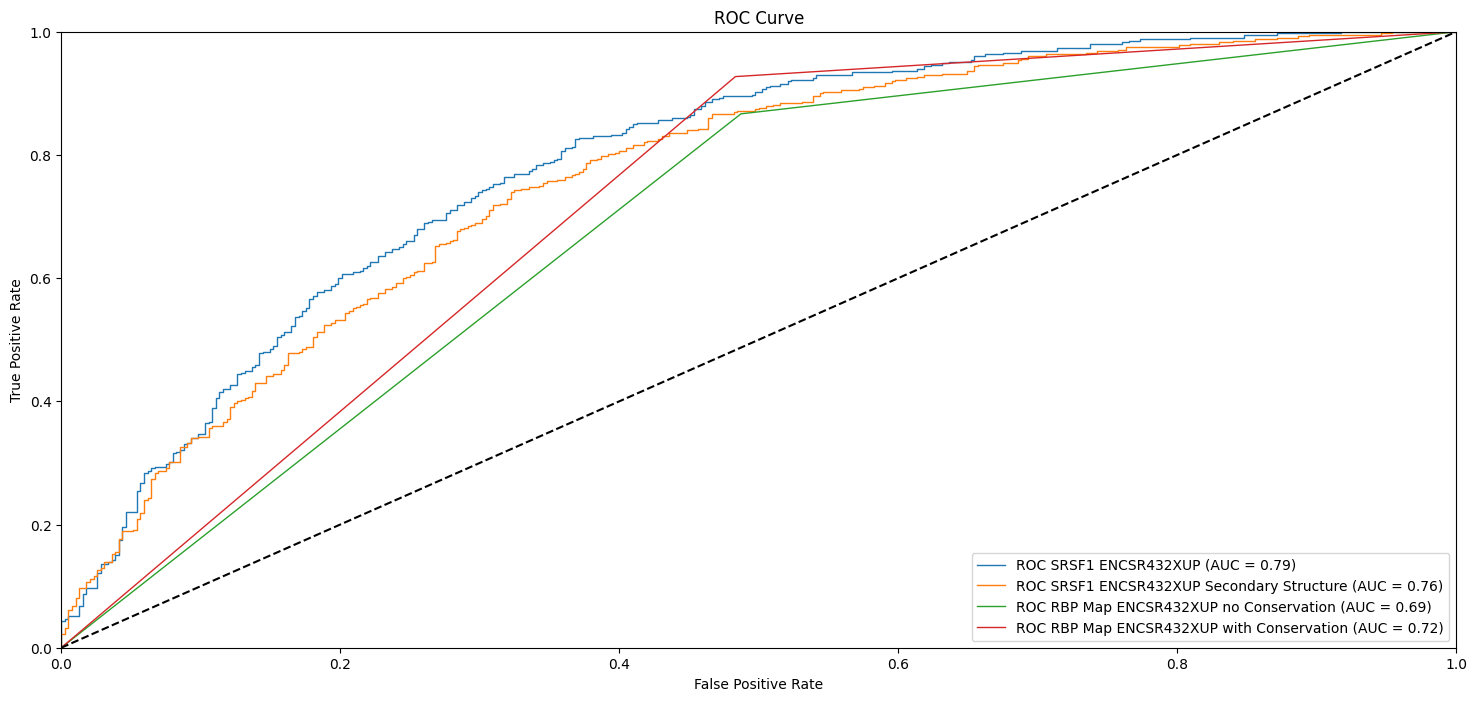

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR432XUP_model,
    SRSF1_ENCSR432XUP_test_features,
    SRSF1_ENCSR432XUP_test_labels,
    name=f"ROC SRSF1 ENCSR432XUP",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR432XUP_model_secondary,
    SRSF1_ENCSR432XUP_test_features_secondary,
    SRSF1_ENCSR432XUP_test_labels_secondary,
    name=f"ROC SRSF1 ENCSR432XUP Secondary Structure",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR432XUP_rbp_no_conservation,
    SRSF1_ENCSR432XUP_true_labels,
    name=f"ROC RBP Map ENCSR432XUP no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR432XUP_rbp_with_conservation,
    SRSF1_ENCSR432XUP_true_labels,
    name=f"ROC RBP Map ENCSR432XUP with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
SRSF1_ENCSR432XUP_weights = SRSF1_ENCSR432XUP_model.coef_[0]
SRSF1_ENCSR432XUP_A_weights = SRSF1_ENCSR432XUP_weights[::8]
SRSF1_ENCSR432XUP_a_weights = SRSF1_ENCSR432XUP_weights[4::8]
SRSF1_ENCSR432XUP_C_weights = SRSF1_ENCSR432XUP_weights[1::8]
SRSF1_ENCSR432XUP_c_weights = SRSF1_ENCSR432XUP_weights[5::8]
SRSF1_ENCSR432XUP_G_weights = SRSF1_ENCSR432XUP_weights[2::8]
SRSF1_ENCSR432XUP_g_weights = SRSF1_ENCSR432XUP_weights[6::8]
SRSF1_ENCSR432XUP_T_weights = SRSF1_ENCSR432XUP_weights[3::8]
SRSF1_ENCSR432XUP_t_weights = SRSF1_ENCSR432XUP_weights[7::8]

SRSF1_ENCSR432XUP_avg_weights = SRSF1_ENCSR432XUP_weights.reshape(-1, 8).mean(axis=1)
SRSF1_ENCSR432XUP_avg_uppercase_weights = SRSF1_ENCSR432XUP_weights.reshape(-1, 4).mean(axis=1)[::2]
SRSF1_ENCSR432XUP_avg_lowercase_weights = SRSF1_ENCSR432XUP_weights.reshape(-1, 4).mean(axis=1)[1::2]

SRSF1_ENCSR432XUP_max_weights = np.apply_along_axis(max_element, axis=1, arr=SRSF1_ENCSR432XUP_weights.reshape(-1, 8))
SRSF1_ENCSR432XUP_max_uppercase_weights = np.apply_along_axis(max_element, axis=1, arr=SRSF1_ENCSR432XUP_weights.reshape(-1, 4)[::2])
SRSF1_ENCSR432XUP_max_lowercase_weights = np.apply_along_axis(max_element, axis=1, arr=SRSF1_ENCSR432XUP_weights.reshape(-1, 4)[1::2])

print('Average weights mean is ', SRSF1_ENCSR432XUP_avg_weights.mean())
print('Average weights variance is ', SRSF1_ENCSR432XUP_avg_weights.var())

Average weights mean is  2.3018696324039745e-17
Average weights variance is  6.310540212325845e-35


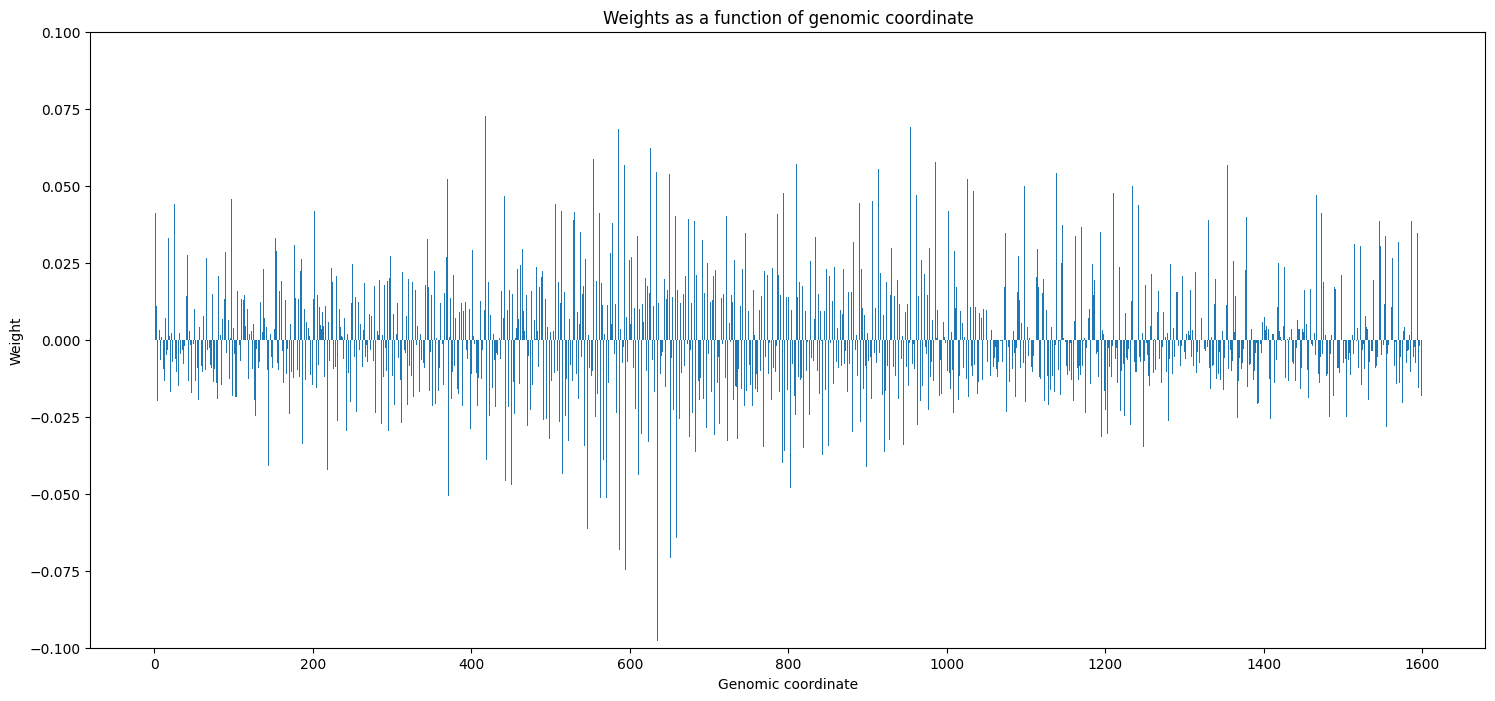

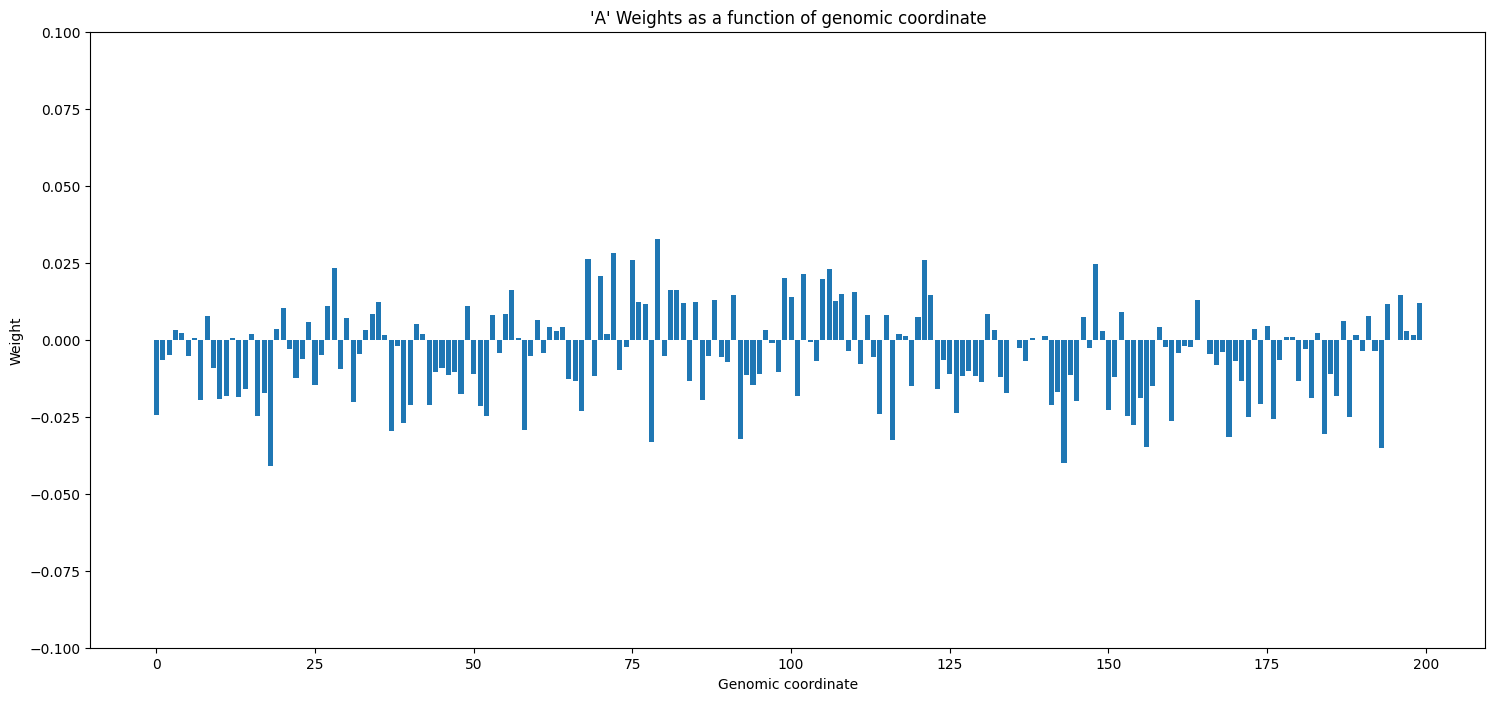

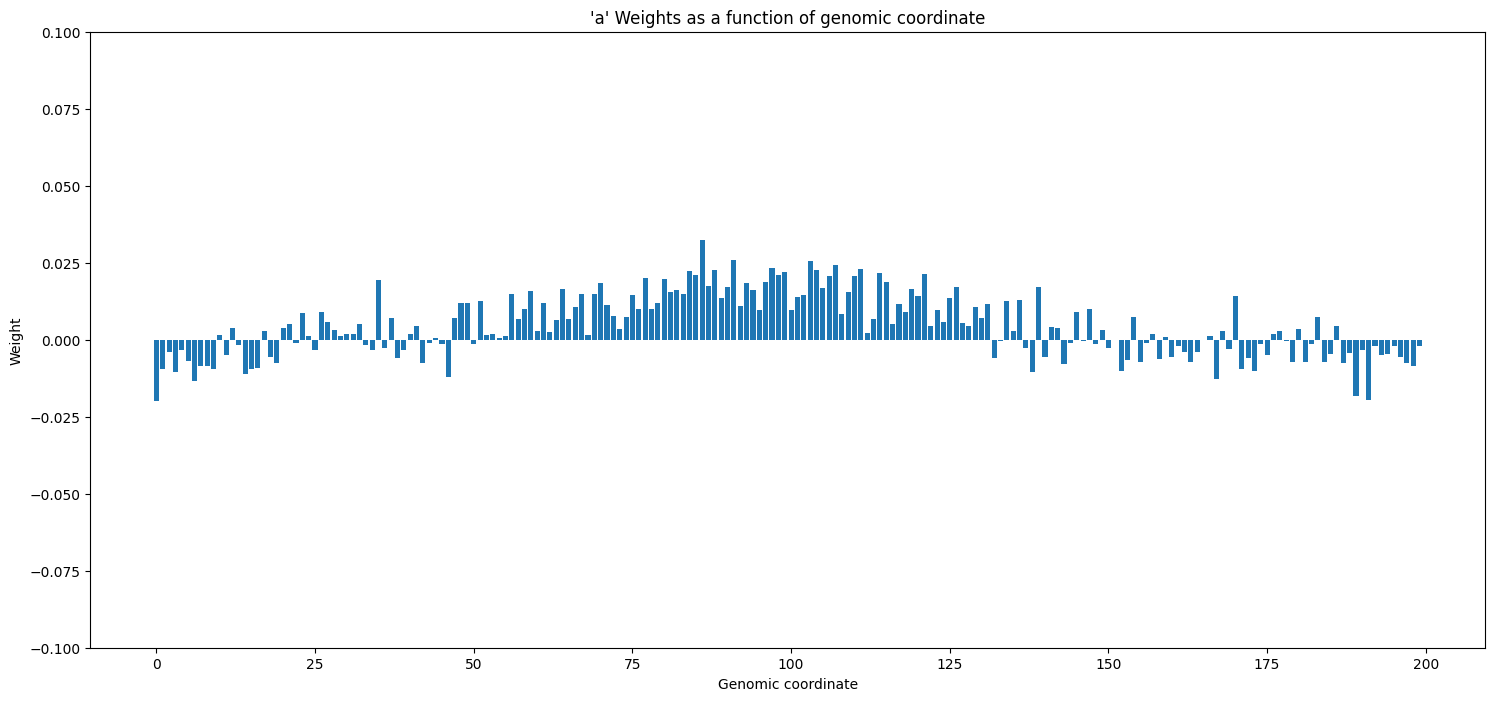

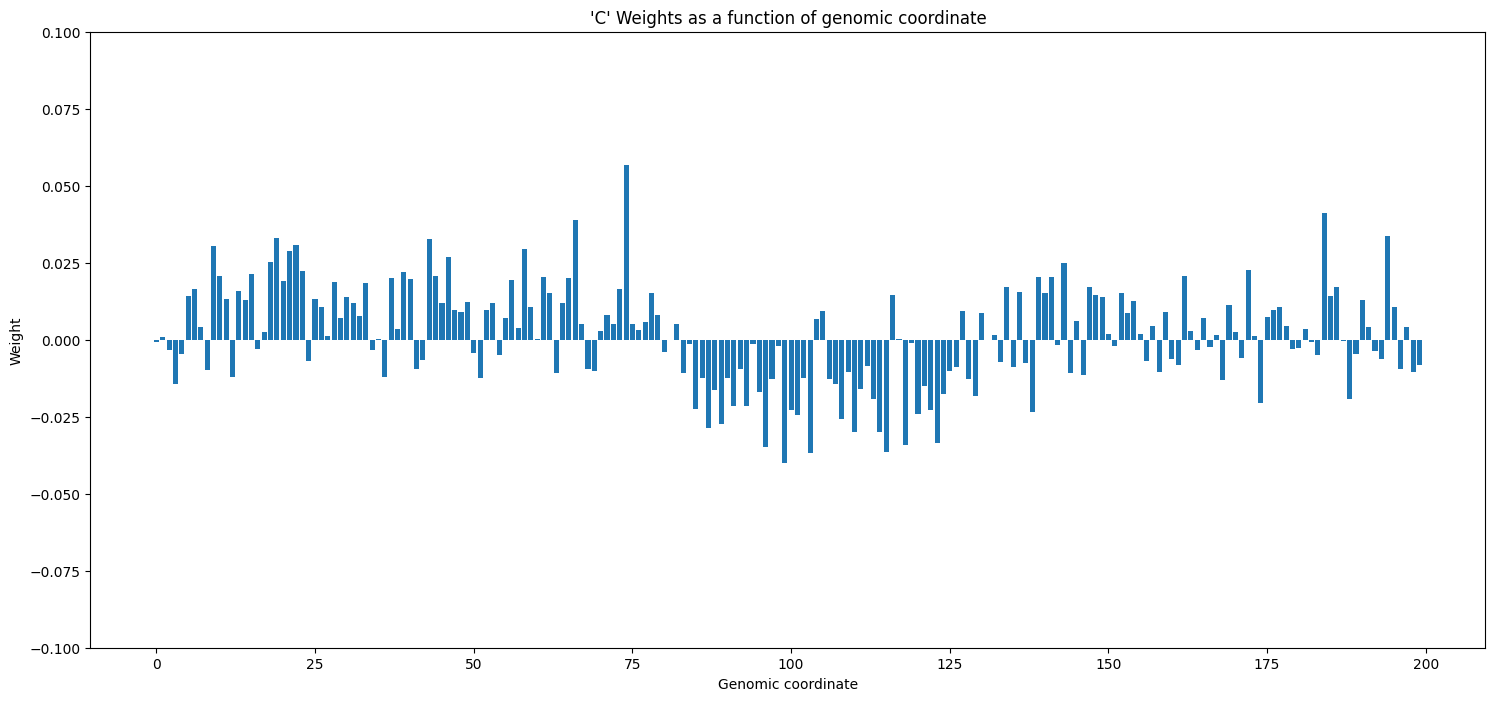

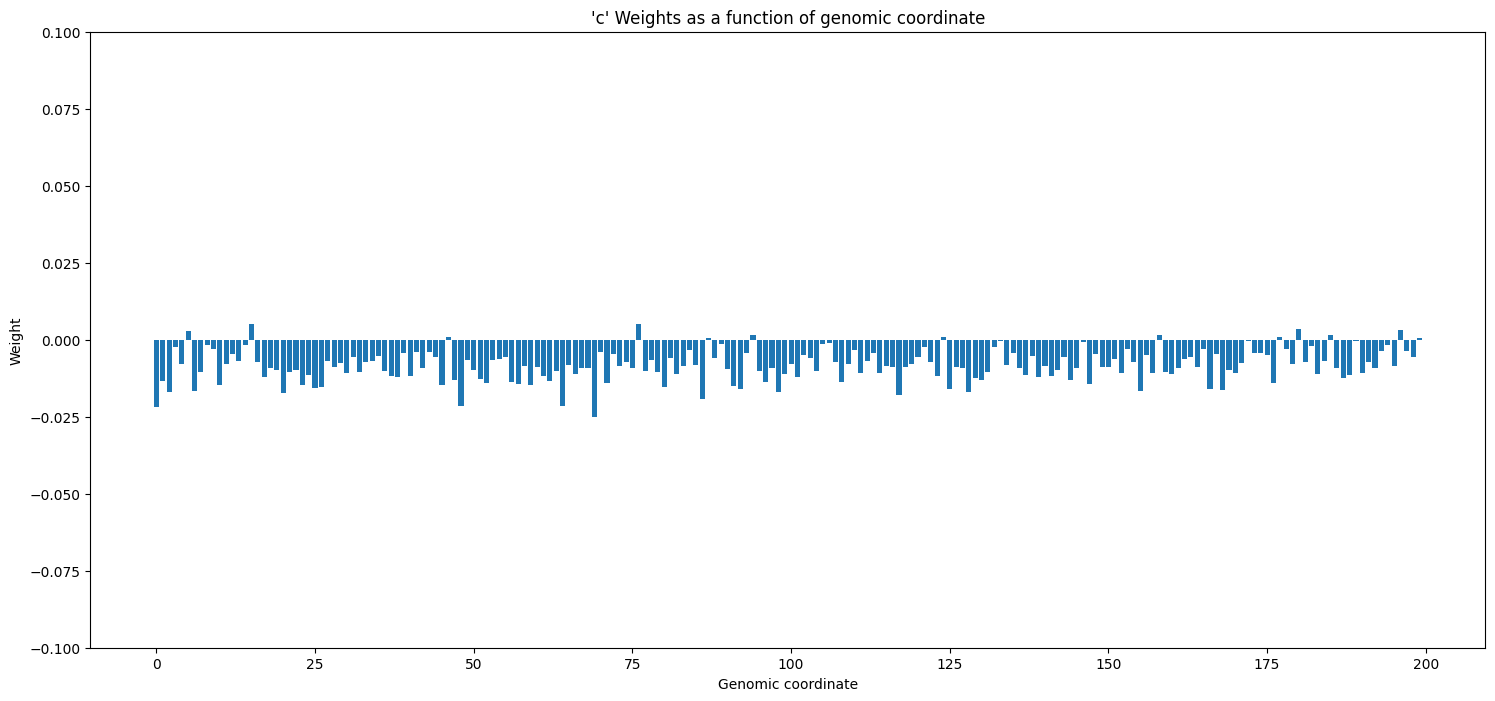

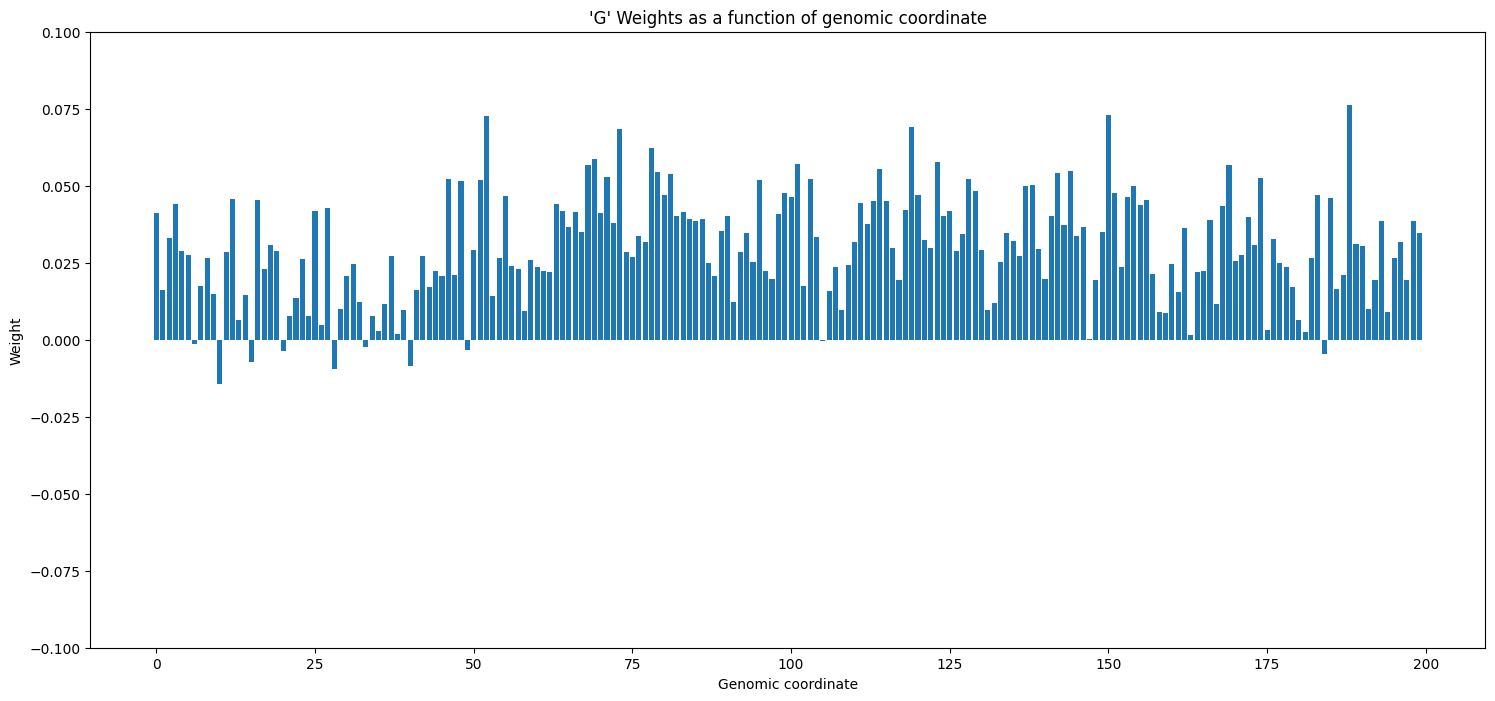

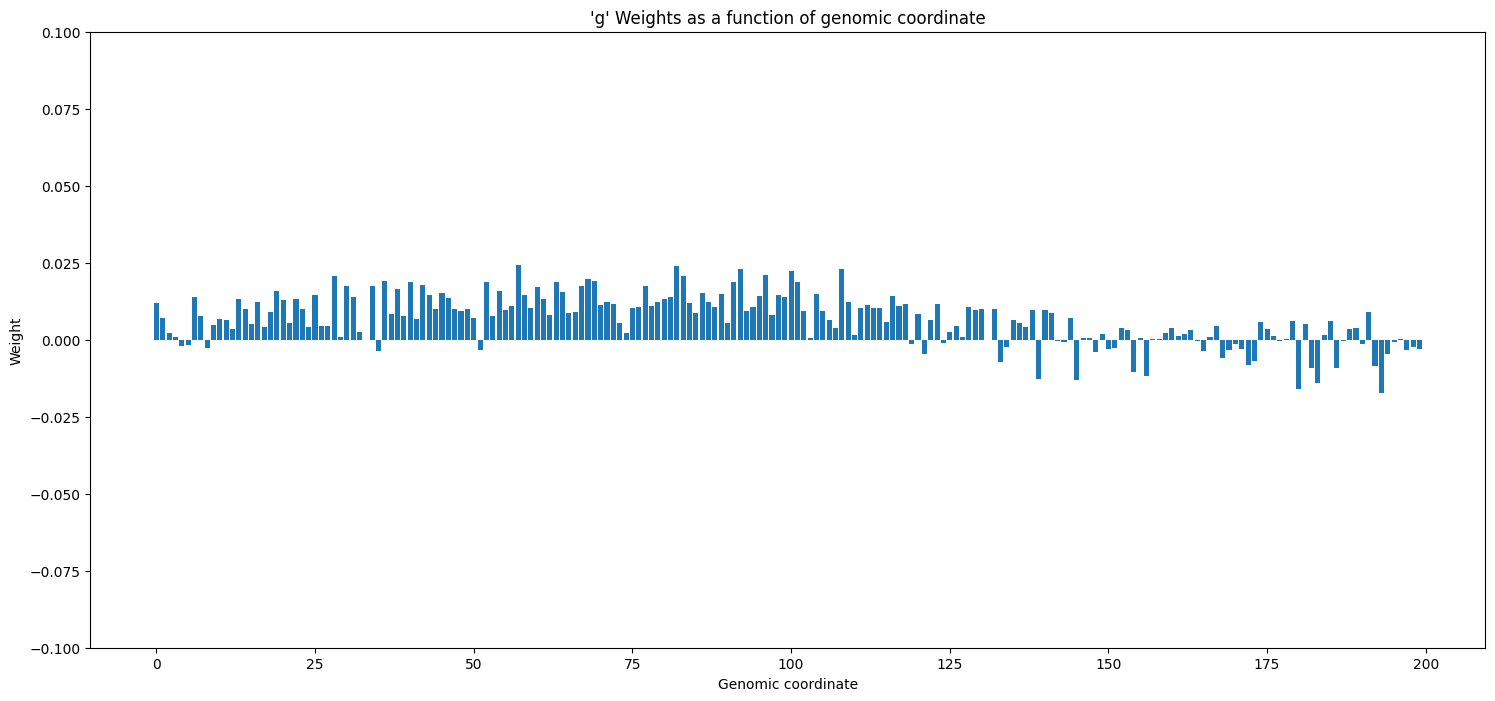

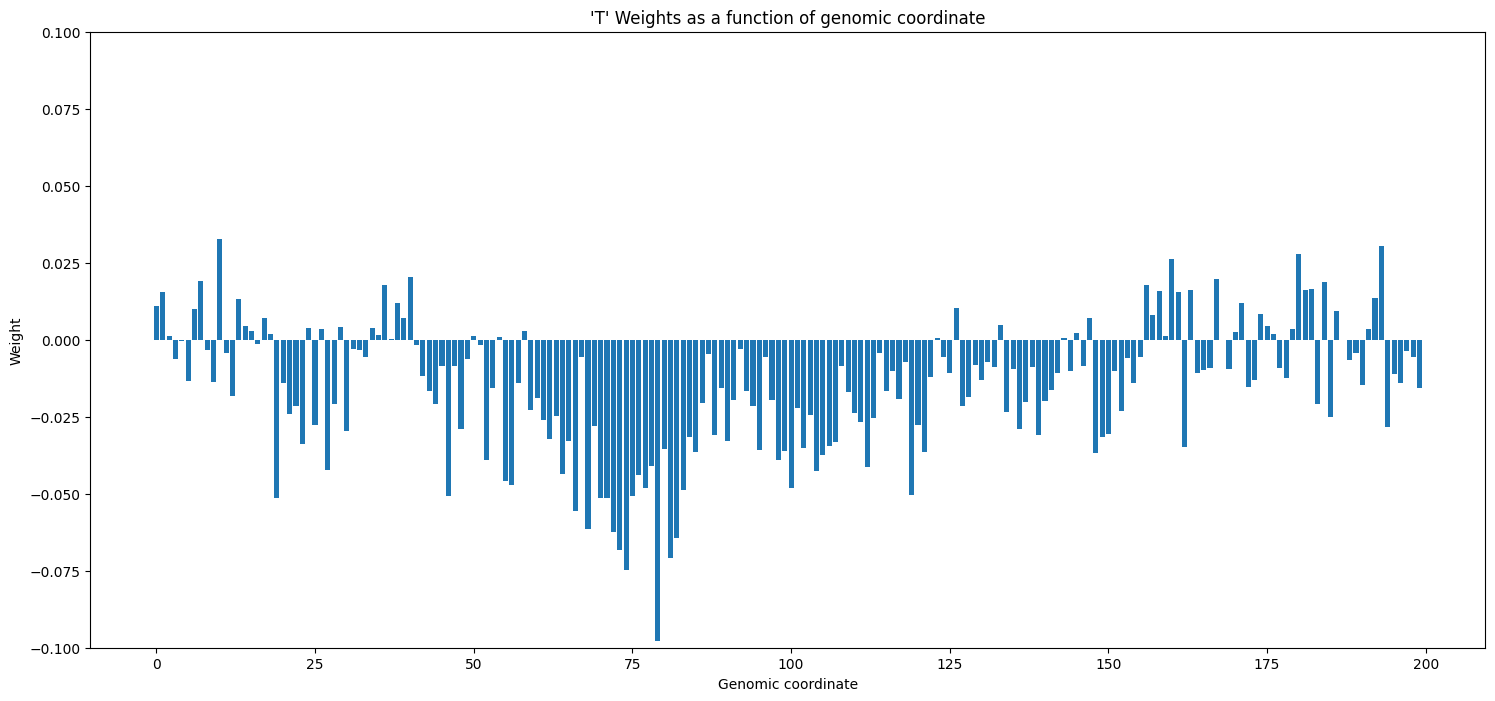

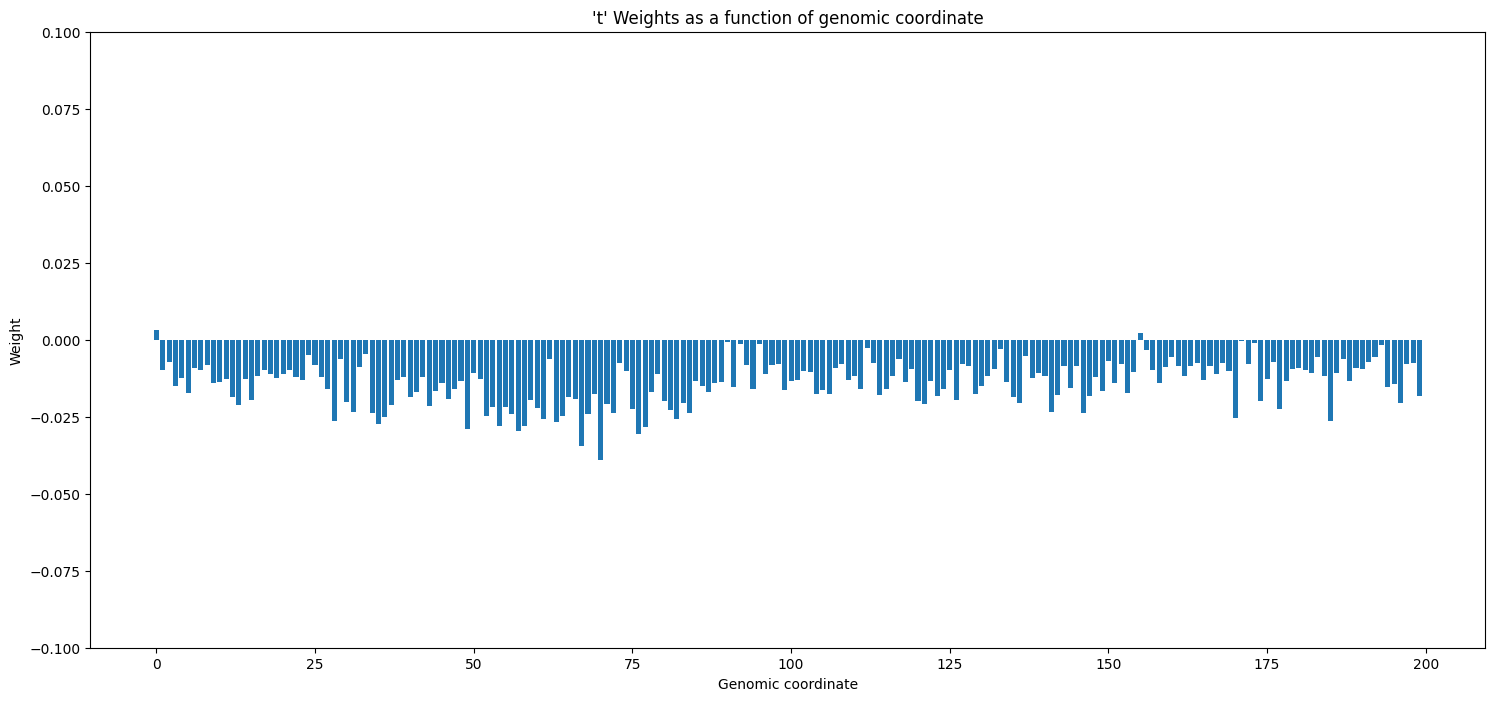

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_weights)), SRSF1_ENCSR432XUP_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_A_weights)), SRSF1_ENCSR432XUP_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_a_weights)), SRSF1_ENCSR432XUP_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_C_weights)), SRSF1_ENCSR432XUP_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_c_weights)), SRSF1_ENCSR432XUP_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_G_weights)), SRSF1_ENCSR432XUP_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_g_weights)), SRSF1_ENCSR432XUP_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_T_weights)), SRSF1_ENCSR432XUP_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_t_weights)), SRSF1_ENCSR432XUP_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

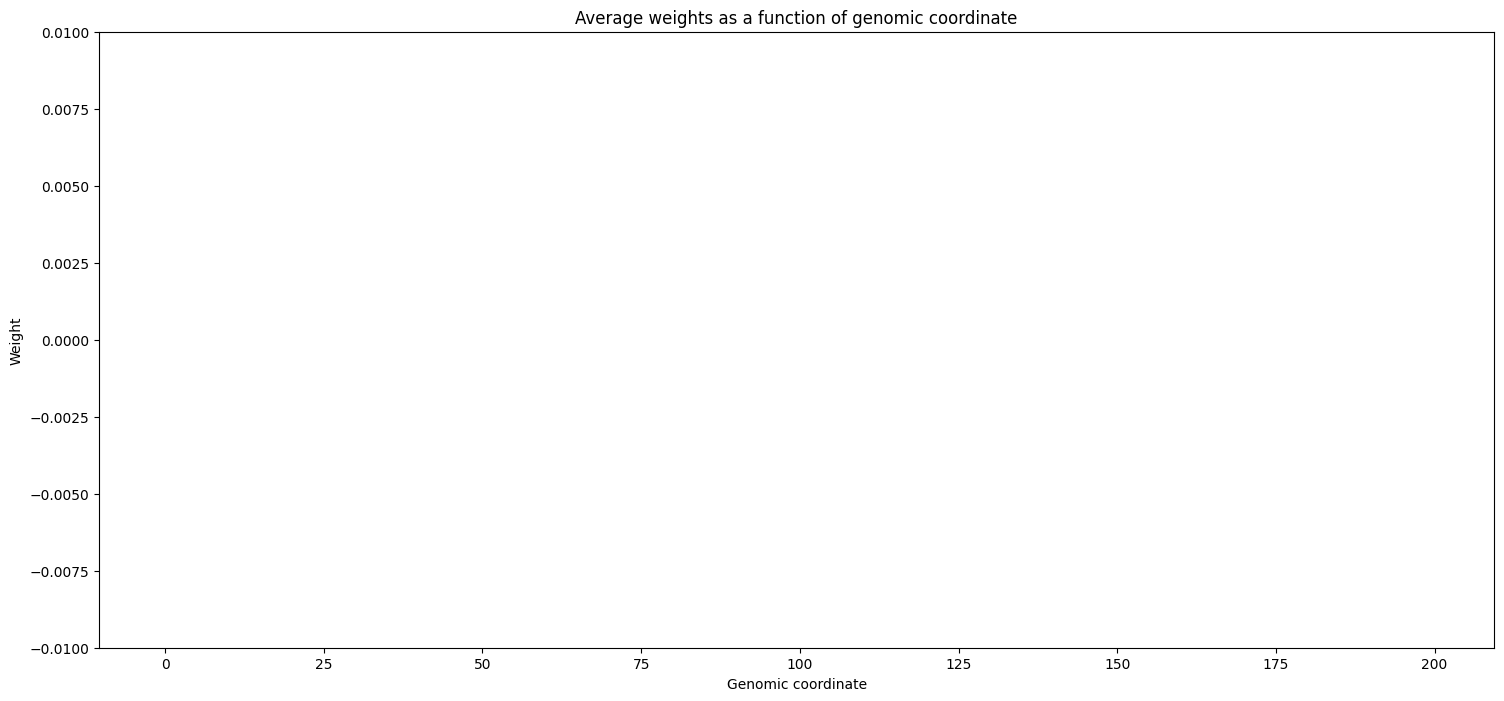

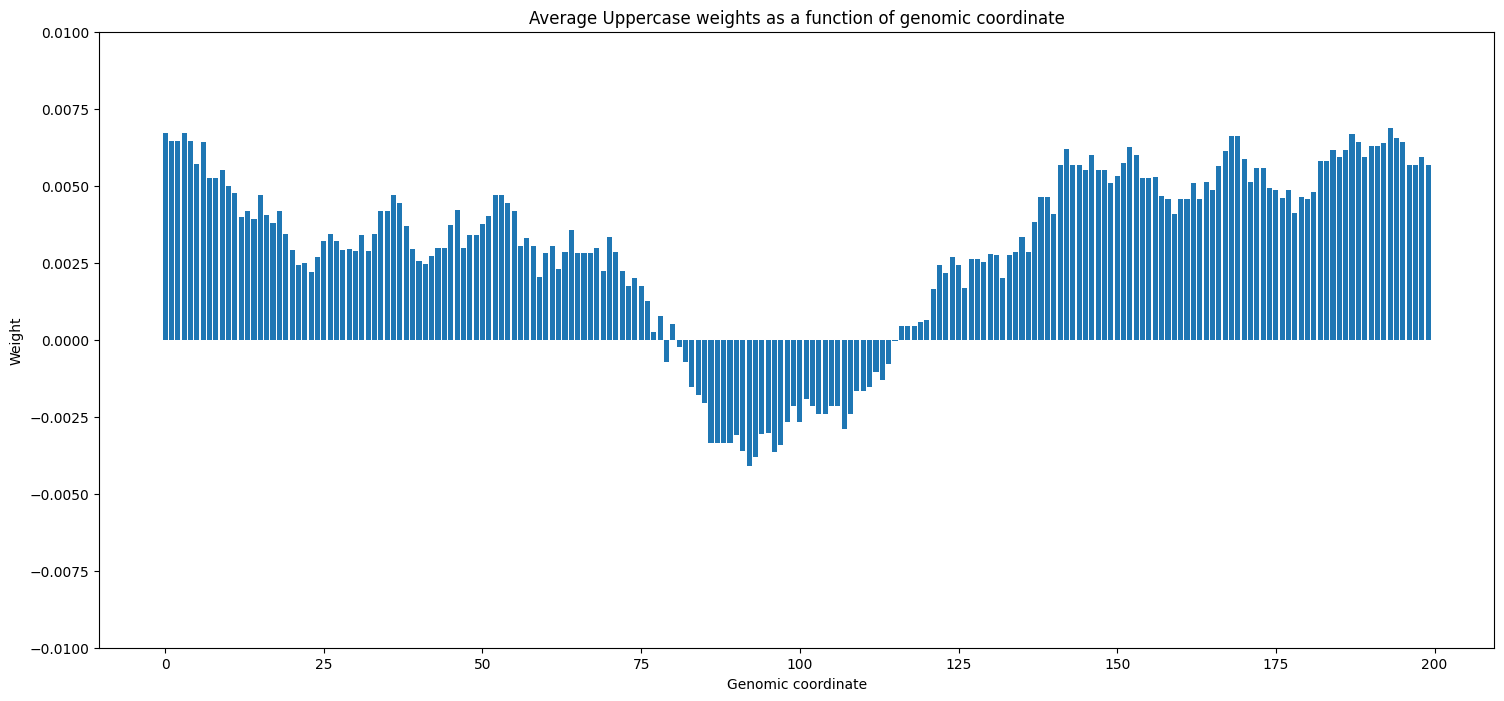

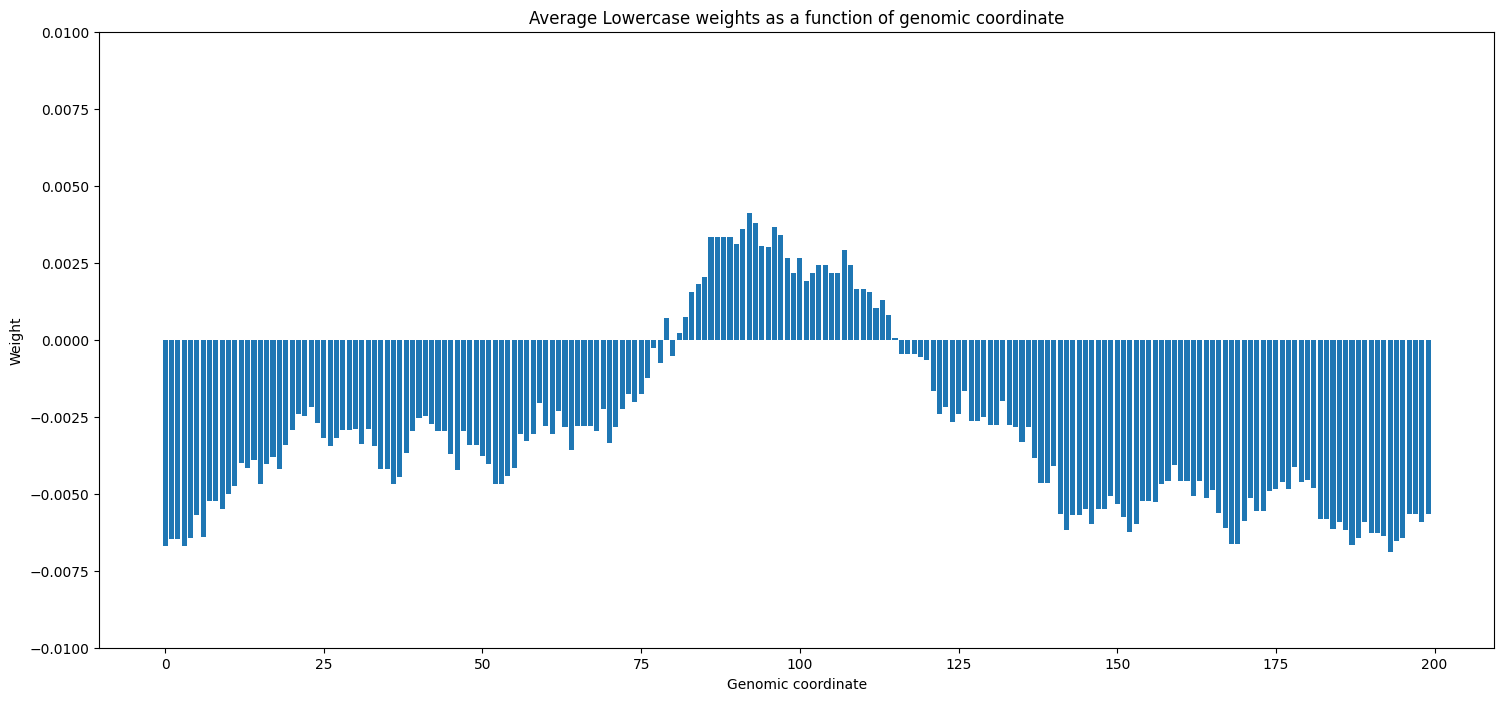

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_weights)), SRSF1_ENCSR432XUP_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.01, 0.01])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_uppercase_weights)), SRSF1_ENCSR432XUP_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.01, 0.01])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_lowercase_weights)), SRSF1_ENCSR432XUP_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.01, 0.01])
plt.show()

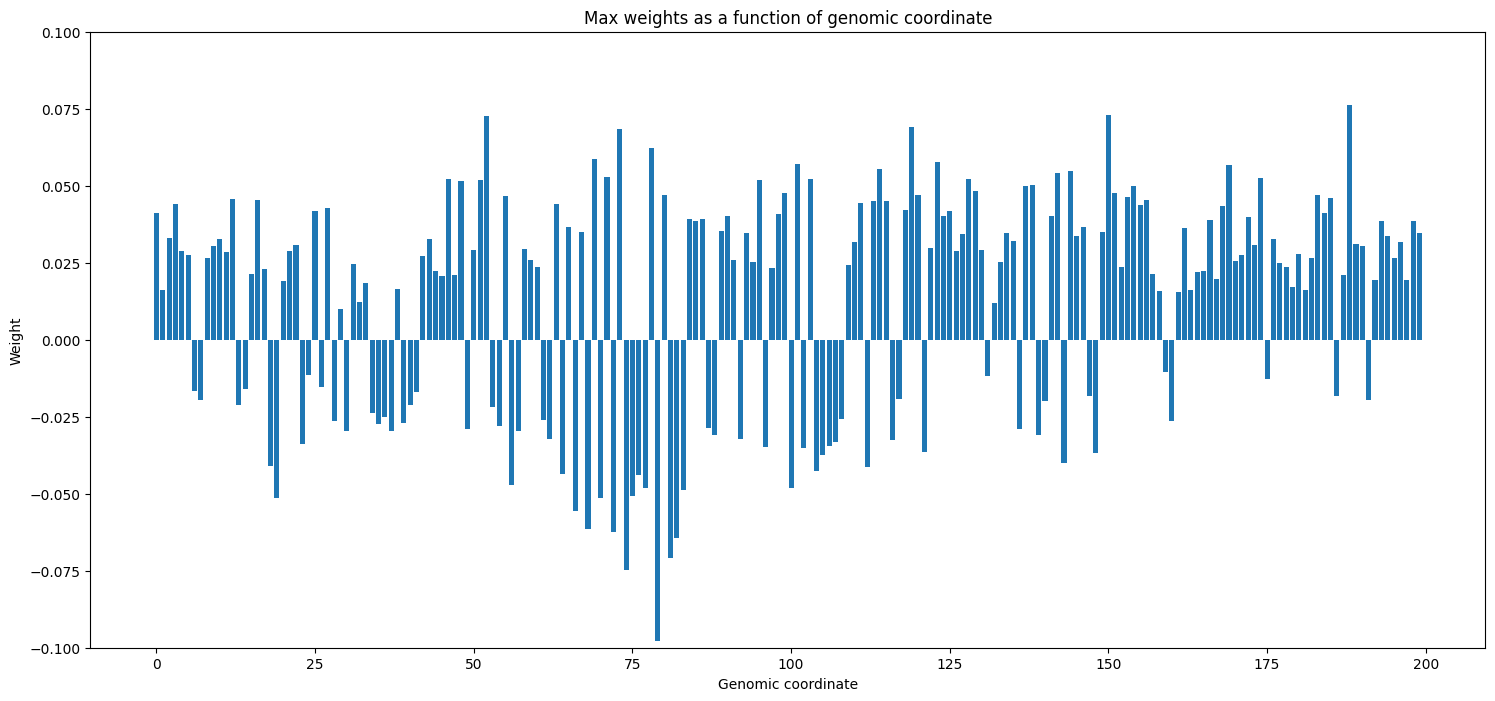

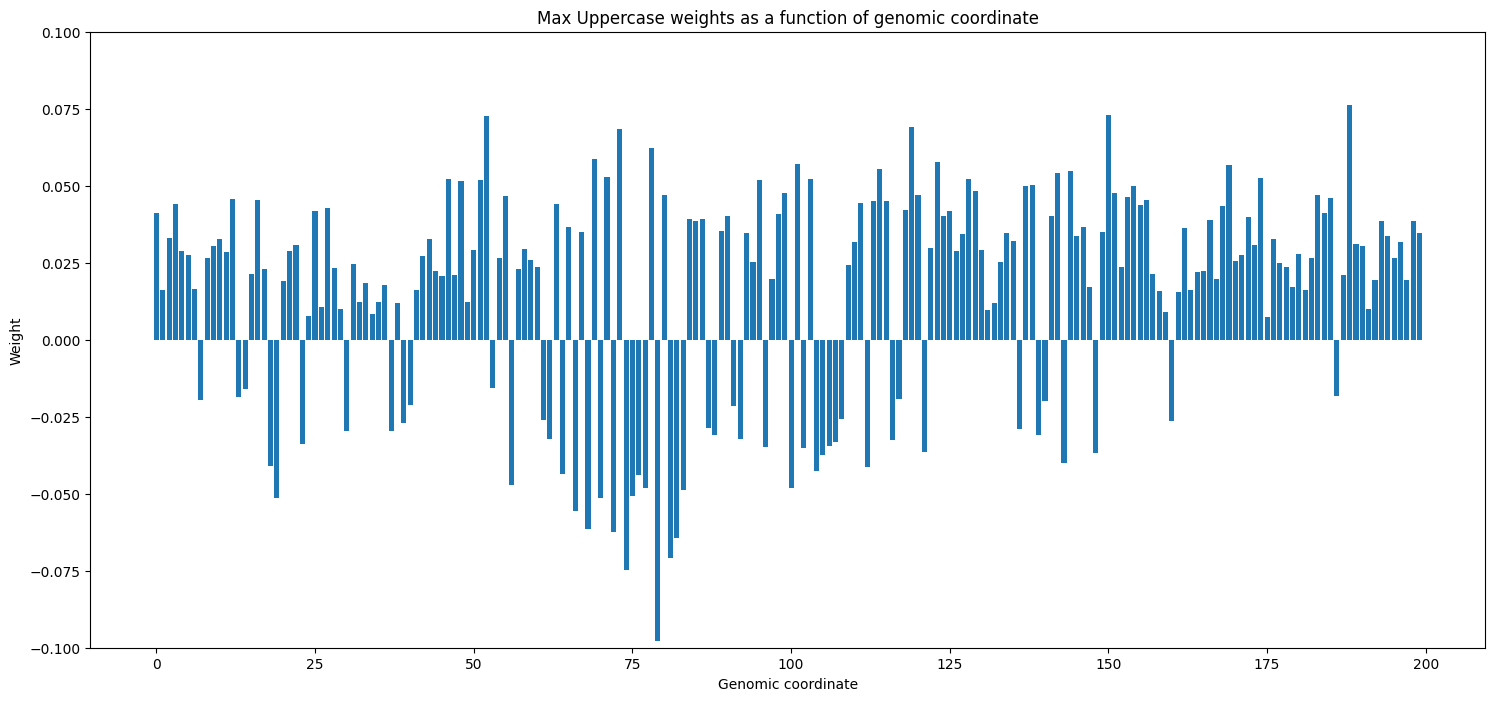

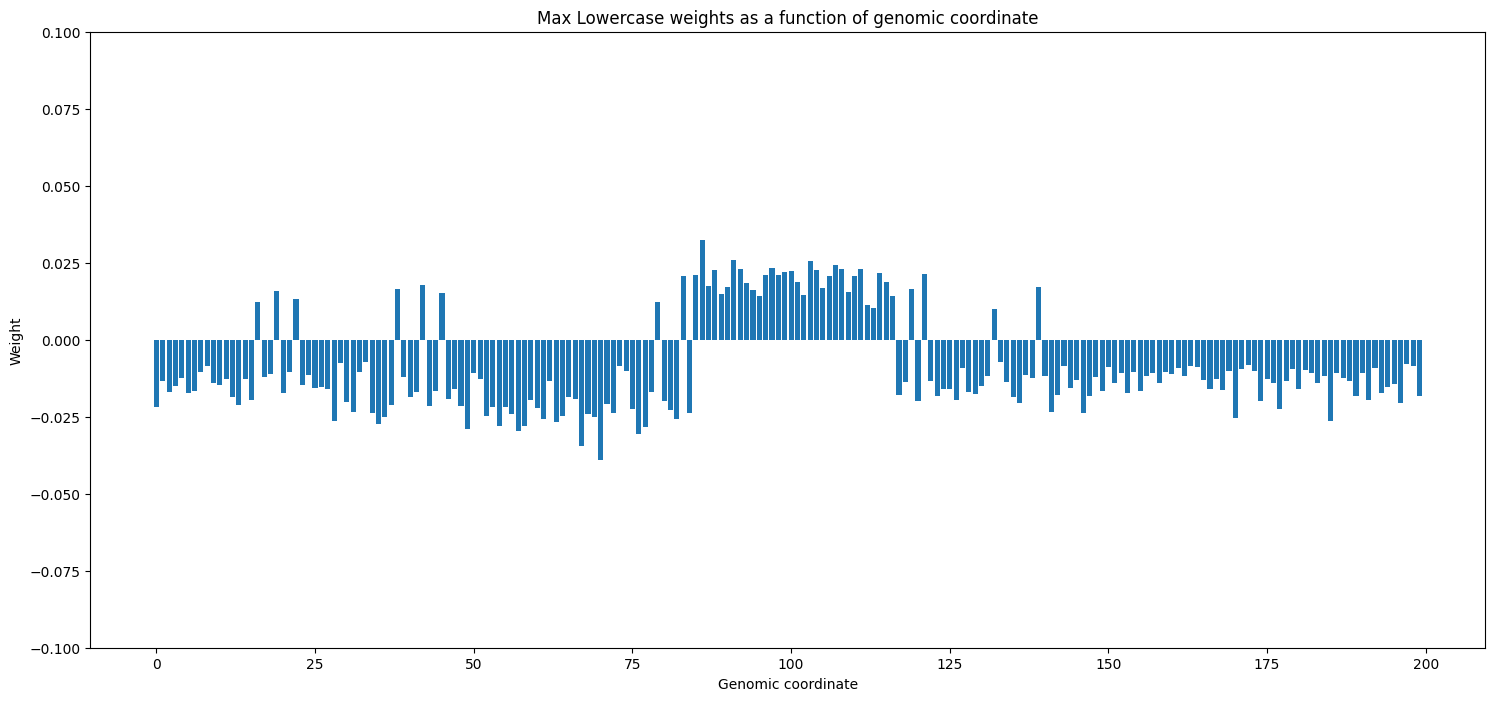

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_max_weights)), SRSF1_ENCSR432XUP_max_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Max weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_max_uppercase_weights)), SRSF1_ENCSR432XUP_max_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Max Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_max_lowercase_weights)), SRSF1_ENCSR432XUP_max_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Max Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

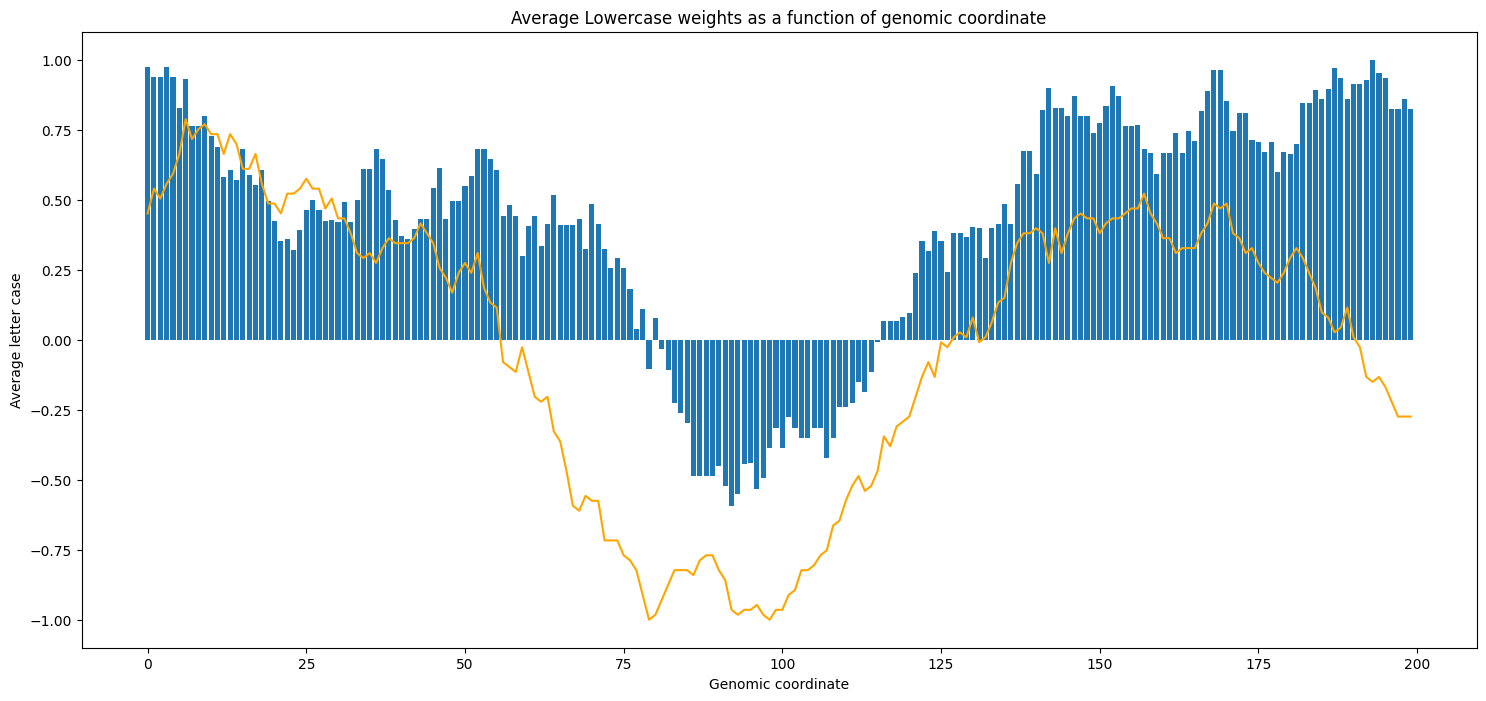

In [ ]:
SRSF1_ENCSR432XUP_mean_letter_case = np.array([calc_mean_letter_case(SRSF1_ENCSR432XUP_ds.iloc[:, i]) for i in range(200)])
SRSF1_ENCSR432XUP_mean_letter_case = (SRSF1_ENCSR432XUP_mean_letter_case - SRSF1_ENCSR432XUP_mean_letter_case.mean())
SRSF1_ENCSR432XUP_mean_letter_case = SRSF1_ENCSR432XUP_mean_letter_case / max(abs(SRSF1_ENCSR432XUP_mean_letter_case))
normalized_SRSF1_ENCSR432XUP_avg_uppercase_weights = SRSF1_ENCSR432XUP_avg_uppercase_weights / max(abs(SRSF1_ENCSR432XUP_avg_uppercase_weights))

plt.figure(figsize=(18, 8))
plt.plot(range(len(SRSF1_ENCSR432XUP_mean_letter_case)), SRSF1_ENCSR432XUP_mean_letter_case, color='orange')
plt.bar(range(len(normalized_SRSF1_ENCSR432XUP_avg_uppercase_weights)), normalized_SRSF1_ENCSR432XUP_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Average letter case')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.show()

## ENCSR321PWZ

### Import Dataset and fit model

In [ ]:
SRSF1_ENCSR321PWZ_ds = import_dataset()
[SRSF1_ENCSR321PWZ_train, SRSF1_ENCSR321PWZ_test] = train_test_split(SRSF1_ENCSR321PWZ_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR321PWZ_train_features = pd.get_dummies(SRSF1_ENCSR321PWZ_train.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_train_labels = SRSF1_ENCSR321PWZ_train['label'].to_numpy()

SRSF1_ENCSR321PWZ_test_features = pd.get_dummies(SRSF1_ENCSR321PWZ_test.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_test_labels = SRSF1_ENCSR321PWZ_test['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR321PWZ_model = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR321PWZ_model = SRSF1_ENCSR321PWZ_model.fit(SRSF1_ENCSR321PWZ_train_features, SRSF1_ENCSR321PWZ_train_labels)

Saving SRSF1_ENCSR321PWZ_dataset.txt to SRSF1_ENCSR321PWZ_dataset.txt
User uploaded file "SRSF1_ENCSR321PWZ_dataset.txt" with length 816000 bytes


### Import RBPmap predictions

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

SRSF1_ENCSR321PWZ_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
SRSF1_ENCSR321PWZ_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving SRSF1_ENCSR321PWZ_rbp_predictions_no_conservation.txt to SRSF1_ENCSR321PWZ_rbp_predictions_no_conservation.txt
User uploaded file "SRSF1_ENCSR321PWZ_rbp_predictions_no_conservation.txt" with length 20013 bytes


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

SRSF1_ENCSR321PWZ_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving SRSF1_ENCSR321PWZ_rbp_predictions_with_conservation.txt to SRSF1_ENCSR321PWZ_rbp_predictions_with_conservation.txt
User uploaded file "SRSF1_ENCSR321PWZ_rbp_predictions_with_conservation.txt" with length 20013 bytes


### Display results

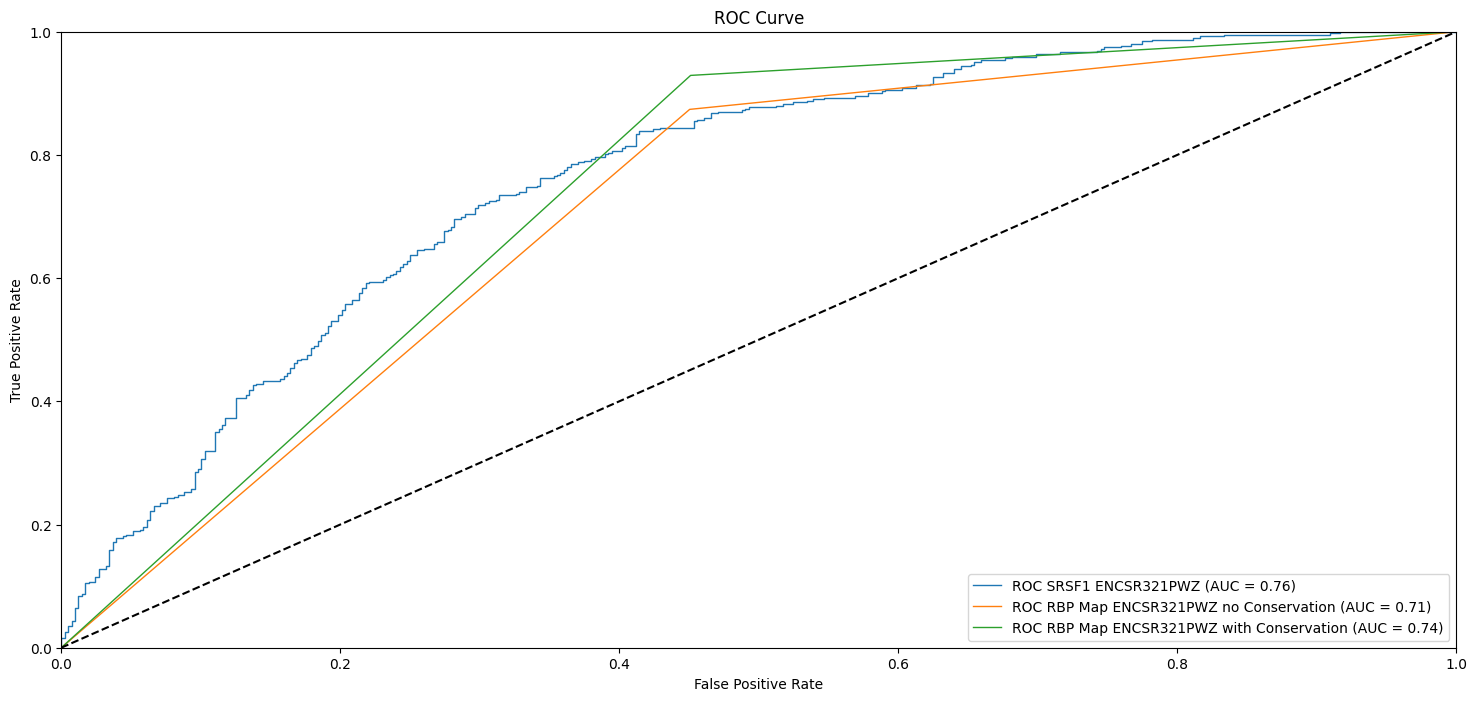

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR321PWZ_model,
    SRSF1_ENCSR321PWZ_test_features,
    SRSF1_ENCSR321PWZ_test_labels,
    name=f"ROC SRSF1 ENCSR321PWZ",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR321PWZ_rbp_no_conservation,
    SRSF1_ENCSR321PWZ_true_labels,
    name=f"ROC RBP Map ENCSR321PWZ no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR321PWZ_rbp_with_conservation,
    SRSF1_ENCSR321PWZ_true_labels,
    name=f"ROC RBP Map ENCSR321PWZ with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
SRSF1_ENCSR321PWZ_weights = SRSF1_ENCSR321PWZ_model.coef_[0]
SRSF1_ENCSR321PWZ_A_weights = SRSF1_ENCSR321PWZ_weights[::8]
SRSF1_ENCSR321PWZ_a_weights = SRSF1_ENCSR321PWZ_weights[4::8]
SRSF1_ENCSR321PWZ_C_weights = SRSF1_ENCSR321PWZ_weights[1::8]
SRSF1_ENCSR321PWZ_c_weights = SRSF1_ENCSR321PWZ_weights[5::8]
SRSF1_ENCSR321PWZ_G_weights = SRSF1_ENCSR321PWZ_weights[2::8]
SRSF1_ENCSR321PWZ_g_weights = SRSF1_ENCSR321PWZ_weights[6::8]
SRSF1_ENCSR321PWZ_T_weights = SRSF1_ENCSR321PWZ_weights[3::8]
SRSF1_ENCSR321PWZ_t_weights = SRSF1_ENCSR321PWZ_weights[7::8]

SRSF1_ENCSR321PWZ_avg_weights = SRSF1_ENCSR321PWZ_weights.reshape(-1, 8).mean(axis=1)
SRSF1_ENCSR321PWZ_avg_uppercase_weights = SRSF1_ENCSR321PWZ_weights.reshape(-1, 4).mean(axis=1)[::2]
SRSF1_ENCSR321PWZ_avg_lowercase_weights = SRSF1_ENCSR321PWZ_weights.reshape(-1, 4).mean(axis=1)[1::2]

SRSF1_ENCSR321PWZ_max_uppercase_weights = np.apply_along_axis(max_element, axis=1, arr=SRSF1_ENCSR321PWZ_weights.reshape(-1, 4)[::2])
SRSF1_ENCSR321PWZ_max_lowercase_weights = np.apply_along_axis(max_element, axis=1, arr=SRSF1_ENCSR321PWZ_weights.reshape(-1, 4)[1::2])

print('Average weights mean is ', SRSF1_ENCSR321PWZ_avg_weights.mean())
print('Average weights variance is ', SRSF1_ENCSR321PWZ_avg_weights.var())

Average weights mean is  1.9766089806583232e-17
Average weights variance is  7.727104944614765e-35


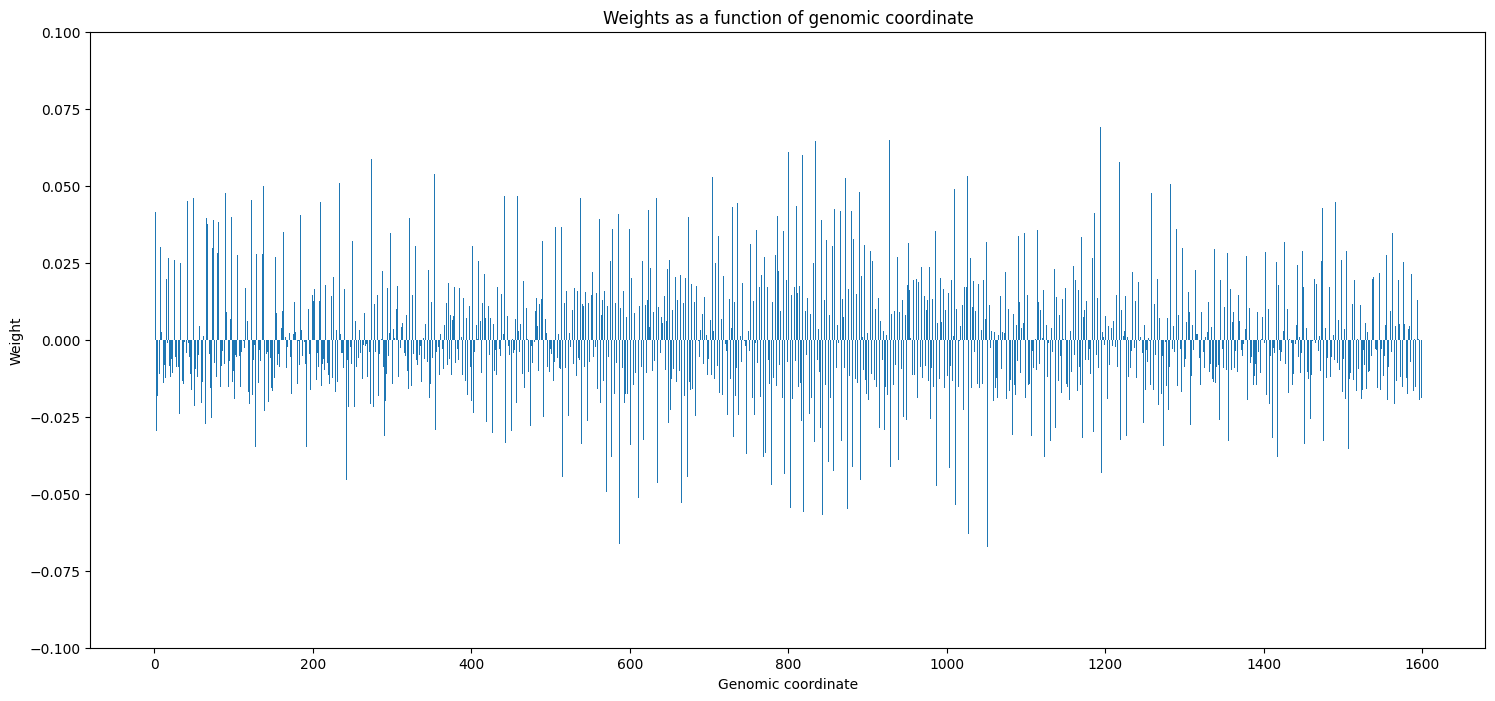

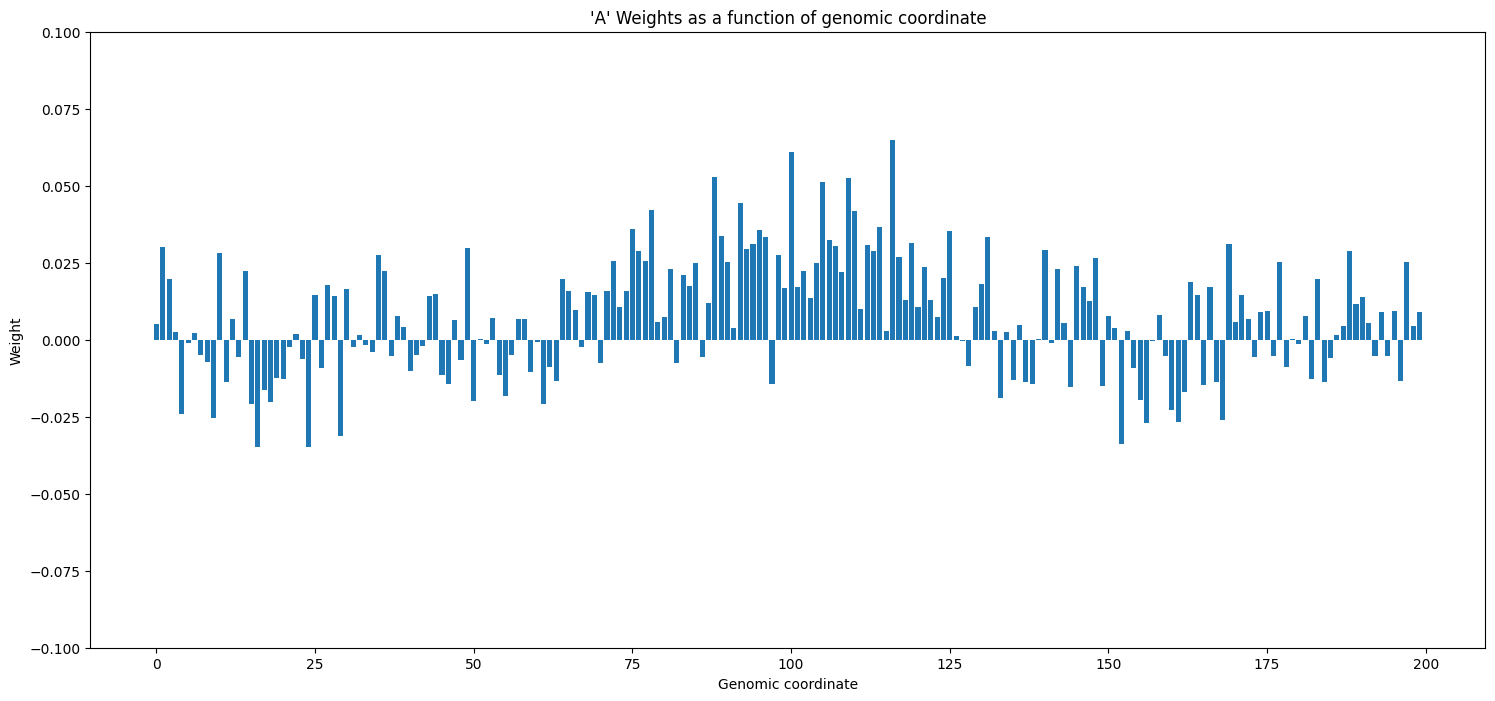

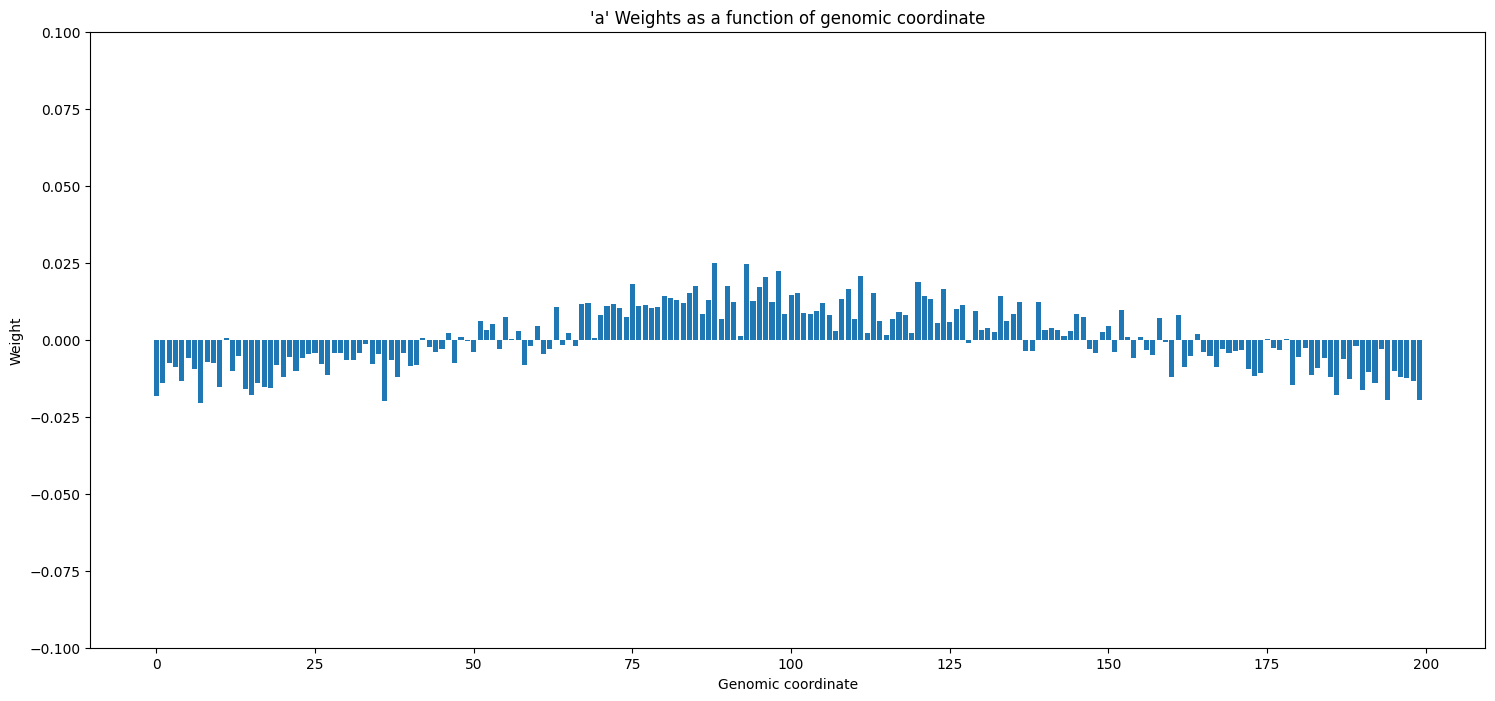

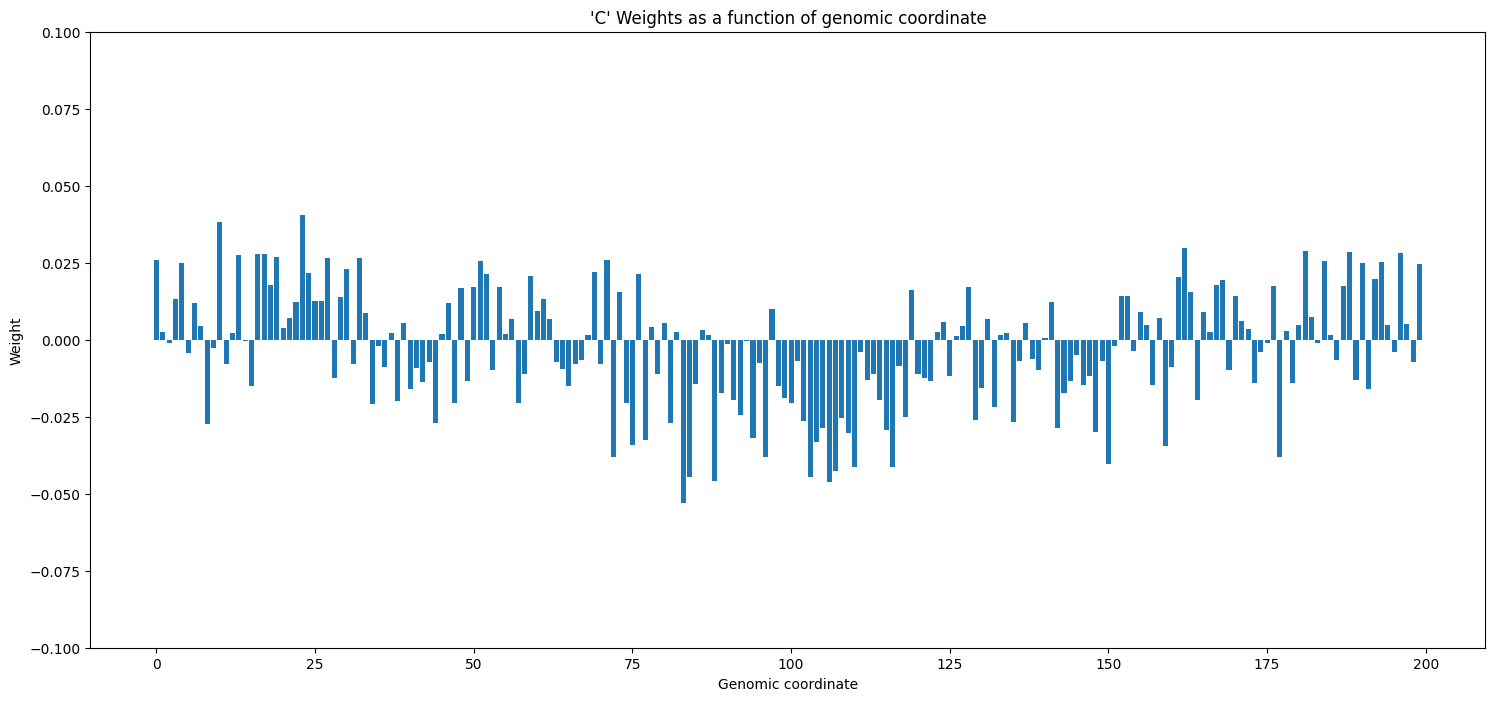

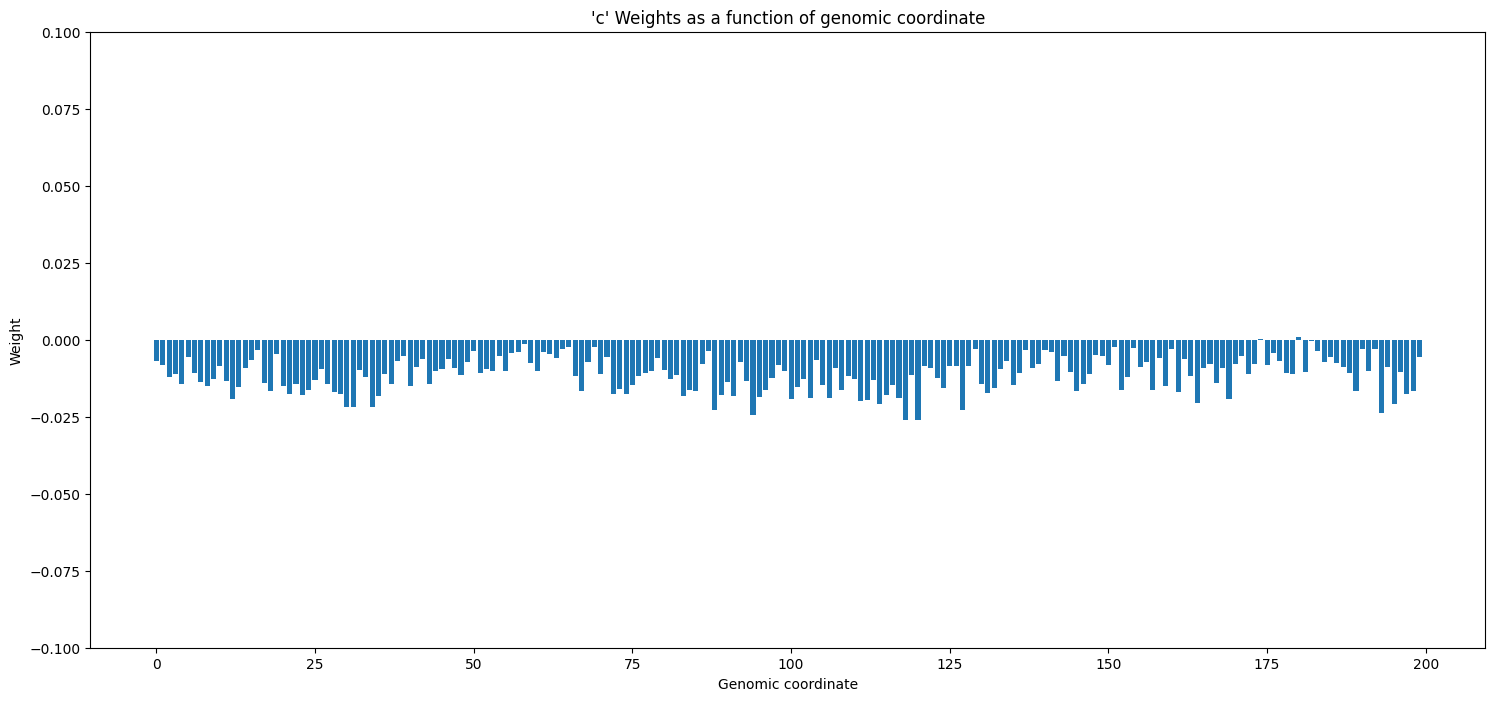

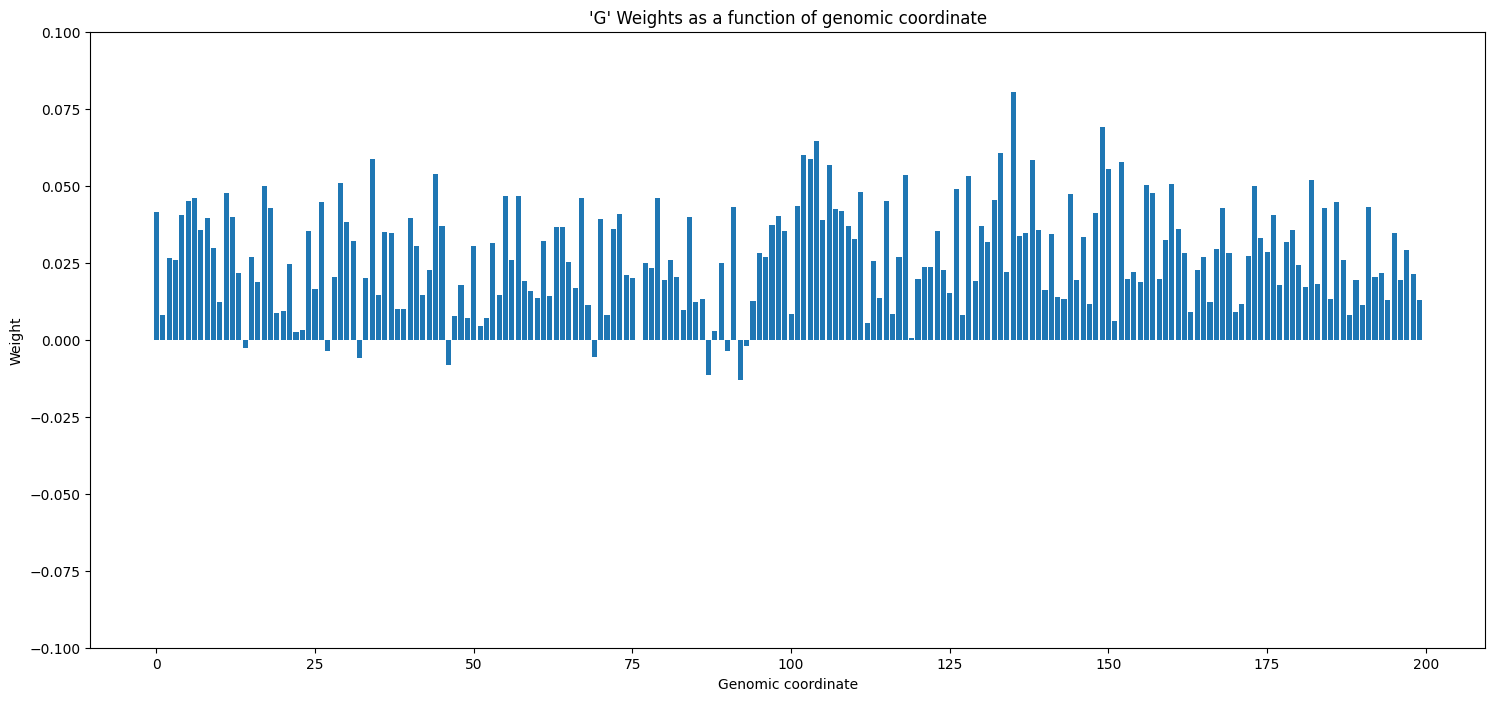

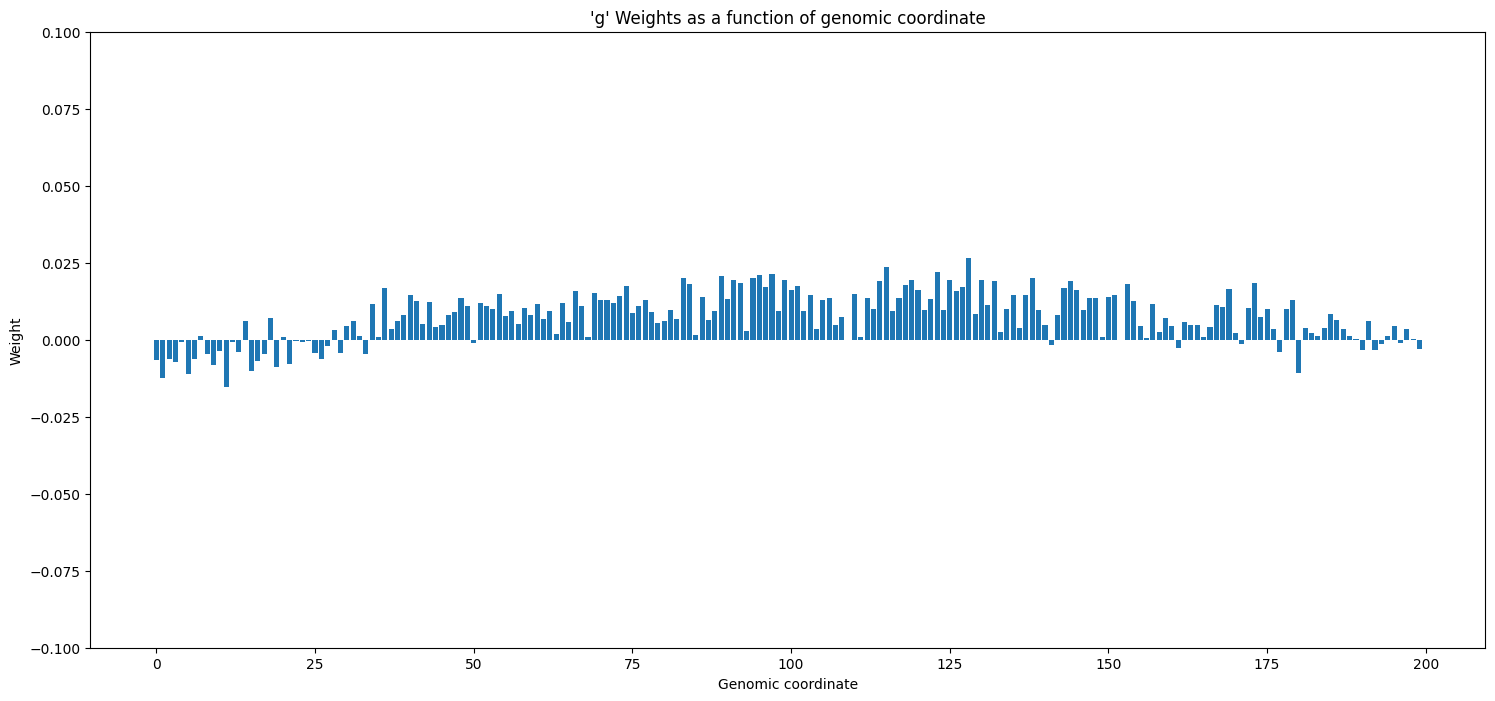

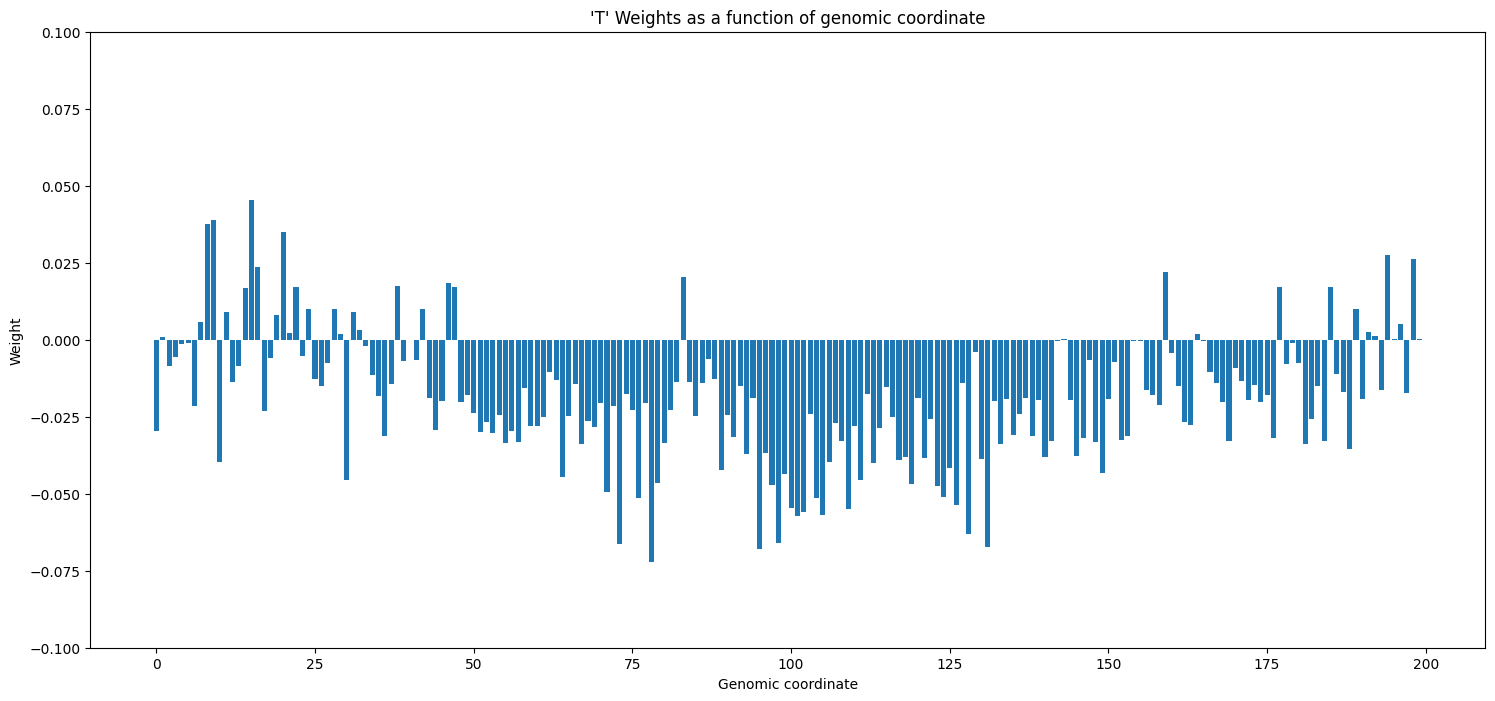

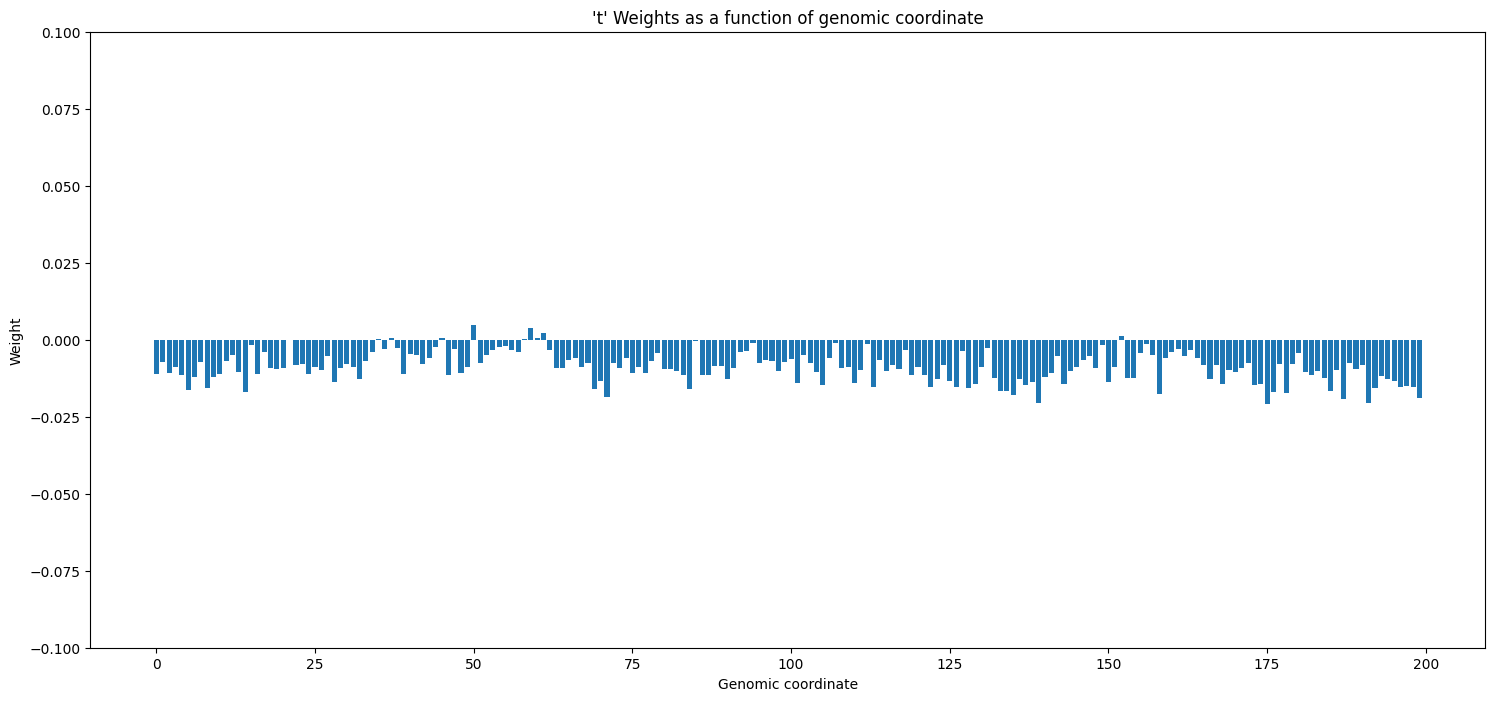

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_weights)), SRSF1_ENCSR321PWZ_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_A_weights)), SRSF1_ENCSR321PWZ_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_a_weights)), SRSF1_ENCSR321PWZ_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_C_weights)), SRSF1_ENCSR321PWZ_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_c_weights)), SRSF1_ENCSR321PWZ_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_G_weights)), SRSF1_ENCSR321PWZ_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_g_weights)), SRSF1_ENCSR321PWZ_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_T_weights)), SRSF1_ENCSR321PWZ_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_t_weights)), SRSF1_ENCSR321PWZ_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

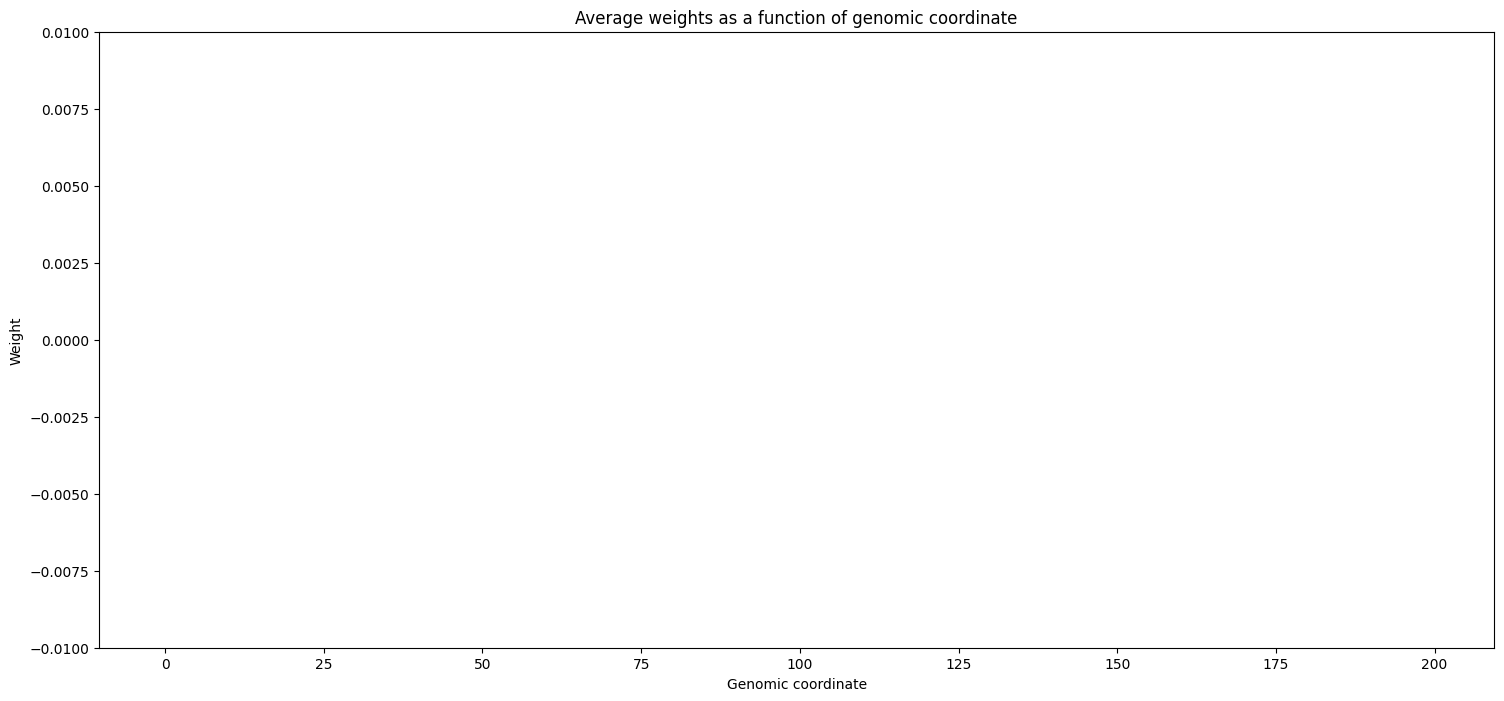

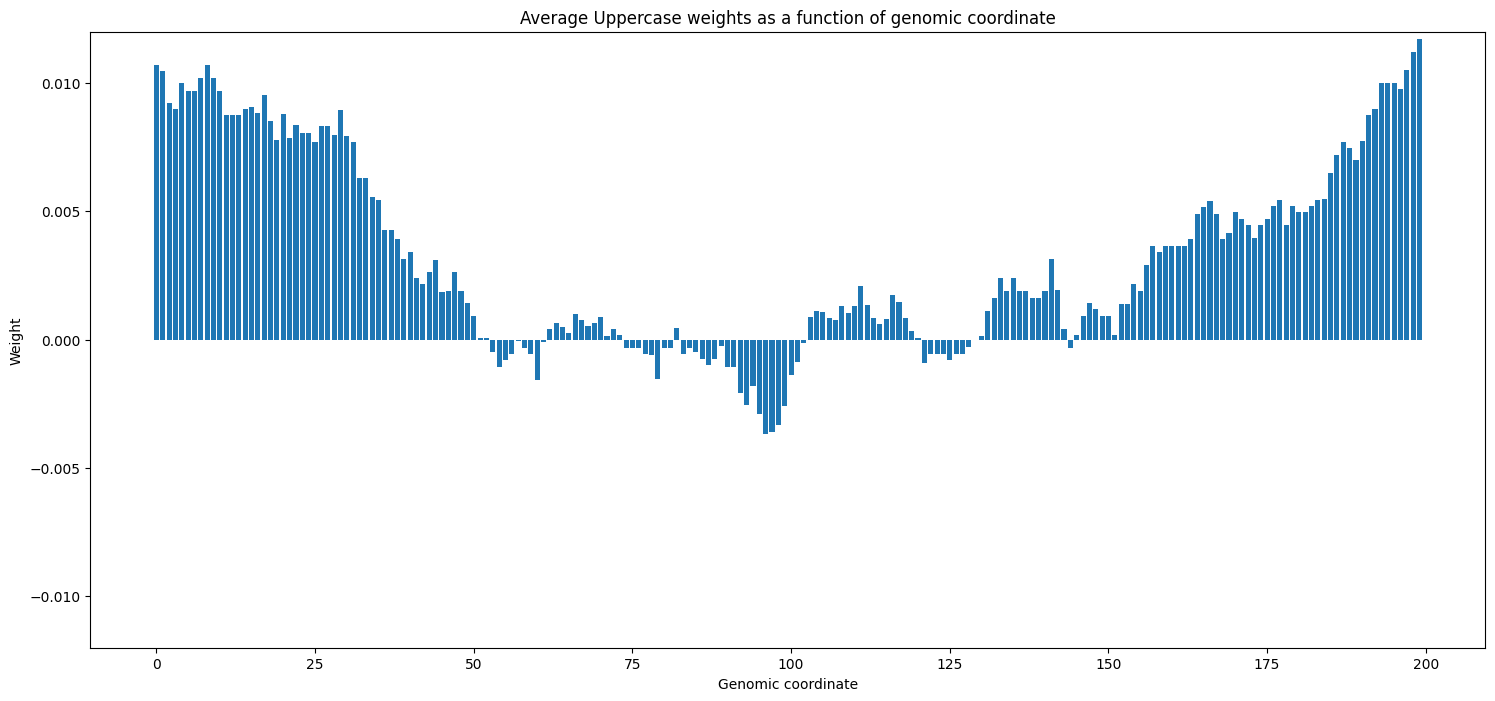

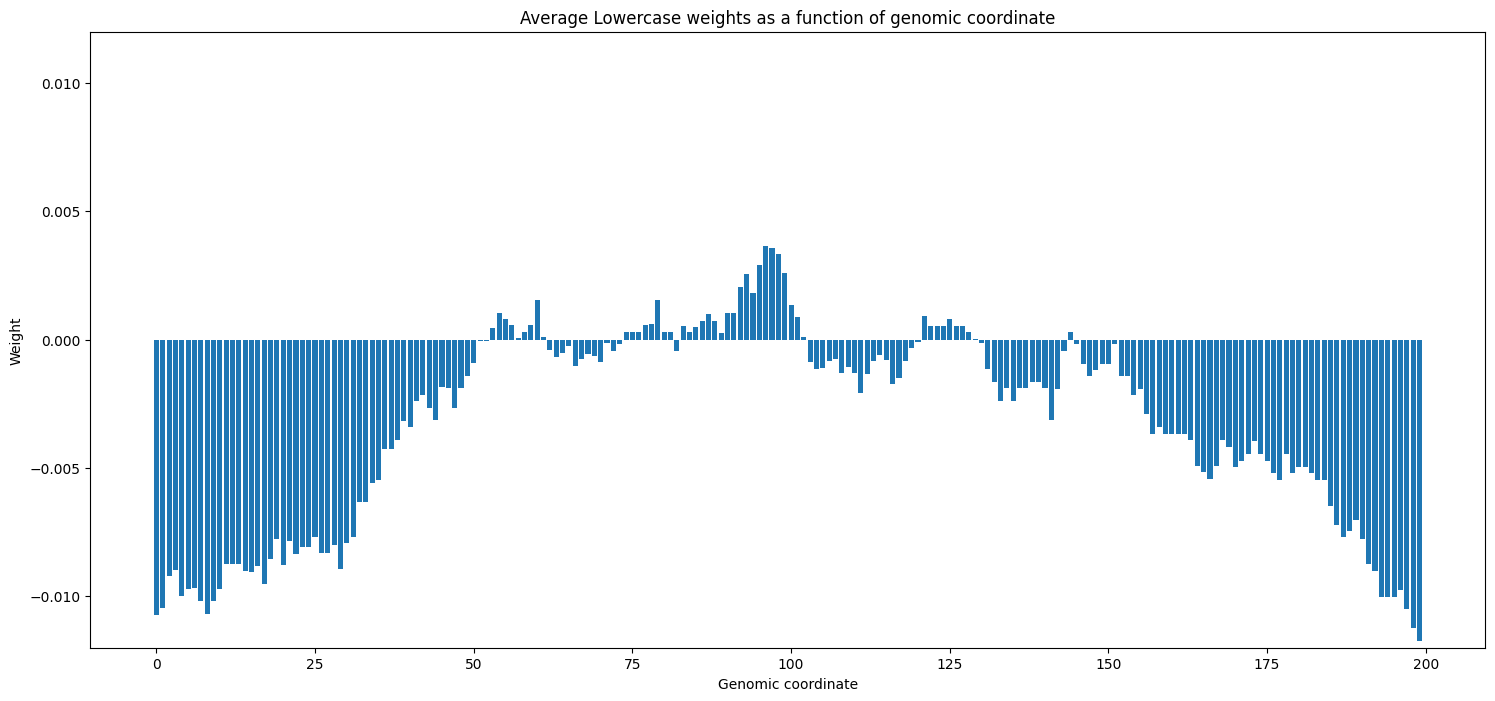

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_avg_weights)), SRSF1_ENCSR321PWZ_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.01, 0.01])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_avg_uppercase_weights)), SRSF1_ENCSR321PWZ_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_avg_lowercase_weights)), SRSF1_ENCSR321PWZ_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

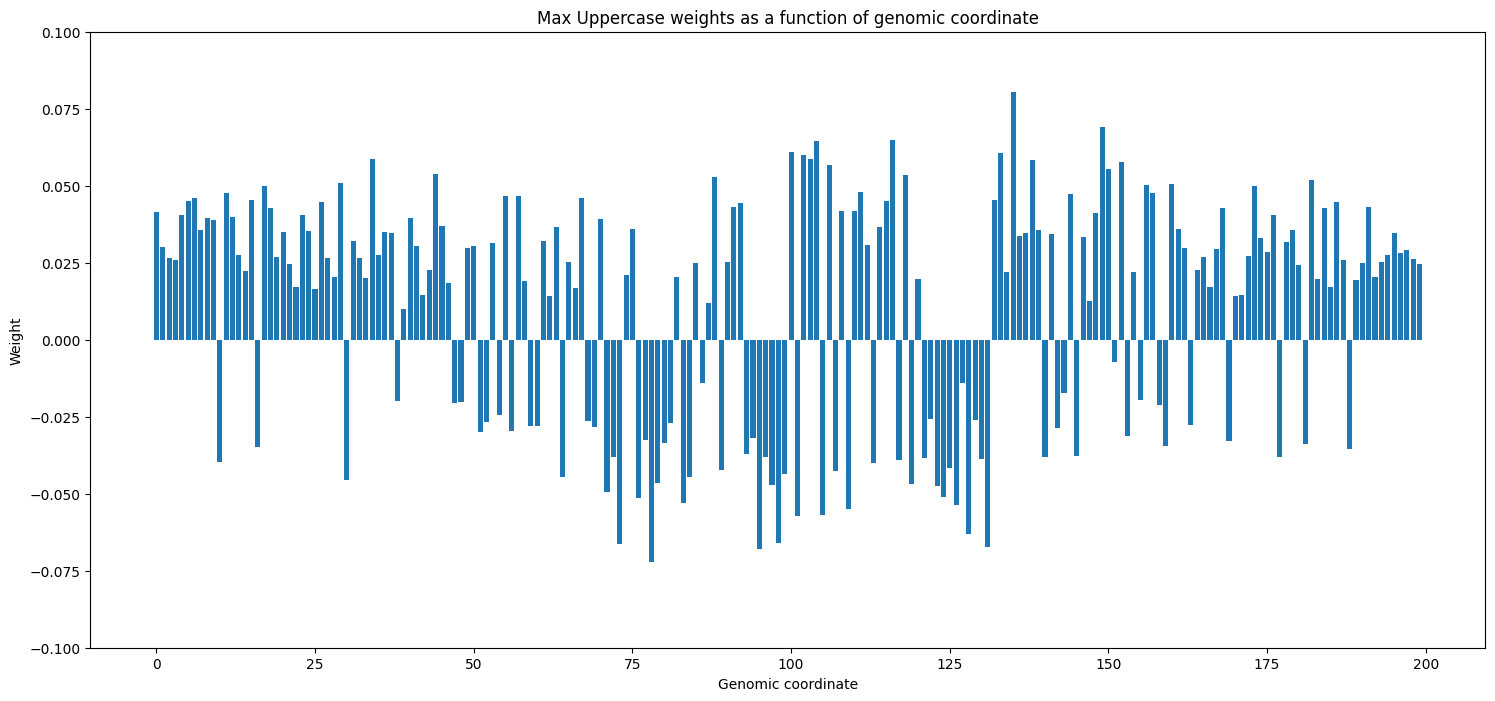

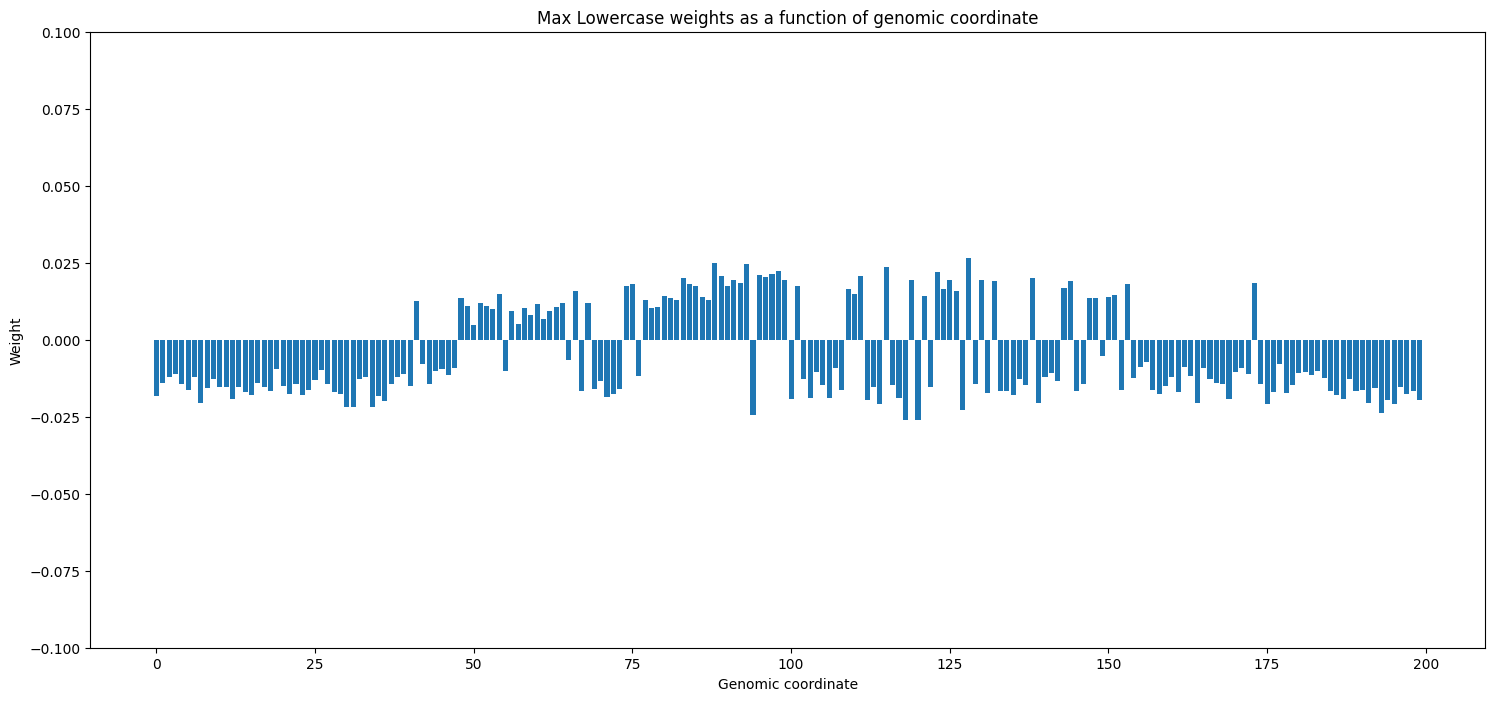

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_max_uppercase_weights)), SRSF1_ENCSR321PWZ_max_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Max Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR321PWZ_max_lowercase_weights)), SRSF1_ENCSR321PWZ_max_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Max Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

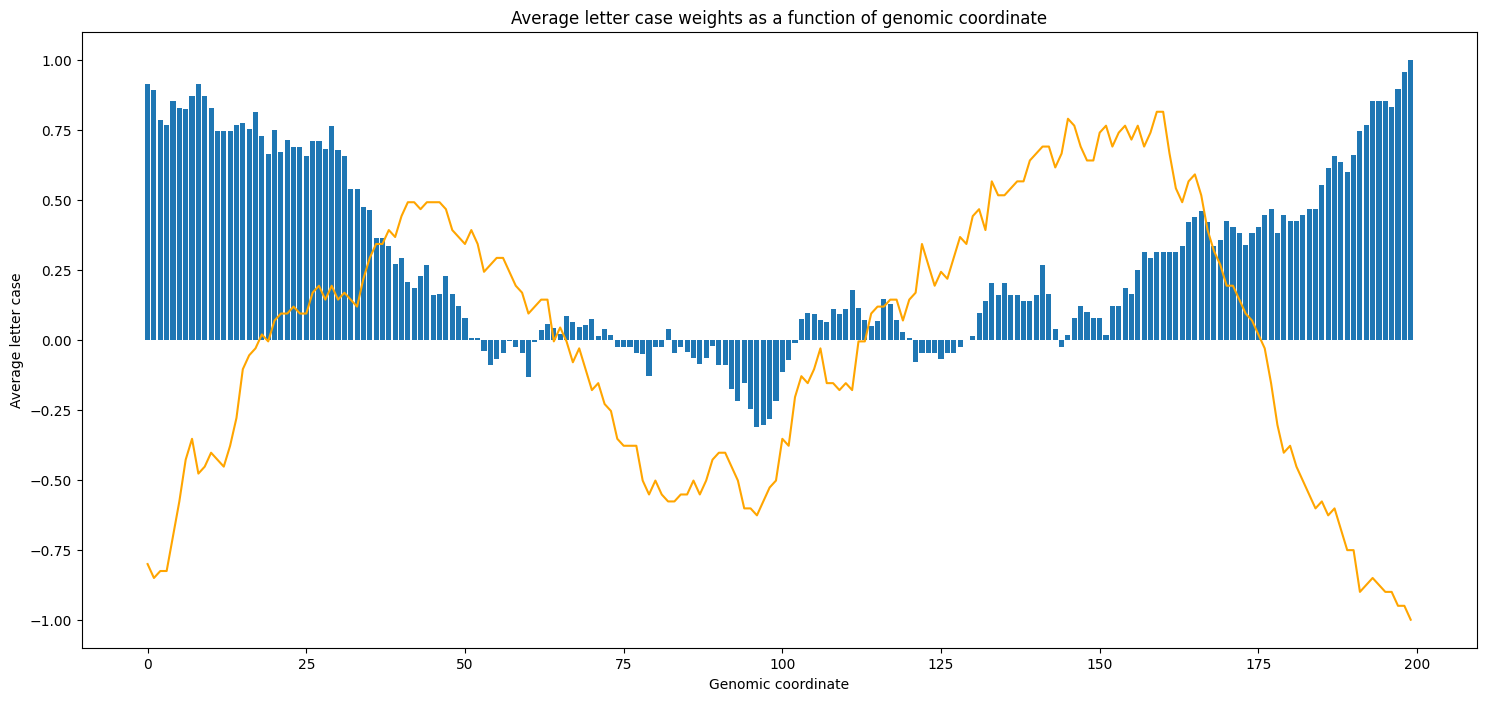

In [ ]:
SRSF1_ENCSR321PWZ_mean_letter_case = np.array([calc_mean_letter_case(SRSF1_ENCSR321PWZ_ds.iloc[:, i]) for i in range(200)])
SRSF1_ENCSR321PWZ_mean_letter_case = (SRSF1_ENCSR321PWZ_mean_letter_case - SRSF1_ENCSR321PWZ_mean_letter_case.mean())
SRSF1_ENCSR321PWZ_mean_letter_case = SRSF1_ENCSR321PWZ_mean_letter_case / max(abs(SRSF1_ENCSR321PWZ_mean_letter_case))
normalized_SRSF1_ENCSR321PWZ_avg_uppercase_weights = SRSF1_ENCSR321PWZ_avg_uppercase_weights / max(abs(SRSF1_ENCSR321PWZ_avg_uppercase_weights))

plt.figure(figsize=(18, 8))
plt.plot(range(len(SRSF1_ENCSR321PWZ_mean_letter_case)), SRSF1_ENCSR321PWZ_mean_letter_case, color='orange')
plt.bar(range(len(normalized_SRSF1_ENCSR321PWZ_avg_uppercase_weights)), normalized_SRSF1_ENCSR321PWZ_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Average letter case')
plt.title("Average letter case weights as a function of genomic coordinate")
plt.show()

## Compare experiments

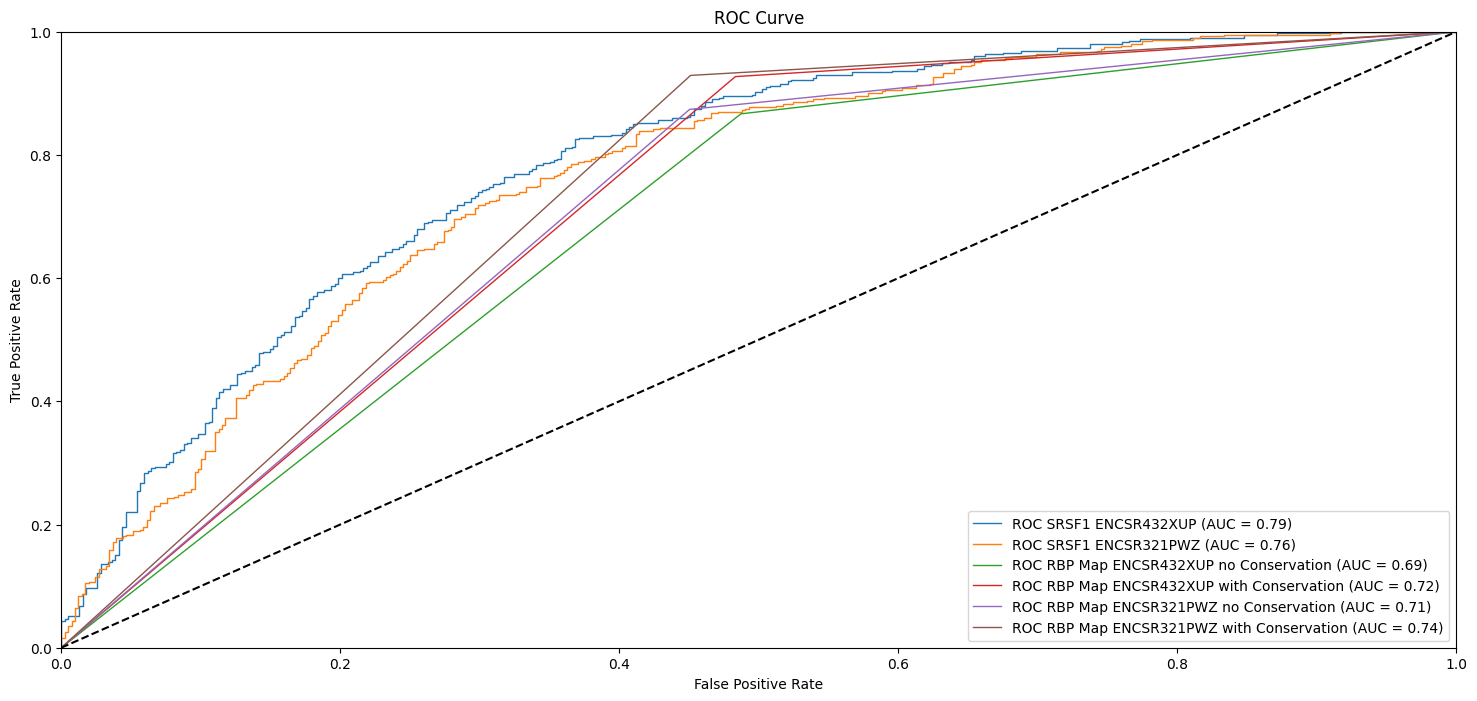

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR432XUP_model,
    SRSF1_ENCSR432XUP_test_features,
    SRSF1_ENCSR432XUP_test_labels,
    name=f"ROC SRSF1 ENCSR432XUP",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR321PWZ_model,
    SRSF1_ENCSR321PWZ_test_features,
    SRSF1_ENCSR321PWZ_test_labels,
    name=f"ROC SRSF1 ENCSR321PWZ",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR432XUP_rbp_no_conservation,
    SRSF1_ENCSR432XUP_true_labels,
    name=f"ROC RBP Map ENCSR432XUP no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR432XUP_rbp_with_conservation,
    SRSF1_ENCSR432XUP_true_labels,
    name=f"ROC RBP Map ENCSR432XUP with Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR321PWZ_rbp_no_conservation,
    SRSF1_ENCSR321PWZ_true_labels,
    name=f"ROC RBP Map ENCSR321PWZ no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    SRSF1_ENCSR321PWZ_rbp_with_conservation,
    SRSF1_ENCSR321PWZ_true_labels,
    name=f"ROC RBP Map ENCSR321PWZ with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Compare model weights

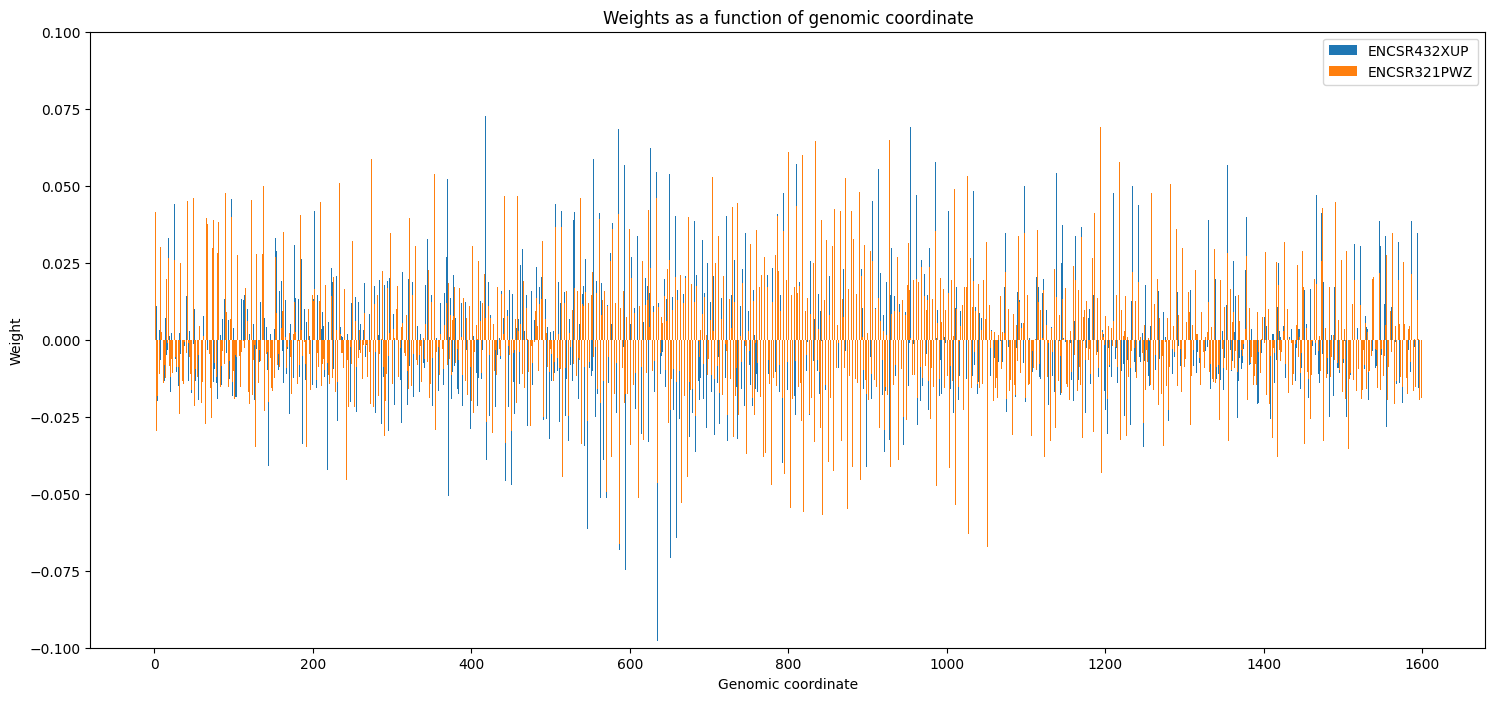

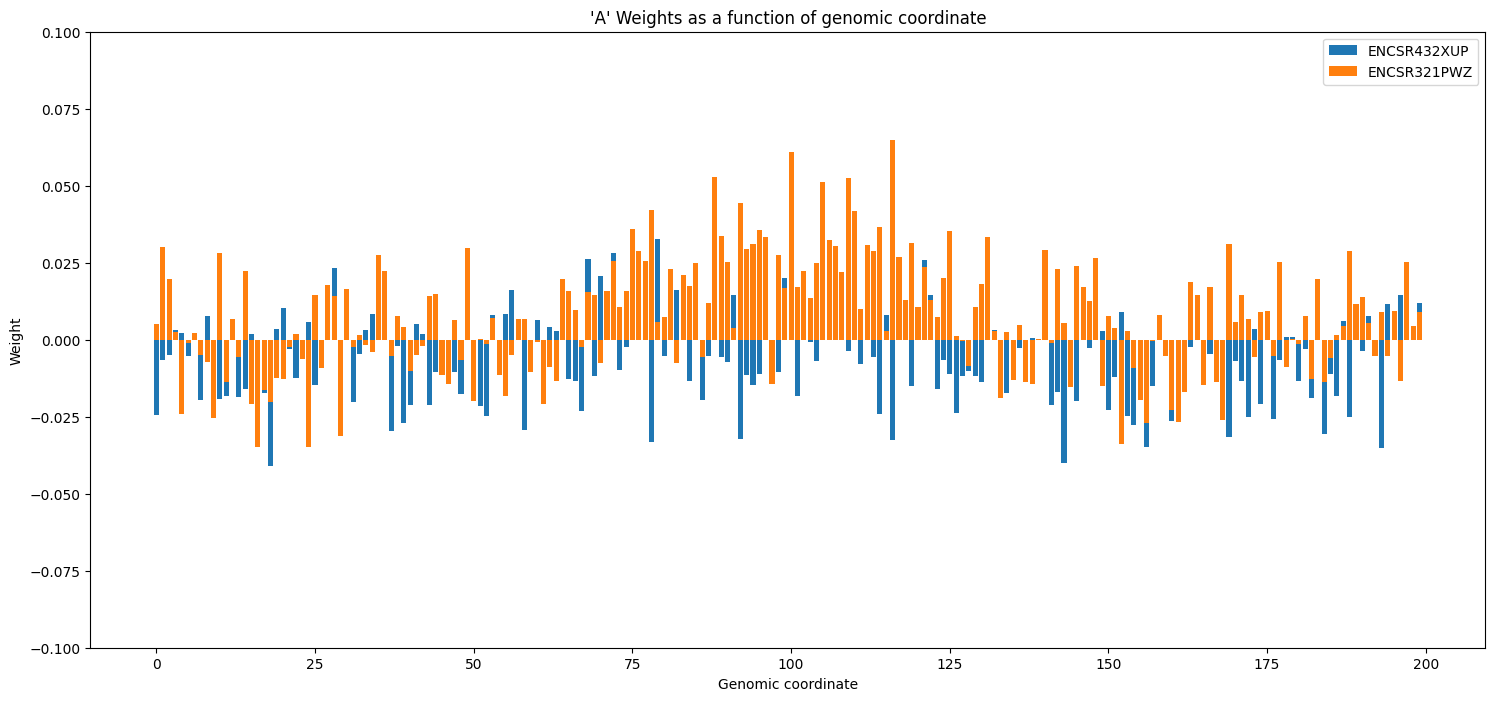

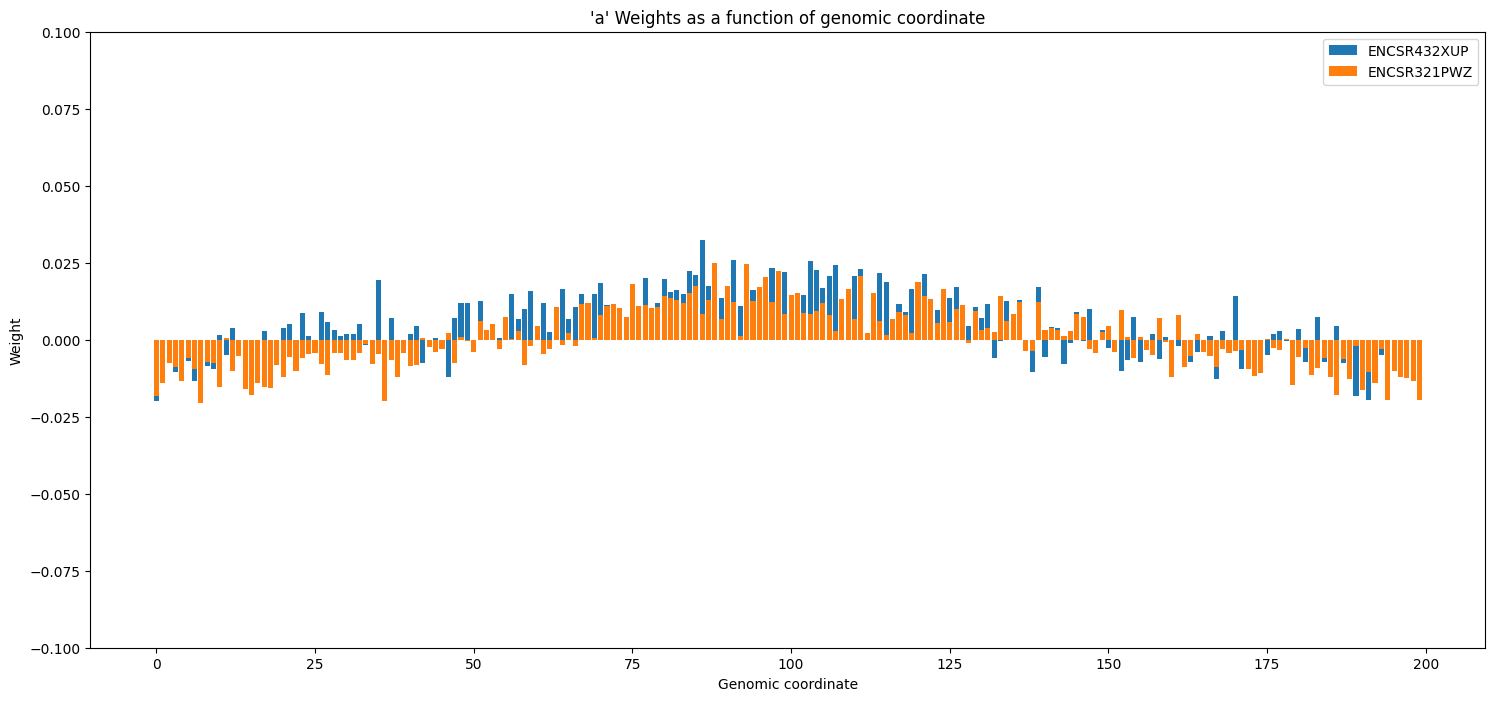

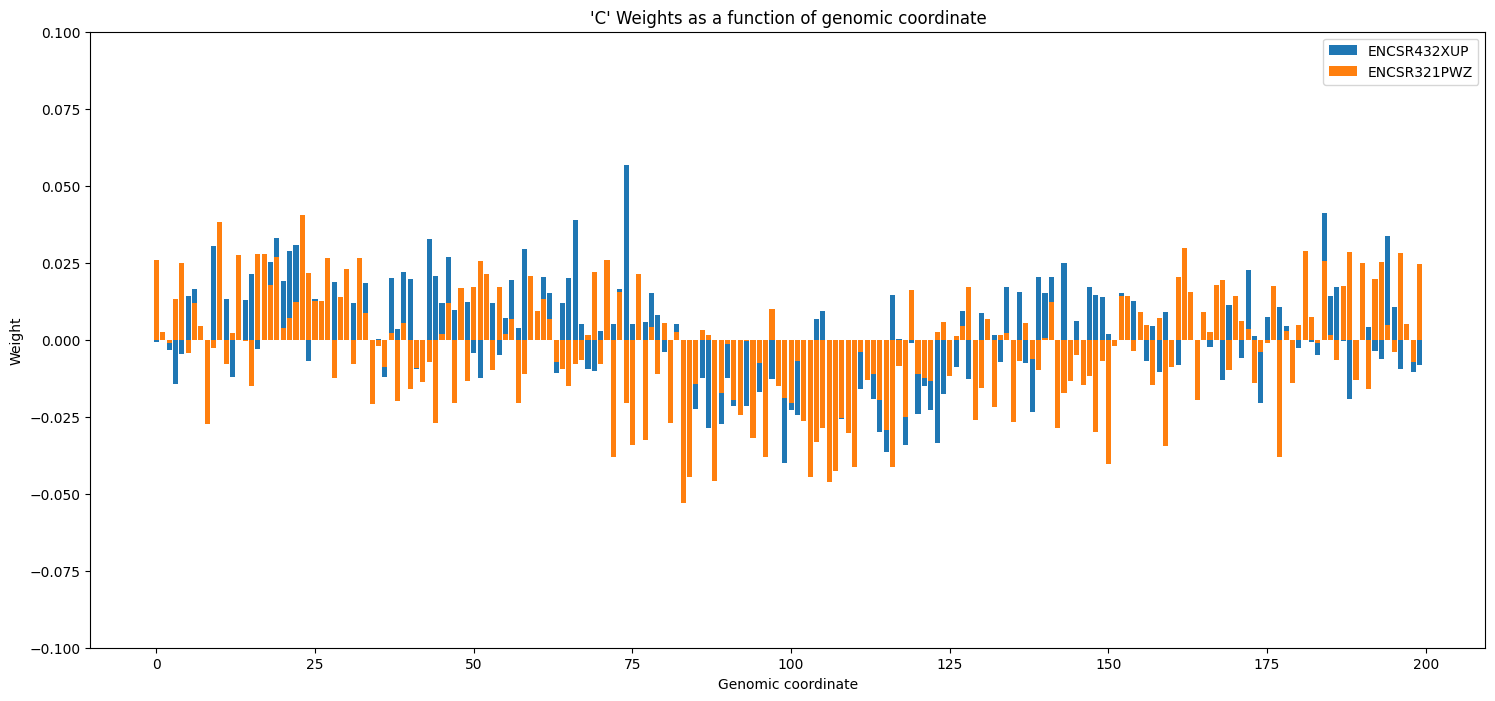

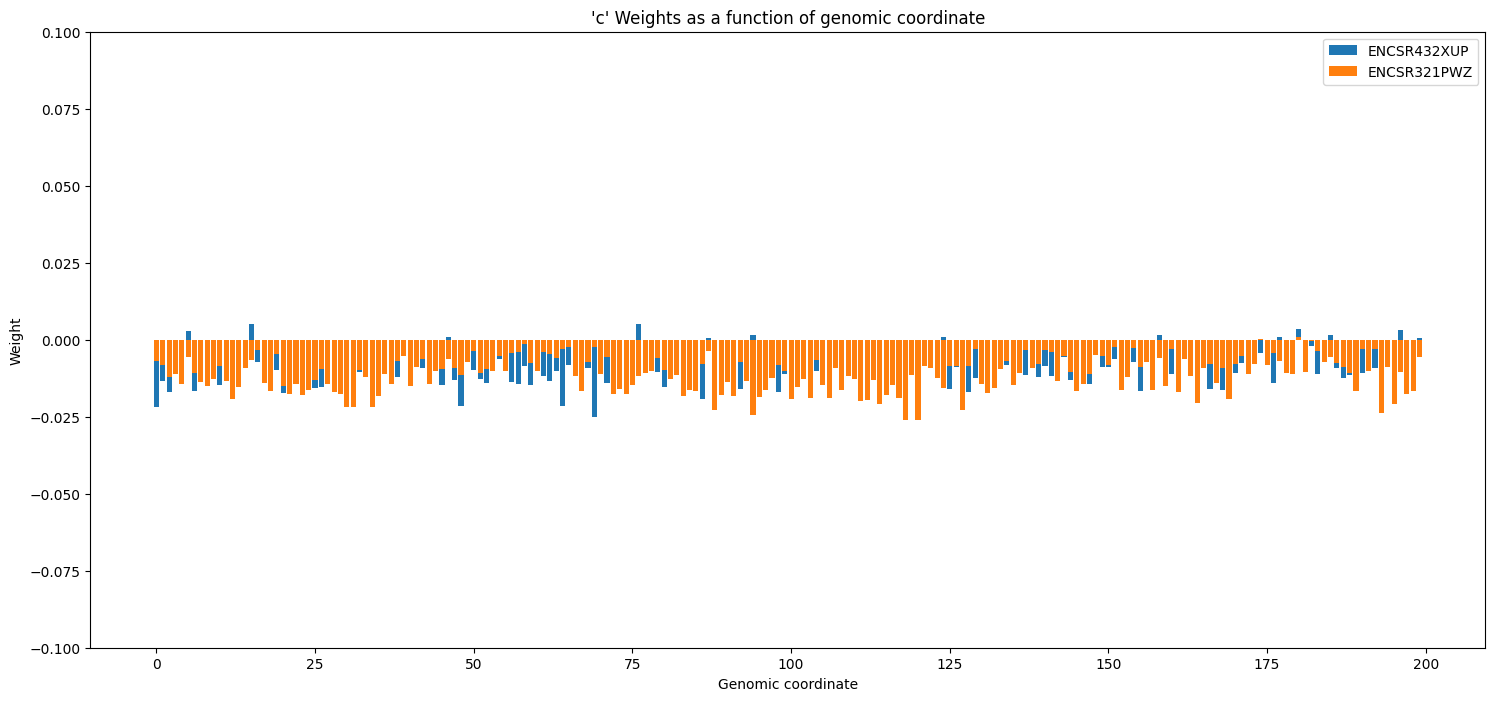

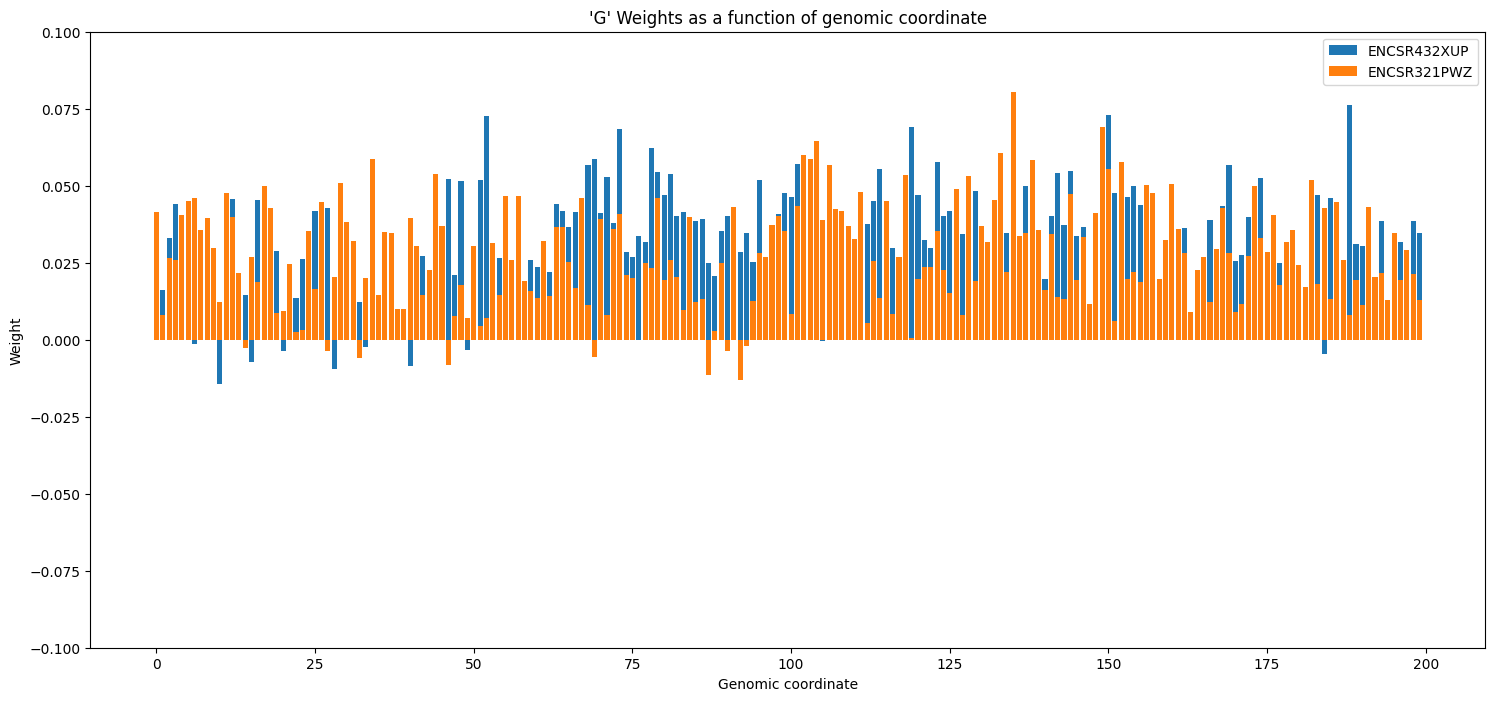

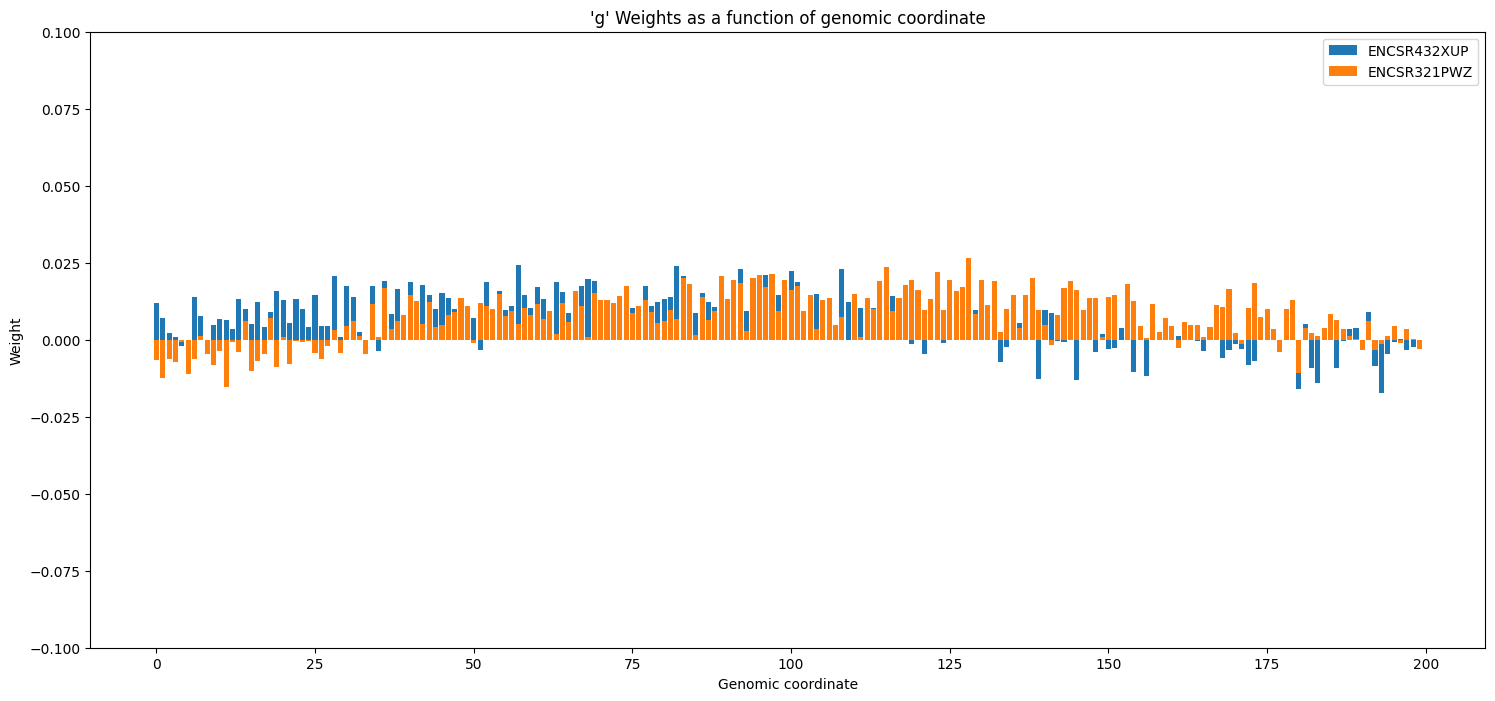

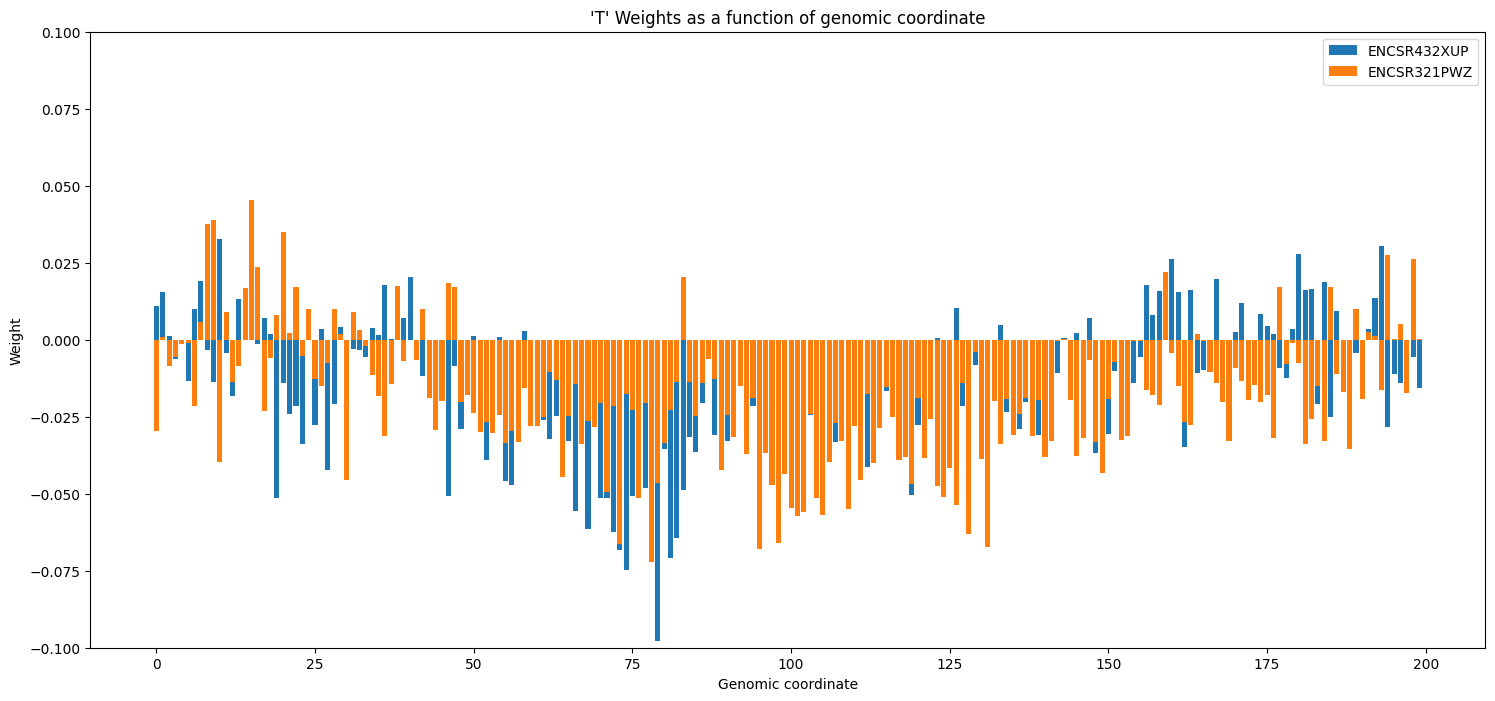

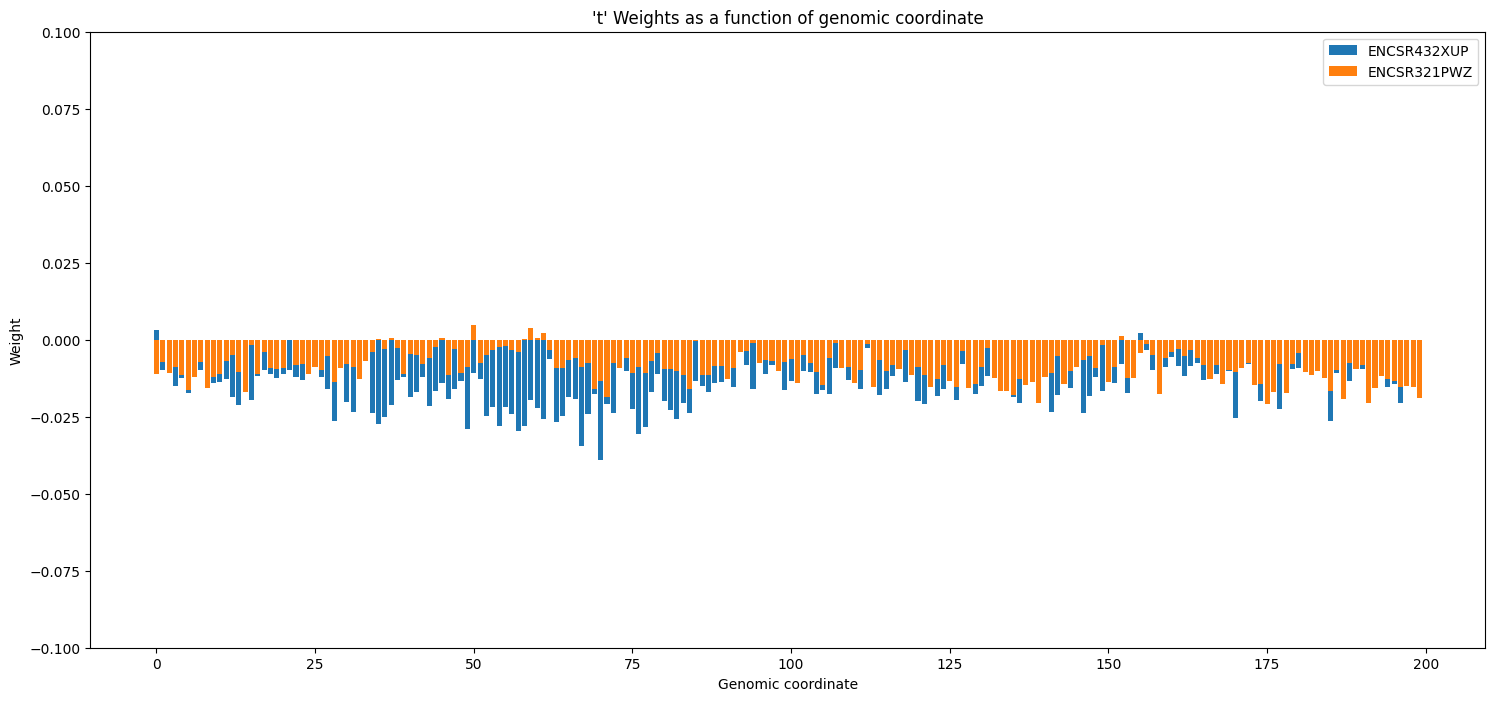

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_weights)), SRSF1_ENCSR432XUP_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_weights)), SRSF1_ENCSR321PWZ_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_A_weights)), SRSF1_ENCSR432XUP_A_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_A_weights)), SRSF1_ENCSR321PWZ_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_a_weights)), SRSF1_ENCSR432XUP_a_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_a_weights)), SRSF1_ENCSR321PWZ_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_C_weights)), SRSF1_ENCSR432XUP_C_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_C_weights)), SRSF1_ENCSR321PWZ_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_c_weights)), SRSF1_ENCSR432XUP_c_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_c_weights)), SRSF1_ENCSR321PWZ_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_G_weights)), SRSF1_ENCSR432XUP_G_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_G_weights)), SRSF1_ENCSR321PWZ_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_g_weights)), SRSF1_ENCSR432XUP_g_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_g_weights)), SRSF1_ENCSR321PWZ_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_T_weights)), SRSF1_ENCSR432XUP_T_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_T_weights)), SRSF1_ENCSR321PWZ_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_t_weights)), SRSF1_ENCSR432XUP_t_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_t_weights)), SRSF1_ENCSR321PWZ_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.1, 0.1])
plt.show()

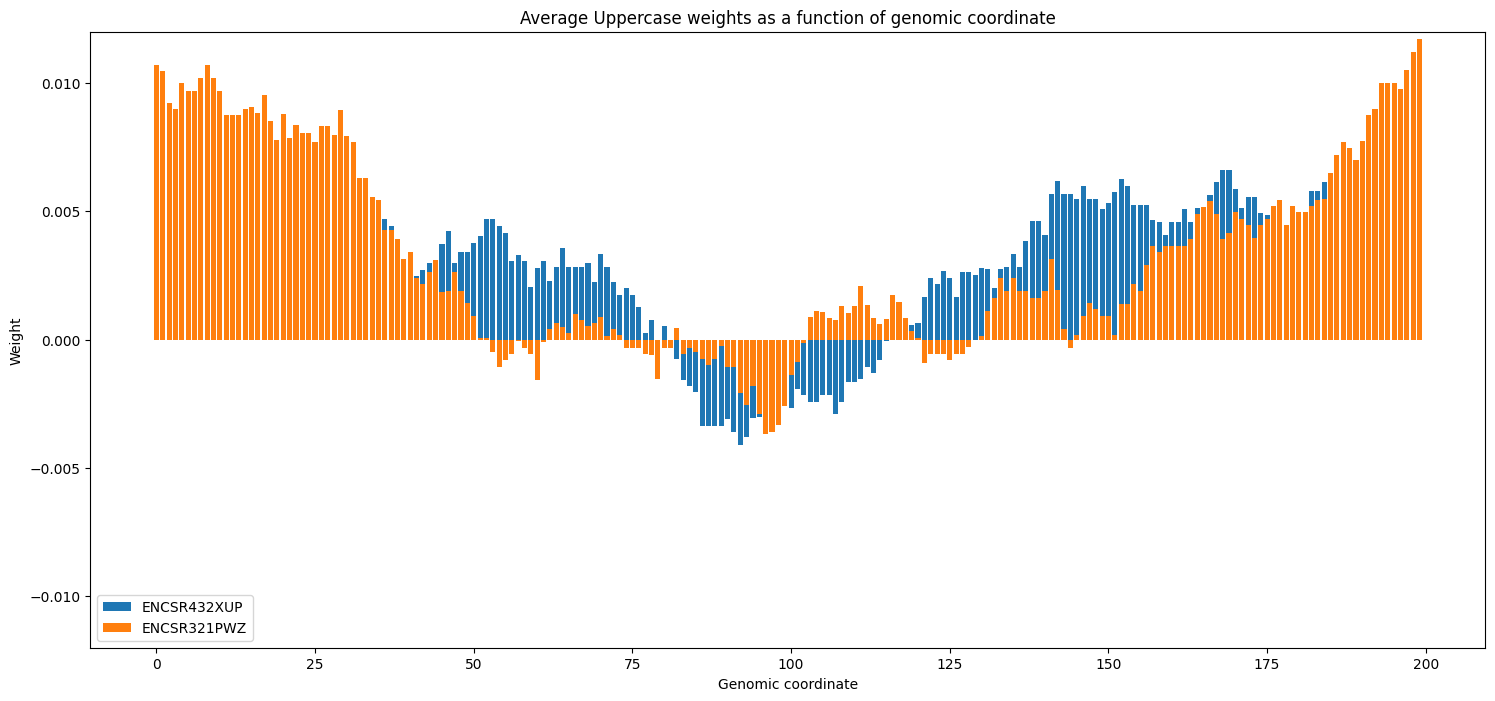

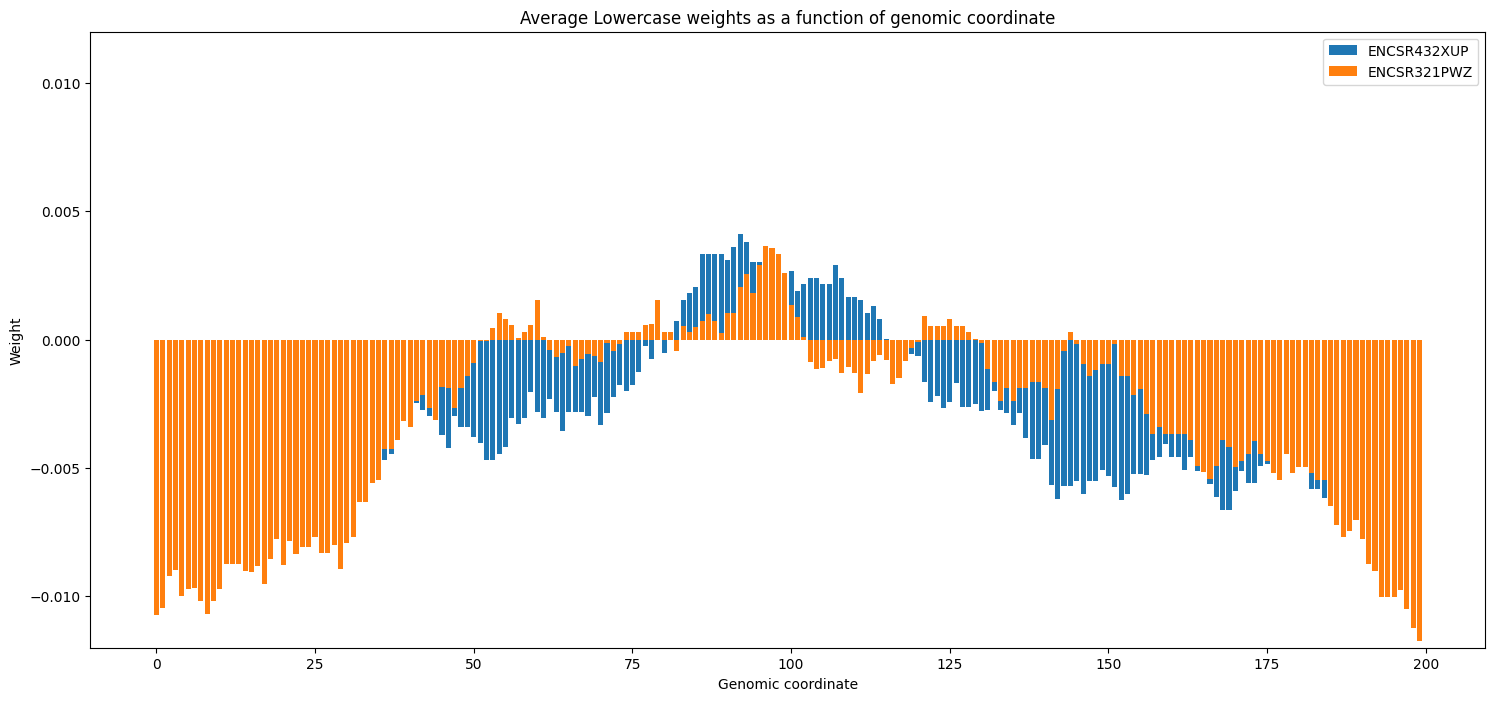

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_uppercase_weights)), SRSF1_ENCSR432XUP_avg_uppercase_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_avg_uppercase_weights)), SRSF1_ENCSR321PWZ_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_lowercase_weights)), SRSF1_ENCSR432XUP_avg_lowercase_weights)
plt.bar(range(len(SRSF1_ENCSR321PWZ_avg_lowercase_weights)), SRSF1_ENCSR321PWZ_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.legend(['ENCSR432XUP', 'ENCSR321PWZ'])
plt.ylim([-0.012, 0.012])
plt.show()

# PUM2

## ENCSR661ICQ

### Import dataset and fit model

In [9]:
PUM2_ENCSR661ICQ_ds = import_dataset()
[PUM2_ENCSR661ICQ_train, PUM2_ENCSR661ICQ_test] = train_test_split(PUM2_ENCSR661ICQ_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
PUM2_ENCSR661ICQ_train_features = pd.get_dummies(PUM2_ENCSR661ICQ_train.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_train_labels = PUM2_ENCSR661ICQ_train['label'].to_numpy()

PUM2_ENCSR661ICQ_test_features = pd.get_dummies(PUM2_ENCSR661ICQ_test.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_test_labels = PUM2_ENCSR661ICQ_test['label'].to_numpy()

# C=1e-3 worked best
PUM2_ENCSR661ICQ_model = svm.SVC(C=1e-3, kernel="linear")
PUM2_ENCSR661ICQ_model = PUM2_ENCSR661ICQ_model.fit(PUM2_ENCSR661ICQ_train_features, PUM2_ENCSR661ICQ_train_labels)

Saving PUM2_ENCSR661ICQ_dataset.txt to PUM2_ENCSR661ICQ_dataset.txt
User uploaded file "PUM2_ENCSR661ICQ_dataset.txt" with length 816000 bytes


In [10]:
PUM2_ENCSR661ICQ_ds_secondary = import_dataset()
[PUM2_ENCSR661ICQ_train_secondary, PUM2_ENCSR661ICQ_test_secondary] = train_test_split(PUM2_ENCSR661ICQ_ds_secondary,train_size=0.8, random_state=103)

# One-Hot Encoding
PUM2_ENCSR661ICQ_train_features_secondary = pd.get_dummies(PUM2_ENCSR661ICQ_train_secondary.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_train_labels_secondary = PUM2_ENCSR661ICQ_train_secondary['label'].to_numpy()

PUM2_ENCSR661ICQ_test_features_secondary = pd.get_dummies(PUM2_ENCSR661ICQ_test_secondary.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_test_labels_secondary = PUM2_ENCSR661ICQ_test_secondary['label'].to_numpy()

# C=1e-3 worked best
PUM2_ENCSR661ICQ_model_secondary = svm.SVC(C=1e-3, kernel="linear")
PUM2_ENCSR661ICQ_model_secondary = PUM2_ENCSR661ICQ_model_secondary.fit(PUM2_ENCSR661ICQ_train_features_secondary, PUM2_ENCSR661ICQ_train_labels_secondary)

Saving PUM2_ENCSR661ICQ_dataset_secondary_structure.txt to PUM2_ENCSR661ICQ_dataset_secondary_structure.txt
User uploaded file "PUM2_ENCSR661ICQ_dataset_secondary_structure.txt" with length 816000 bytes


### Import RBPmap predictions

In [11]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

PUM2_ENCSR661ICQ_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
PUM2_ENCSR661ICQ_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving PUM2_ENCSR661ICQ_rbp_predictions_no_conservation.txt to PUM2_ENCSR661ICQ_rbp_predictions_no_conservation.txt
User uploaded file "PUM2_ENCSR661ICQ_rbp_predictions_no_conservation.txt" with length 20013 bytes


In [12]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

PUM2_ENCSR661ICQ_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving PUM2_ENCSR661ICQ_rbp_predictions_with_conservation.txt to PUM2_ENCSR661ICQ_rbp_predictions_with_conservation.txt
User uploaded file "PUM2_ENCSR661ICQ_rbp_predictions_with_conservation.txt" with length 20013 bytes


### Display results

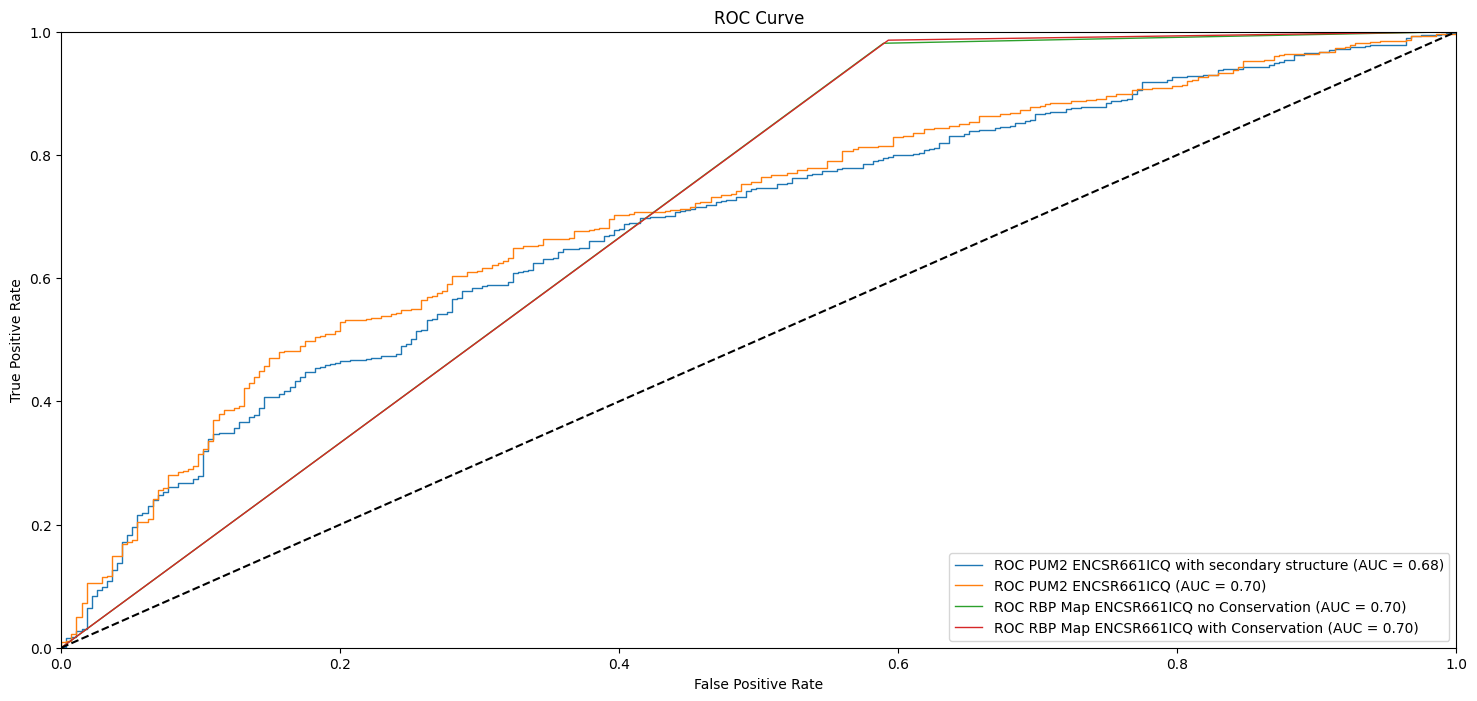

In [13]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    PUM2_ENCSR661ICQ_model_secondary,
    PUM2_ENCSR661ICQ_test_features_secondary,
    PUM2_ENCSR661ICQ_test_labels_secondary,
    name=f"ROC PUM2 ENCSR661ICQ with secondary structure",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    PUM2_ENCSR661ICQ_model,
    PUM2_ENCSR661ICQ_test_features,
    PUM2_ENCSR661ICQ_test_labels,
    name=f"ROC PUM2 ENCSR661ICQ",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    PUM2_ENCSR661ICQ_rbp_no_conservation,
    PUM2_ENCSR661ICQ_true_labels,
    name=f"ROC RBP Map ENCSR661ICQ no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    PUM2_ENCSR661ICQ_rbp_with_conservation,
    PUM2_ENCSR661ICQ_true_labels,
    name=f"ROC RBP Map ENCSR661ICQ with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
PUM2_ENCSR661ICQ_weights = PUM2_ENCSR661ICQ_model.coef_[0]
PUM2_ENCSR661ICQ_A_weights = PUM2_ENCSR661ICQ_weights[::8]
PUM2_ENCSR661ICQ_a_weights = PUM2_ENCSR661ICQ_weights[4::8]
PUM2_ENCSR661ICQ_C_weights = PUM2_ENCSR661ICQ_weights[1::8]
PUM2_ENCSR661ICQ_c_weights = PUM2_ENCSR661ICQ_weights[5::8]
PUM2_ENCSR661ICQ_G_weights = PUM2_ENCSR661ICQ_weights[2::8]
PUM2_ENCSR661ICQ_g_weights = PUM2_ENCSR661ICQ_weights[6::8]
PUM2_ENCSR661ICQ_T_weights = PUM2_ENCSR661ICQ_weights[3::8]
PUM2_ENCSR661ICQ_t_weights = PUM2_ENCSR661ICQ_weights[7::8]

PUM2_ENCSR661ICQ_avg_weights = PUM2_ENCSR661ICQ_weights.reshape(-1, 8).mean(axis=1)
PUM2_ENCSR661ICQ_avg_uppercase_weights = PUM2_ENCSR661ICQ_weights.reshape(-1, 4).mean(axis=1)[::2]
PUM2_ENCSR661ICQ_avg_lowercase_weights = PUM2_ENCSR661ICQ_weights.reshape(-1, 4).mean(axis=1)[1::2]

print('Average weights mean is ', PUM2_ENCSR661ICQ_avg_weights.mean())
print('Average weights variance is ', PUM2_ENCSR661ICQ_avg_weights.var())

Average weights mean is  -1.522003009735151e-17
Average weights variance is  6.519348210938682e-35


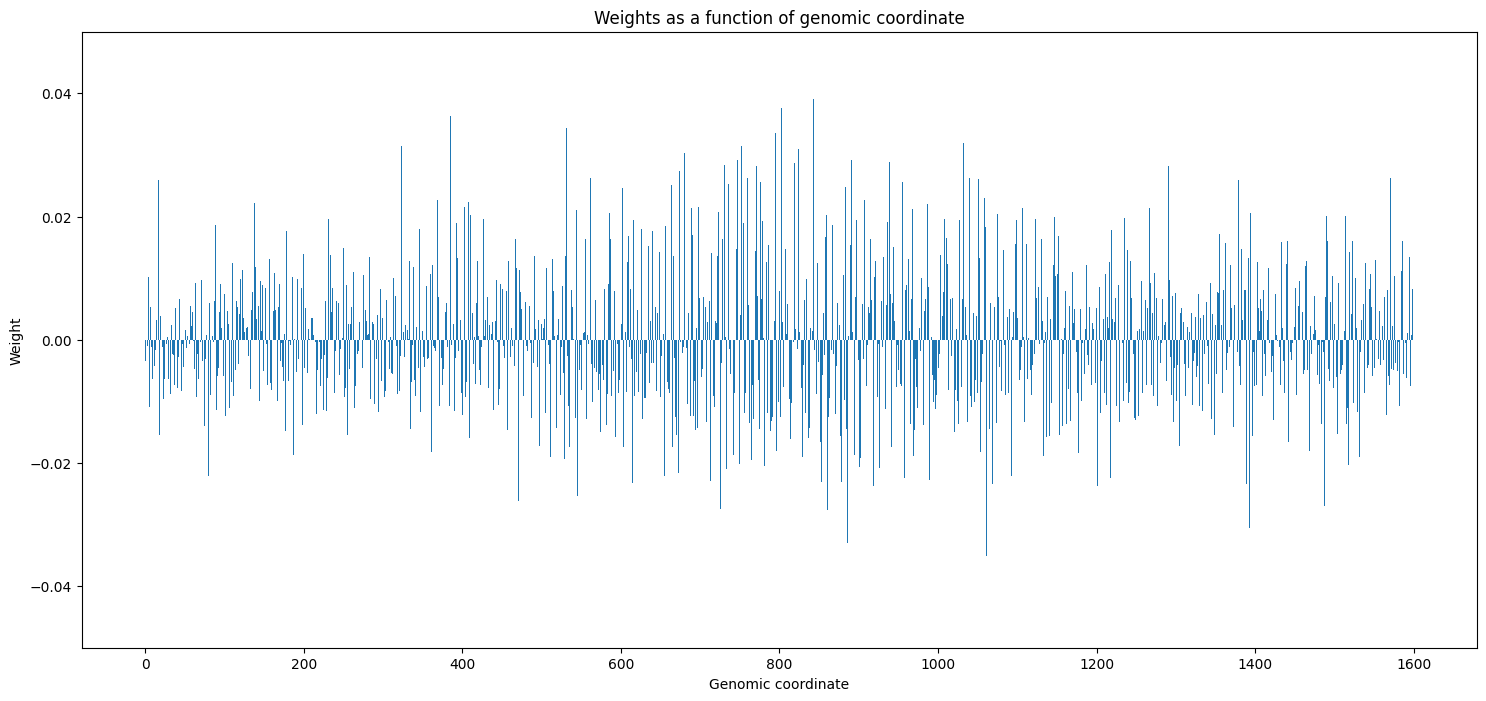

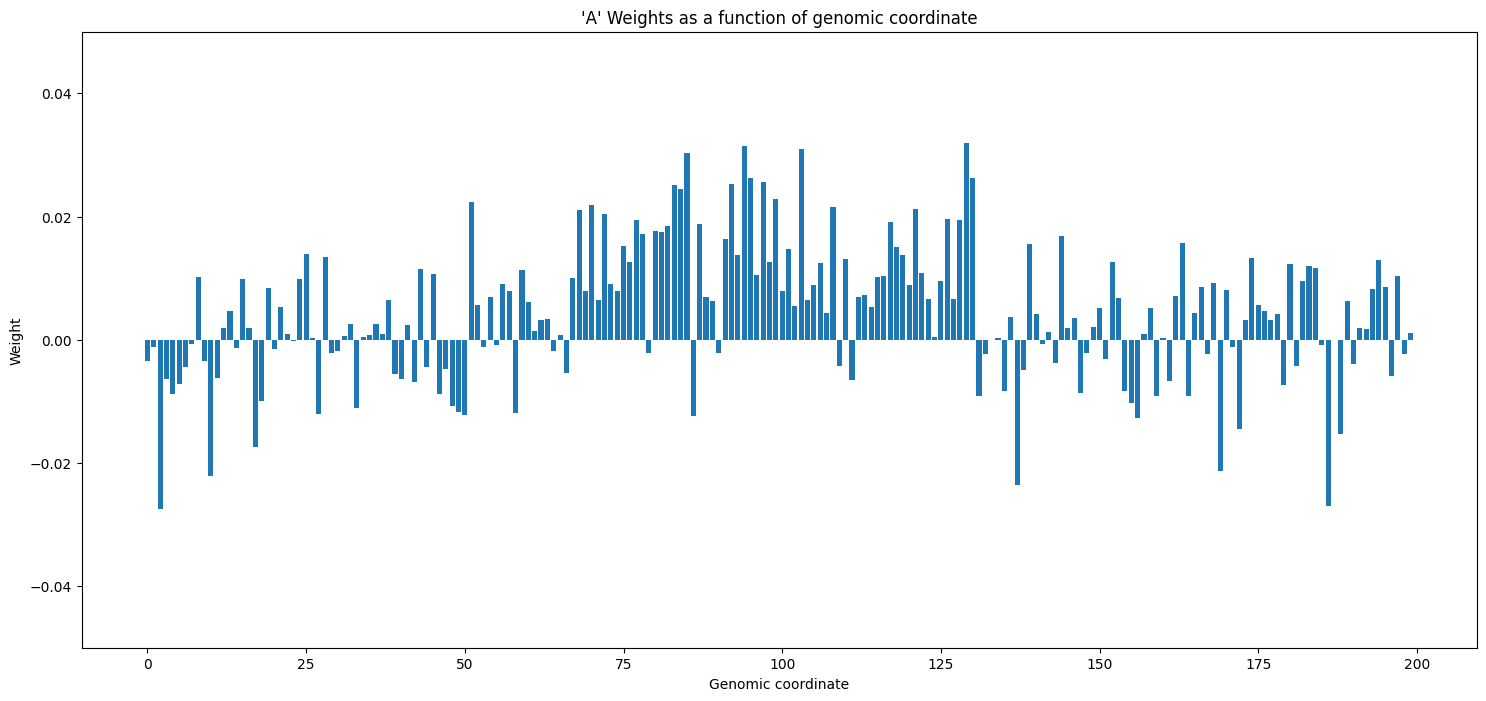

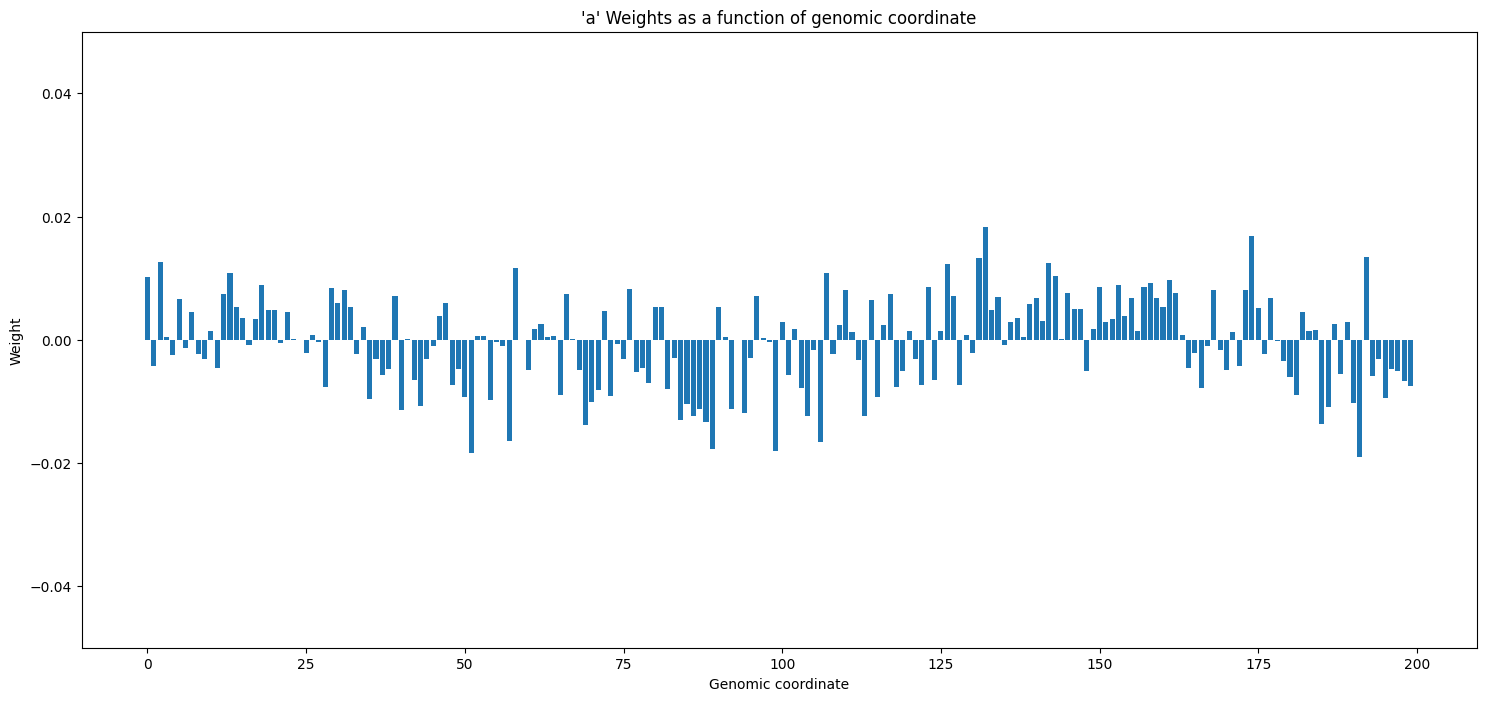

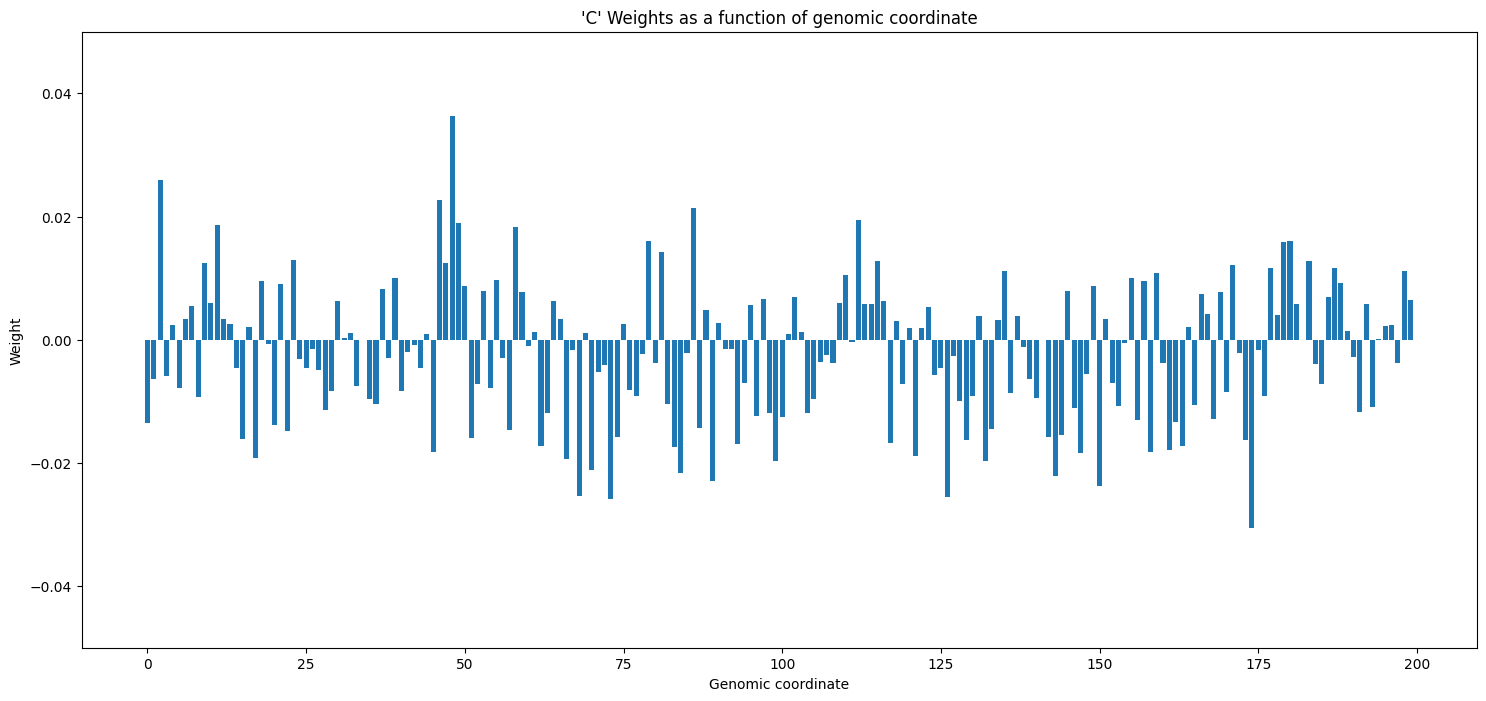

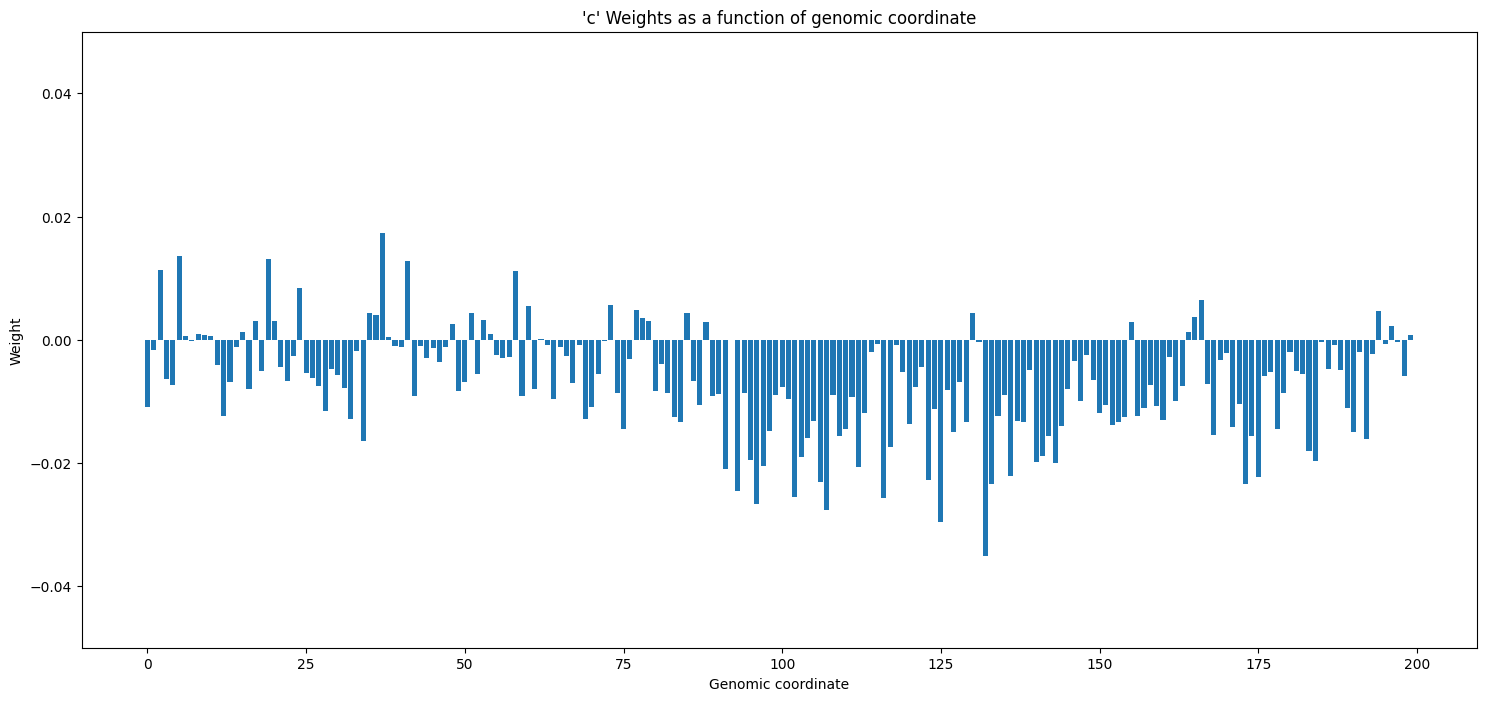

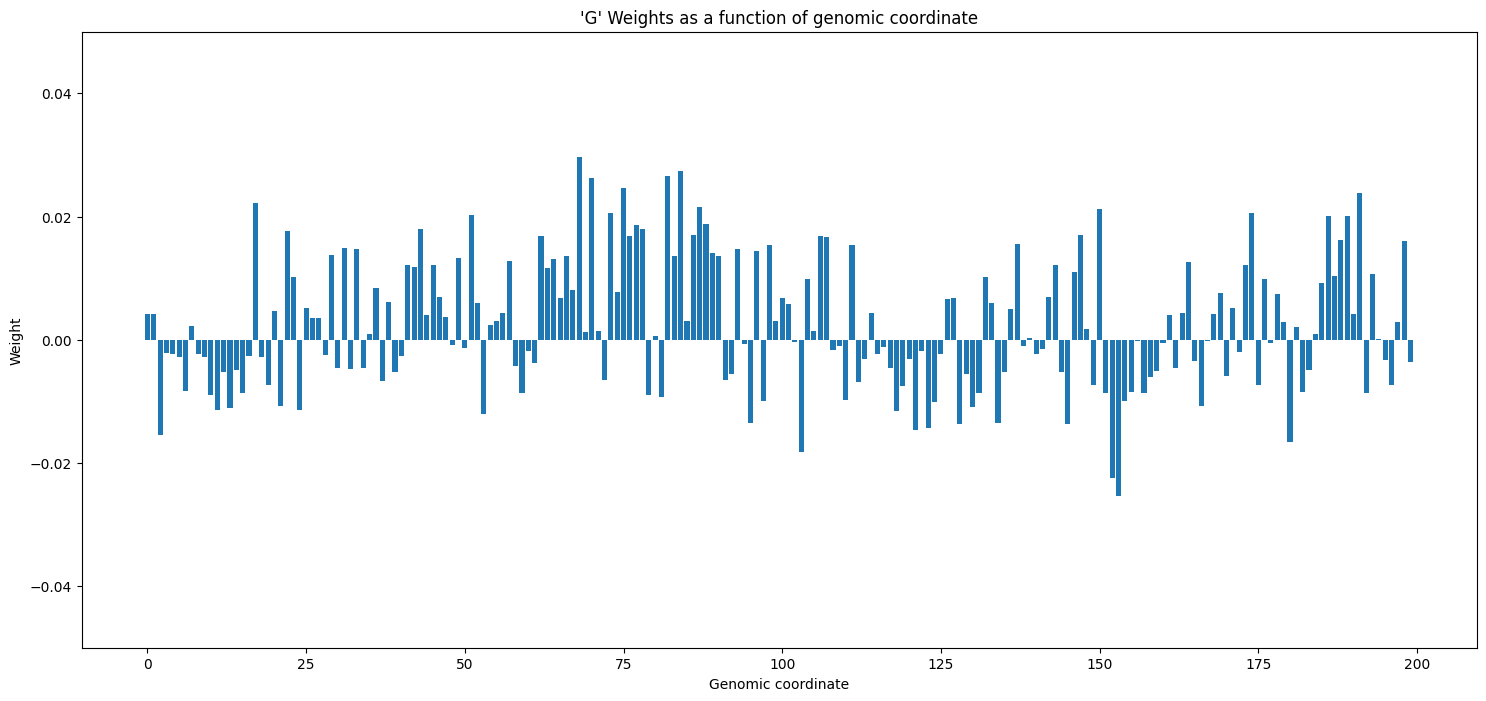

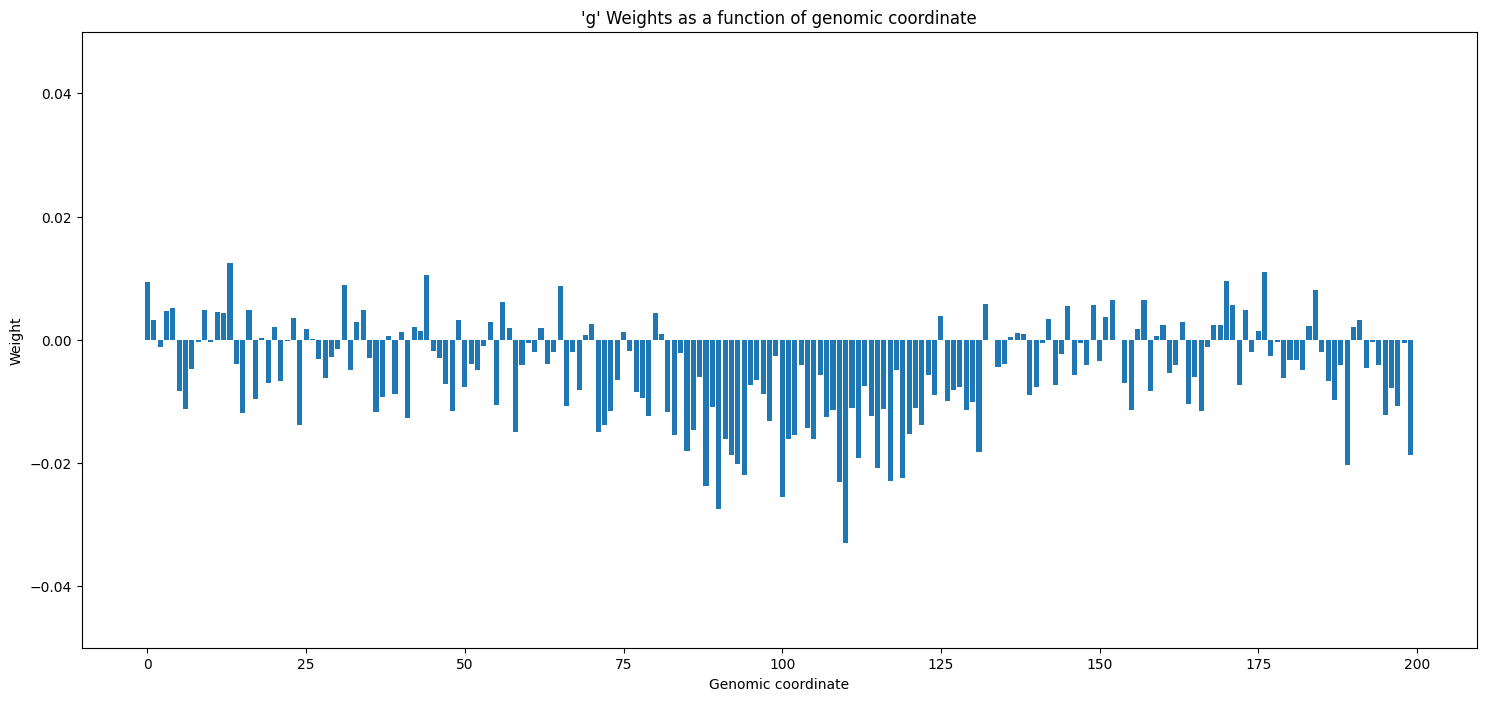

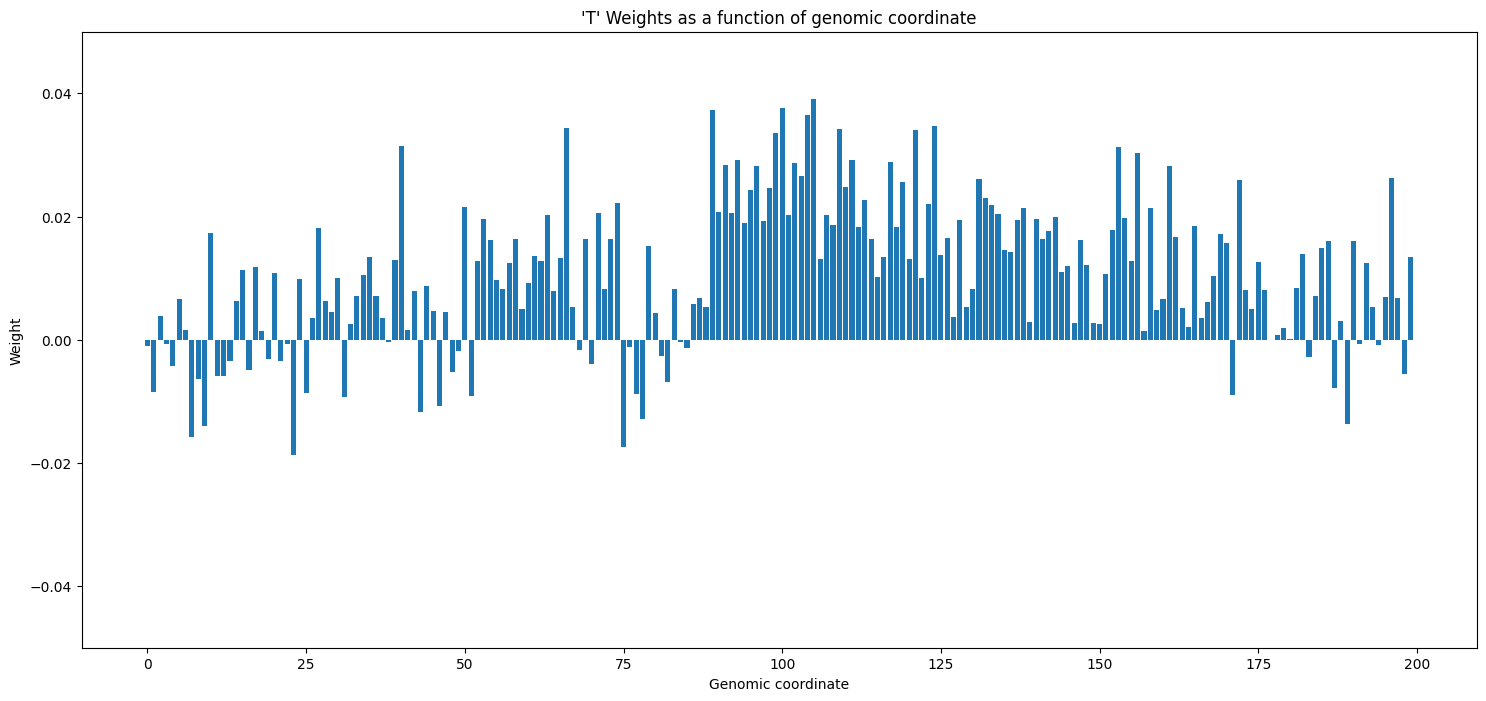

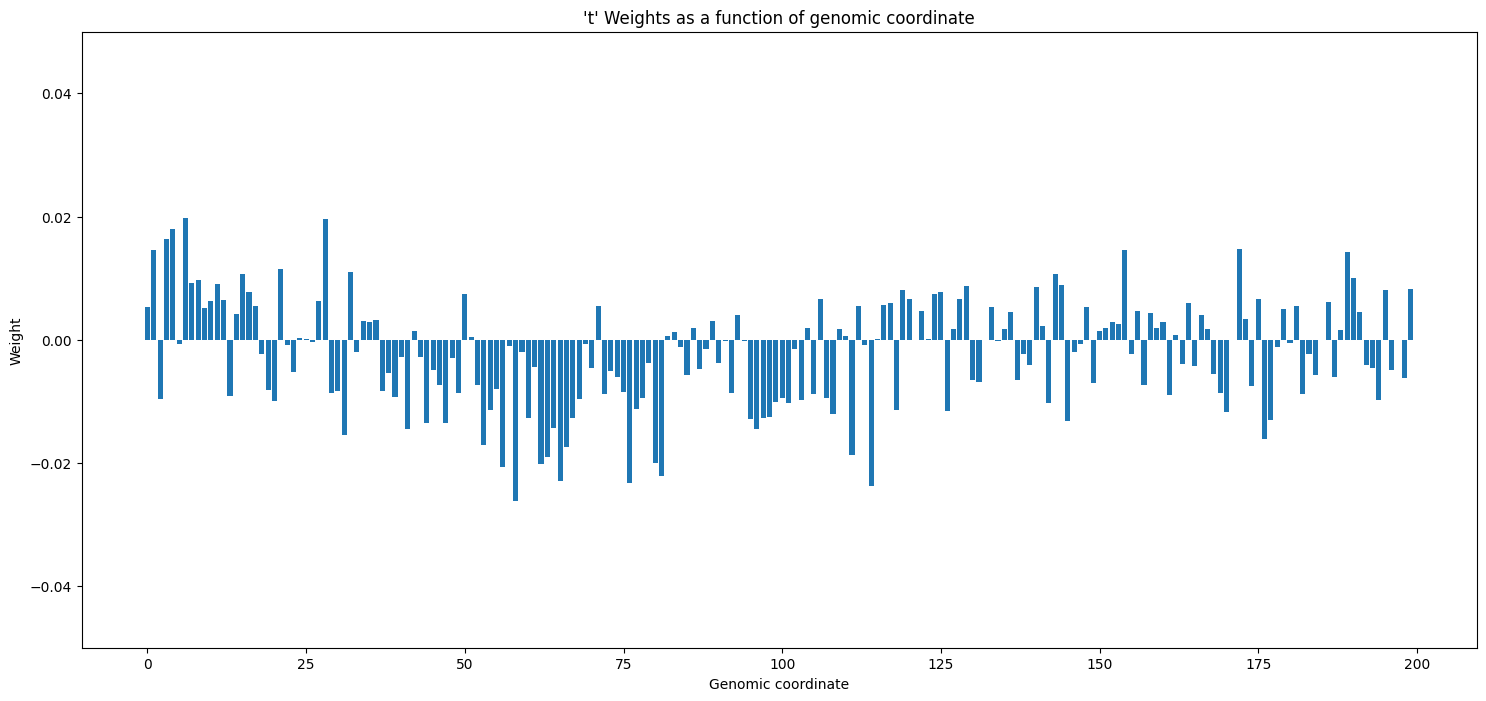

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_weights)), PUM2_ENCSR661ICQ_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_A_weights)), PUM2_ENCSR661ICQ_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_a_weights)), PUM2_ENCSR661ICQ_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_C_weights)), PUM2_ENCSR661ICQ_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_c_weights)), PUM2_ENCSR661ICQ_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_G_weights)), PUM2_ENCSR661ICQ_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_g_weights)), PUM2_ENCSR661ICQ_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_T_weights)), PUM2_ENCSR661ICQ_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_t_weights)), PUM2_ENCSR661ICQ_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.05, 0.05])
plt.show()

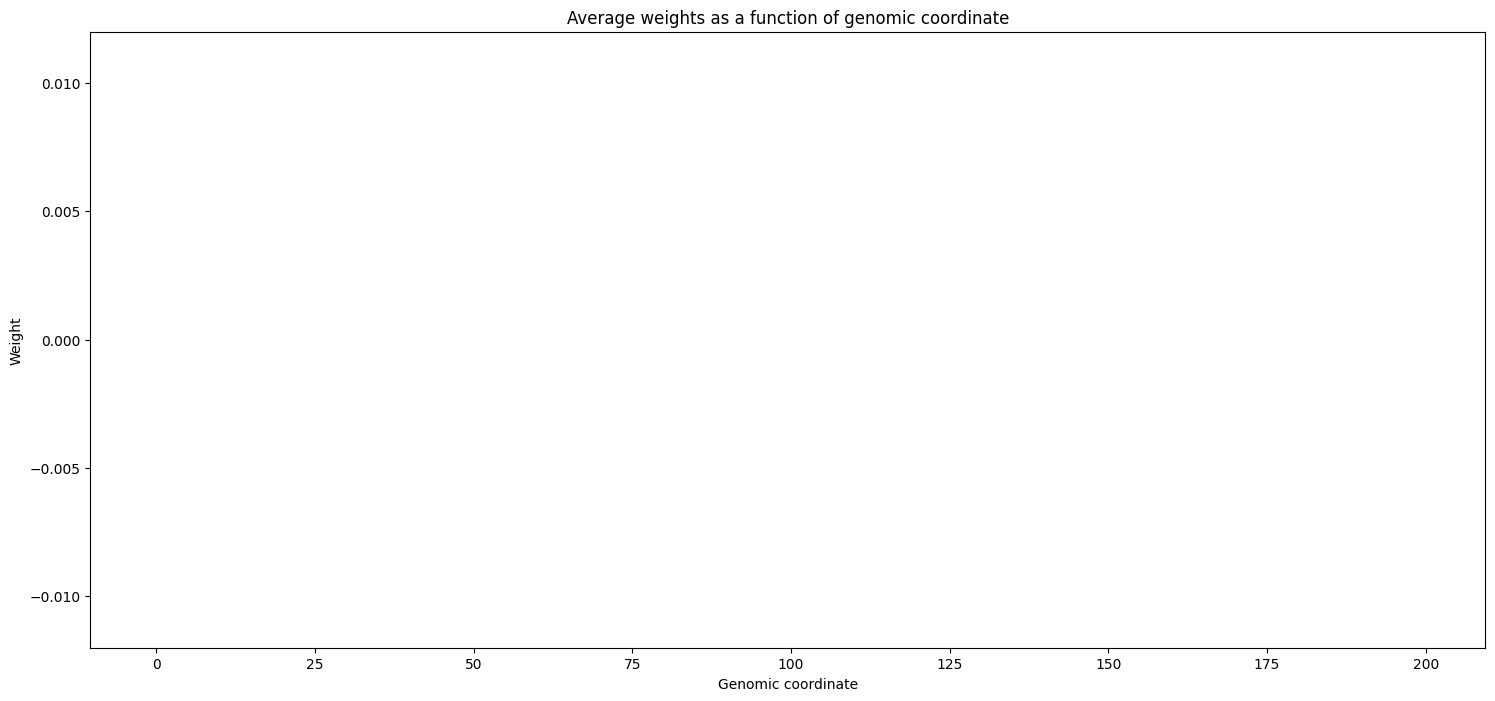

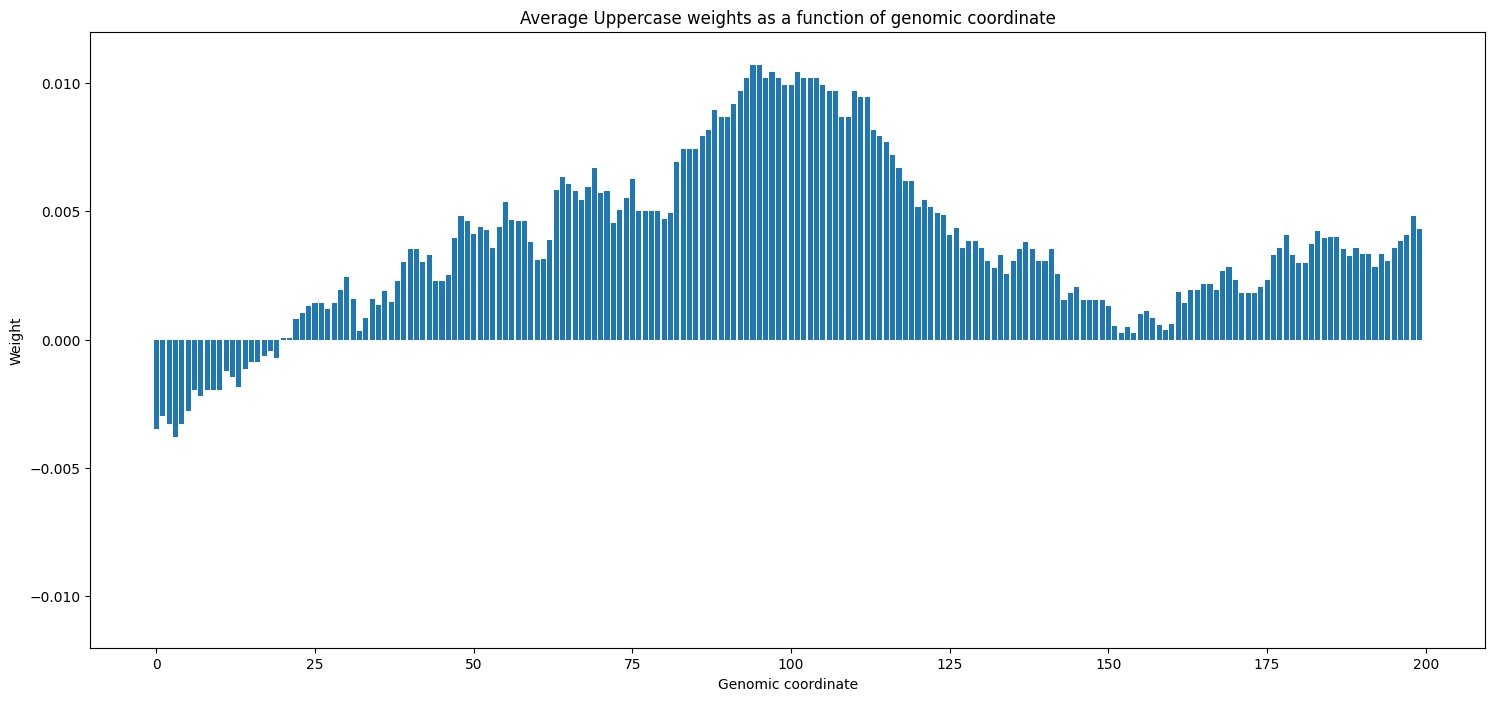

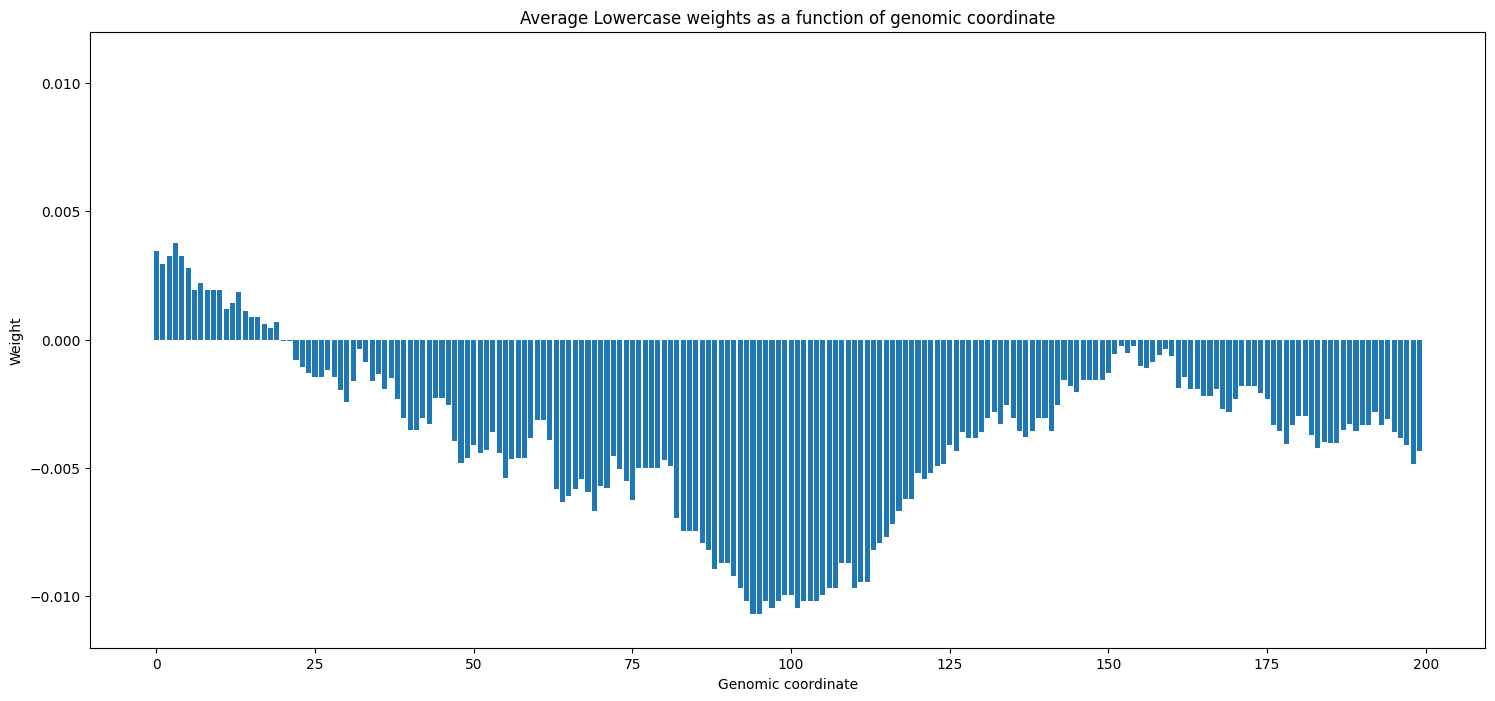

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_avg_weights)), PUM2_ENCSR661ICQ_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_avg_uppercase_weights)), PUM2_ENCSR661ICQ_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(PUM2_ENCSR661ICQ_avg_lowercase_weights)), PUM2_ENCSR661ICQ_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

# QKI

## ENCSR366YOG

### Import dataset and fit model

In [14]:
QKI_ENCSR366YOG_ds = import_dataset()
[QKI_ENCSR366YOG_train, QKI_ENCSR366YOG_test] = train_test_split(QKI_ENCSR366YOG_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR366YOG_train_features = pd.get_dummies(QKI_ENCSR366YOG_train.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_train_labels = QKI_ENCSR366YOG_train['label'].to_numpy()

QKI_ENCSR366YOG_test_features = pd.get_dummies(QKI_ENCSR366YOG_test.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_test_labels = QKI_ENCSR366YOG_test['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR366YOG_model = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR366YOG_model = QKI_ENCSR366YOG_model.fit(QKI_ENCSR366YOG_train_features, QKI_ENCSR366YOG_train_labels)

Saving QKI_ENCSR366YOG_dataset.txt to QKI_ENCSR366YOG_dataset.txt
User uploaded file "QKI_ENCSR366YOG_dataset.txt" with length 816000 bytes


In [15]:
QKI_ENCSR366YOG_ds_secondary = import_dataset()
[QKI_ENCSR366YOG_train_secondary, QKI_ENCSR366YOG_test_secondary] = train_test_split(QKI_ENCSR366YOG_ds_secondary,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR366YOG_train_features_secondary = pd.get_dummies(QKI_ENCSR366YOG_train_secondary.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_train_labels_secondary = QKI_ENCSR366YOG_train_secondary['label'].to_numpy()

QKI_ENCSR366YOG_test_features_secondary = pd.get_dummies(QKI_ENCSR366YOG_test_secondary.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_test_labels_secondary = QKI_ENCSR366YOG_test_secondary['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR366YOG_model_secondary = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR366YOG_model_secondary = QKI_ENCSR366YOG_model_secondary.fit(QKI_ENCSR366YOG_train_features_secondary, QKI_ENCSR366YOG_train_labels_secondary)

Saving QKI_ENCSR366YOG_dataset_secondary_structure.txt to QKI_ENCSR366YOG_dataset_secondary_structure.txt
User uploaded file "QKI_ENCSR366YOG_dataset_secondary_structure.txt" with length 816000 bytes


### Import RBPmap predictions

In [16]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

QKI_ENCSR366YOG_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
QKI_ENCSR366YOG_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving QKI_ENCSR366YOG_rbp_predictions_no_conservation.txt to QKI_ENCSR366YOG_rbp_predictions_no_conservation.txt
User uploaded file "QKI_ENCSR366YOG_rbp_predictions_no_conservation.txt" with length 20013 bytes


In [17]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

QKI_ENCSR366YOG_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving QKI_ENCSR366YOG_rbp_predictions_with_conservation.txt to QKI_ENCSR366YOG_rbp_predictions_with_conservation.txt
User uploaded file "QKI_ENCSR366YOG_rbp_predictions_with_conservation.txt" with length 20013 bytes


### Display results

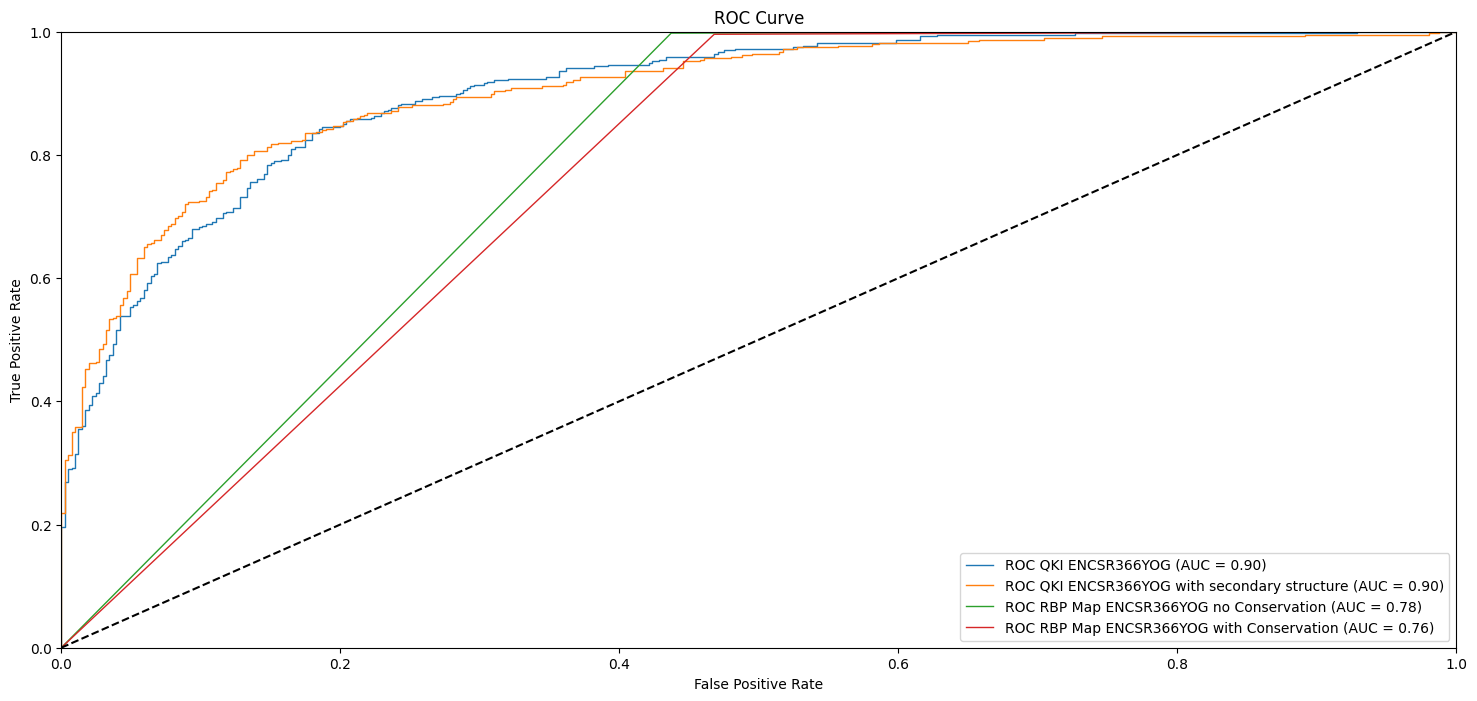

In [18]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR366YOG_model,
    QKI_ENCSR366YOG_test_features,
    QKI_ENCSR366YOG_test_labels,
    name=f"ROC QKI ENCSR366YOG",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR366YOG_model_secondary,
    QKI_ENCSR366YOG_test_features_secondary,
    QKI_ENCSR366YOG_test_labels_secondary,
    name=f"ROC QKI ENCSR366YOG with secondary structure",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR366YOG_rbp_no_conservation,
    QKI_ENCSR366YOG_true_labels,
    name=f"ROC RBP Map ENCSR366YOG no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR366YOG_rbp_with_conservation,
    QKI_ENCSR366YOG_true_labels,
    name=f"ROC RBP Map ENCSR366YOG with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
QKI_ENCSR366YOG_weights = QKI_ENCSR366YOG_model.coef_[0]
QKI_ENCSR366YOG_A_weights = QKI_ENCSR366YOG_weights[::8]
QKI_ENCSR366YOG_a_weights = QKI_ENCSR366YOG_weights[4::8]
QKI_ENCSR366YOG_C_weights = QKI_ENCSR366YOG_weights[1::8]
QKI_ENCSR366YOG_c_weights = QKI_ENCSR366YOG_weights[5::8]
QKI_ENCSR366YOG_G_weights = QKI_ENCSR366YOG_weights[2::8]
QKI_ENCSR366YOG_g_weights = QKI_ENCSR366YOG_weights[6::8]
QKI_ENCSR366YOG_T_weights = QKI_ENCSR366YOG_weights[3::8]
QKI_ENCSR366YOG_t_weights = QKI_ENCSR366YOG_weights[7::8]

QKI_ENCSR366YOG_avg_weights = QKI_ENCSR366YOG_weights.reshape(-1, 8).mean(axis=1)
QKI_ENCSR366YOG_avg_uppercase_weights = QKI_ENCSR366YOG_weights.reshape(-1, 4).mean(axis=1)[::2]
QKI_ENCSR366YOG_avg_lowercase_weights = QKI_ENCSR366YOG_weights.reshape(-1, 4).mean(axis=1)[1::2]

print('Average weights mean is ', QKI_ENCSR366YOG_avg_weights.mean())
print('Average weights variance is ', QKI_ENCSR366YOG_avg_weights.var())

Average weights mean is  1.6225085511245574e-18
Average weights variance is  6.008814175419986e-35


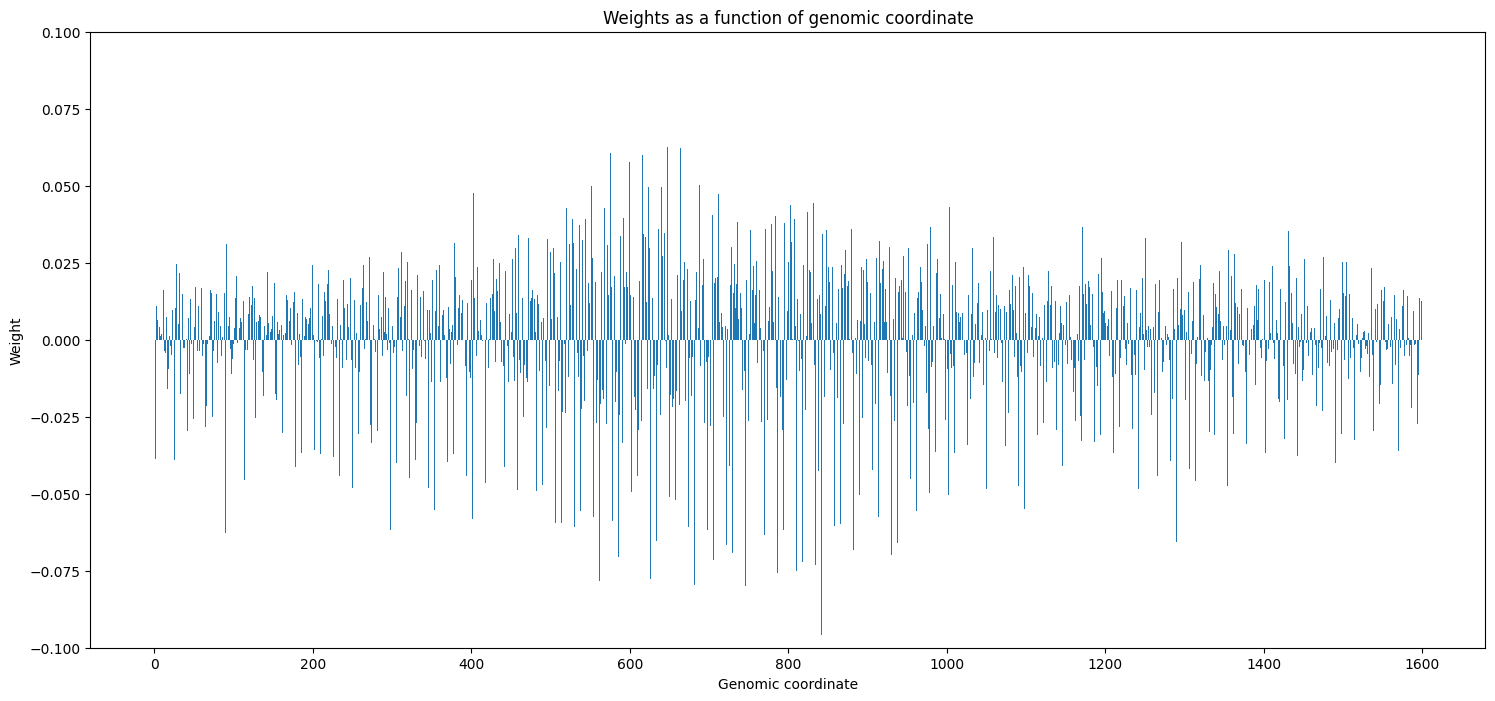

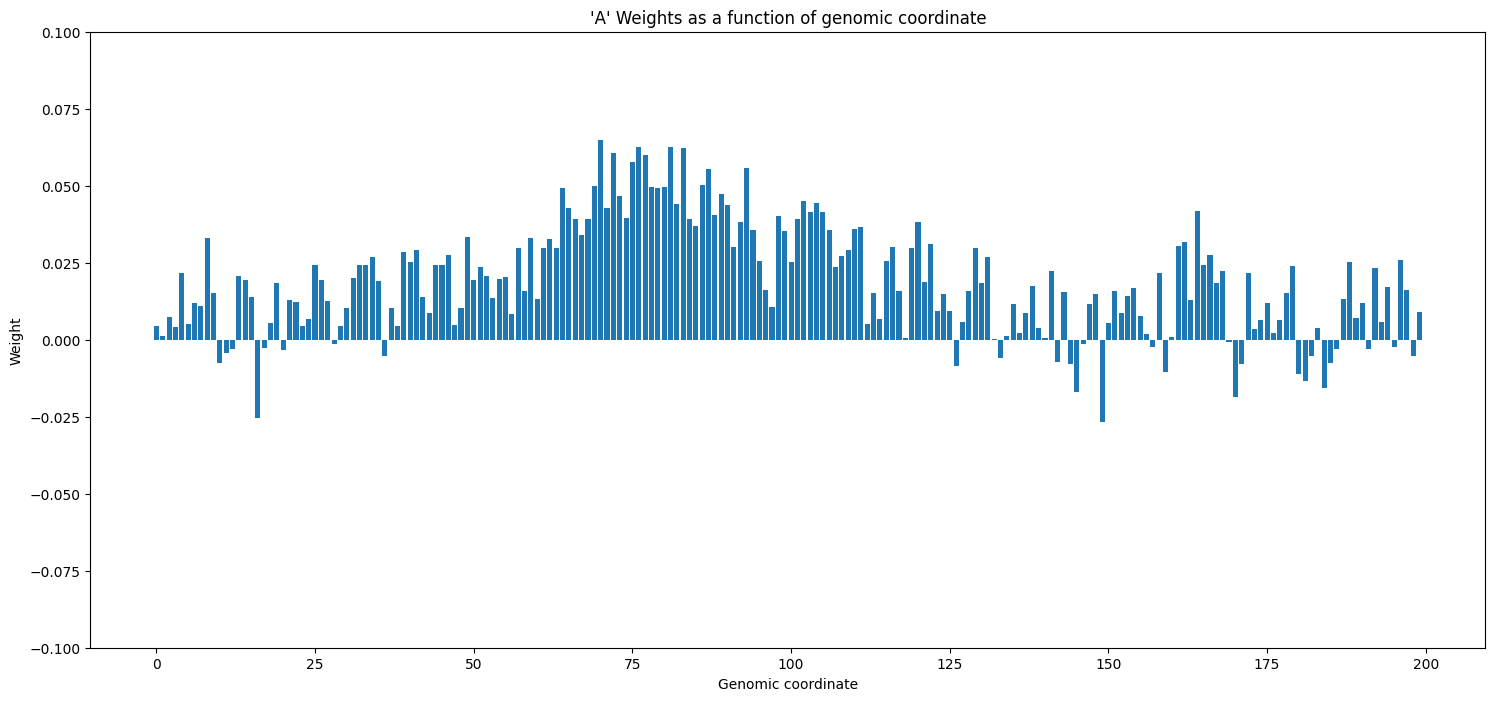

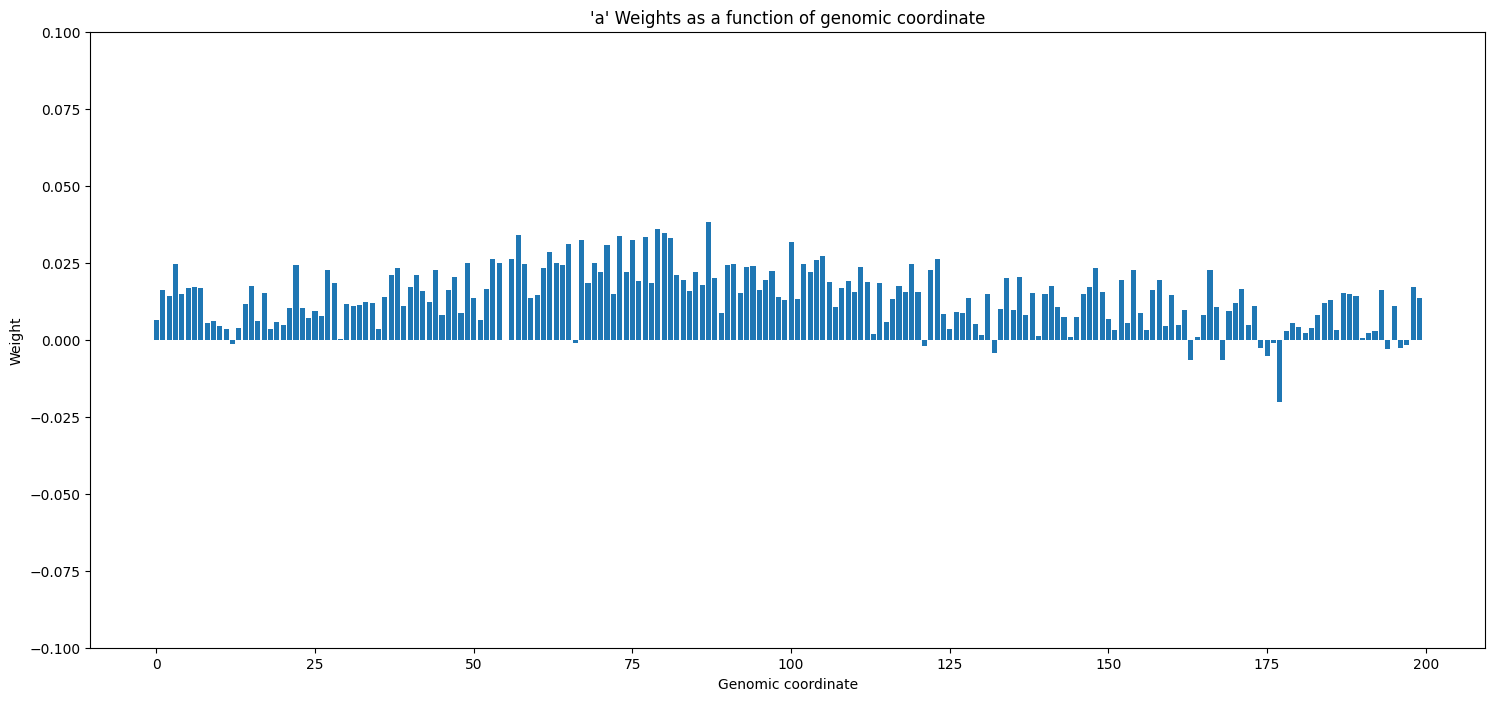

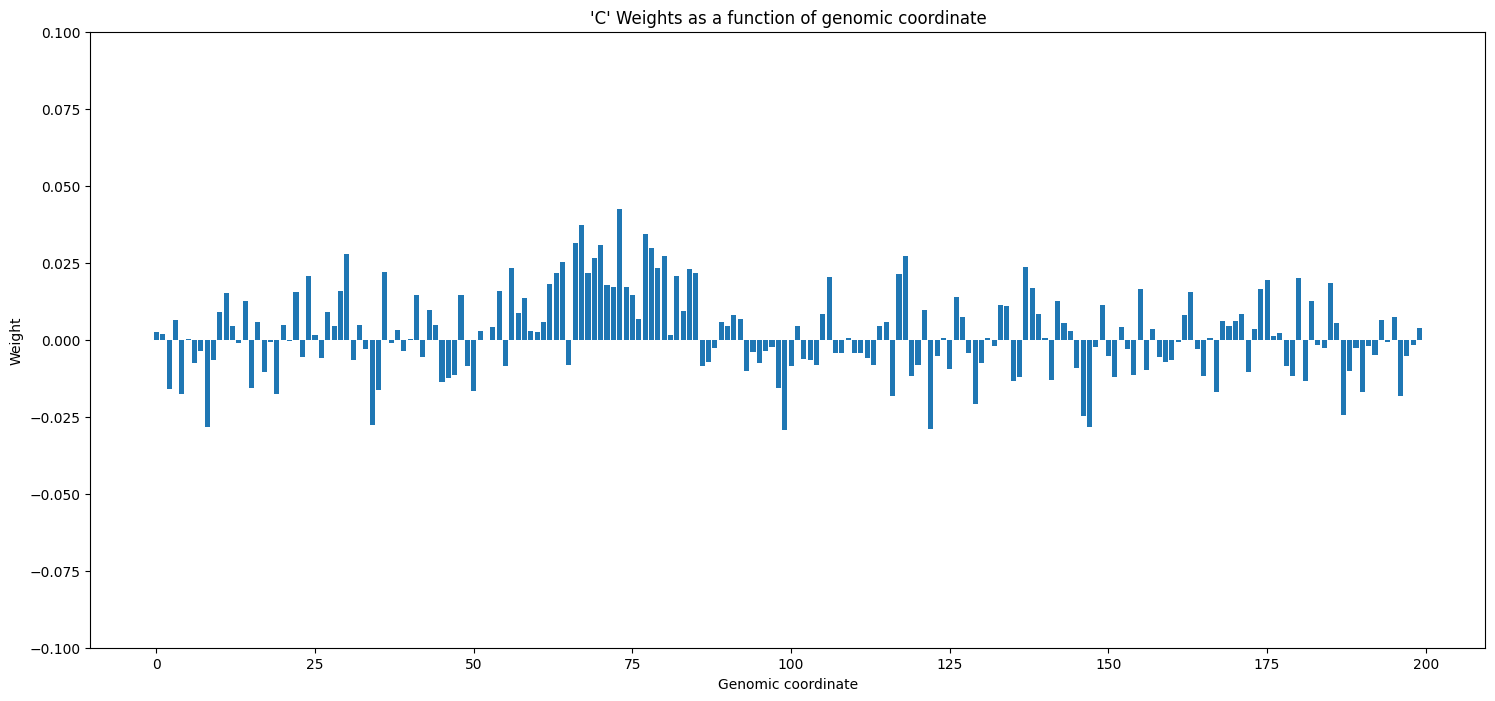

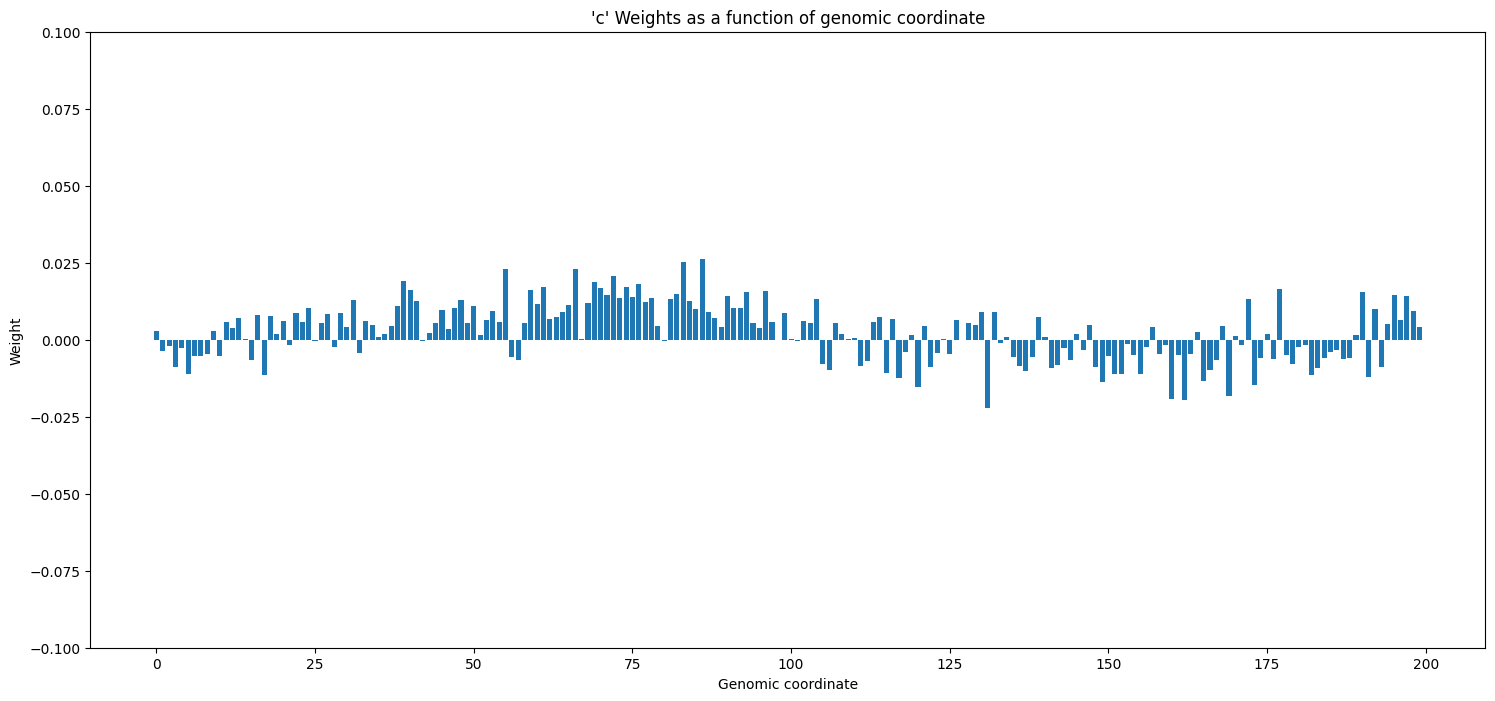

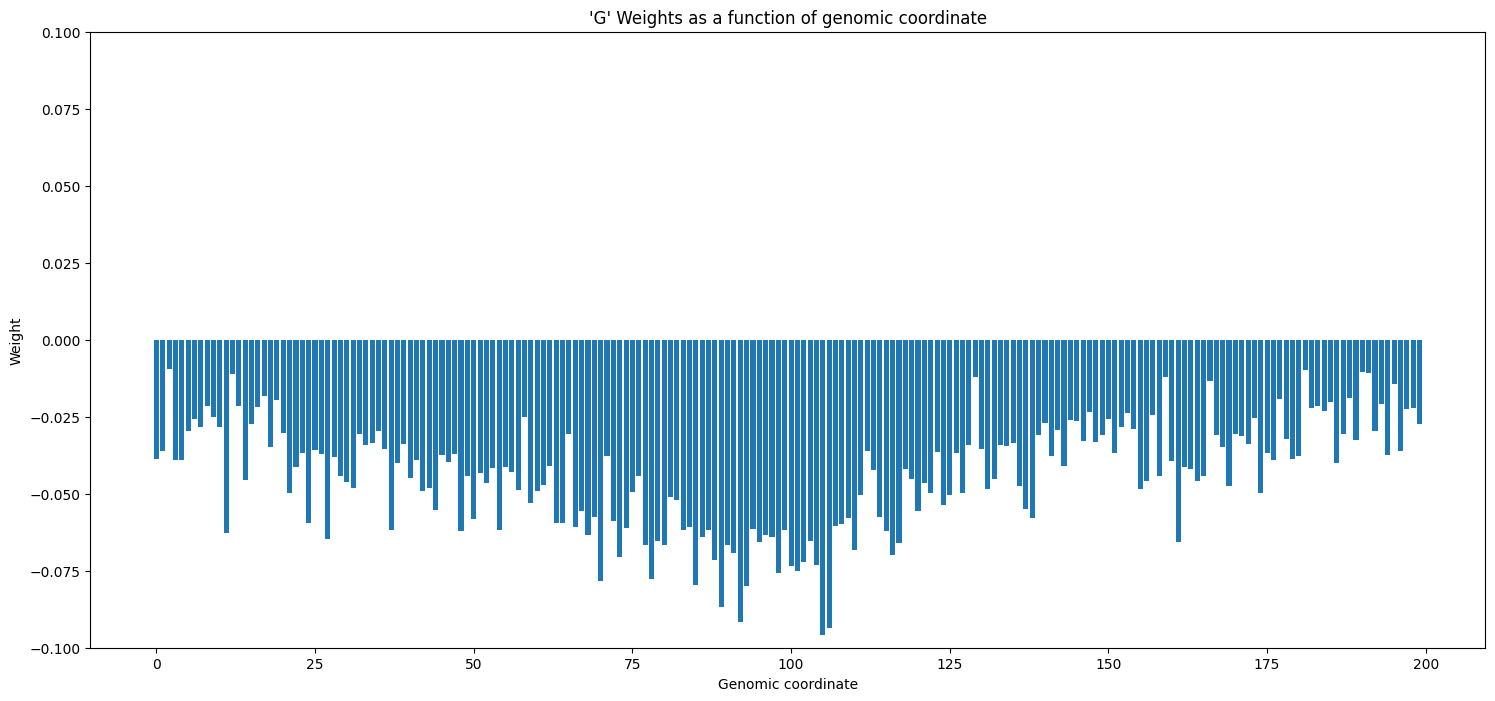

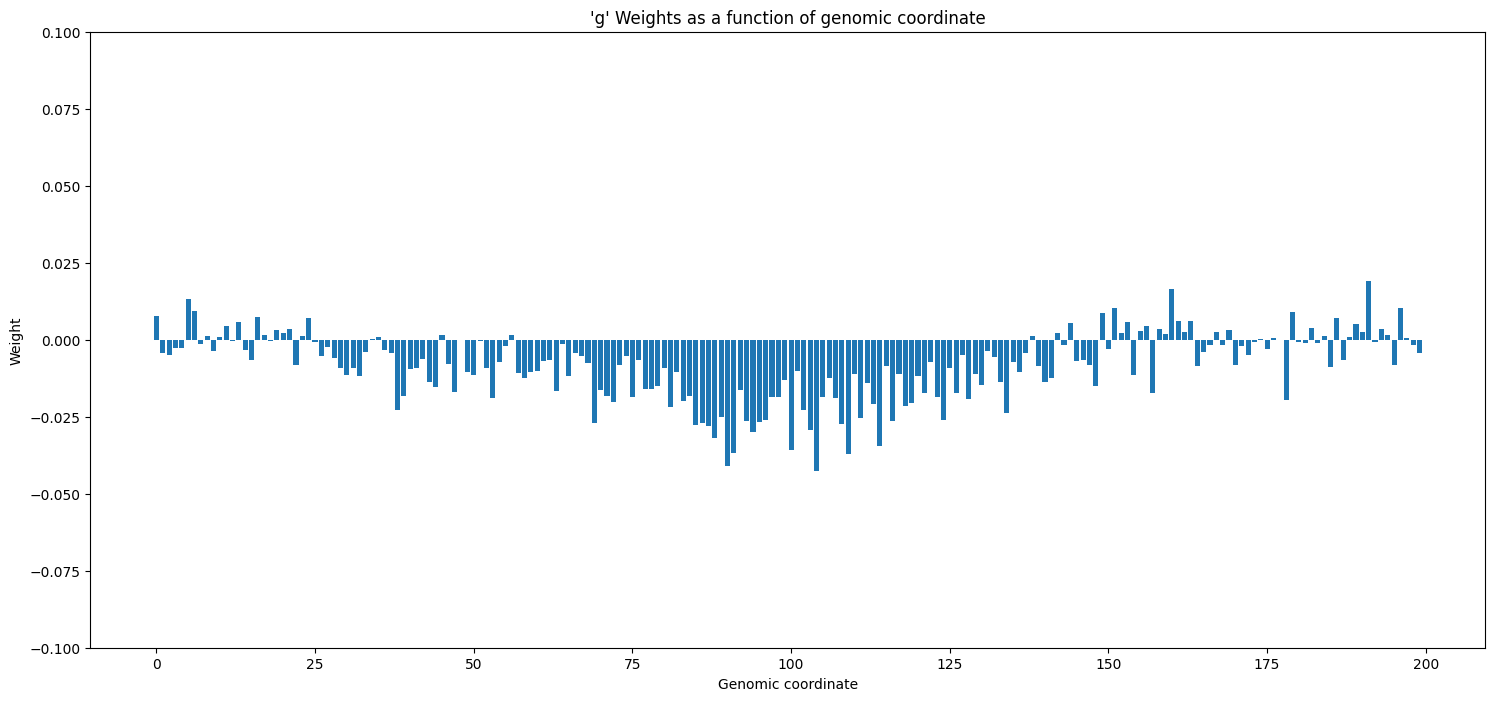

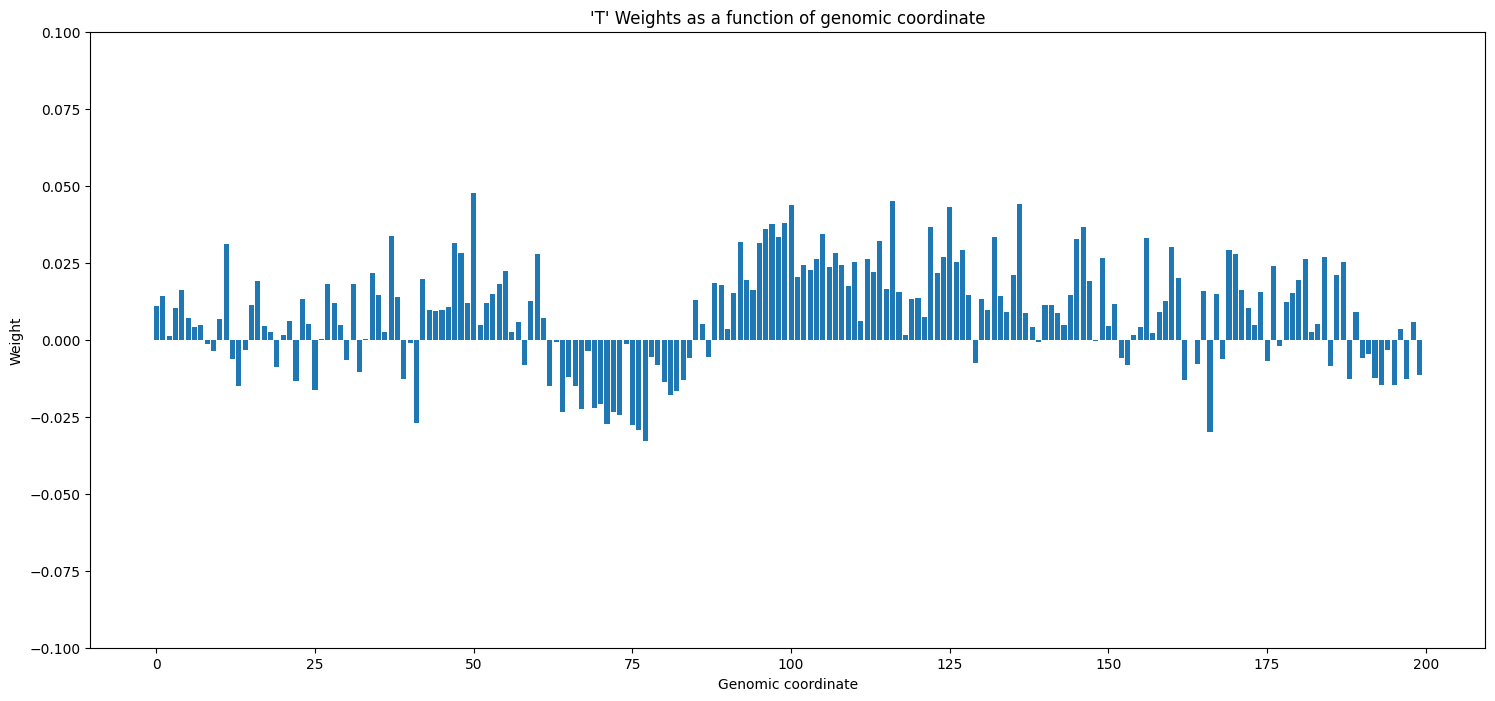

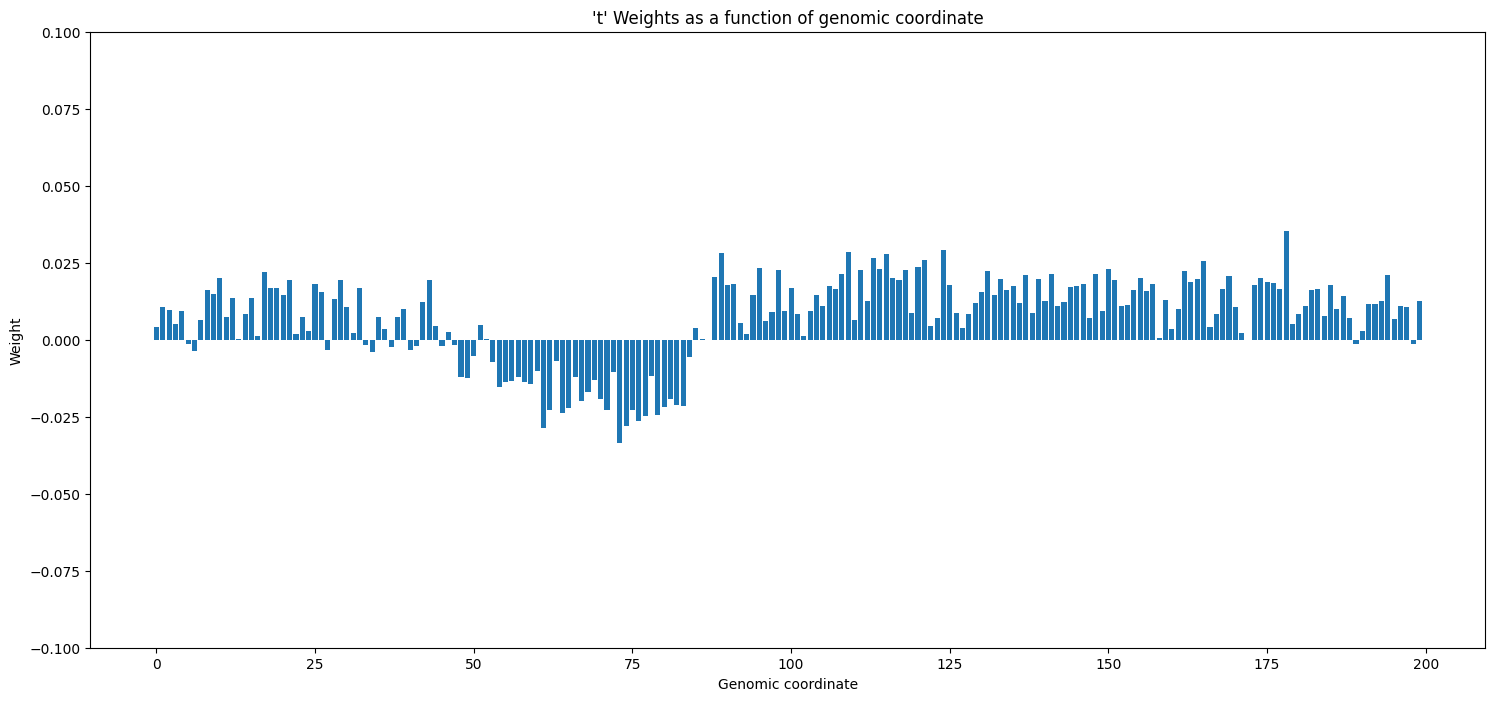

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_weights)), QKI_ENCSR366YOG_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_A_weights)), QKI_ENCSR366YOG_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_a_weights)), QKI_ENCSR366YOG_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_C_weights)), QKI_ENCSR366YOG_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_c_weights)), QKI_ENCSR366YOG_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_G_weights)), QKI_ENCSR366YOG_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_g_weights)), QKI_ENCSR366YOG_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_T_weights)), QKI_ENCSR366YOG_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_t_weights)), QKI_ENCSR366YOG_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

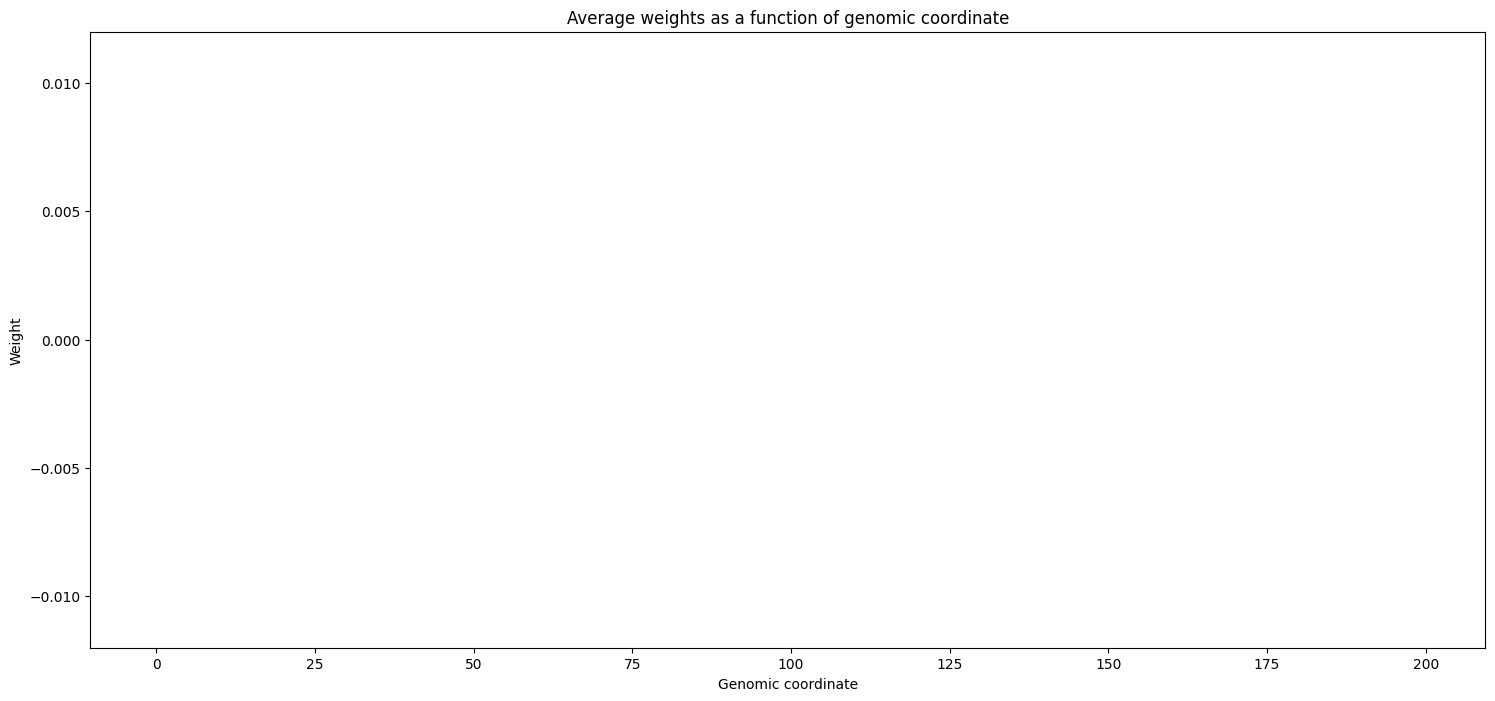

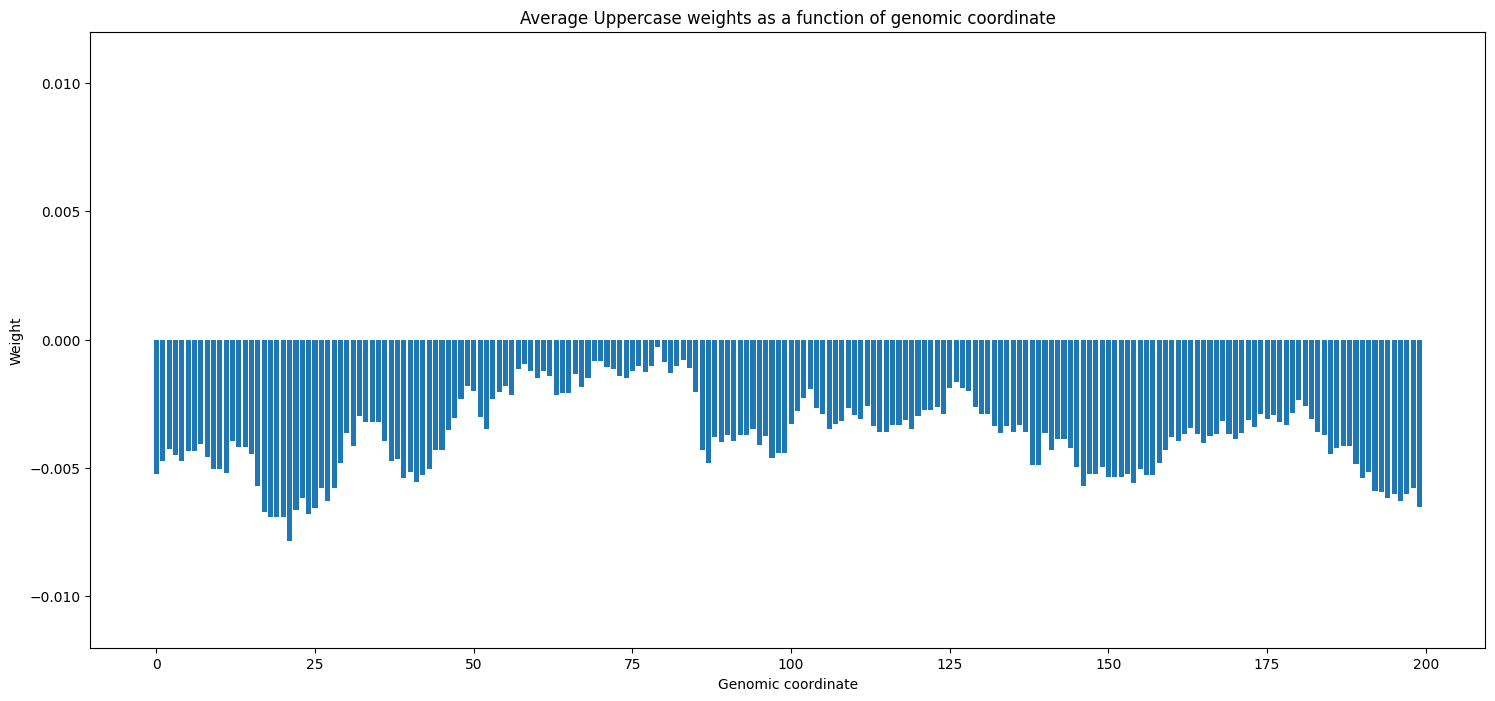

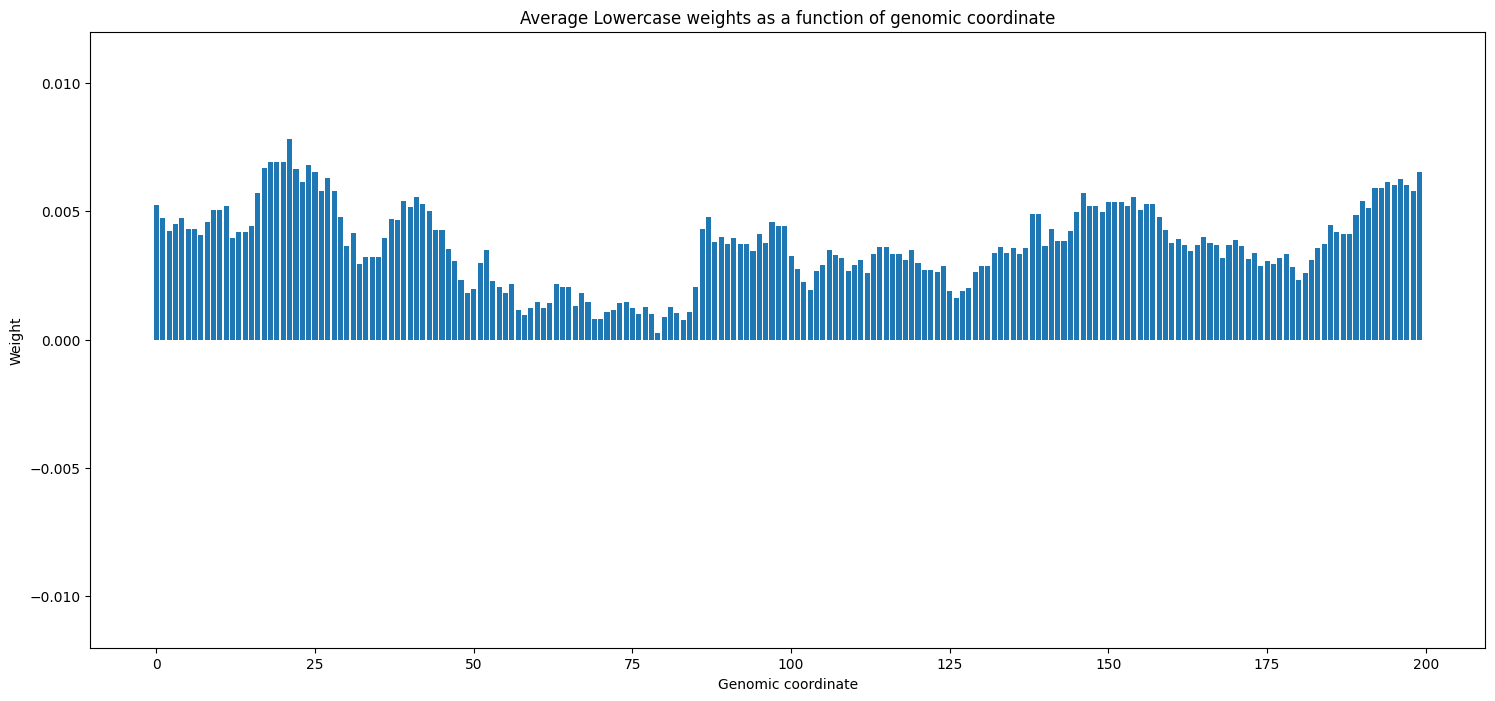

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_avg_weights)), QKI_ENCSR366YOG_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_avg_uppercase_weights)), QKI_ENCSR366YOG_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_avg_lowercase_weights)), QKI_ENCSR366YOG_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

## ENCSR570WLM

### Import dataset and fit model

In [ ]:
QKI_ENCSR570WLM_ds = import_dataset()
[QKI_ENCSR570WLM_train, QKI_ENCSR570WLM_test] = train_test_split(QKI_ENCSR570WLM_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR570WLM_train_features = pd.get_dummies(QKI_ENCSR570WLM_train.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_train_labels = QKI_ENCSR570WLM_train['label'].to_numpy()

QKI_ENCSR570WLM_test_features = pd.get_dummies(QKI_ENCSR570WLM_test.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_test_labels = QKI_ENCSR570WLM_test['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR570WLM_model = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR570WLM_model = QKI_ENCSR570WLM_model.fit(QKI_ENCSR570WLM_train_features, QKI_ENCSR570WLM_train_labels)

Saving QKI_ENCSR570WLM_dataset.txt to QKI_ENCSR570WLM_dataset.txt
User uploaded file "QKI_ENCSR570WLM_dataset.txt" with length 816000 bytes


### Import RBPmap predictions

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

QKI_ENCSR570WLM_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
QKI_ENCSR570WLM_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving QKI_ENCSR570WLM_rbp_predictions_no_conservation.txt to QKI_ENCSR570WLM_rbp_predictions_no_conservation.txt
User uploaded file "QKI_ENCSR570WLM_rbp_predictions_no_conservation.txt" with length 20013 bytes


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

QKI_ENCSR570WLM_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving QKI_ENCSR570WLM_rbp_predictions_with_conservation.txt to QKI_ENCSR570WLM_rbp_predictions_with_conservation.txt
User uploaded file "QKI_ENCSR570WLM_rbp_predictions_with_conservation.txt" with length 20013 bytes


### Display results

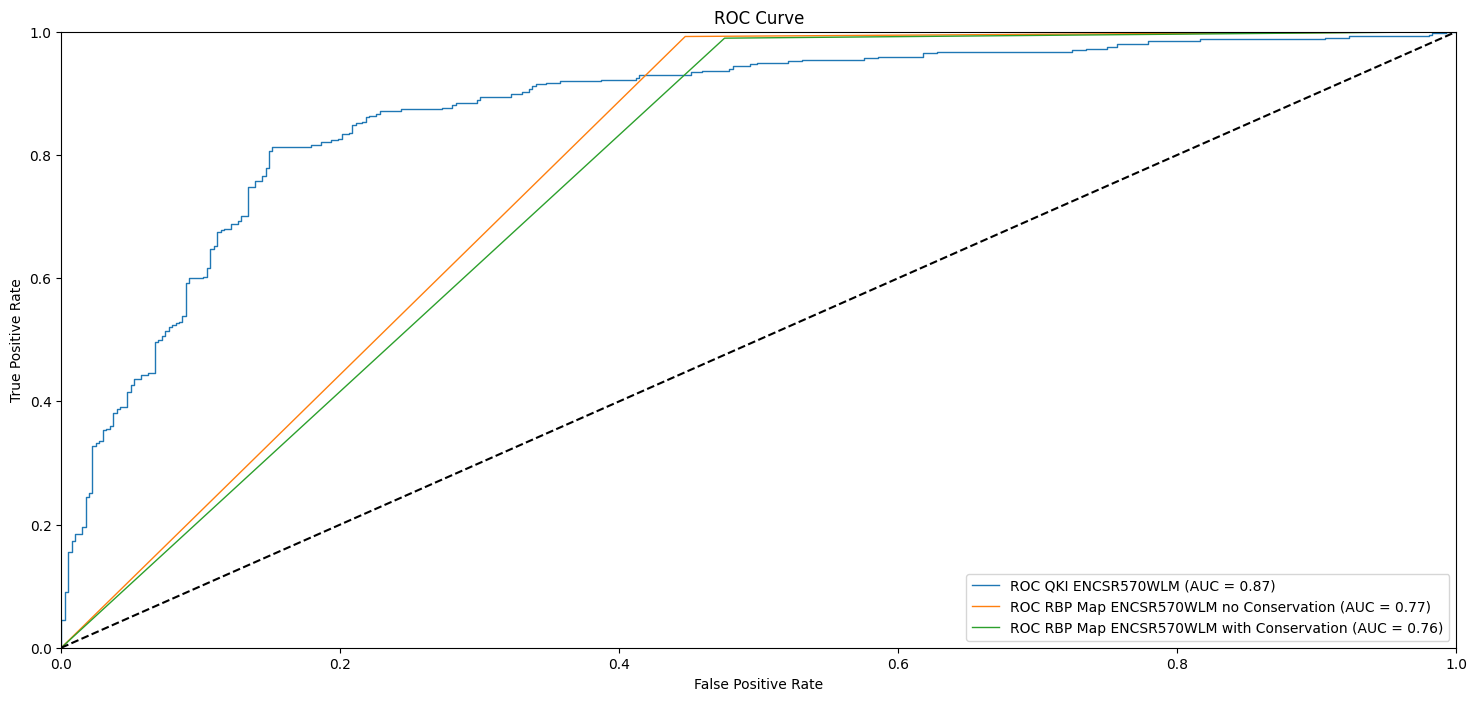

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR570WLM_model,
    QKI_ENCSR570WLM_test_features,
    QKI_ENCSR570WLM_test_labels,
    name=f"ROC QKI ENCSR570WLM",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR570WLM_rbp_no_conservation,
    QKI_ENCSR570WLM_true_labels,
    name=f"ROC RBP Map ENCSR570WLM no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR570WLM_rbp_with_conservation,
    QKI_ENCSR570WLM_true_labels,
    name=f"ROC RBP Map ENCSR570WLM with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
QKI_ENCSR570WLM_weights = QKI_ENCSR570WLM_model.coef_[0]
QKI_ENCSR570WLM_A_weights = QKI_ENCSR570WLM_weights[::8]
QKI_ENCSR570WLM_a_weights = QKI_ENCSR570WLM_weights[4::8]
QKI_ENCSR570WLM_C_weights = QKI_ENCSR570WLM_weights[1::8]
QKI_ENCSR570WLM_c_weights = QKI_ENCSR570WLM_weights[5::8]
QKI_ENCSR570WLM_G_weights = QKI_ENCSR570WLM_weights[2::8]
QKI_ENCSR570WLM_g_weights = QKI_ENCSR570WLM_weights[6::8]
QKI_ENCSR570WLM_T_weights = QKI_ENCSR570WLM_weights[3::8]
QKI_ENCSR570WLM_t_weights = QKI_ENCSR570WLM_weights[7::8]

QKI_ENCSR570WLM_avg_weights = QKI_ENCSR570WLM_weights.reshape(-1, 8).mean(axis=1)
QKI_ENCSR570WLM_avg_uppercase_weights = QKI_ENCSR570WLM_weights.reshape(-1, 4).mean(axis=1)[::2]
QKI_ENCSR570WLM_avg_lowercase_weights = QKI_ENCSR570WLM_weights.reshape(-1, 4).mean(axis=1)[1::2]

print('Average weights mean is ', QKI_ENCSR570WLM_avg_weights.mean())
print('Average weights variance is ', QKI_ENCSR570WLM_avg_weights.var())

Average weights mean is  -4.670200857981311e-18
Average weights variance is  5.689644654581329e-35


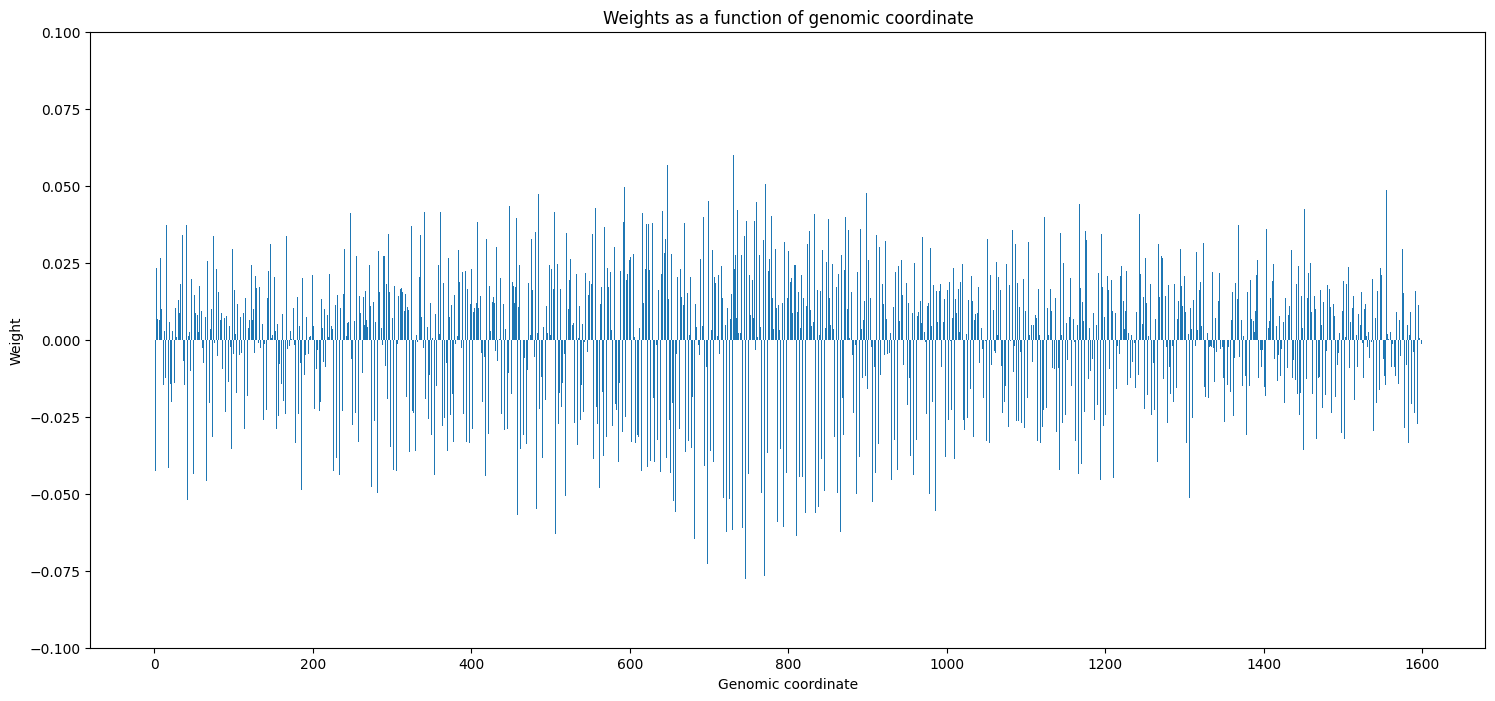

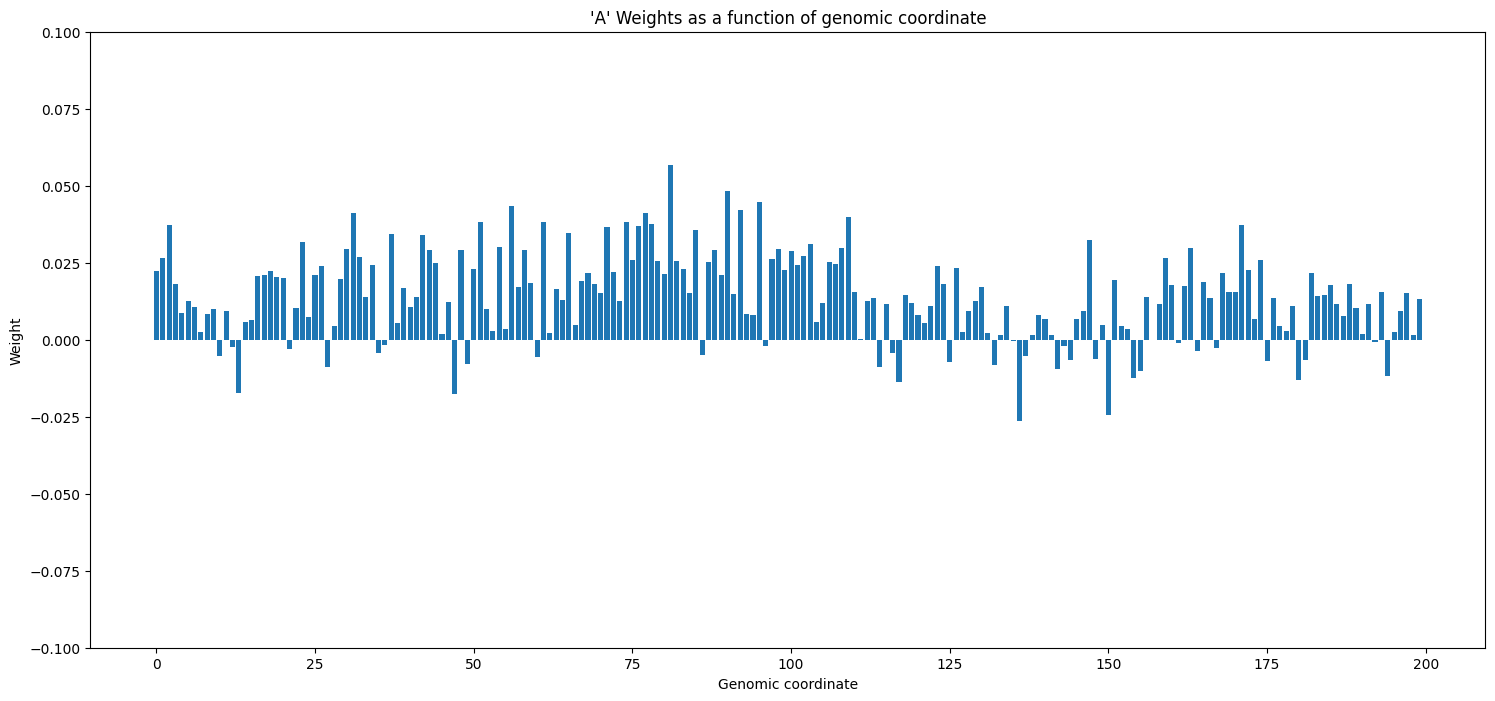

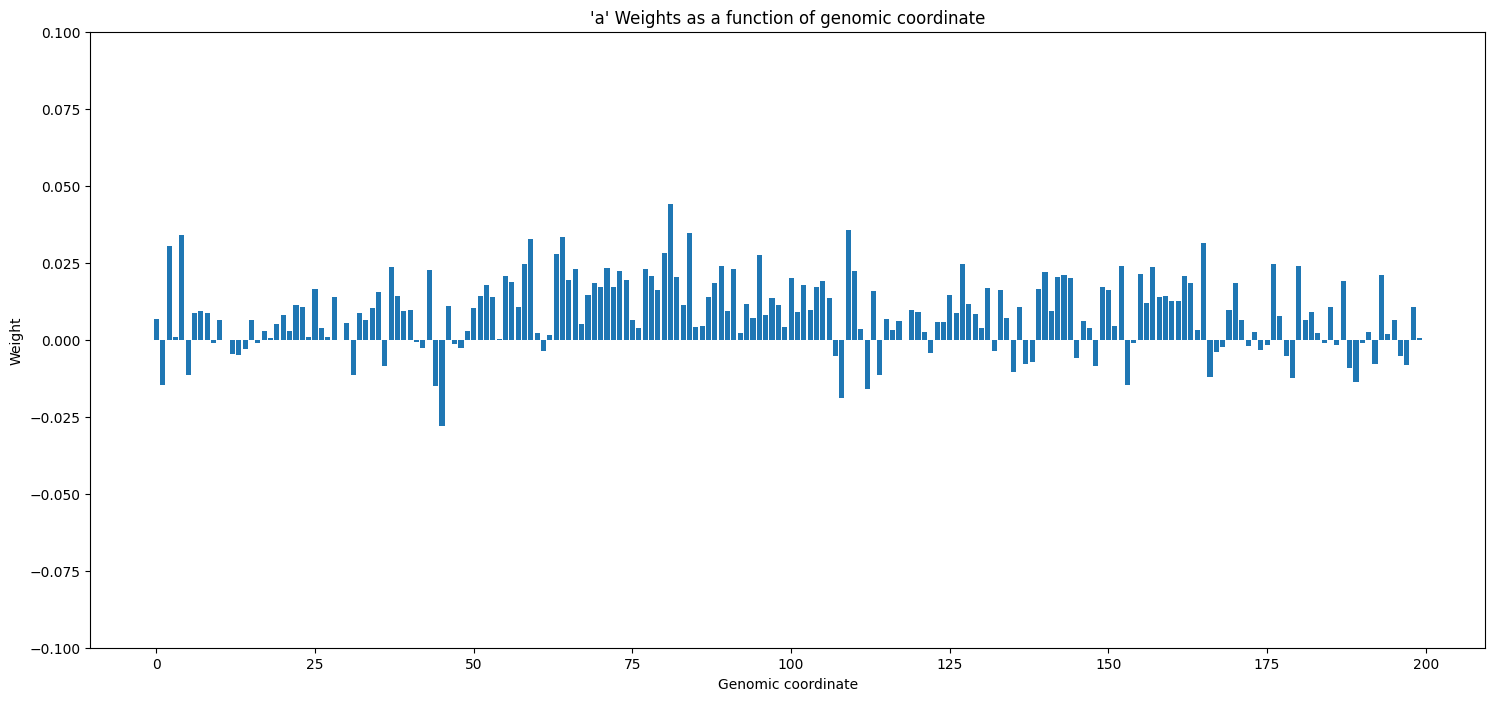

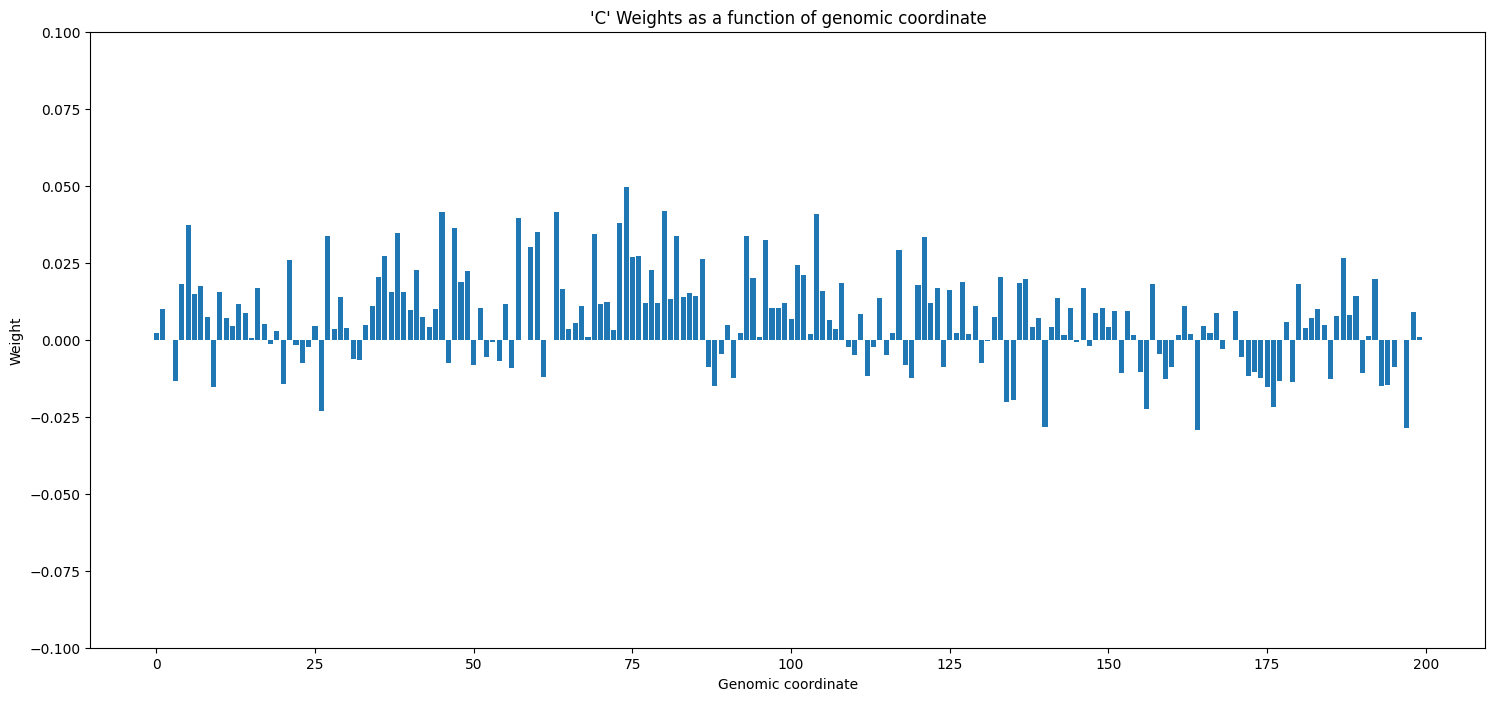

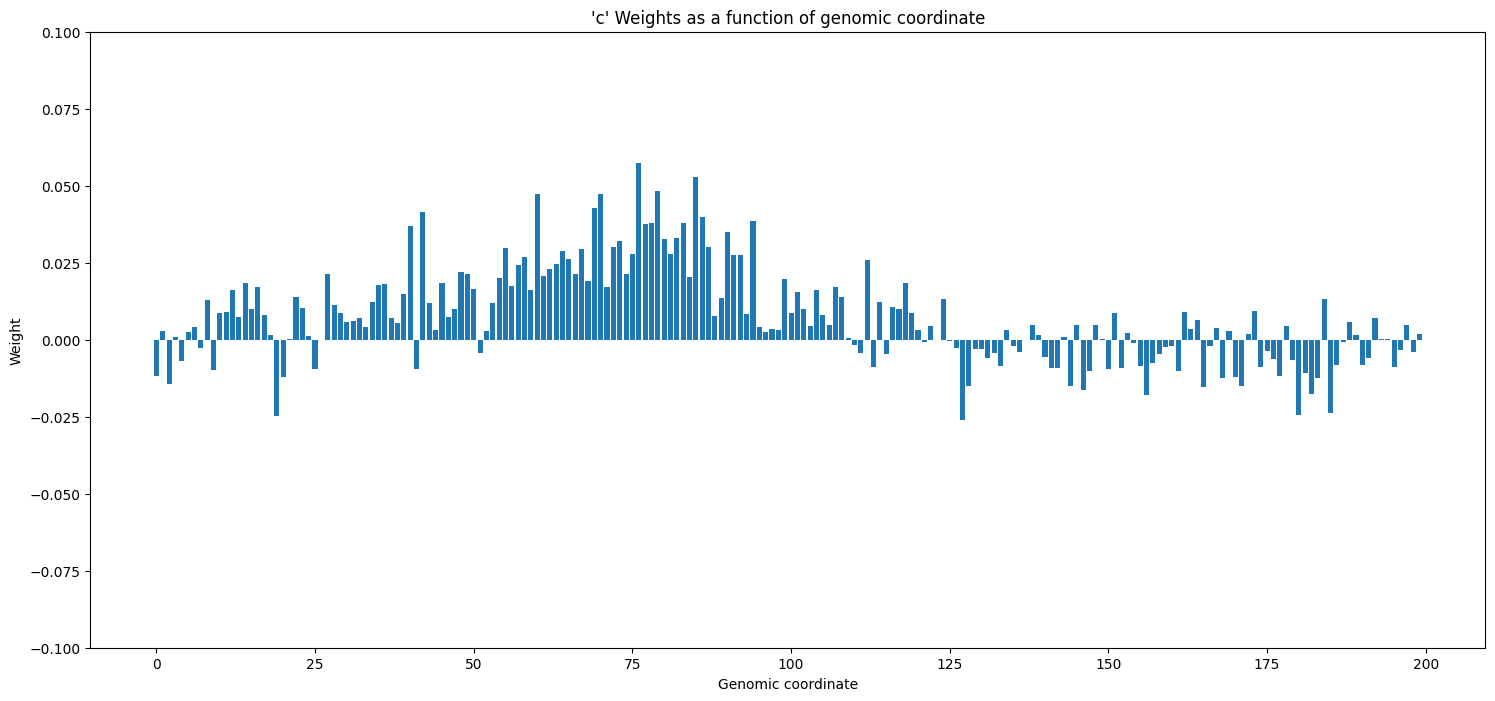

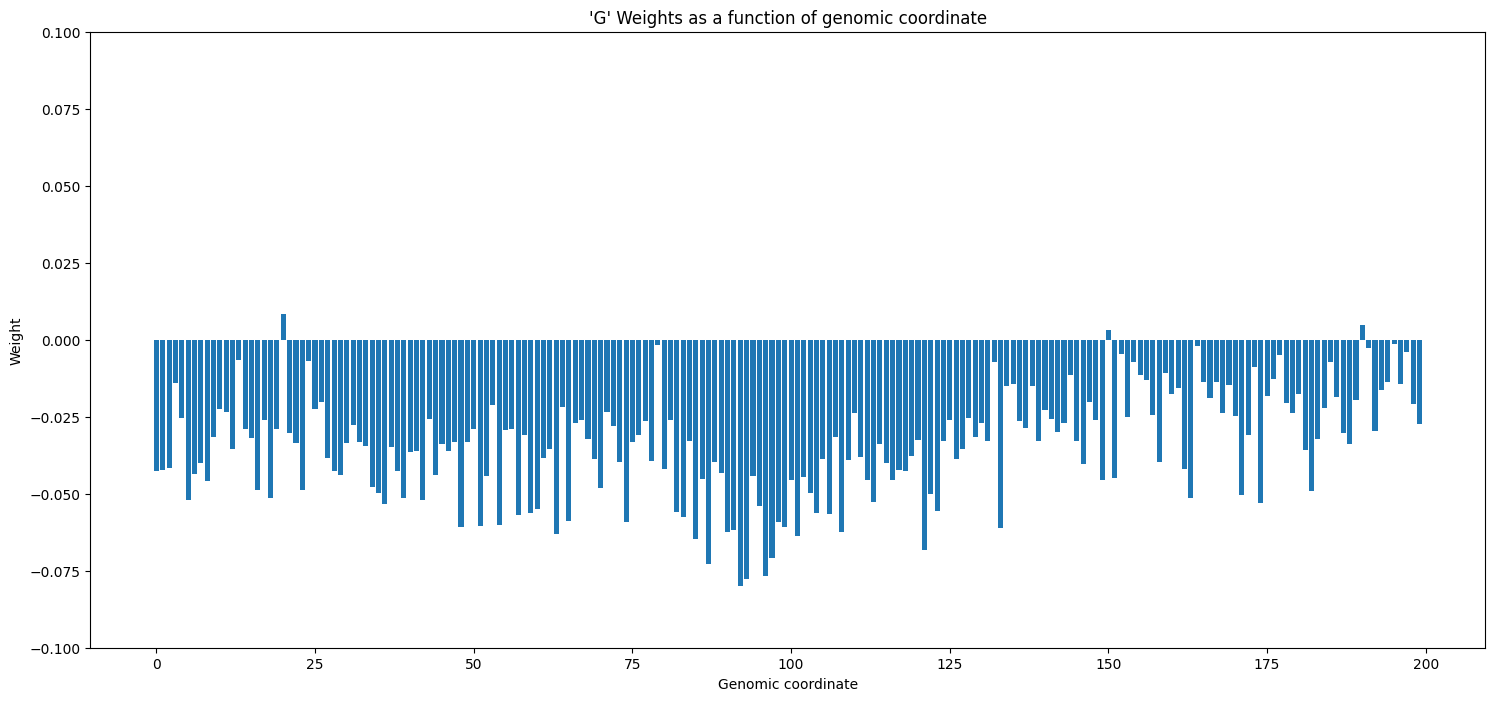

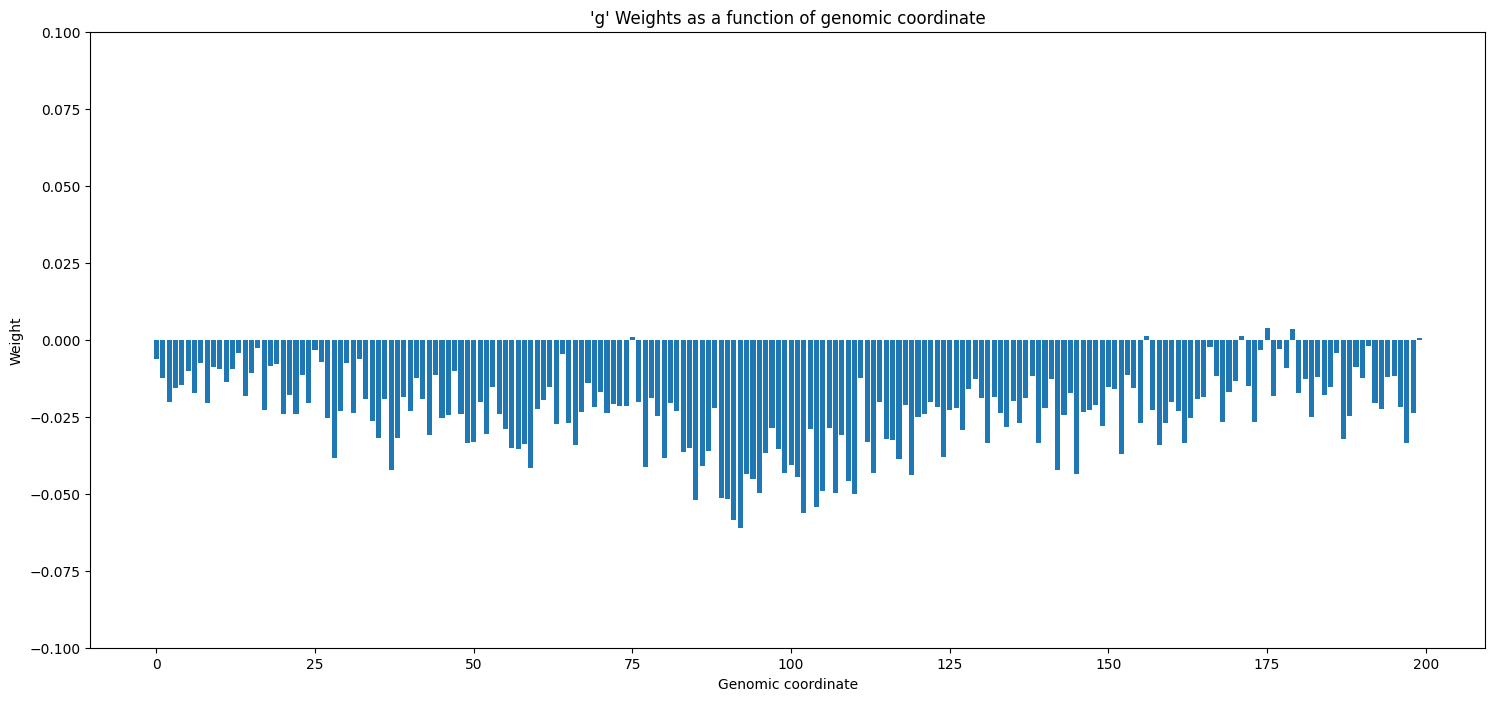

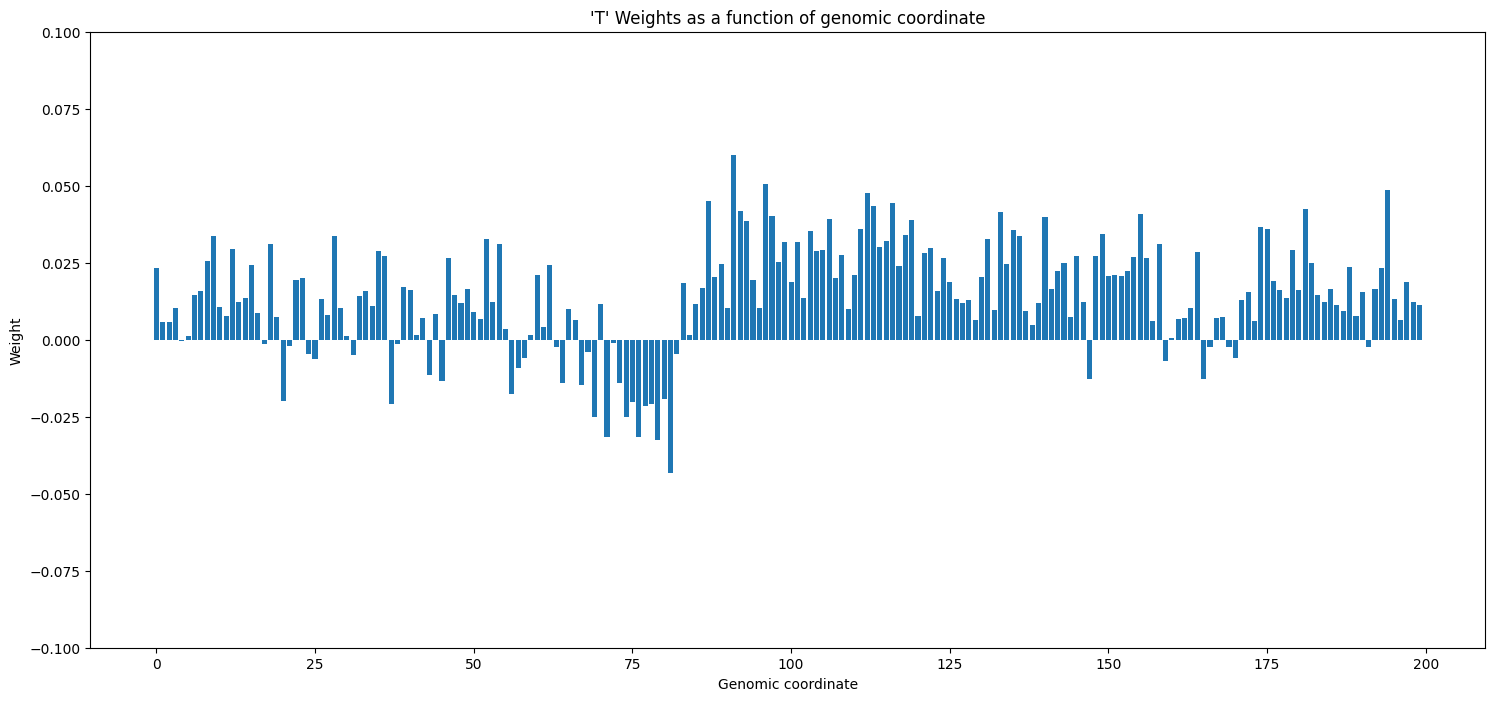

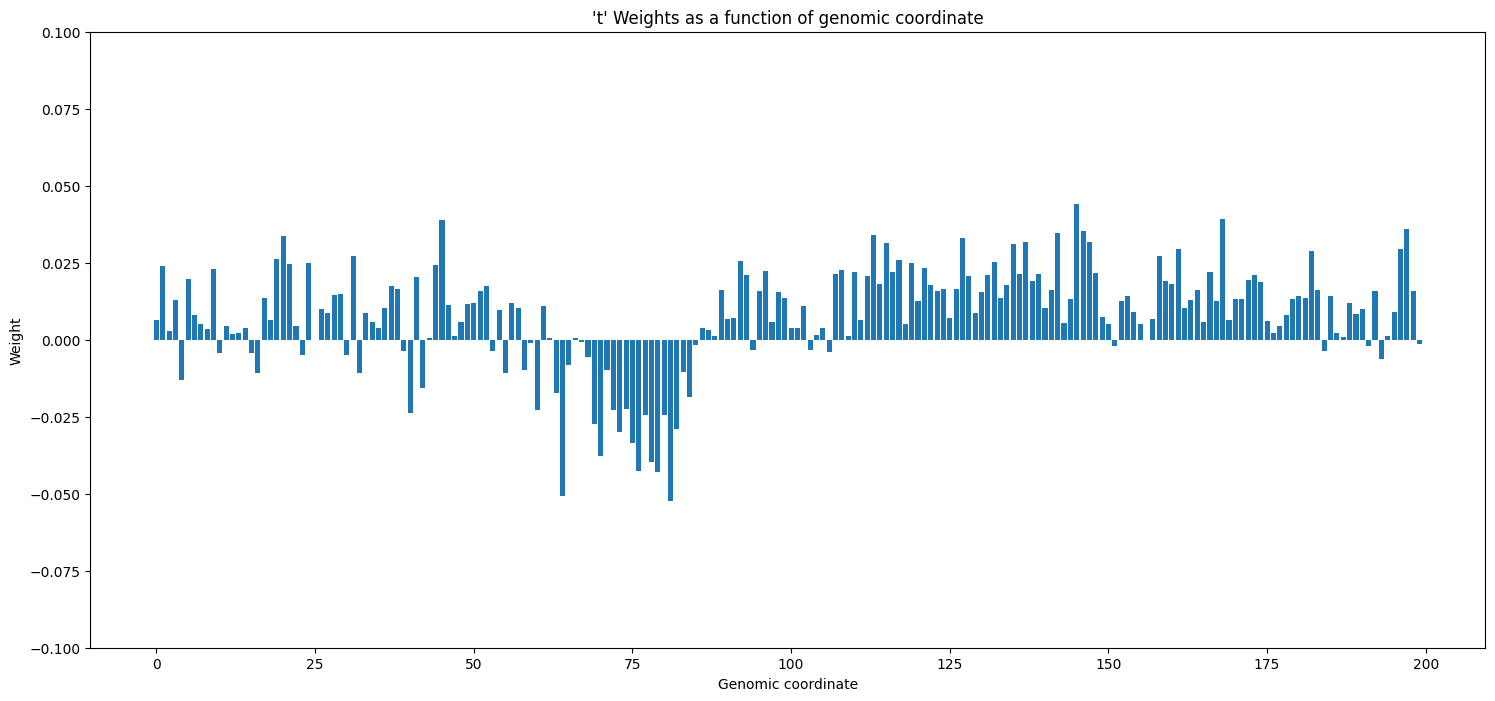

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_weights)), QKI_ENCSR570WLM_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_A_weights)), QKI_ENCSR570WLM_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_a_weights)), QKI_ENCSR570WLM_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_C_weights)), QKI_ENCSR570WLM_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_c_weights)), QKI_ENCSR570WLM_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_G_weights)), QKI_ENCSR570WLM_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_g_weights)), QKI_ENCSR570WLM_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_T_weights)), QKI_ENCSR570WLM_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_t_weights)), QKI_ENCSR570WLM_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

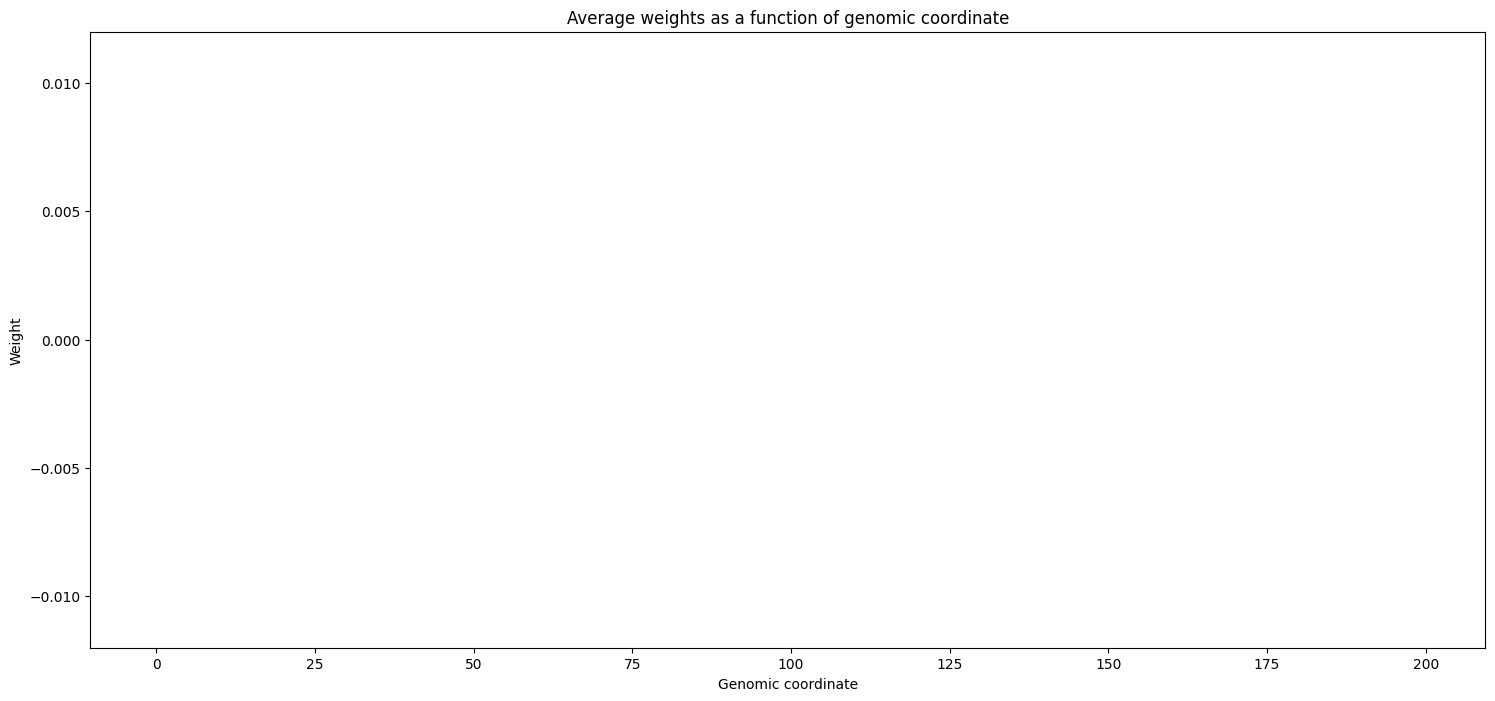

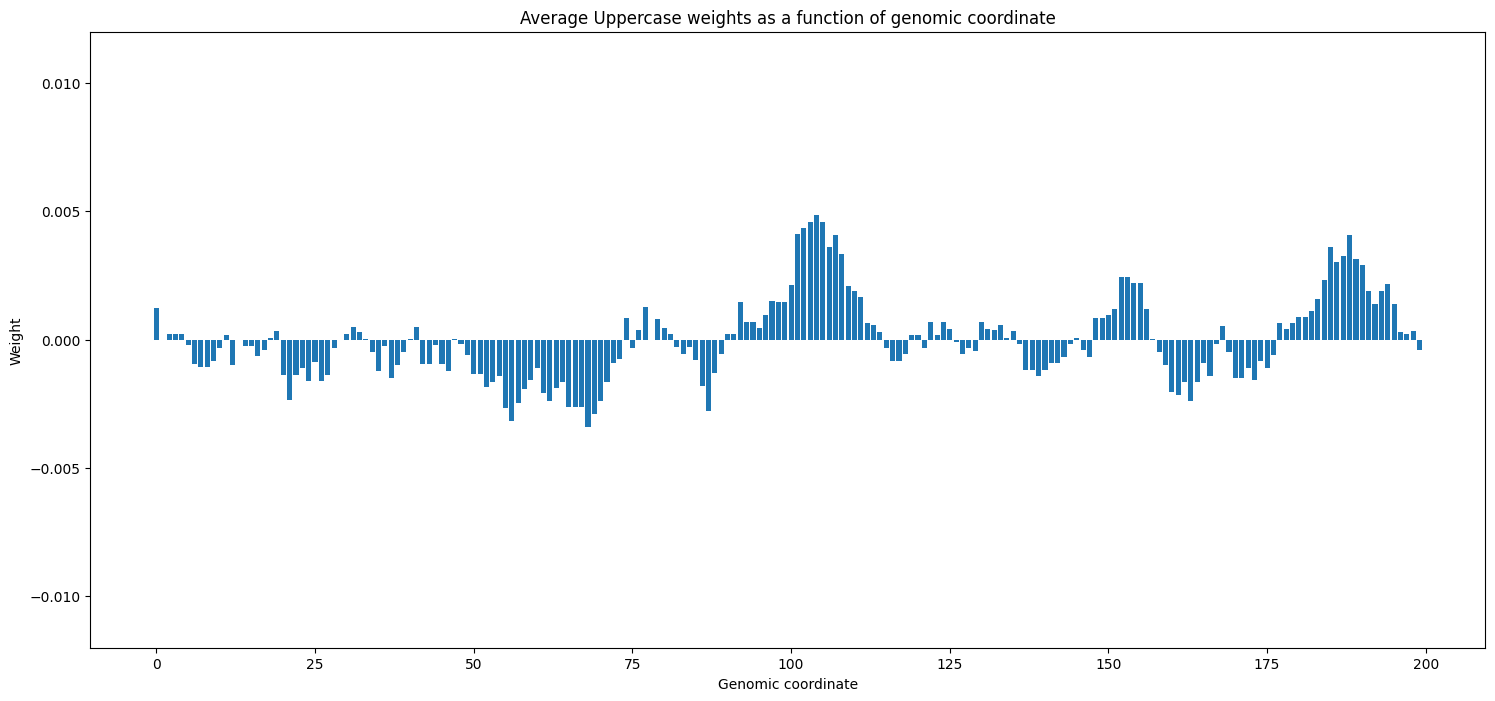

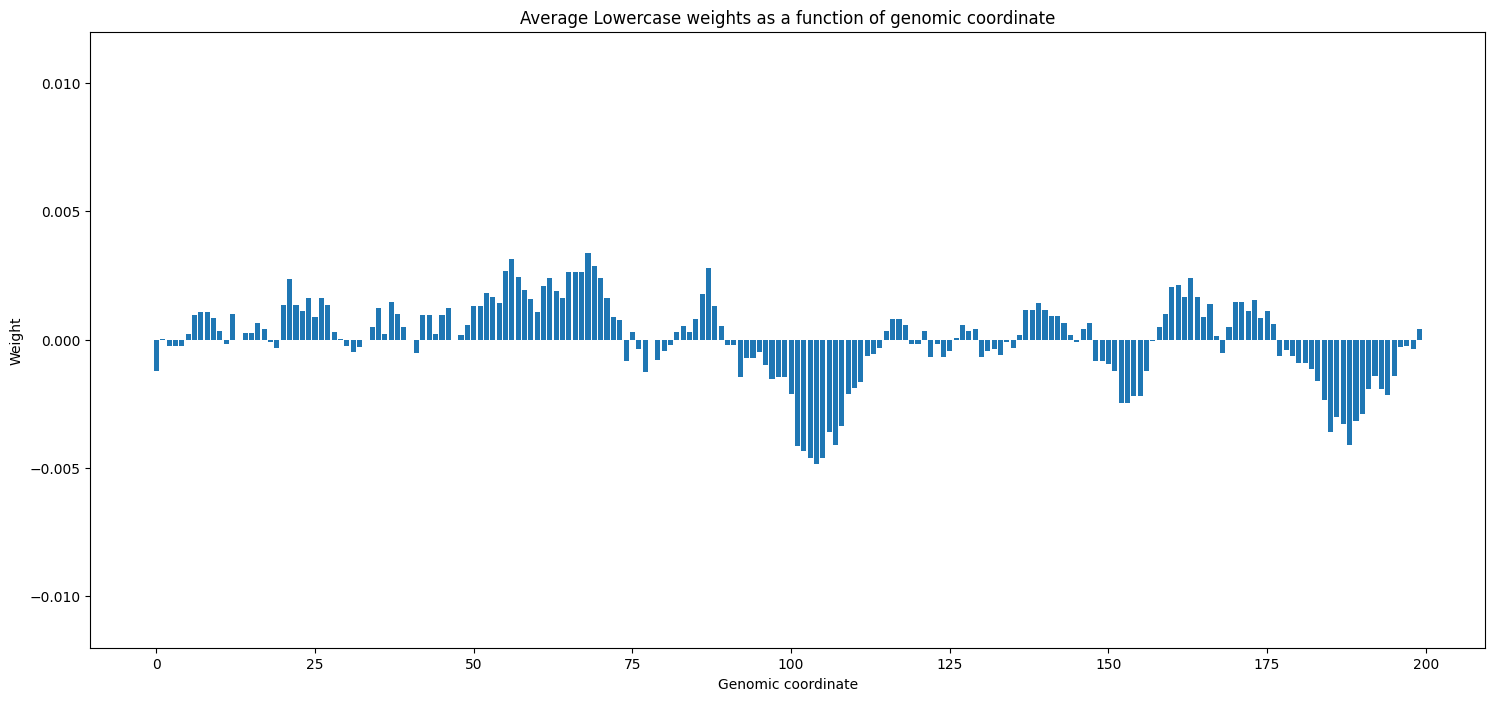

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_avg_weights)), QKI_ENCSR570WLM_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_avg_uppercase_weights)), QKI_ENCSR570WLM_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR570WLM_avg_lowercase_weights)), QKI_ENCSR570WLM_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

## Compare experiments

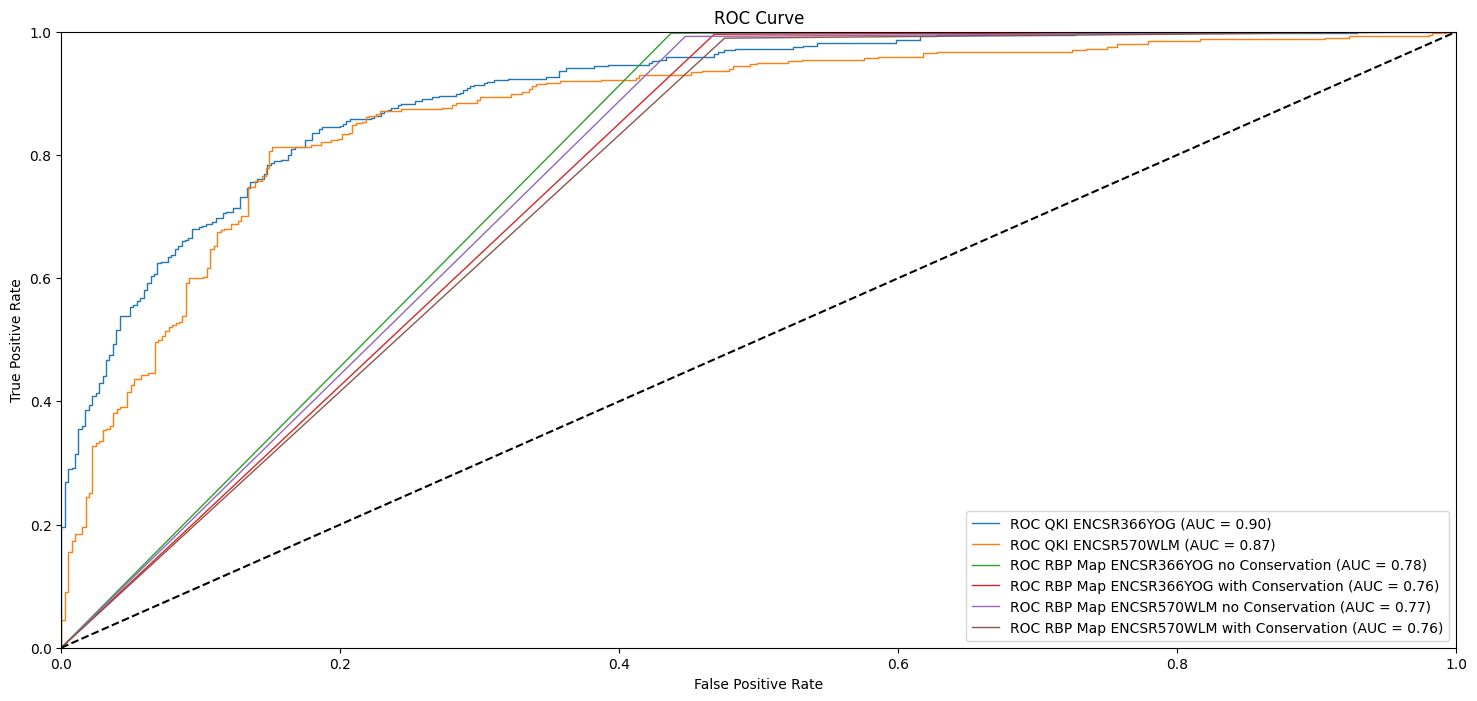

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR366YOG_model,
    QKI_ENCSR366YOG_test_features,
    QKI_ENCSR366YOG_test_labels,
    name=f"ROC QKI ENCSR366YOG",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR570WLM_model,
    QKI_ENCSR570WLM_test_features,
    QKI_ENCSR570WLM_test_labels,
    name=f"ROC QKI ENCSR570WLM",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR366YOG_rbp_no_conservation,
    QKI_ENCSR366YOG_true_labels,
    name=f"ROC RBP Map ENCSR366YOG no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR366YOG_rbp_with_conservation,
    QKI_ENCSR366YOG_true_labels,
    name=f"ROC RBP Map ENCSR366YOG with Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR570WLM_rbp_no_conservation,
    QKI_ENCSR570WLM_true_labels,
    name=f"ROC RBP Map ENCSR570WLM no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    QKI_ENCSR570WLM_rbp_with_conservation,
    QKI_ENCSR570WLM_true_labels,
    name=f"ROC RBP Map ENCSR570WLM with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Compare model weights

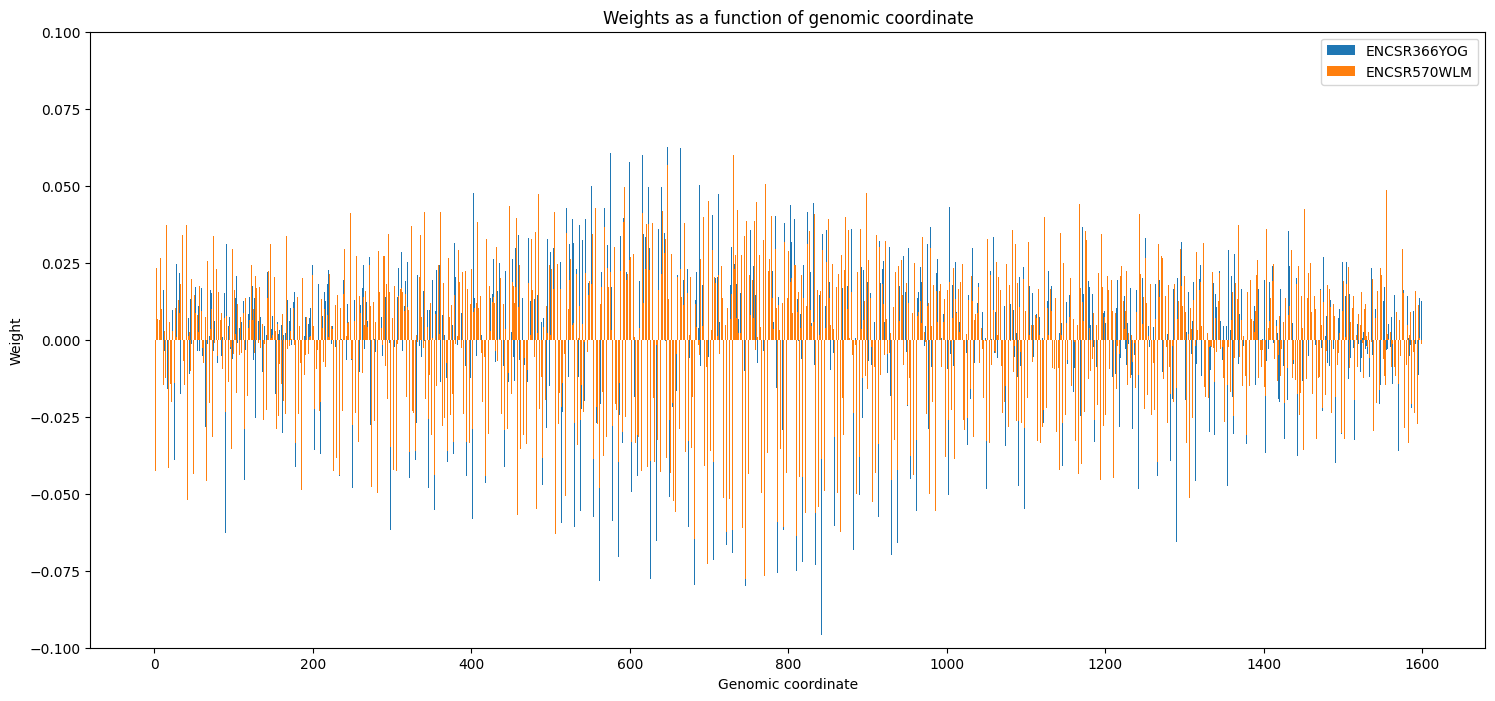

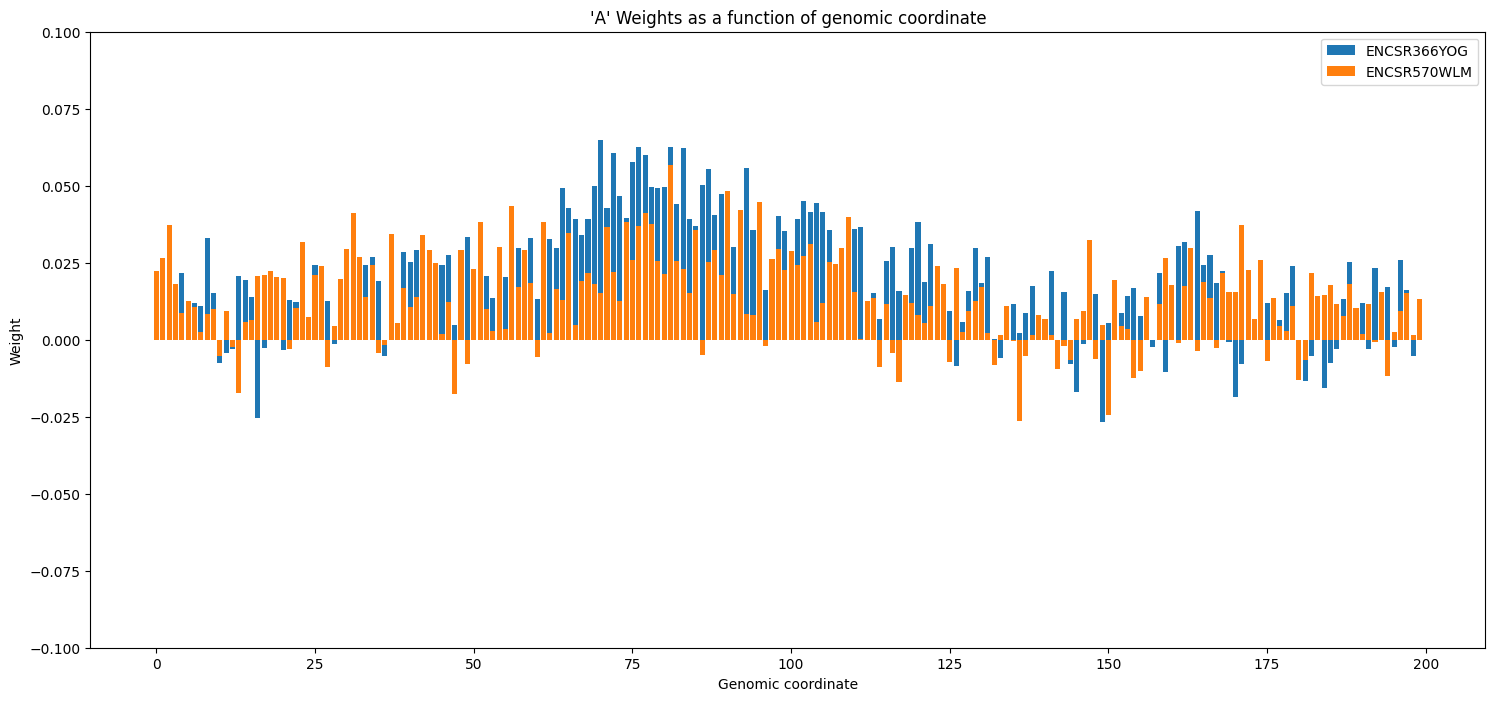

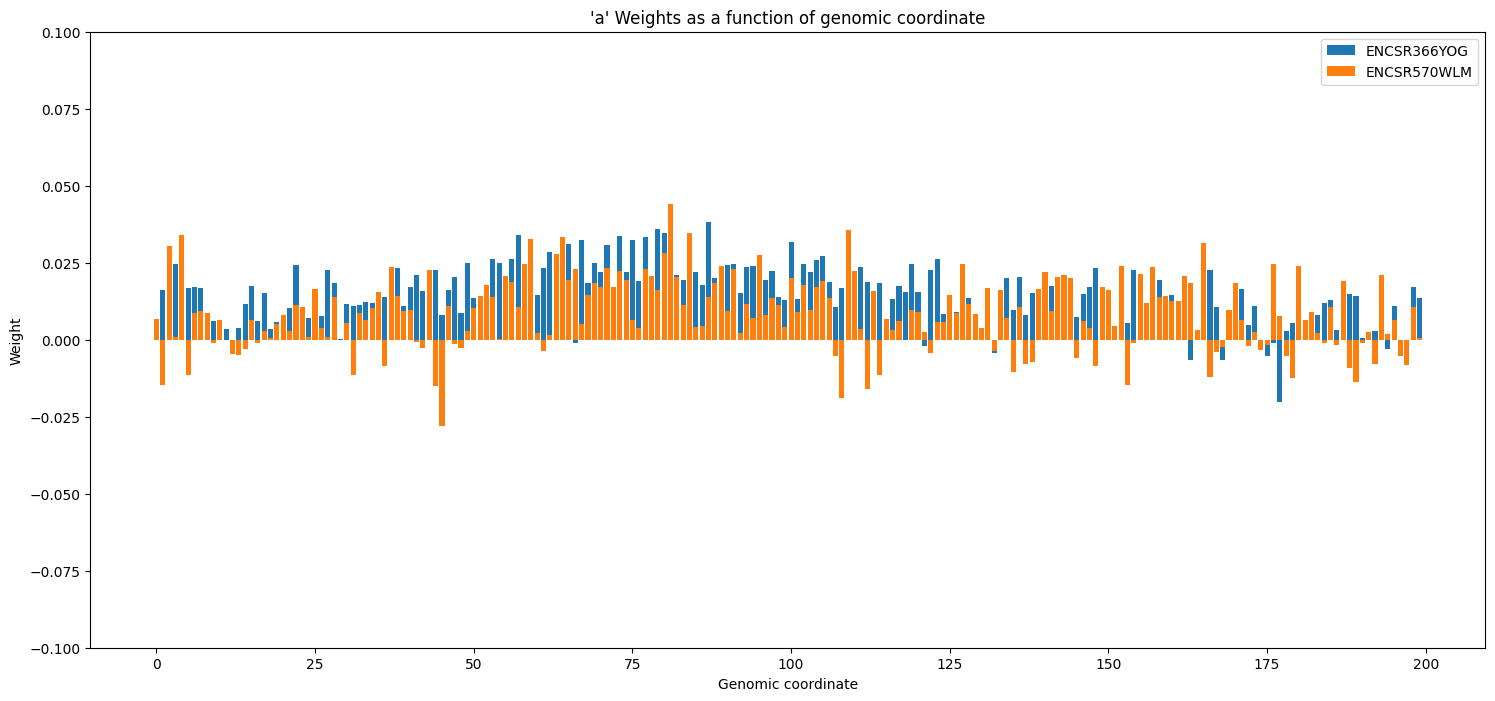

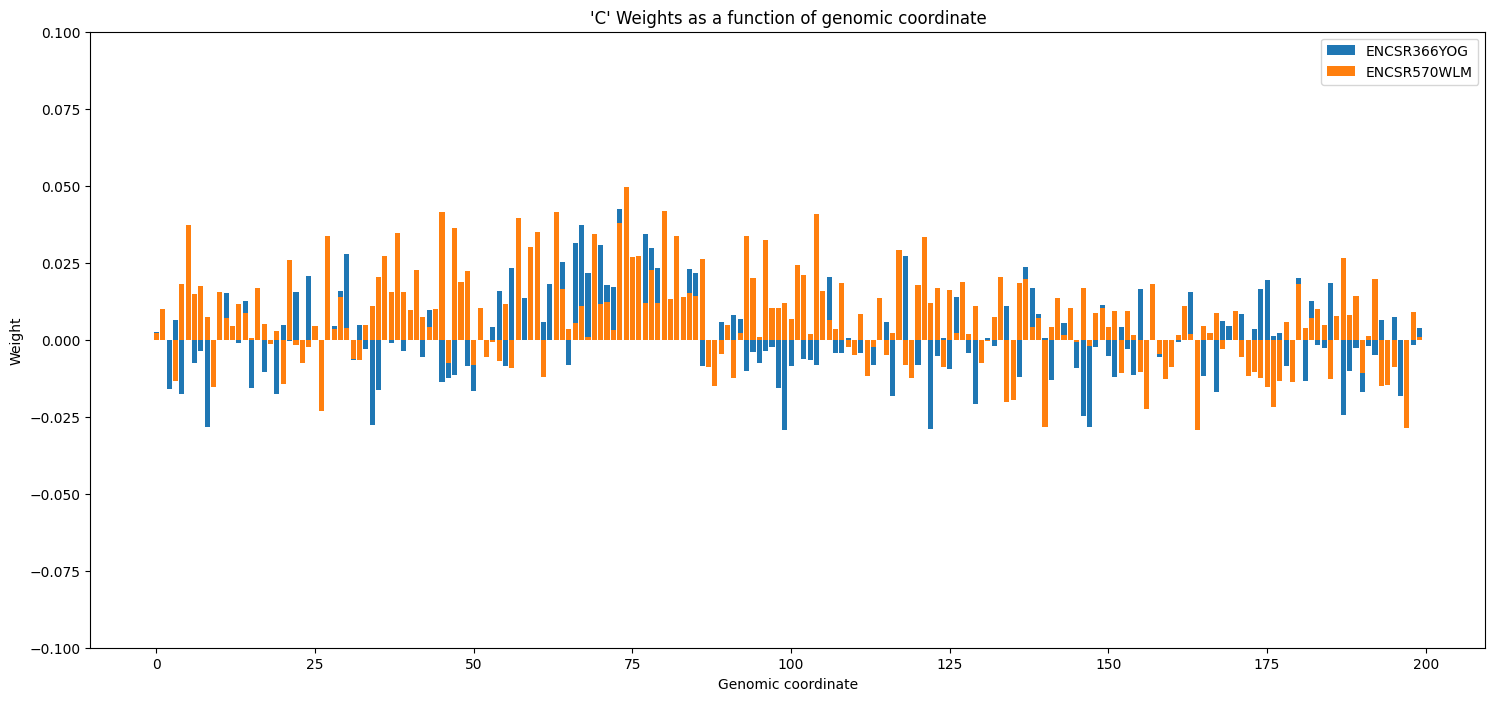

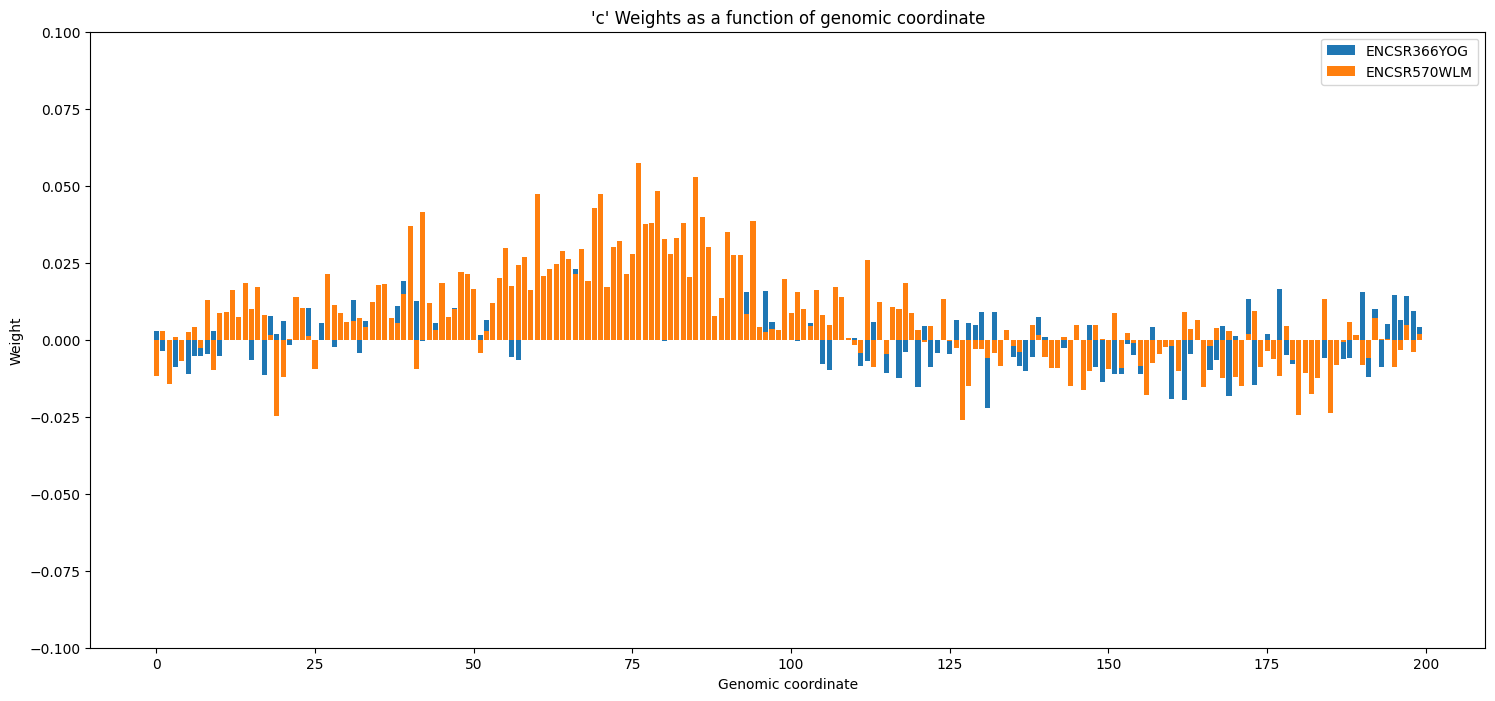

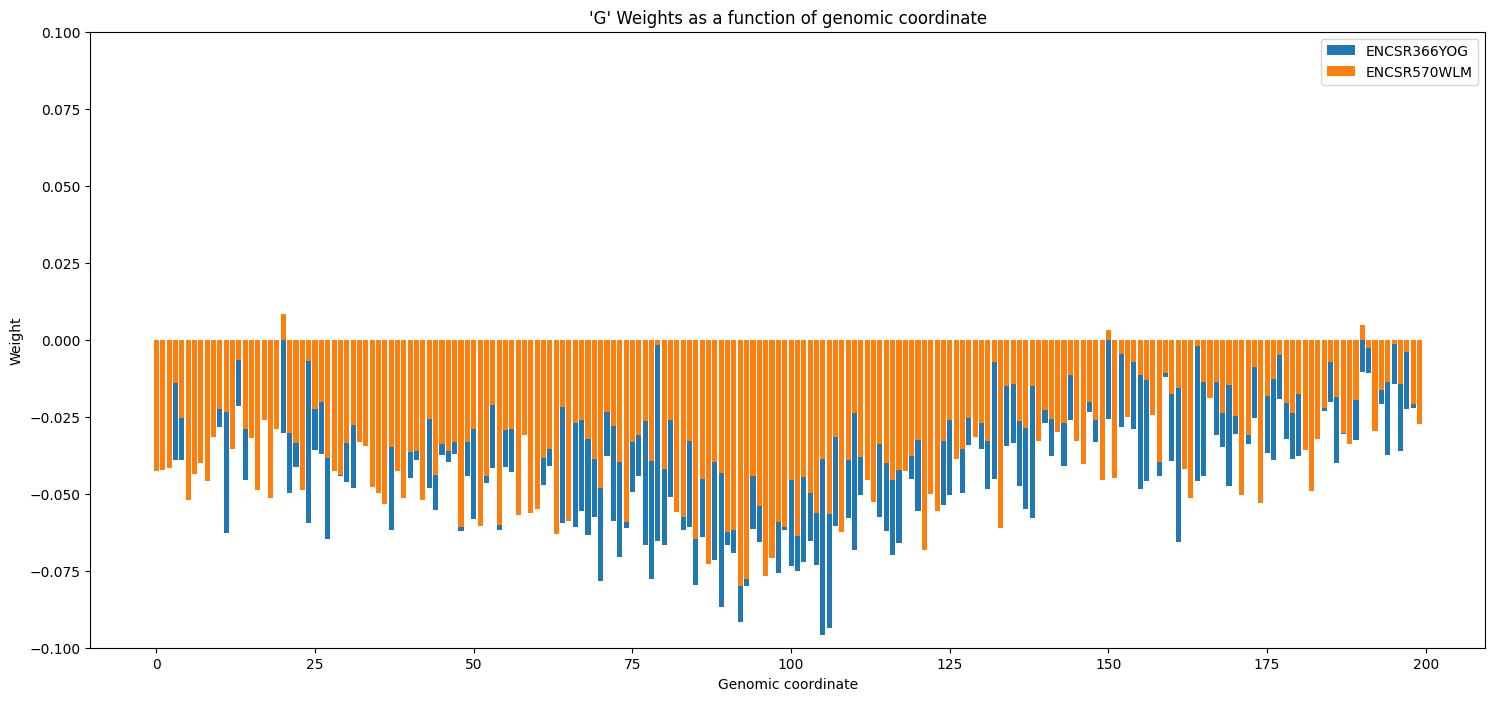

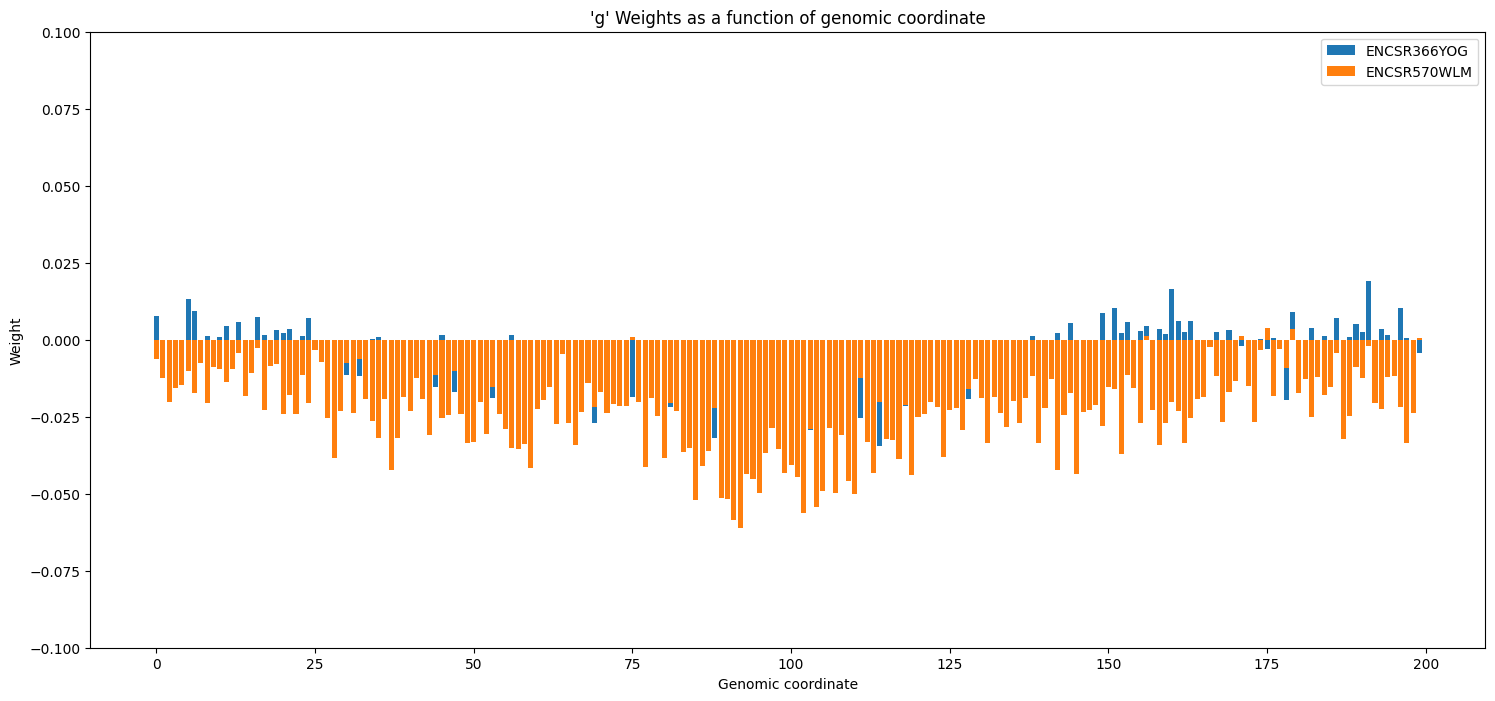

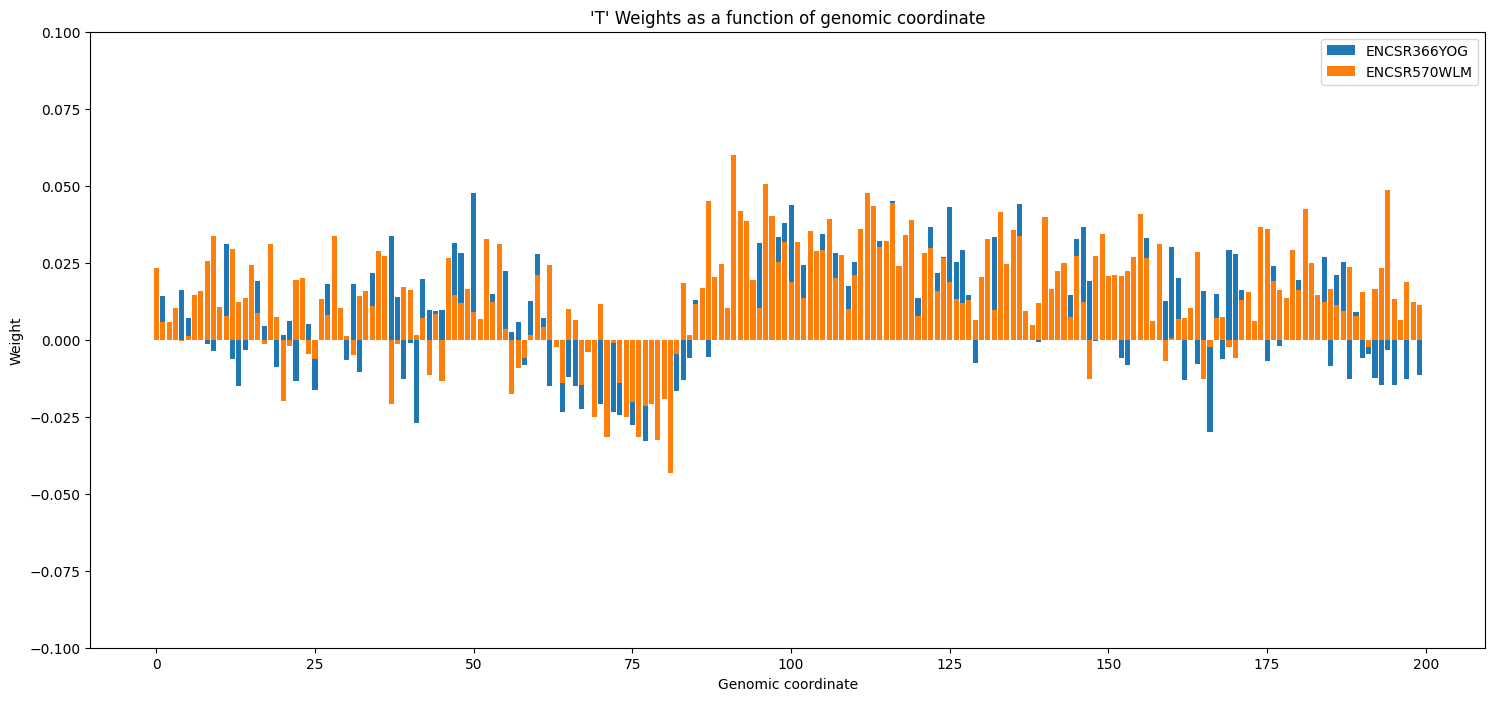

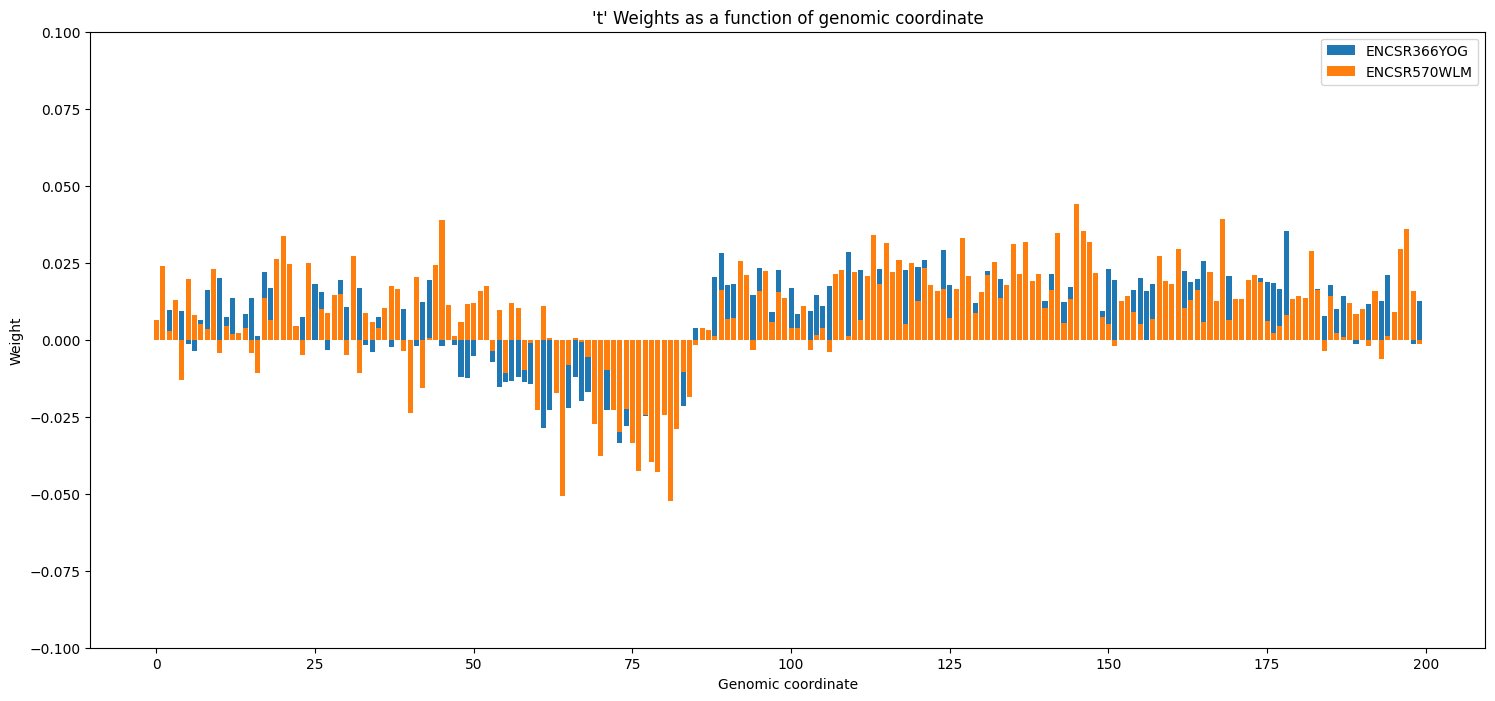

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_weights)), QKI_ENCSR366YOG_weights)
plt.bar(range(len(QKI_ENCSR570WLM_weights)), QKI_ENCSR570WLM_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_A_weights)), QKI_ENCSR366YOG_A_weights)
plt.bar(range(len(QKI_ENCSR570WLM_A_weights)), QKI_ENCSR570WLM_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_a_weights)), QKI_ENCSR366YOG_a_weights)
plt.bar(range(len(QKI_ENCSR570WLM_a_weights)), QKI_ENCSR570WLM_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_C_weights)), QKI_ENCSR366YOG_C_weights)
plt.bar(range(len(QKI_ENCSR570WLM_C_weights)), QKI_ENCSR570WLM_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_c_weights)), QKI_ENCSR366YOG_c_weights)
plt.bar(range(len(QKI_ENCSR570WLM_c_weights)), QKI_ENCSR570WLM_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_G_weights)), QKI_ENCSR366YOG_G_weights)
plt.bar(range(len(QKI_ENCSR570WLM_G_weights)), QKI_ENCSR570WLM_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_g_weights)), QKI_ENCSR366YOG_g_weights)
plt.bar(range(len(QKI_ENCSR570WLM_g_weights)), QKI_ENCSR570WLM_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_T_weights)), QKI_ENCSR366YOG_T_weights)
plt.bar(range(len(QKI_ENCSR570WLM_T_weights)), QKI_ENCSR570WLM_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_t_weights)), QKI_ENCSR366YOG_t_weights)
plt.bar(range(len(QKI_ENCSR570WLM_t_weights)), QKI_ENCSR570WLM_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.1, 0.1])
plt.show()

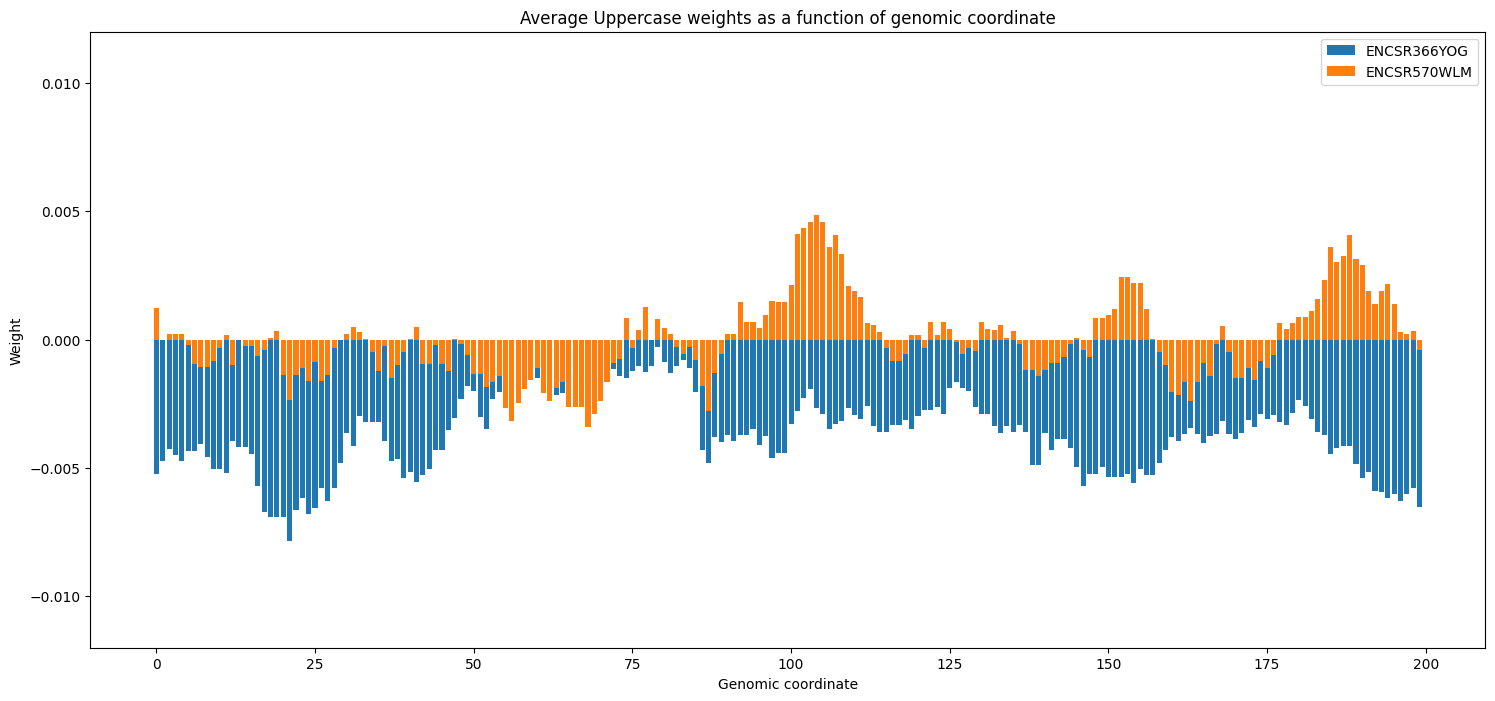

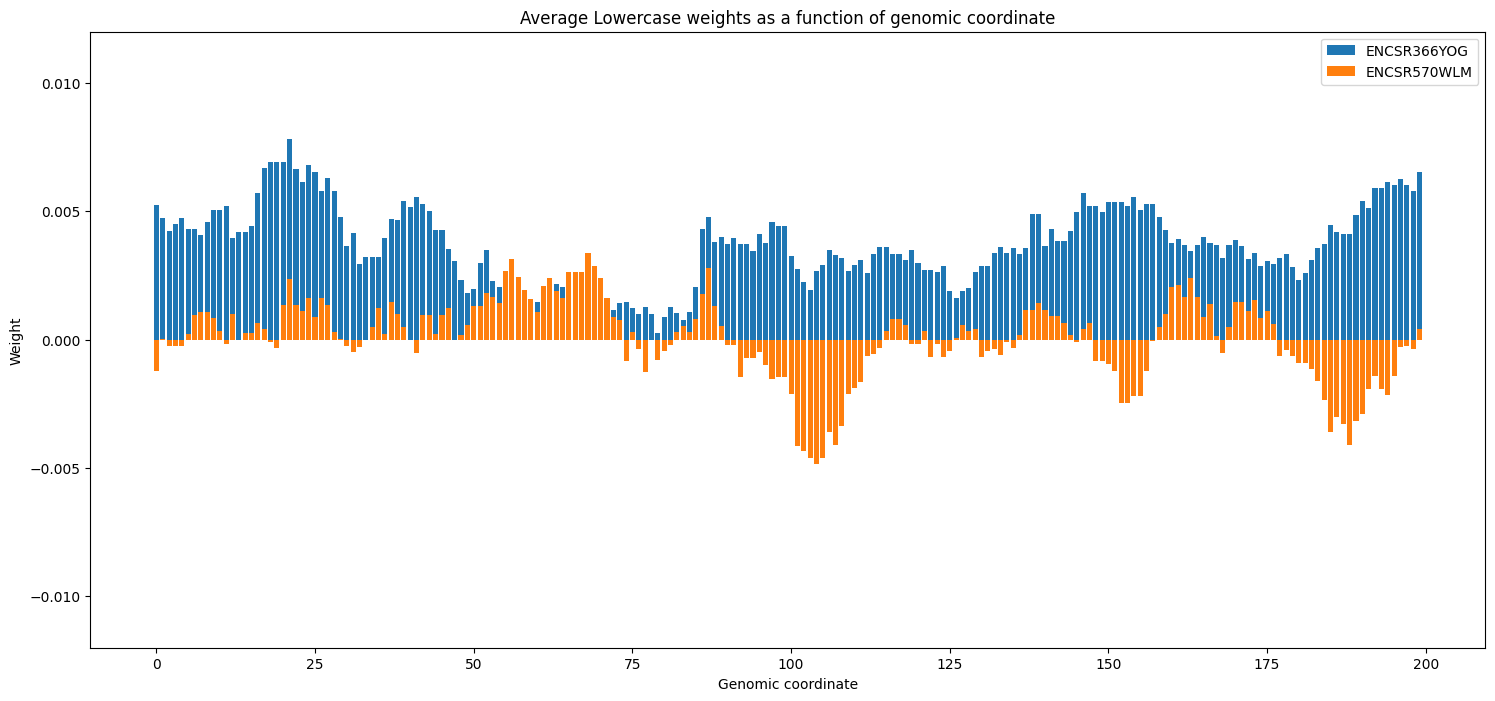

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_avg_uppercase_weights)), QKI_ENCSR366YOG_avg_uppercase_weights)
plt.bar(range(len(QKI_ENCSR570WLM_avg_uppercase_weights)), QKI_ENCSR570WLM_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(QKI_ENCSR366YOG_avg_lowercase_weights)), QKI_ENCSR366YOG_avg_lowercase_weights)
plt.bar(range(len(QKI_ENCSR570WLM_avg_lowercase_weights)), QKI_ENCSR570WLM_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.legend(['ENCSR366YOG', 'ENCSR570WLM'])
plt.ylim([-0.012, 0.012])
plt.show()

# RBM5

## ENCSR489ABS

### Import dataset and fit model

In [ ]:
RBM5_ENCSR489ABS_ds = import_dataset()
[RBM5_ENCSR489ABS_train, RBM5_ENCSR489ABS_test] = train_test_split(RBM5_ENCSR489ABS_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
RBM5_ENCSR489ABS_train_features = pd.get_dummies(RBM5_ENCSR489ABS_train.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_train_labels = RBM5_ENCSR489ABS_train['label'].to_numpy()

RBM5_ENCSR489ABS_test_features = pd.get_dummies(RBM5_ENCSR489ABS_test.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_test_labels = RBM5_ENCSR489ABS_test['label'].to_numpy()

# C=1e-3 worked best
RBM5_ENCSR489ABS_model = svm.SVC(C=1e-3, kernel="linear")
RBM5_ENCSR489ABS_model = RBM5_ENCSR489ABS_model.fit(RBM5_ENCSR489ABS_train_features, RBM5_ENCSR489ABS_train_labels)

Saving RBM5_ENCSR489ABS_dataset.txt to RBM5_ENCSR489ABS_dataset.txt
User uploaded file "RBM5_ENCSR489ABS_dataset.txt" with length 261528 bytes


### Import RBPmap predictions

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

RBM5_ENCSR489ABS_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
RBM5_ENCSR489ABS_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving RBM5_ENCSR489ABS_rbp_predictions_no_conservation.txt to RBM5_ENCSR489ABS_rbp_predictions_no_conservation.txt
User uploaded file "RBM5_ENCSR489ABS_rbp_predictions_no_conservation.txt" with length 6423 bytes


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

RBM5_ENCSR489ABS_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving RBM5_ENCSR489ABS_rbp_predictions_with_conservation.txt to RBM5_ENCSR489ABS_rbp_predictions_with_conservation.txt
User uploaded file "RBM5_ENCSR489ABS_rbp_predictions_with_conservation.txt" with length 6423 bytes


### Display results

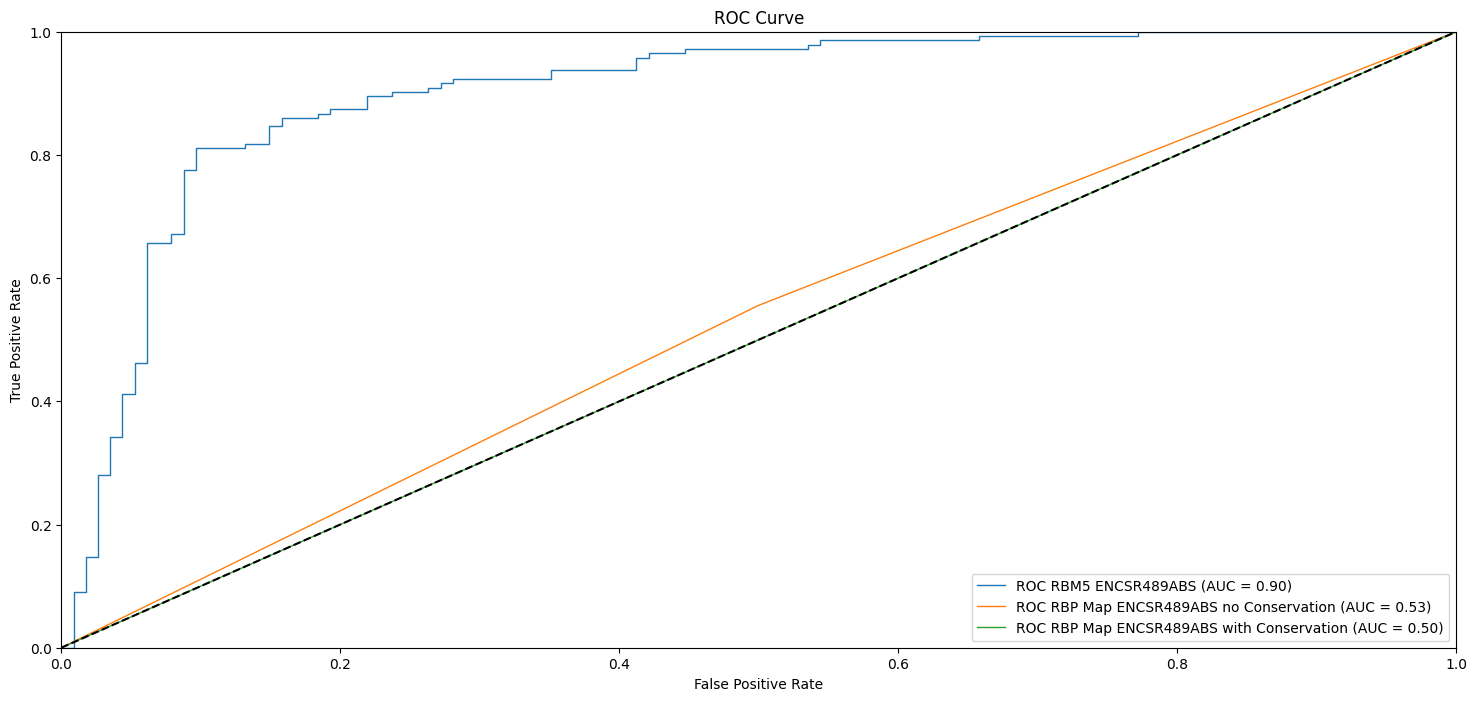

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    RBM5_ENCSR489ABS_model,
    RBM5_ENCSR489ABS_test_features,
    RBM5_ENCSR489ABS_test_labels,
    name=f"ROC RBM5 ENCSR489ABS",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    RBM5_ENCSR489ABS_rbp_no_conservation,
    RBM5_ENCSR489ABS_true_labels,
    name=f"ROC RBP Map ENCSR489ABS no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    RBM5_ENCSR489ABS_rbp_with_conservation,
    RBM5_ENCSR489ABS_true_labels,
    name=f"ROC RBP Map ENCSR489ABS with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
RBM5_ENCSR489ABS_weights = RBM5_ENCSR489ABS_model.coef_[0]
RBM5_ENCSR489ABS_A_weights = RBM5_ENCSR489ABS_weights[::8]
RBM5_ENCSR489ABS_a_weights = RBM5_ENCSR489ABS_weights[4::8]
RBM5_ENCSR489ABS_C_weights = RBM5_ENCSR489ABS_weights[1::8]
RBM5_ENCSR489ABS_c_weights = RBM5_ENCSR489ABS_weights[5::8]
RBM5_ENCSR489ABS_G_weights = RBM5_ENCSR489ABS_weights[2::8]
RBM5_ENCSR489ABS_g_weights = RBM5_ENCSR489ABS_weights[6::8]
RBM5_ENCSR489ABS_T_weights = RBM5_ENCSR489ABS_weights[3::8]
RBM5_ENCSR489ABS_t_weights = RBM5_ENCSR489ABS_weights[7::8]

RBM5_ENCSR489ABS_avg_weights = RBM5_ENCSR489ABS_weights.reshape(-1, 8).mean(axis=1)
RBM5_ENCSR489ABS_avg_uppercase_weights = RBM5_ENCSR489ABS_weights.reshape(-1, 4).mean(axis=1)[::2]
RBM5_ENCSR489ABS_avg_lowercase_weights = RBM5_ENCSR489ABS_weights.reshape(-1, 4).mean(axis=1)[1::2]

print('Average weights mean is ', RBM5_ENCSR489ABS_avg_weights.mean())
print('Average weights variance is ', RBM5_ENCSR489ABS_avg_weights.var())

Average weights mean is  3.613103739807944e-18
Average weights variance is  9.149923130525911e-36


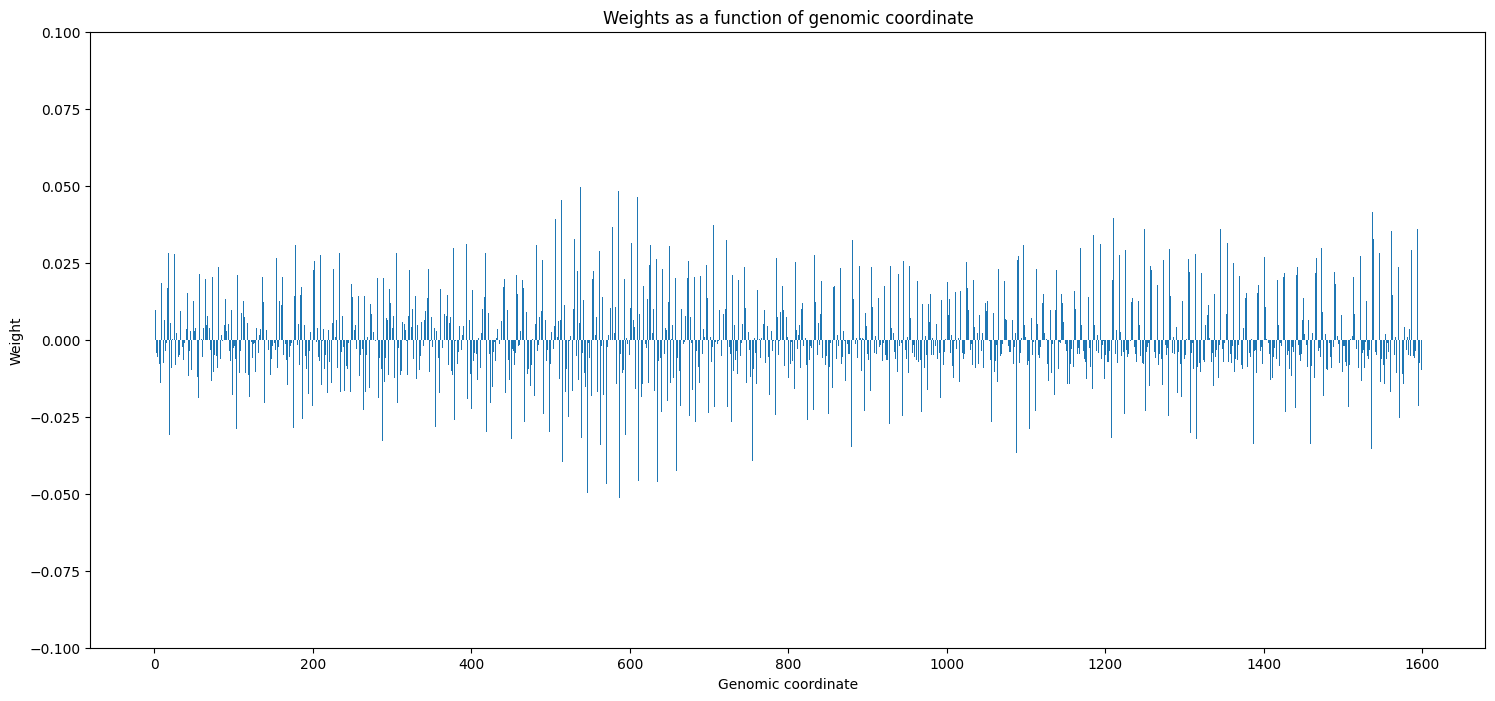

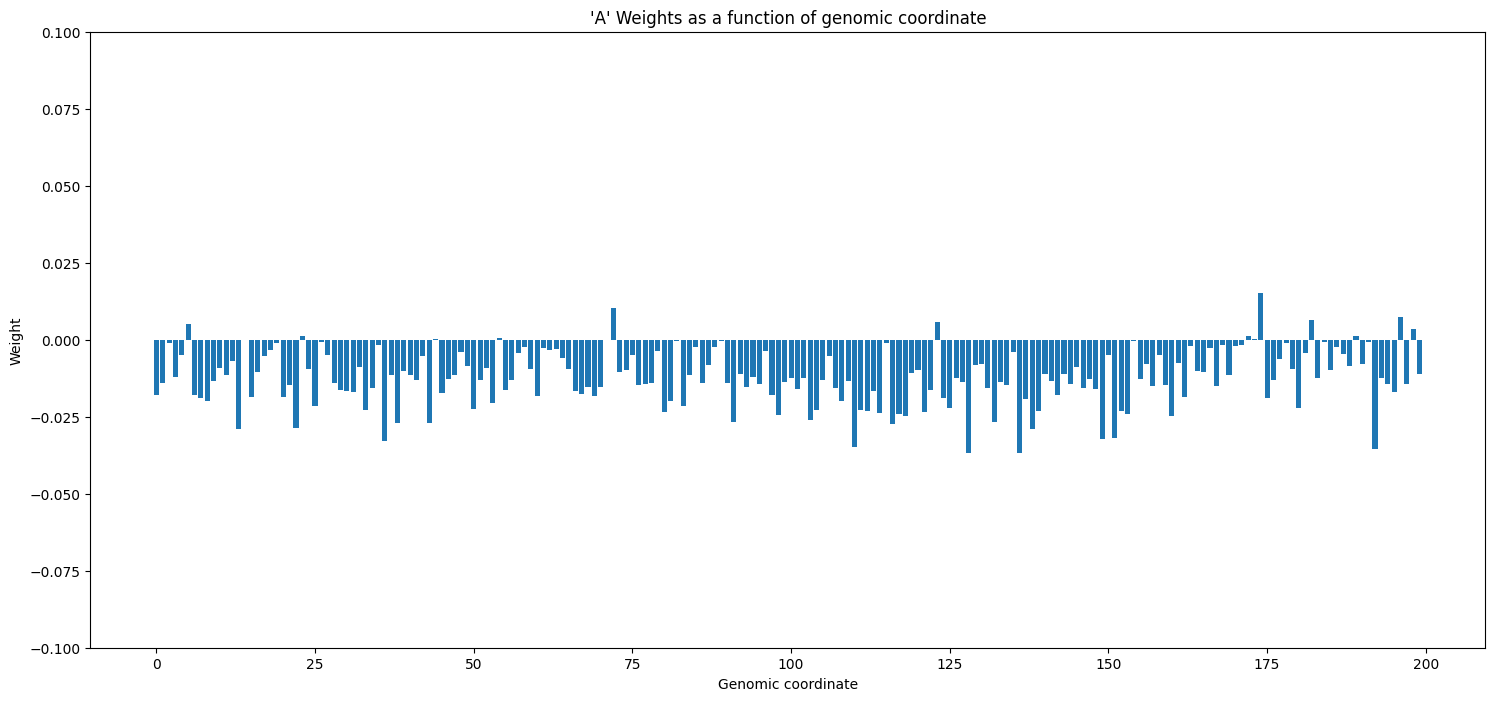

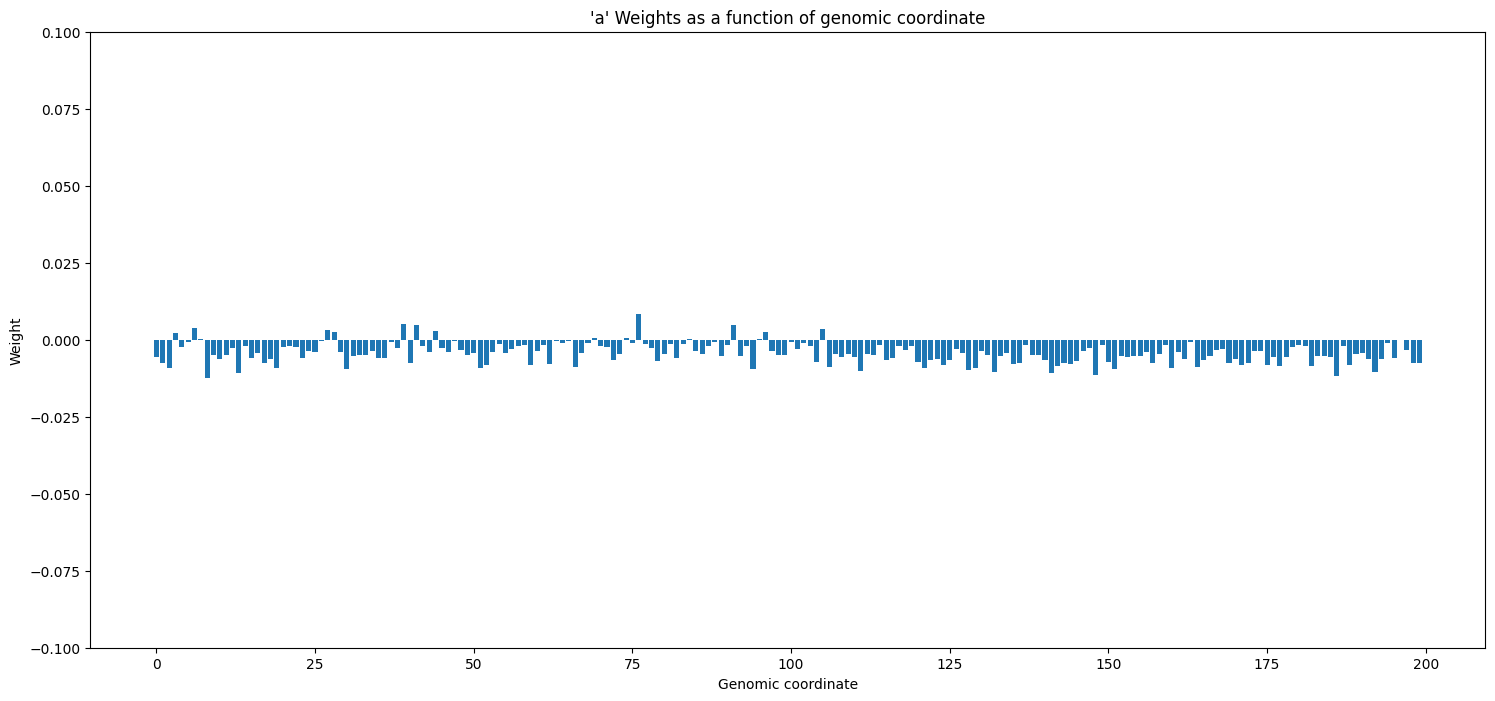

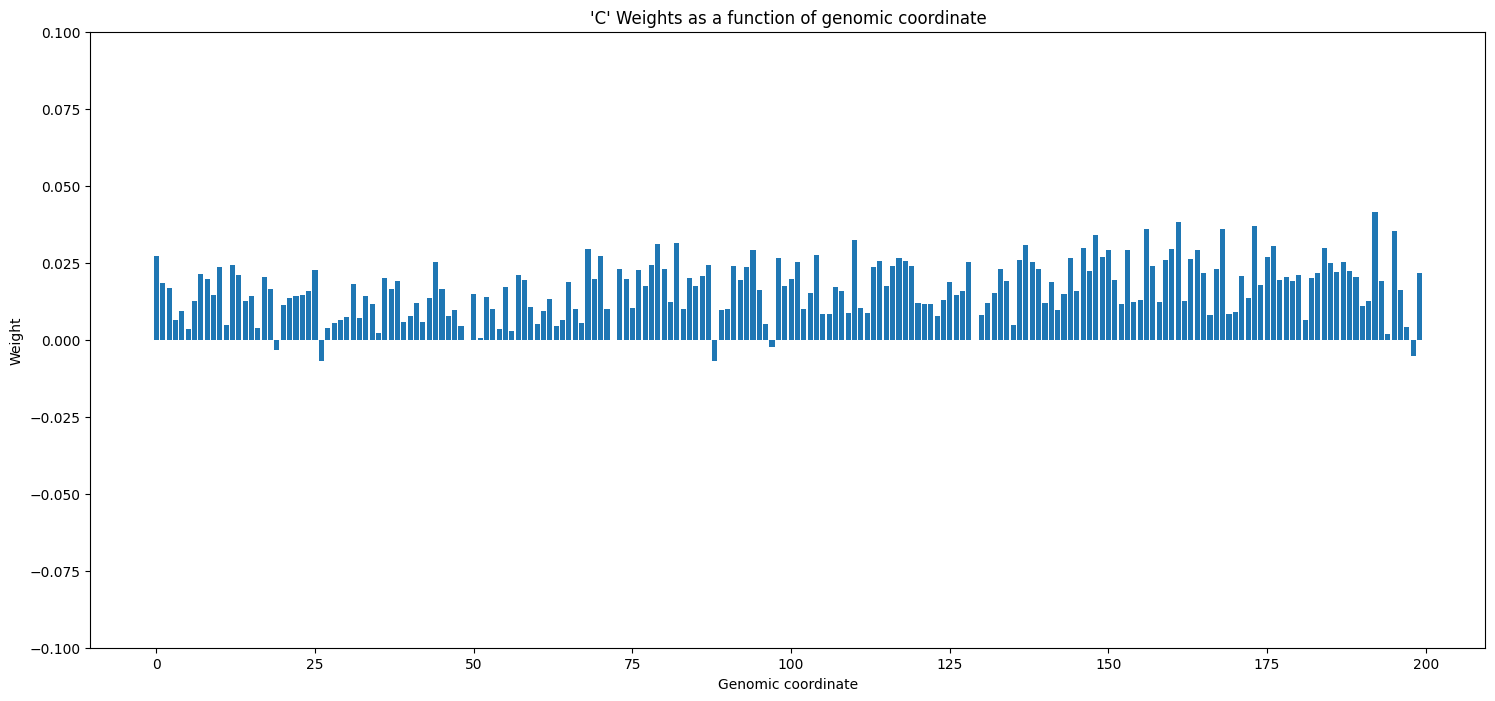

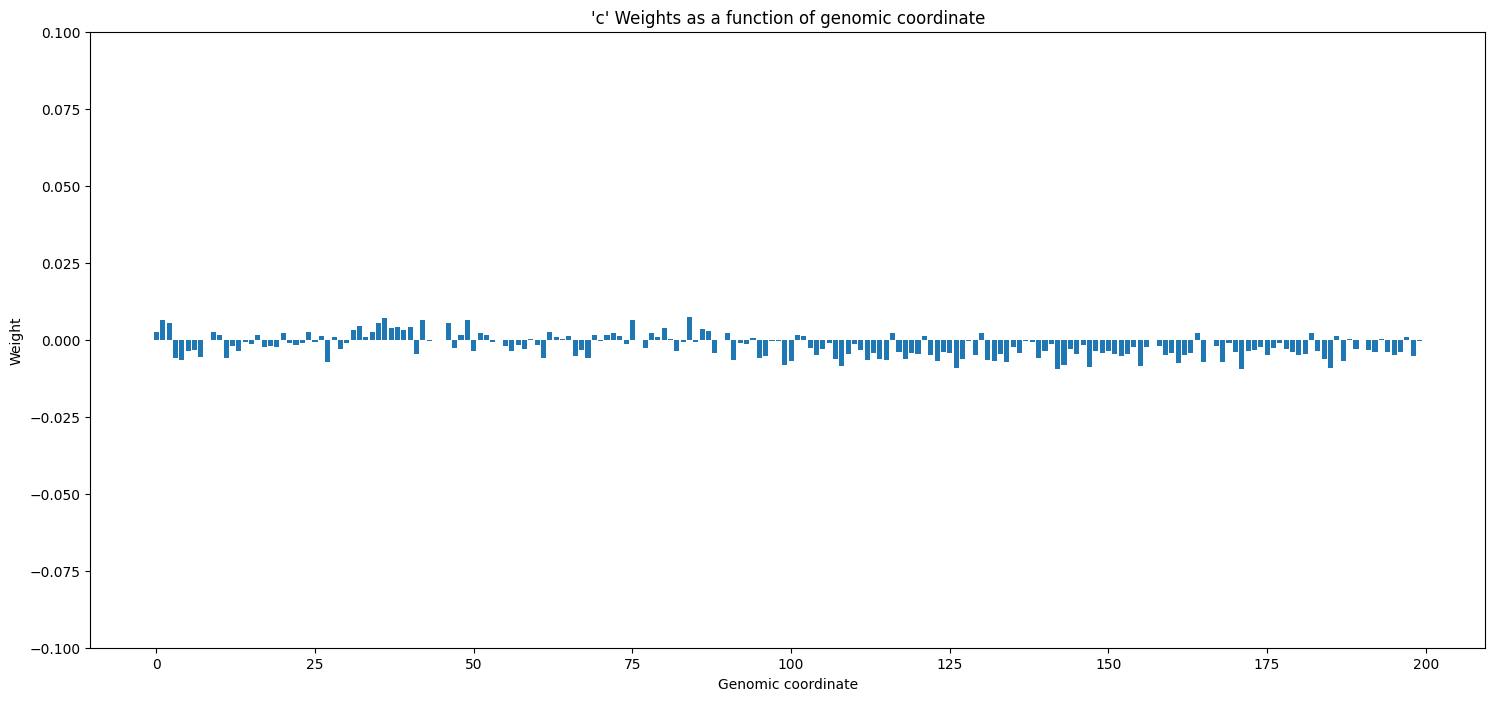

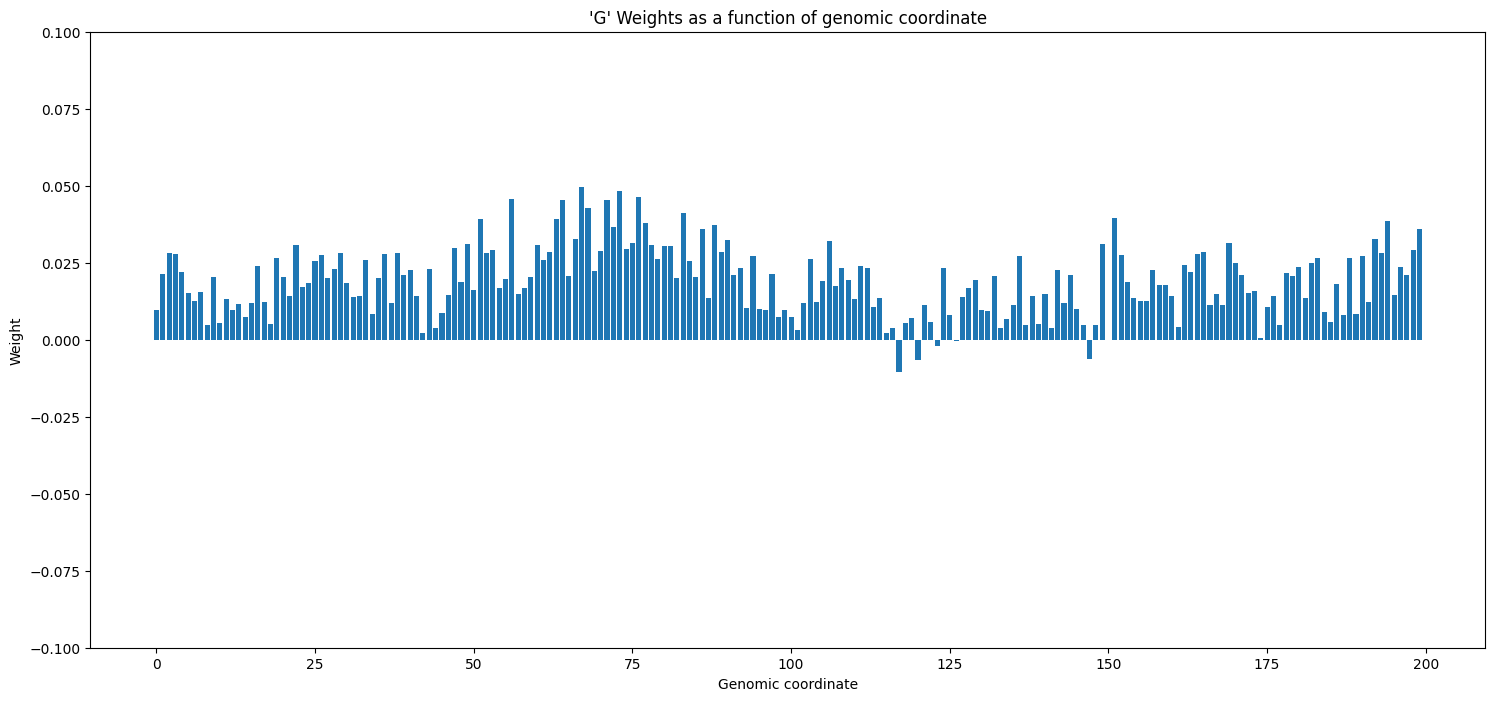

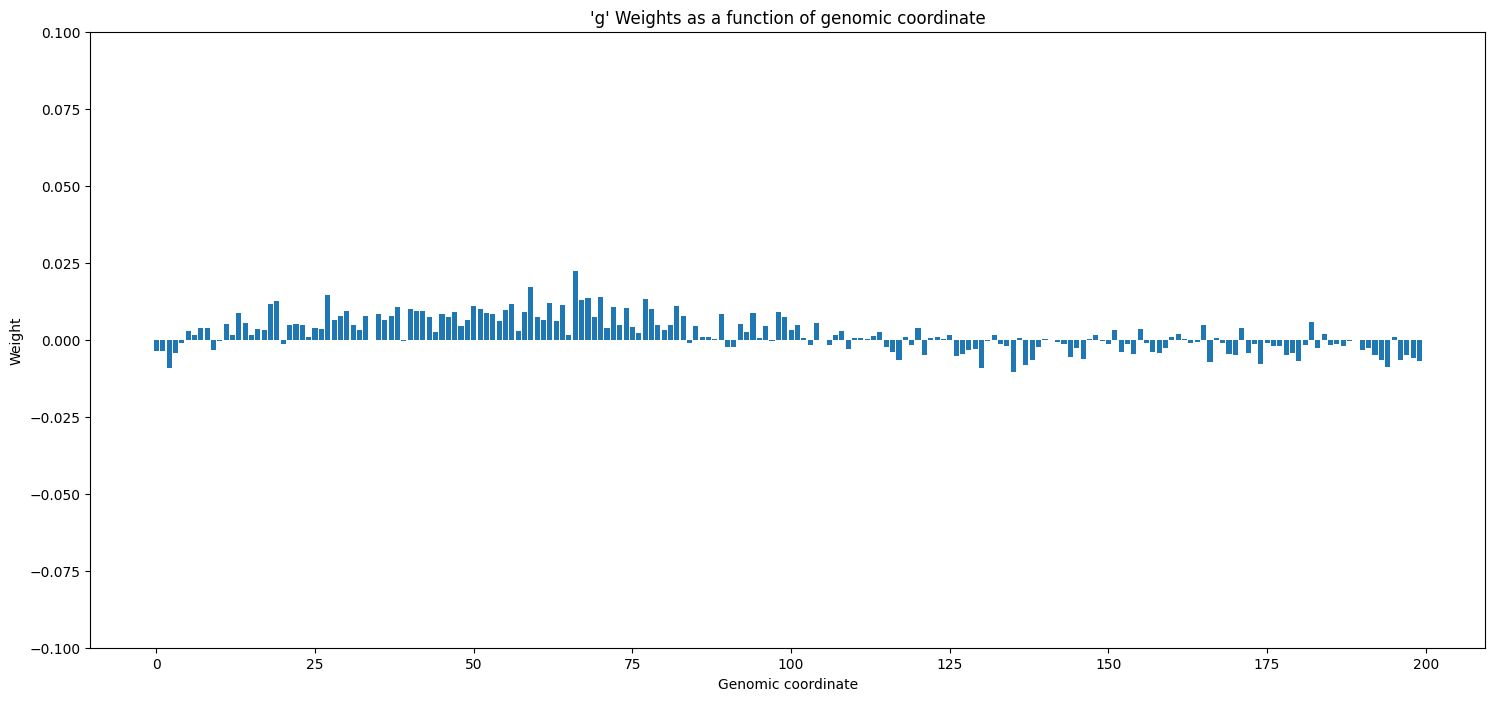

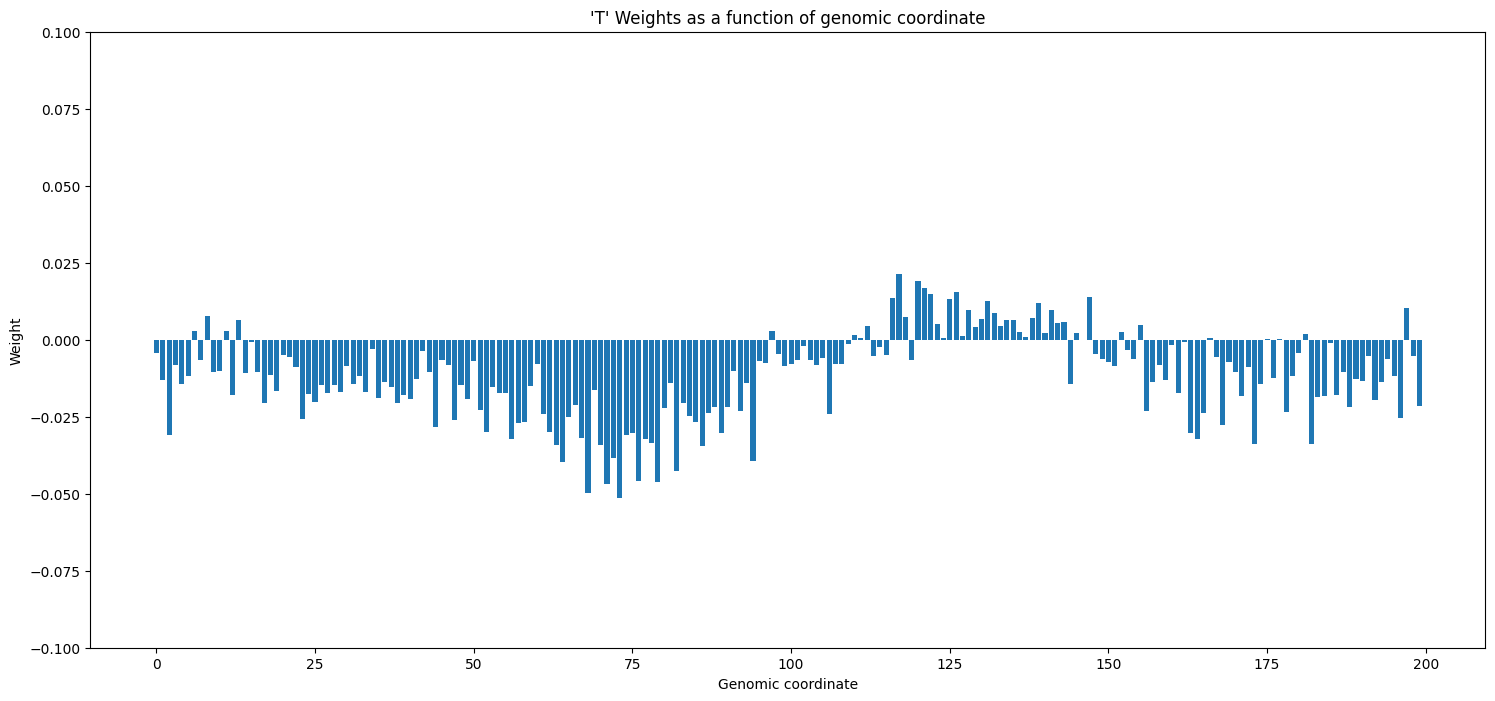

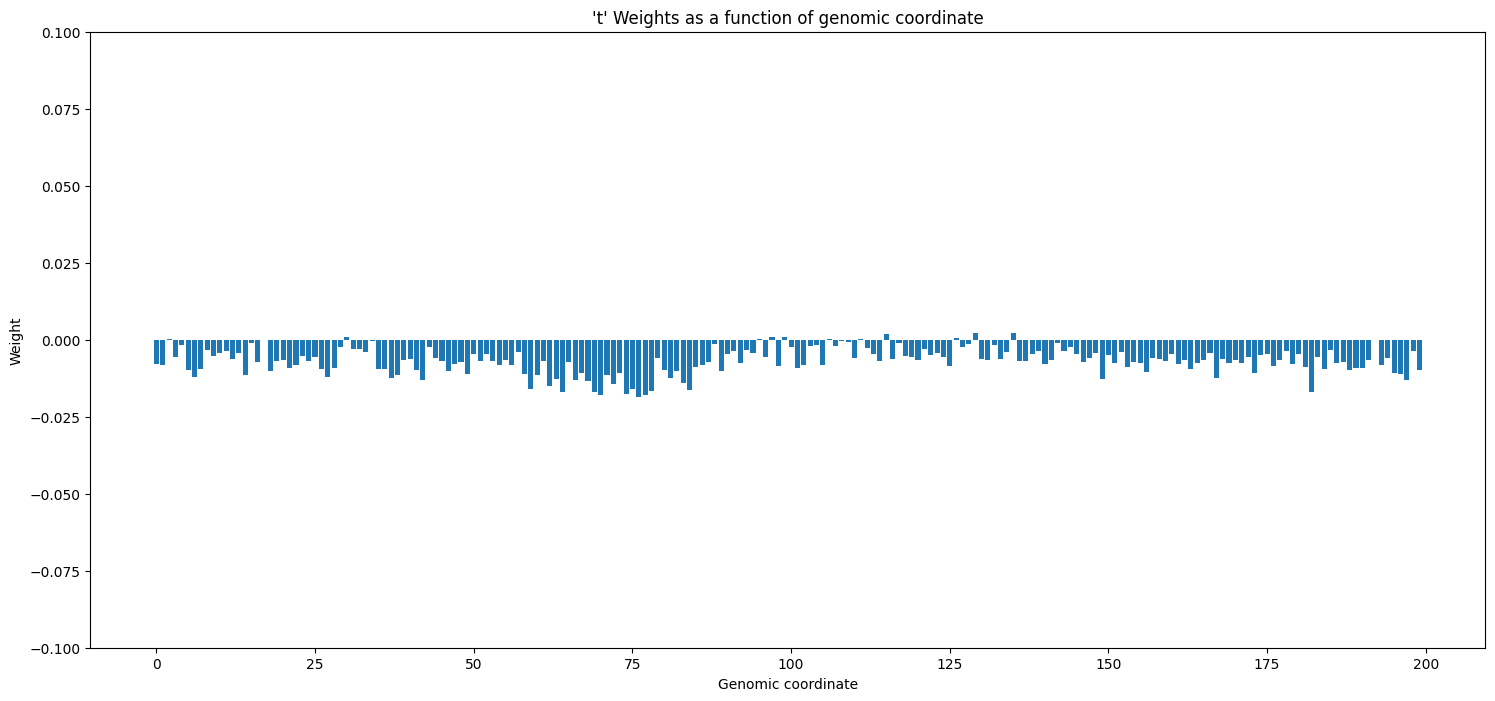

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_weights)), RBM5_ENCSR489ABS_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_A_weights)), RBM5_ENCSR489ABS_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_a_weights)), RBM5_ENCSR489ABS_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_C_weights)), RBM5_ENCSR489ABS_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_c_weights)), RBM5_ENCSR489ABS_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_G_weights)), RBM5_ENCSR489ABS_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_g_weights)), RBM5_ENCSR489ABS_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_T_weights)), RBM5_ENCSR489ABS_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_t_weights)), RBM5_ENCSR489ABS_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

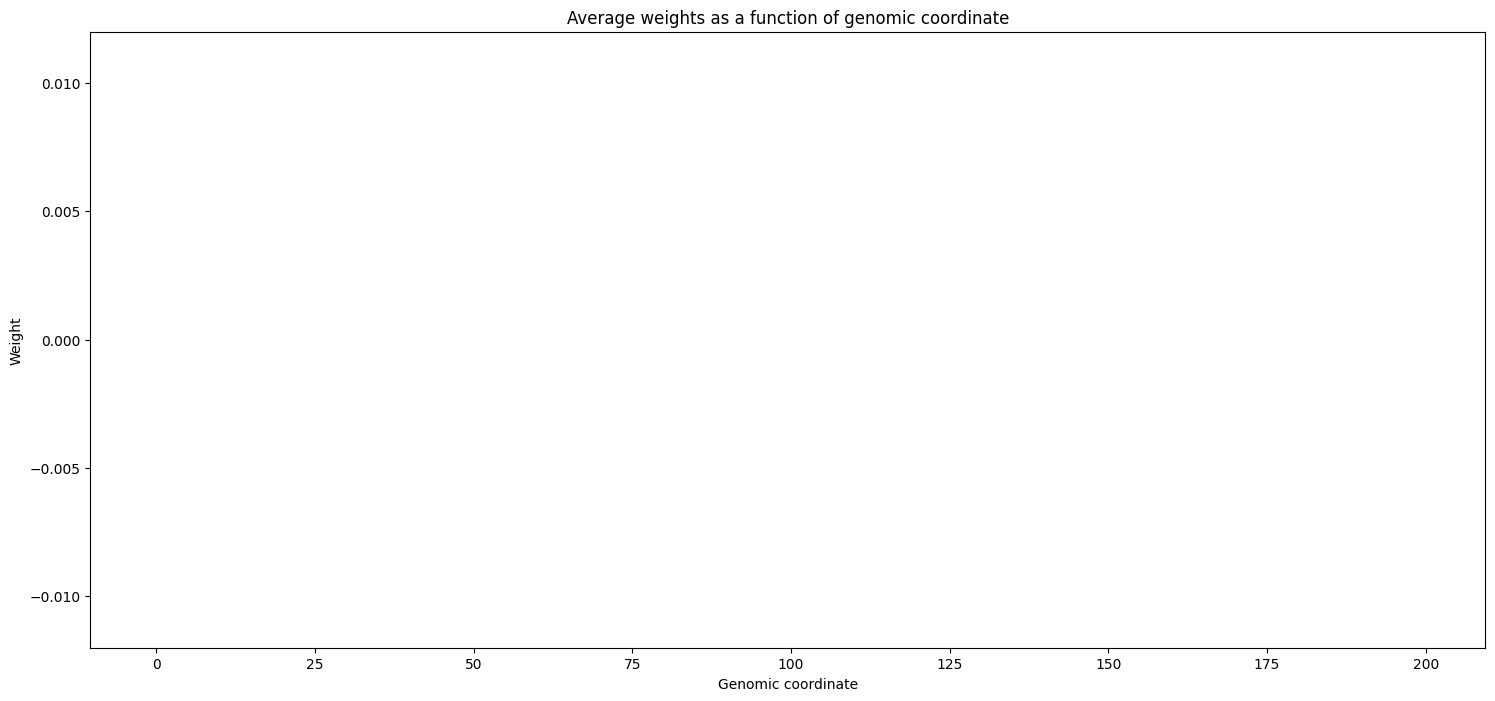

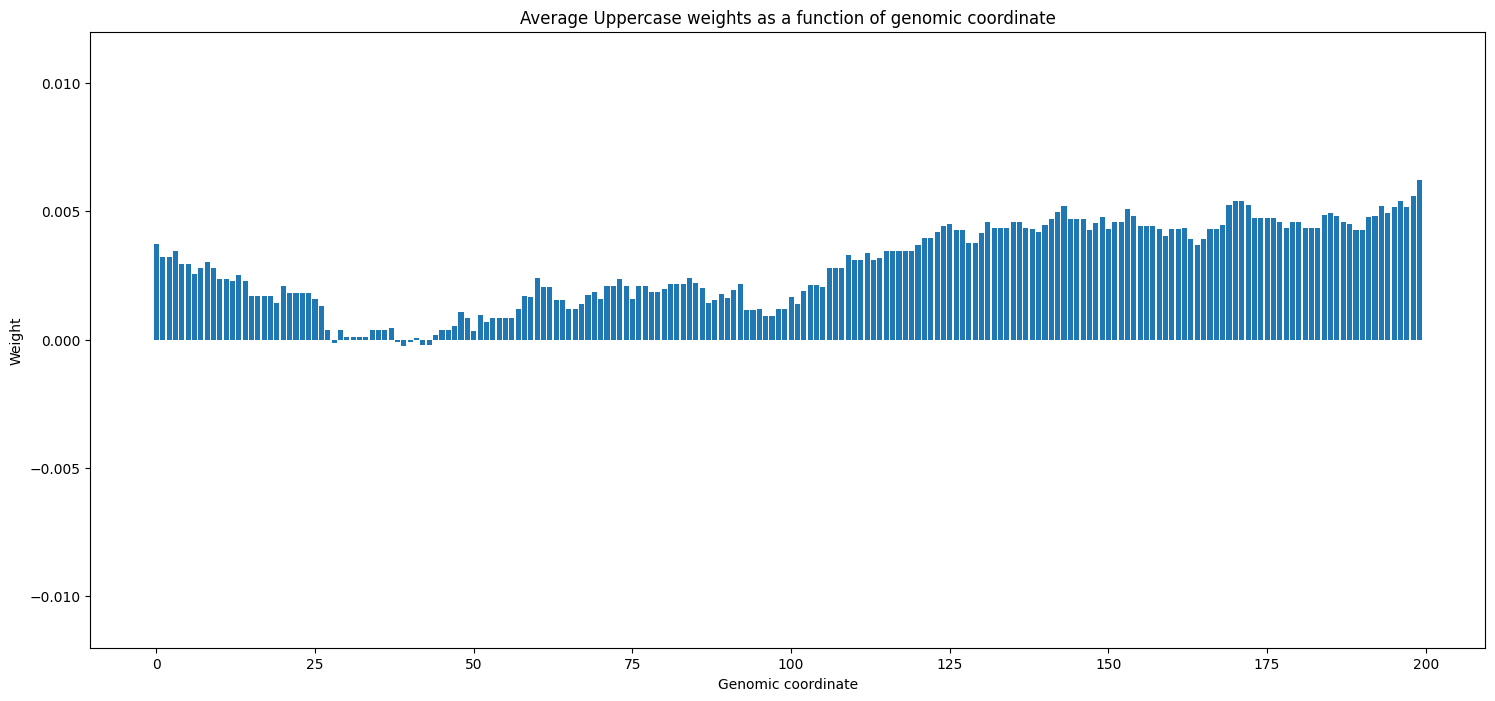

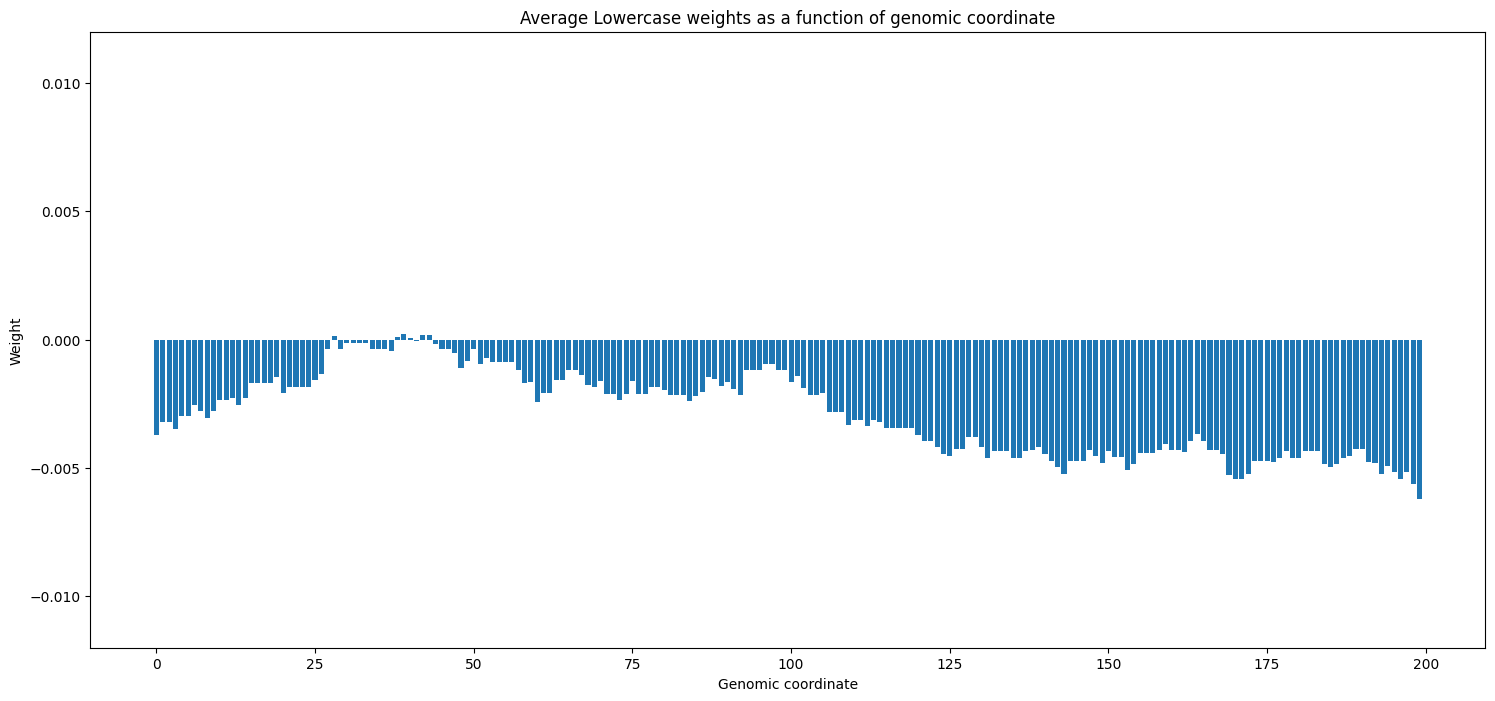

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_avg_weights)), RBM5_ENCSR489ABS_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_avg_uppercase_weights)), RBM5_ENCSR489ABS_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(RBM5_ENCSR489ABS_avg_lowercase_weights)), RBM5_ENCSR489ABS_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

# hnRNPL

## ENCSR724RDN

### Import dataset and fit model

In [ ]:
hnRNPL_ENCSR724RDN_ds = import_dataset()
[hnRNPL_ENCSR724RDN_train, hnRNPL_ENCSR724RDN_test] = train_test_split(hnRNPL_ENCSR724RDN_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR724RDN_train_features = pd.get_dummies(hnRNPL_ENCSR724RDN_train.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_train_labels = hnRNPL_ENCSR724RDN_train['label'].to_numpy()

hnRNPL_ENCSR724RDN_test_features = pd.get_dummies(hnRNPL_ENCSR724RDN_test.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_test_labels = hnRNPL_ENCSR724RDN_test['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR724RDN_model = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR724RDN_model = hnRNPL_ENCSR724RDN_model.fit(hnRNPL_ENCSR724RDN_train_features, hnRNPL_ENCSR724RDN_train_labels)

Saving hnRNPL_ENCSR724RDN_dataset.txt to hnRNPL_ENCSR724RDN_dataset.txt
User uploaded file "hnRNPL_ENCSR724RDN_dataset.txt" with length 816000 bytes


### Import RBPmap predictions

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

hnRNPL_ENCSR724RDN_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
hnRNPL_ENCSR724RDN_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving hnRNPL_ENCSR724RDN_rbp_predictions_no_conservation.txt to hnRNPL_ENCSR724RDN_rbp_predictions_no_conservation.txt
User uploaded file "hnRNPL_ENCSR724RDN_rbp_predictions_no_conservation.txt" with length 20013 bytes


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

hnRNPL_ENCSR724RDN_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving hnRNPL_ENCSR724RDN_rbp_predictions_with_conservation.txt to hnRNPL_ENCSR724RDN_rbp_predictions_with_conservation.txt
User uploaded file "hnRNPL_ENCSR724RDN_rbp_predictions_with_conservation.txt" with length 20013 bytes


### Display results

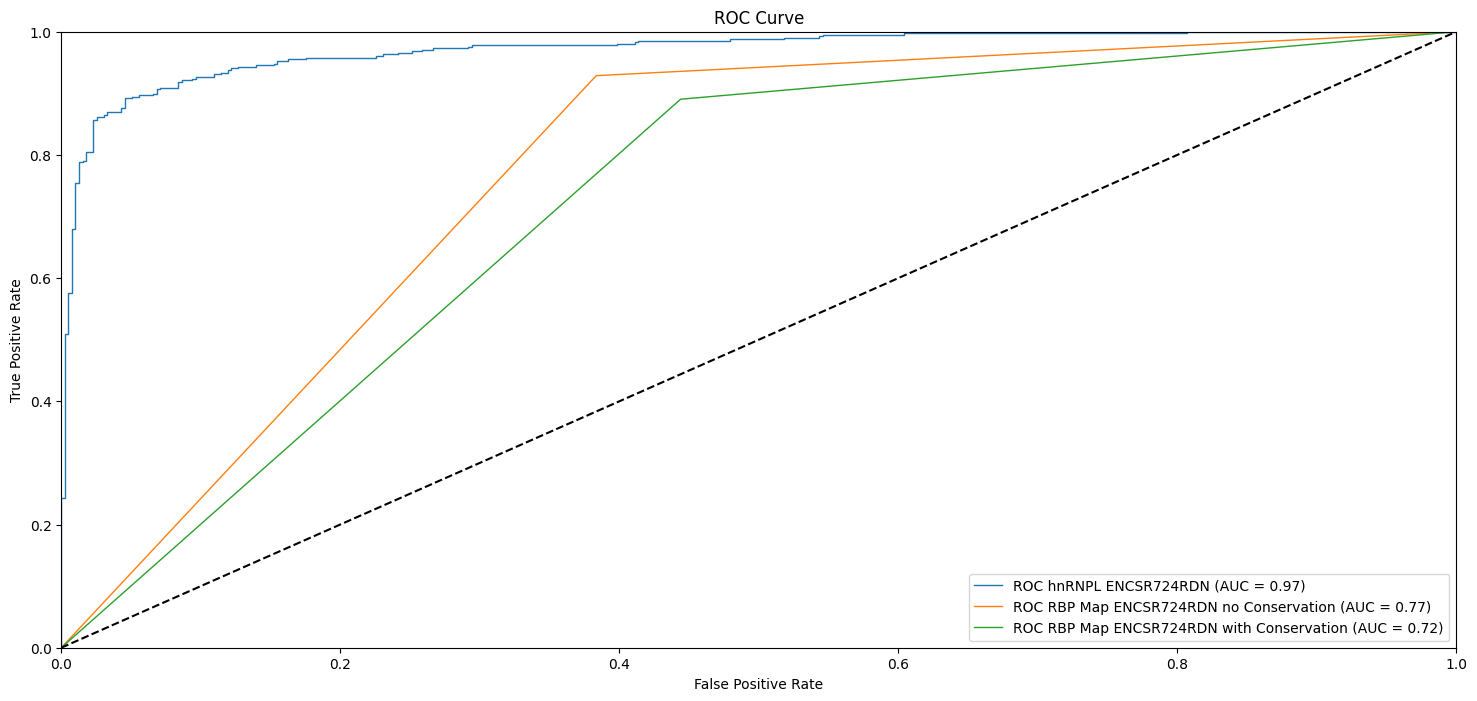

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR724RDN_model,
    hnRNPL_ENCSR724RDN_test_features,
    hnRNPL_ENCSR724RDN_test_labels,
    name=f"ROC hnRNPL ENCSR724RDN",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR724RDN_rbp_no_conservation,
    hnRNPL_ENCSR724RDN_true_labels,
    name=f"ROC RBP Map ENCSR724RDN no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR724RDN_rbp_with_conservation,
    hnRNPL_ENCSR724RDN_true_labels,
    name=f"ROC RBP Map ENCSR724RDN with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
hnRNPL_ENCSR724RDN_weights = hnRNPL_ENCSR724RDN_model.coef_[0]
hnRNPL_ENCSR724RDN_A_weights = hnRNPL_ENCSR724RDN_weights[::8]
hnRNPL_ENCSR724RDN_a_weights = hnRNPL_ENCSR724RDN_weights[4::8]
hnRNPL_ENCSR724RDN_C_weights = hnRNPL_ENCSR724RDN_weights[1::8]
hnRNPL_ENCSR724RDN_c_weights = hnRNPL_ENCSR724RDN_weights[5::8]
hnRNPL_ENCSR724RDN_G_weights = hnRNPL_ENCSR724RDN_weights[2::8]
hnRNPL_ENCSR724RDN_g_weights = hnRNPL_ENCSR724RDN_weights[6::8]
hnRNPL_ENCSR724RDN_T_weights = hnRNPL_ENCSR724RDN_weights[3::8]
hnRNPL_ENCSR724RDN_t_weights = hnRNPL_ENCSR724RDN_weights[7::8]

hnRNPL_ENCSR724RDN_avg_weights = hnRNPL_ENCSR724RDN_weights.reshape(-1, 8).mean(axis=1)
hnRNPL_ENCSR724RDN_avg_uppercase_weights = hnRNPL_ENCSR724RDN_weights.reshape(-1, 4).mean(axis=1)[::2]
hnRNPL_ENCSR724RDN_avg_lowercase_weights = hnRNPL_ENCSR724RDN_weights.reshape(-1, 4).mean(axis=1)[1::2]

print('Average weights mean is ', hnRNPL_ENCSR724RDN_avg_weights.mean())
print('Average weights variance is ', hnRNPL_ENCSR724RDN_avg_weights.var())

Average weights mean is  7.693498615957139e-18
Average weights variance is  3.086575920767677e-35


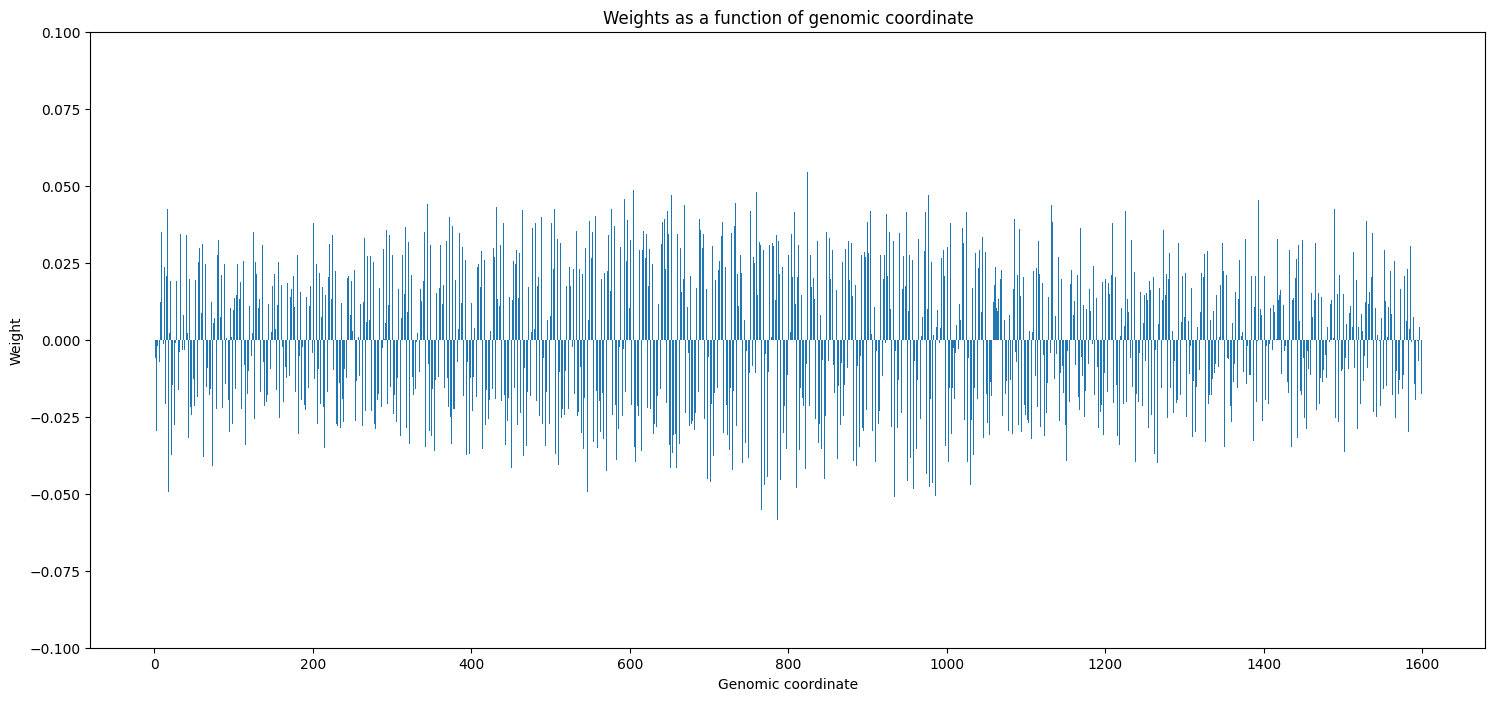

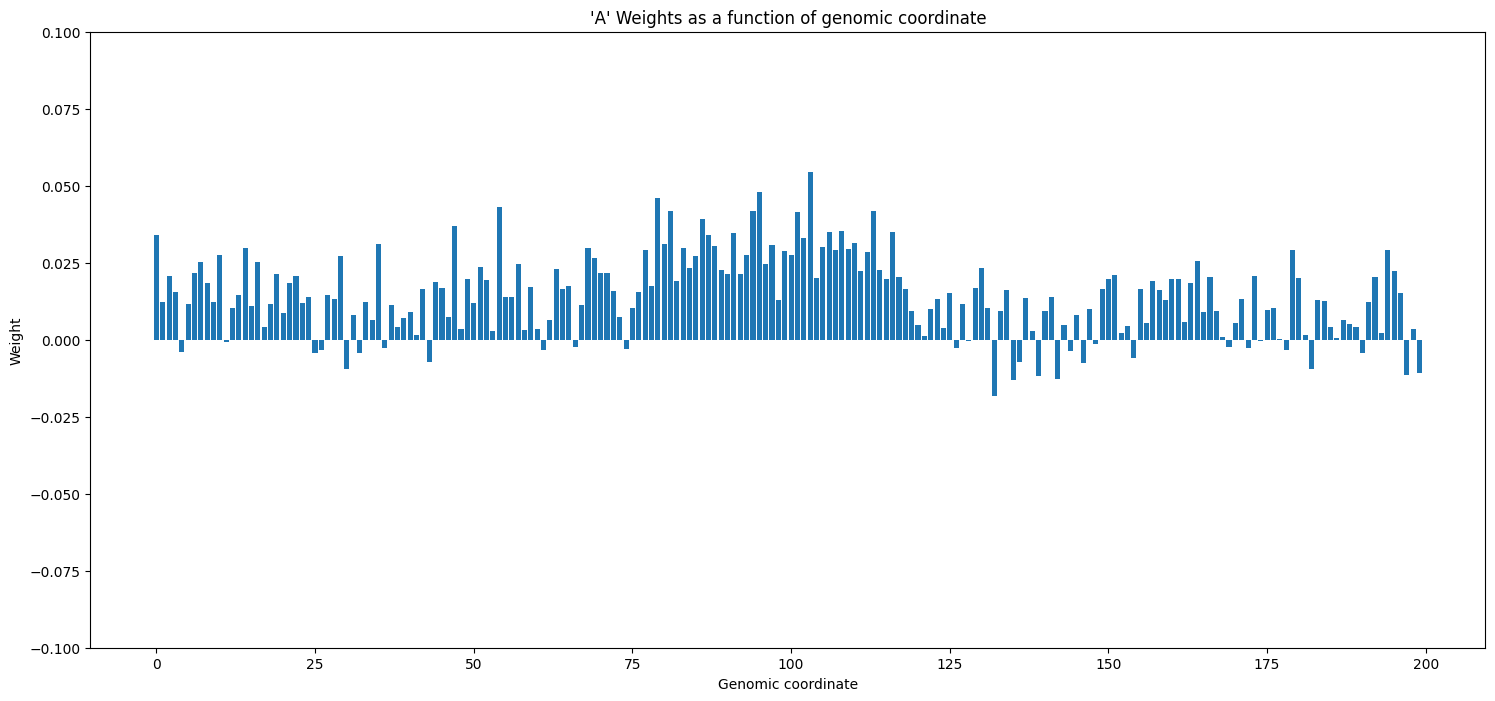

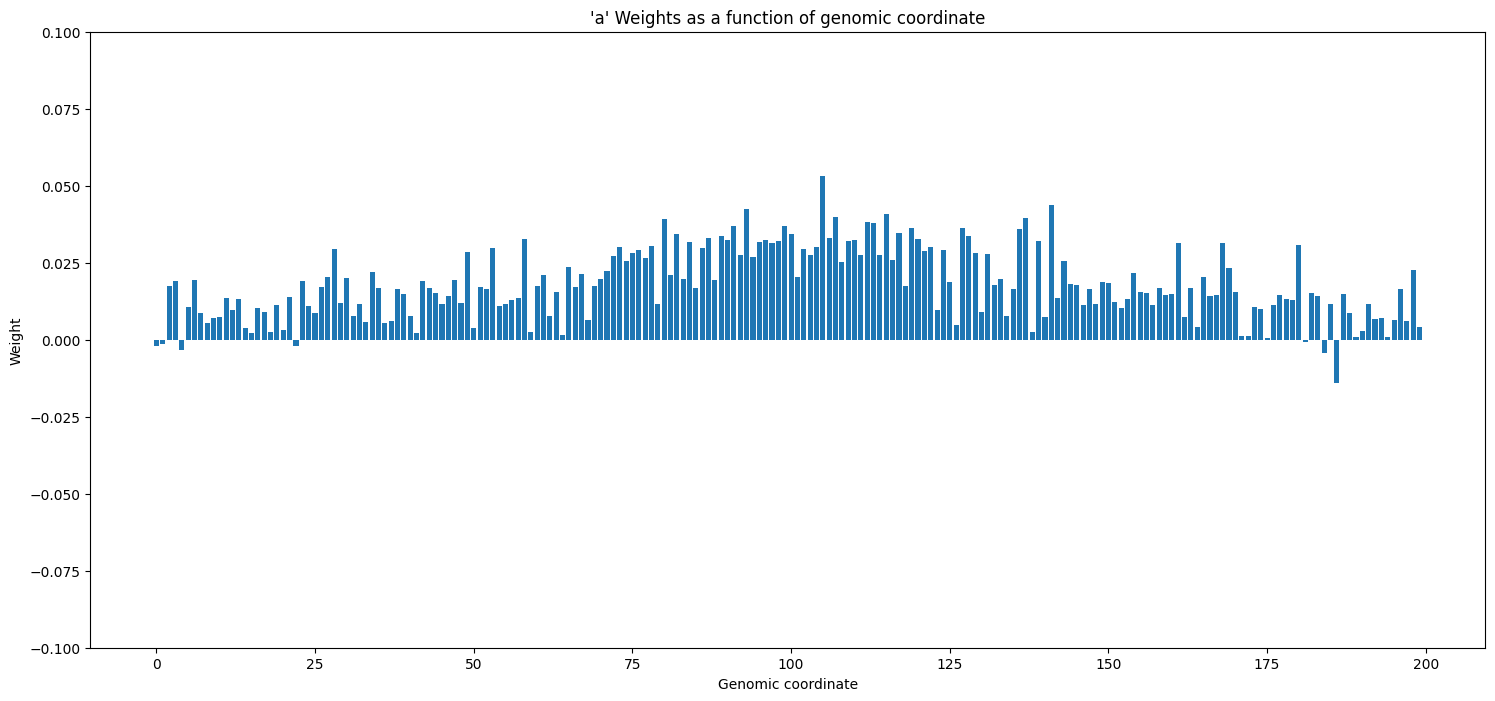

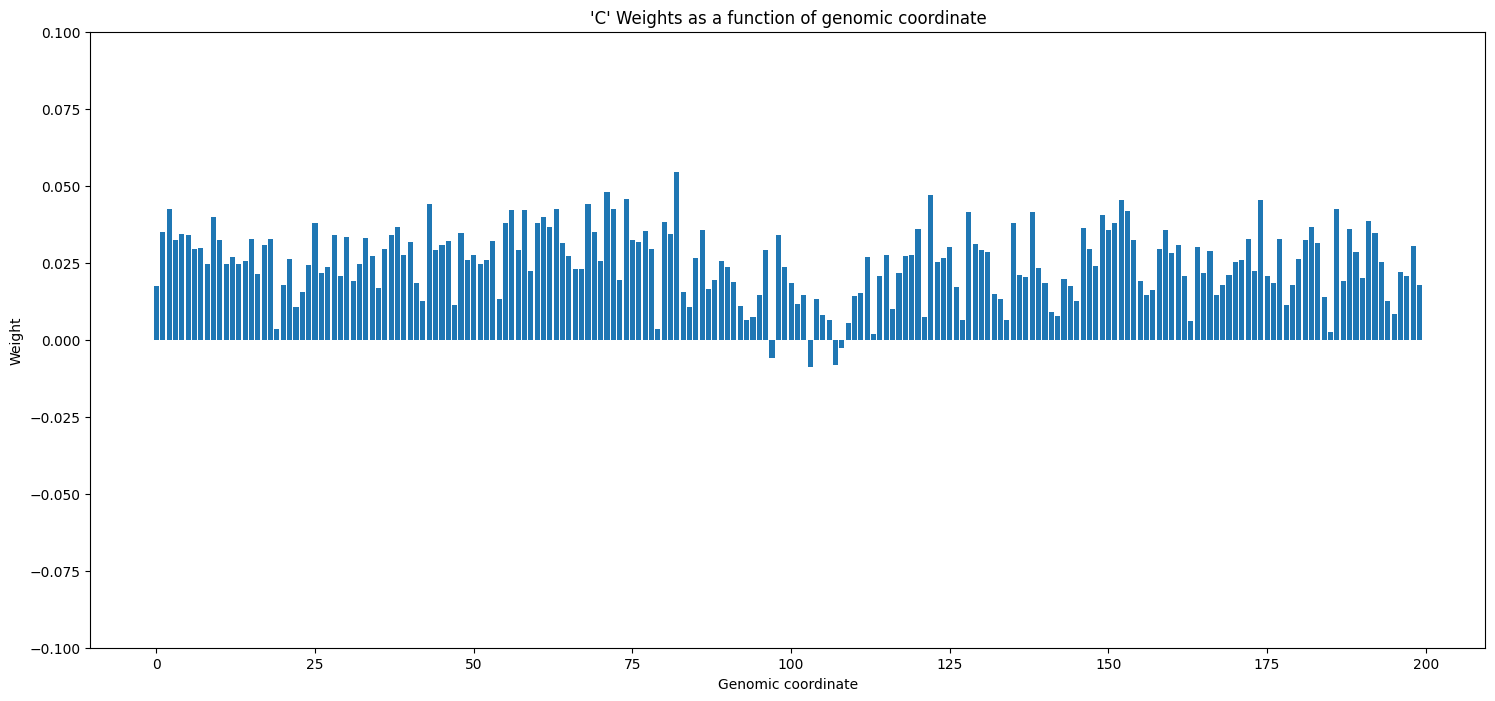

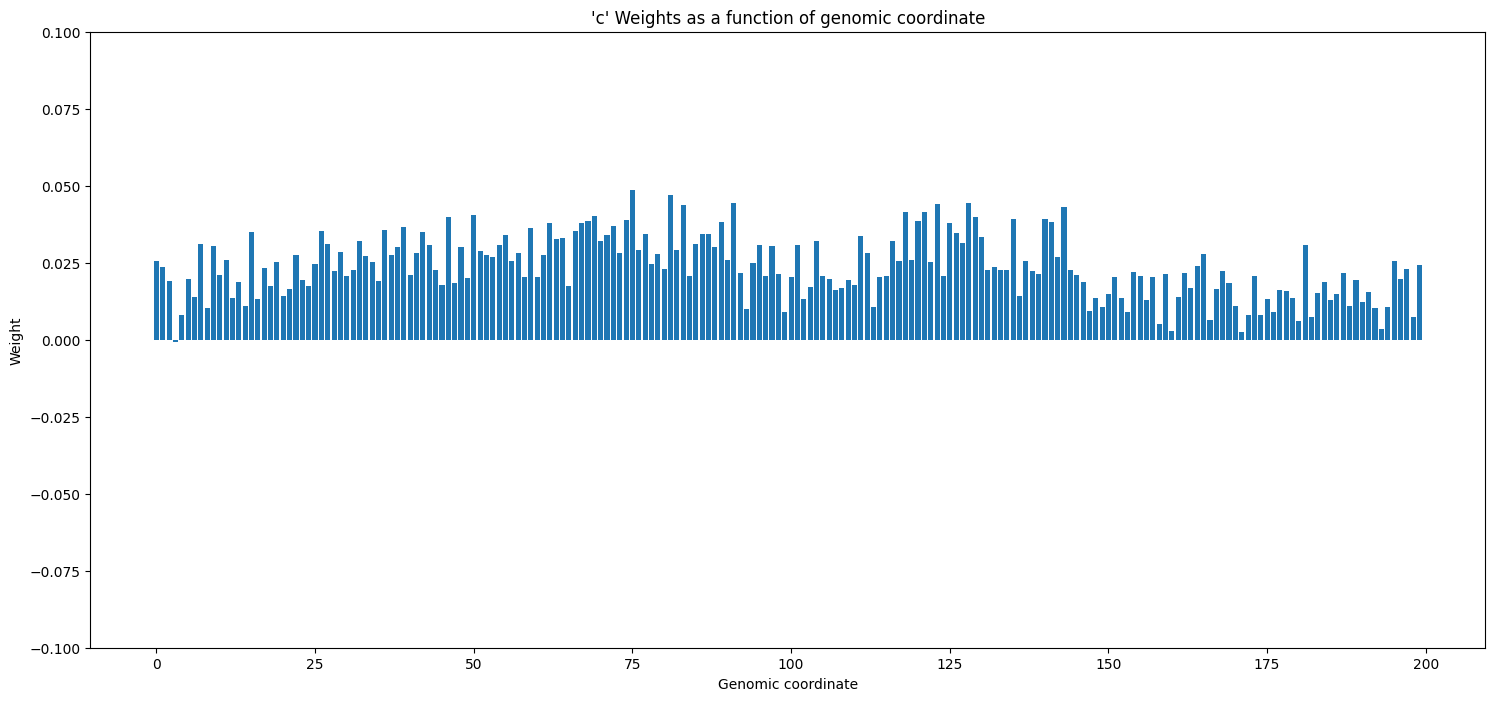

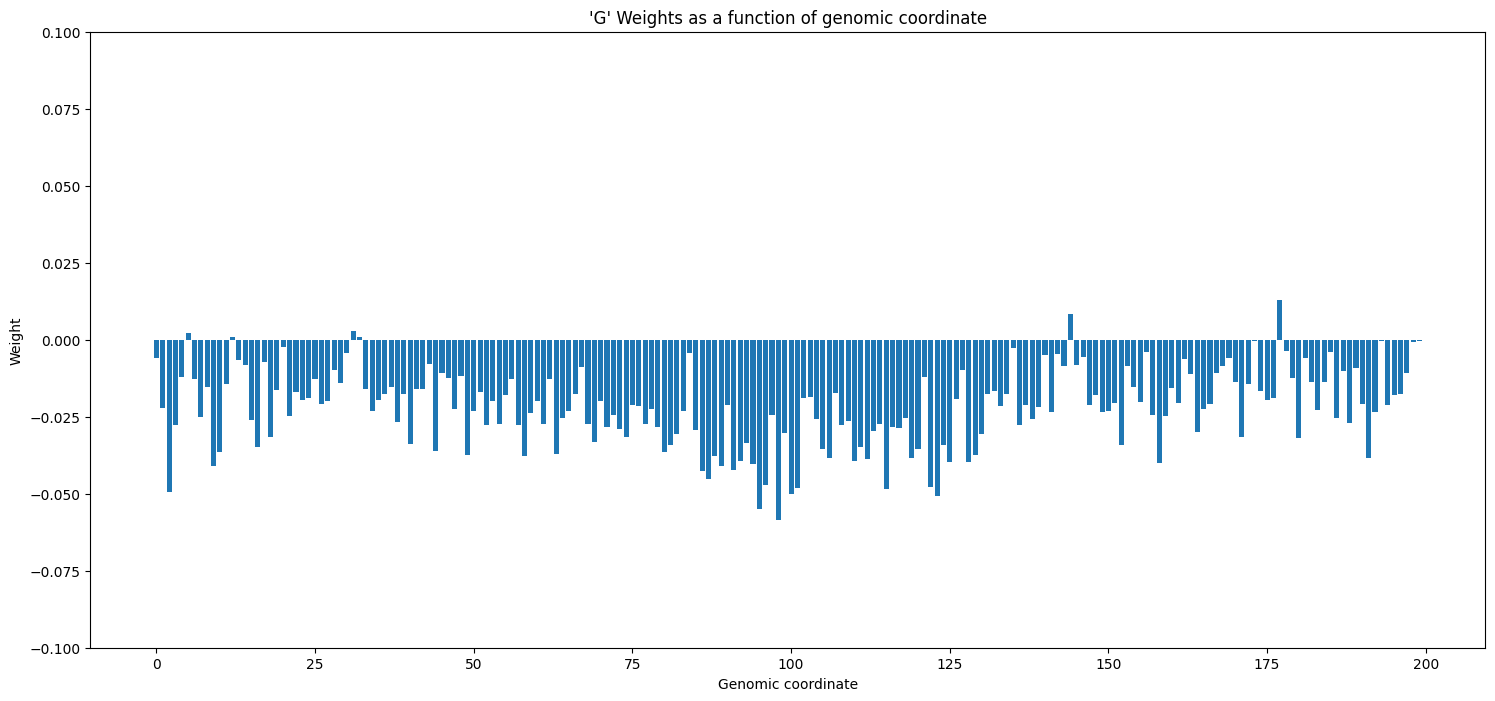

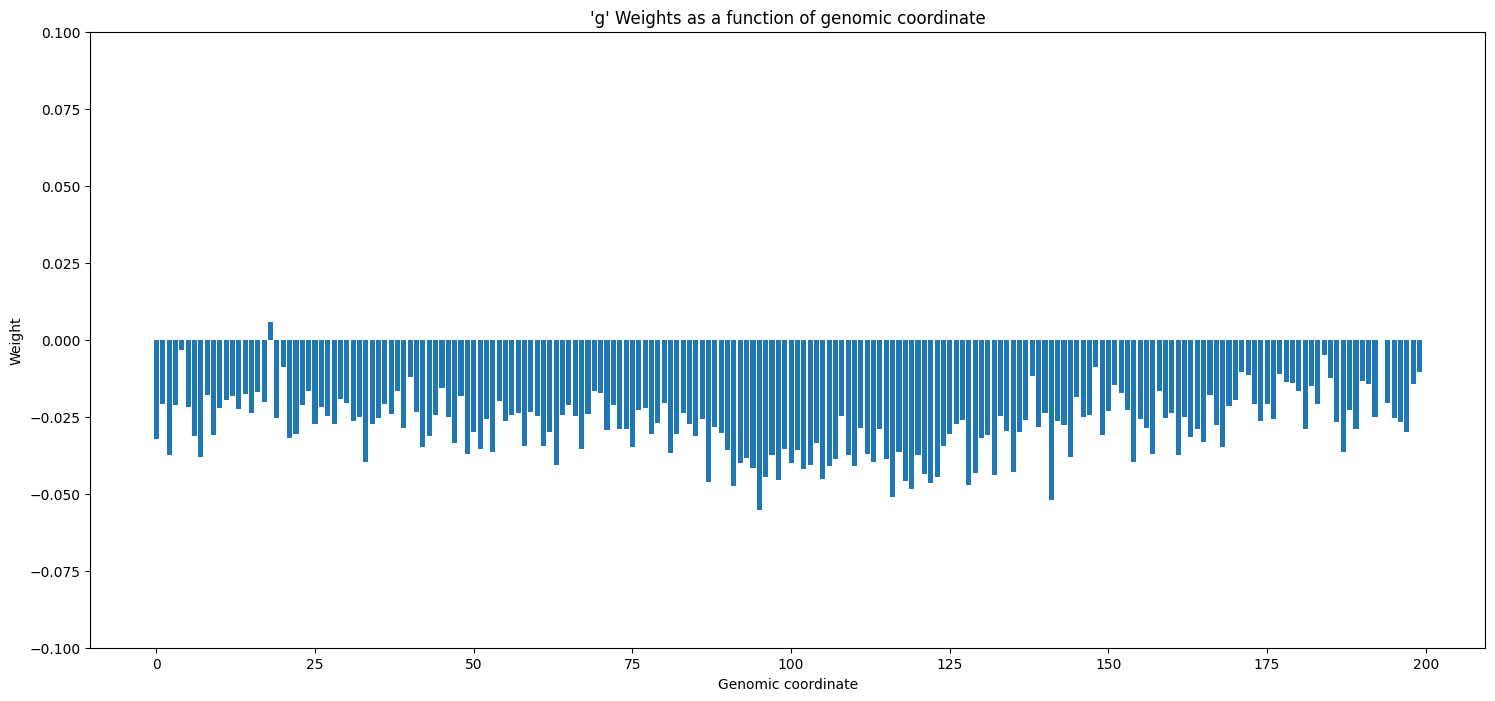

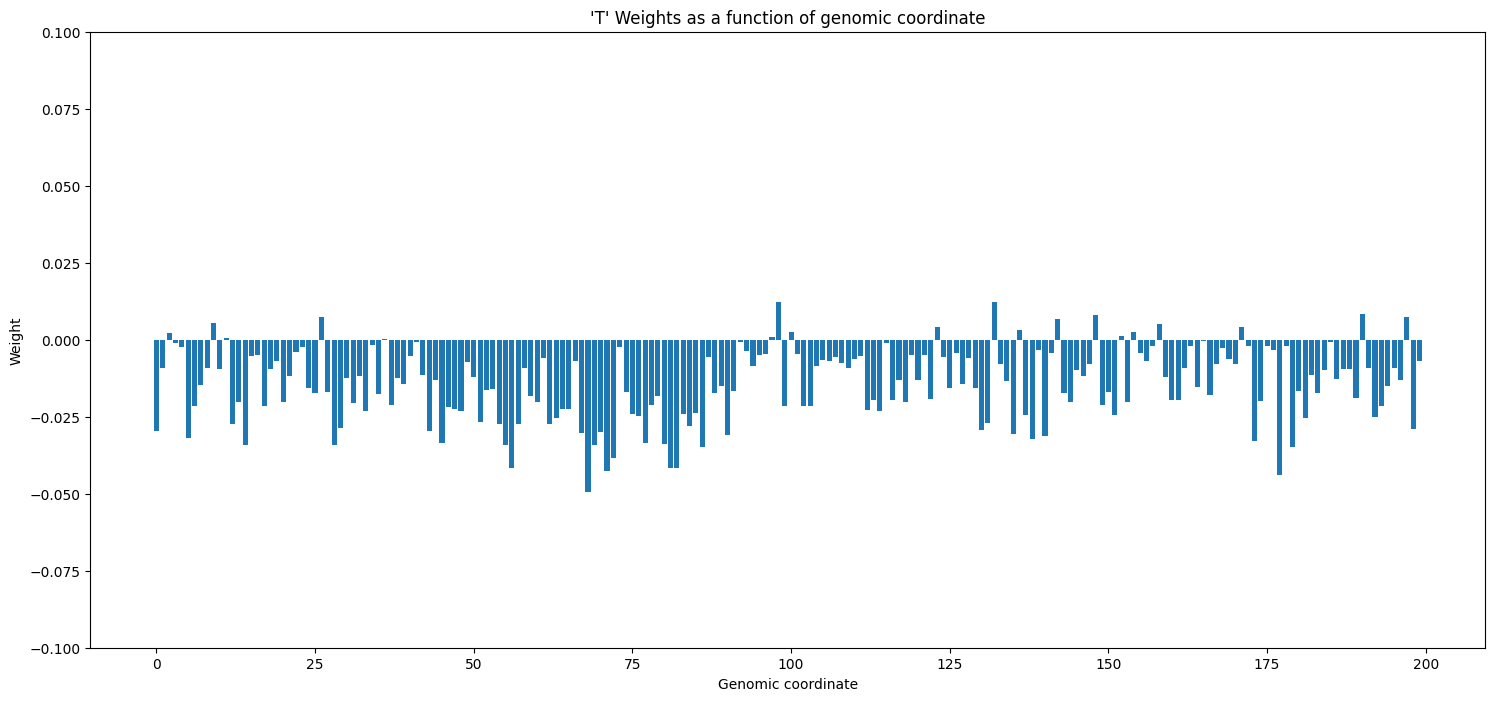

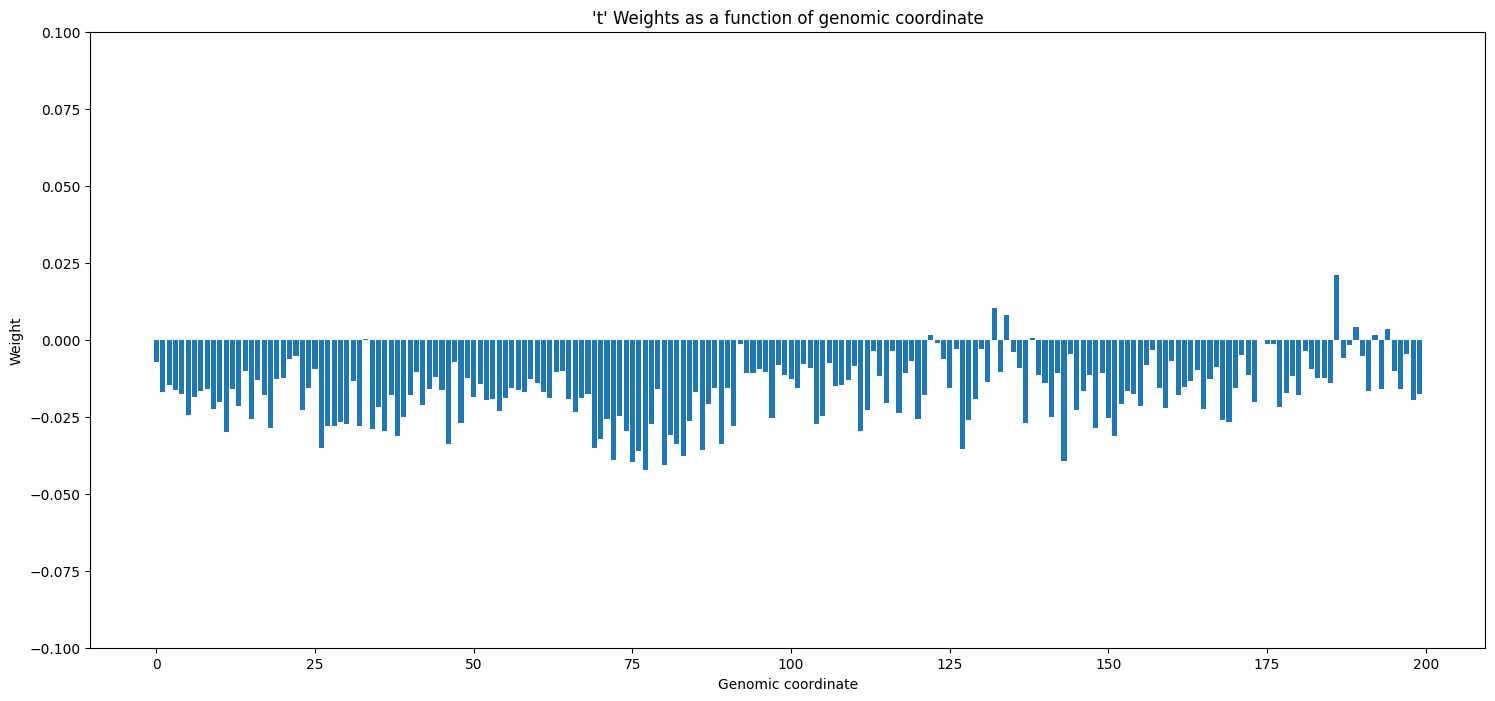

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_weights)), hnRNPL_ENCSR724RDN_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_A_weights)), hnRNPL_ENCSR724RDN_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_a_weights)), hnRNPL_ENCSR724RDN_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_C_weights)), hnRNPL_ENCSR724RDN_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_c_weights)), hnRNPL_ENCSR724RDN_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_G_weights)), hnRNPL_ENCSR724RDN_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_g_weights)), hnRNPL_ENCSR724RDN_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_T_weights)), hnRNPL_ENCSR724RDN_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_t_weights)), hnRNPL_ENCSR724RDN_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

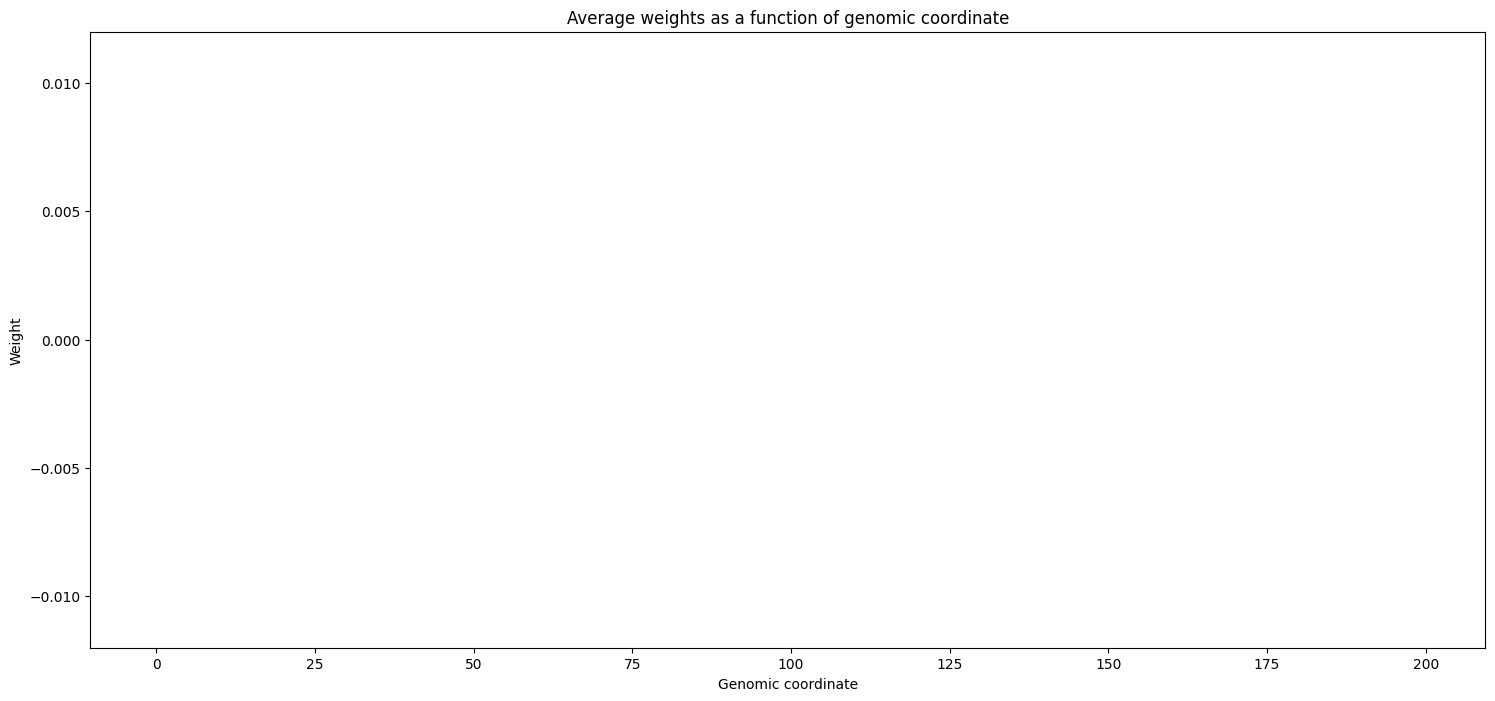

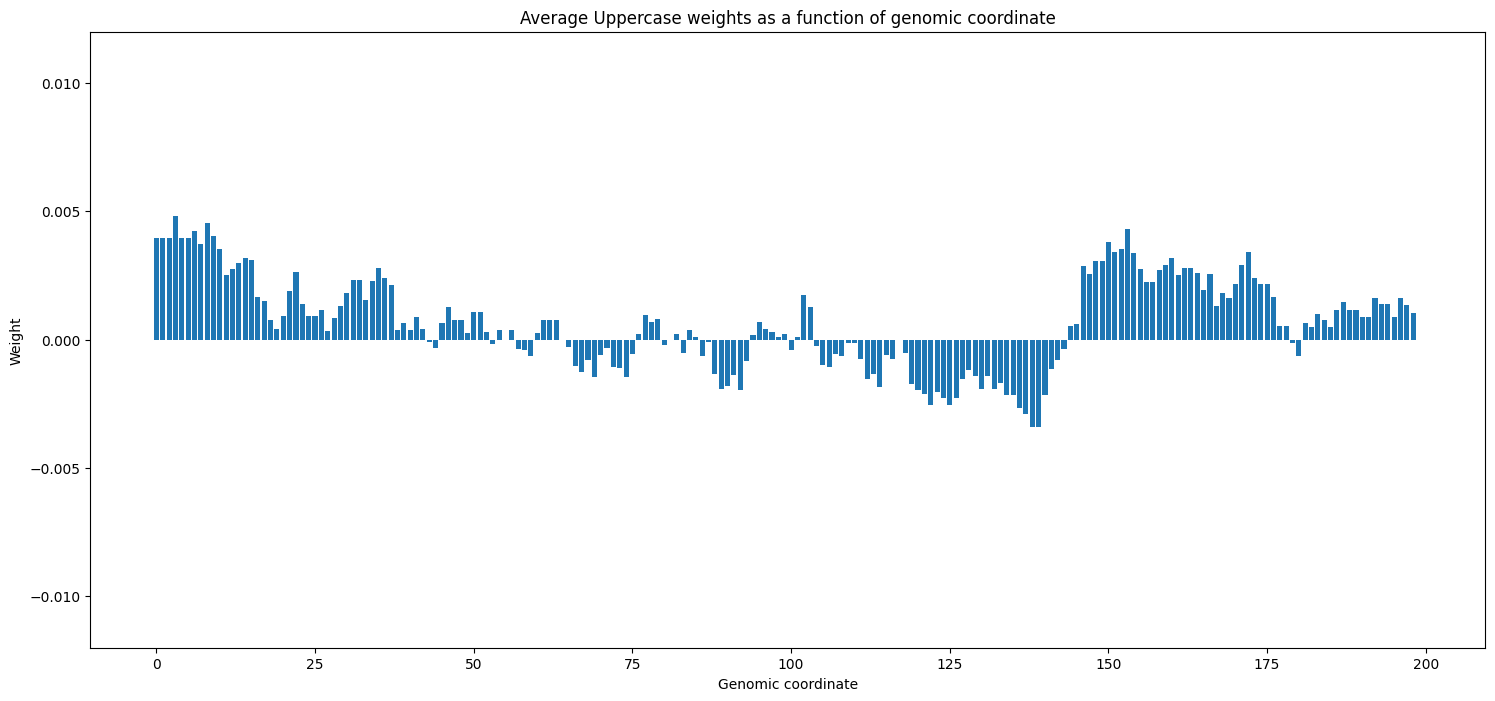

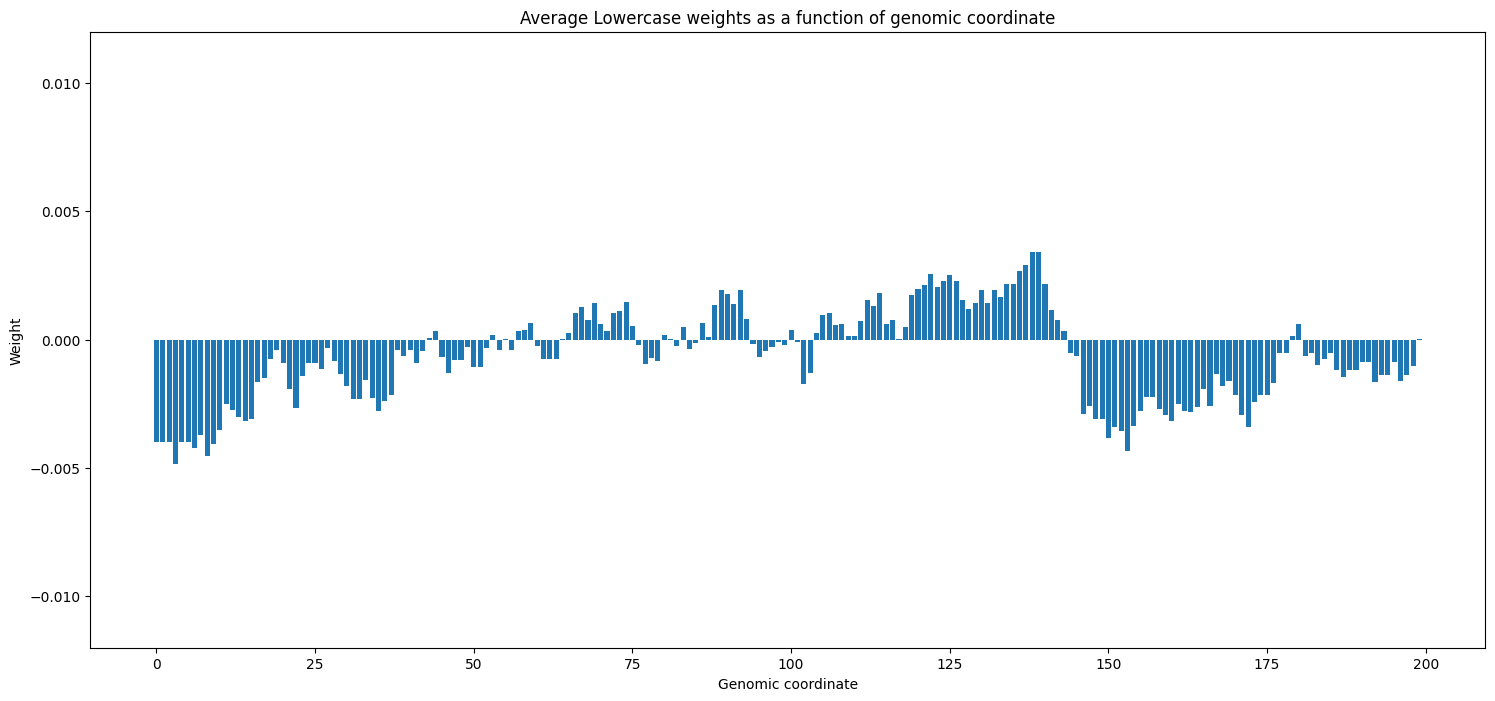

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_avg_weights)), hnRNPL_ENCSR724RDN_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_avg_uppercase_weights)), hnRNPL_ENCSR724RDN_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_avg_lowercase_weights)), hnRNPL_ENCSR724RDN_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

##  ENCSR795CAI

### Import dataset and fit model

In [19]:
hnRNPL_ENCSR795CAI_ds = import_dataset()
[hnRNPL_ENCSR795CAI_train, hnRNPL_ENCSR795CAI_test] = train_test_split(hnRNPL_ENCSR795CAI_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR795CAI_train_features = pd.get_dummies(hnRNPL_ENCSR795CAI_train.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_train_labels = hnRNPL_ENCSR795CAI_train['label'].to_numpy()

hnRNPL_ENCSR795CAI_test_features = pd.get_dummies(hnRNPL_ENCSR795CAI_test.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_test_labels = hnRNPL_ENCSR795CAI_test['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR795CAI_model = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR795CAI_model = hnRNPL_ENCSR795CAI_model.fit(hnRNPL_ENCSR795CAI_train_features, hnRNPL_ENCSR795CAI_train_labels)

Saving hnRNPL_ENCSR795CAI_dataset.txt to hnRNPL_ENCSR795CAI_dataset.txt
User uploaded file "hnRNPL_ENCSR795CAI_dataset.txt" with length 816000 bytes


In [20]:
hnRNPL_ENCSR795CAI_ds_secondary = import_dataset()
[hnRNPL_ENCSR795CAI_train_secondary, hnRNPL_ENCSR795CAI_test_secondary] = train_test_split(hnRNPL_ENCSR795CAI_ds_secondary,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR795CAI_train_features_secondary = pd.get_dummies(hnRNPL_ENCSR795CAI_train_secondary.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_train_labels_secondary = hnRNPL_ENCSR795CAI_train_secondary['label'].to_numpy()

hnRNPL_ENCSR795CAI_test_features_secondary = pd.get_dummies(hnRNPL_ENCSR795CAI_test_secondary.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_test_labels_secondary = hnRNPL_ENCSR795CAI_test_secondary['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR795CAI_model_secondary = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR795CAI_model_secondary = hnRNPL_ENCSR795CAI_model_secondary.fit(hnRNPL_ENCSR795CAI_train_features_secondary, hnRNPL_ENCSR795CAI_train_labels_secondary)

Saving hnRNPL_ENCSR795CAI_dataset_secondary_structure.txt to hnRNPL_ENCSR795CAI_dataset_secondary_structure.txt
User uploaded file "hnRNPL_ENCSR795CAI_dataset_secondary_structure.txt" with length 816000 bytes


### Import RBPmap predictions

In [21]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

hnRNPL_ENCSR795CAI_rbp_no_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])
hnRNPL_ENCSR795CAI_true_labels = np.array([int(line.split('\t')[1]) for line in txt_lines])

Saving hnRNPL_ENCSR795CAI_rbp_predictions_no_conservation.txt to hnRNPL_ENCSR795CAI_rbp_predictions_no_conservation.txt
User uploaded file "hnRNPL_ENCSR795CAI_rbp_predictions_no_conservation.txt" with length 20013 bytes


In [22]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

with open(fn, 'r') as opened_file:
    txt_lines = opened_file.readlines()
txt_lines = txt_lines[1:]

hnRNPL_ENCSR795CAI_rbp_with_conservation = np.array([int(line.split('\t')[0]) for line in txt_lines])

Saving hnRNPL_ENCSR795CAI_rbp_predictions_with_conservation.txt to hnRNPL_ENCSR795CAI_rbp_predictions_with_conservation.txt
User uploaded file "hnRNPL_ENCSR795CAI_rbp_predictions_with_conservation.txt" with length 20013 bytes


### Display results

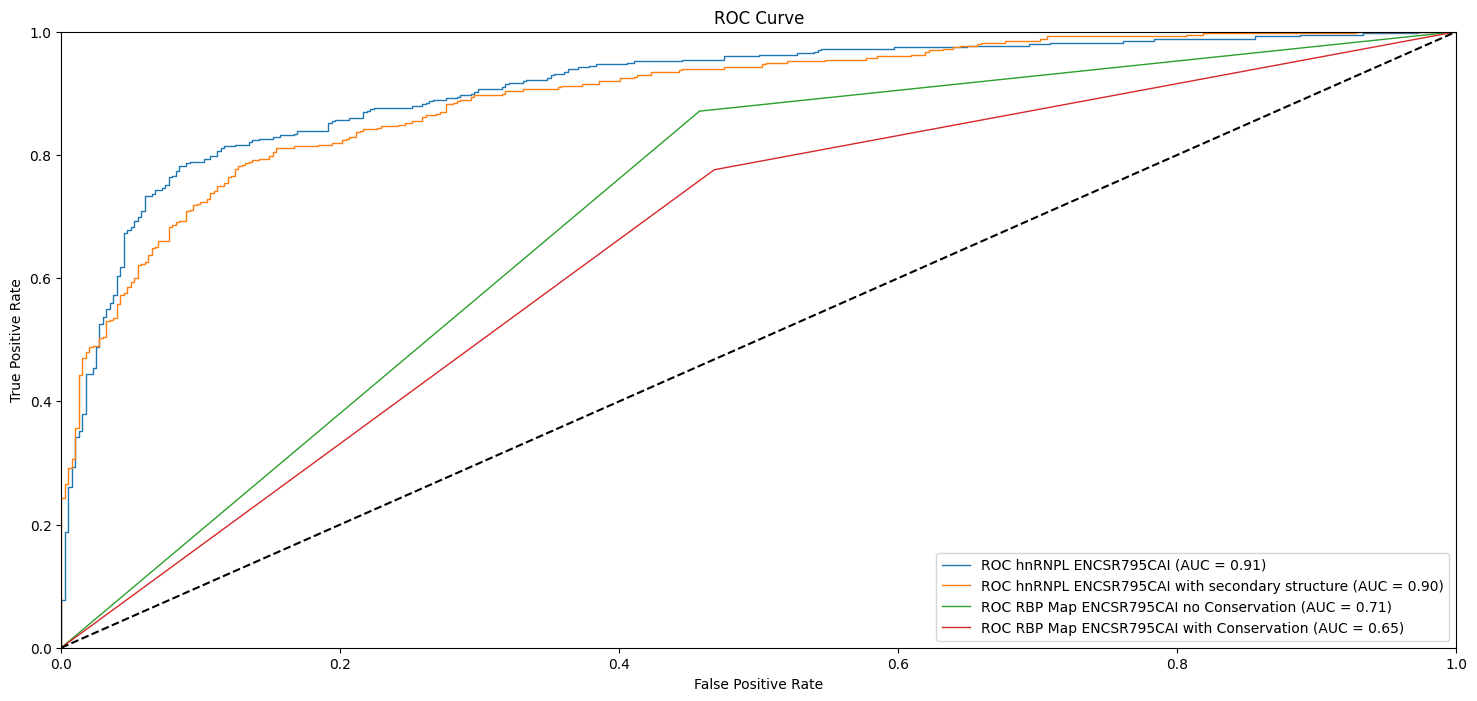

In [23]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR795CAI_model,
    hnRNPL_ENCSR795CAI_test_features,
    hnRNPL_ENCSR795CAI_test_labels,
    name=f"ROC hnRNPL ENCSR795CAI",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR795CAI_model_secondary,
    hnRNPL_ENCSR795CAI_test_features_secondary,
    hnRNPL_ENCSR795CAI_test_labels_secondary,
    name=f"ROC hnRNPL ENCSR795CAI with secondary structure",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR795CAI_rbp_no_conservation,
    hnRNPL_ENCSR795CAI_true_labels,
    name=f"ROC RBP Map ENCSR795CAI no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR795CAI_rbp_with_conservation,
    hnRNPL_ENCSR795CAI_true_labels,
    name=f"ROC RBP Map ENCSR795CAI with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [ ]:
hnRNPL_ENCSR795CAI_weights = hnRNPL_ENCSR795CAI_model.coef_[0]
hnRNPL_ENCSR795CAI_A_weights = hnRNPL_ENCSR795CAI_weights[::8]
hnRNPL_ENCSR795CAI_a_weights = hnRNPL_ENCSR795CAI_weights[4::8]
hnRNPL_ENCSR795CAI_C_weights = hnRNPL_ENCSR795CAI_weights[1::8]
hnRNPL_ENCSR795CAI_c_weights = hnRNPL_ENCSR795CAI_weights[5::8]
hnRNPL_ENCSR795CAI_G_weights = hnRNPL_ENCSR795CAI_weights[2::8]
hnRNPL_ENCSR795CAI_g_weights = hnRNPL_ENCSR795CAI_weights[6::8]
hnRNPL_ENCSR795CAI_T_weights = hnRNPL_ENCSR795CAI_weights[3::8]
hnRNPL_ENCSR795CAI_t_weights = hnRNPL_ENCSR795CAI_weights[7::8]

hnRNPL_ENCSR795CAI_avg_weights = hnRNPL_ENCSR795CAI_weights.reshape(-1, 8).mean(axis=1)
hnRNPL_ENCSR795CAI_avg_uppercase_weights = hnRNPL_ENCSR795CAI_weights.reshape(-1, 4).mean(axis=1)[::2]
hnRNPL_ENCSR795CAI_avg_lowercase_weights = hnRNPL_ENCSR795CAI_weights.reshape(-1, 4).mean(axis=1)[1::2]

print('Average weights mean is ', hnRNPL_ENCSR795CAI_avg_weights.mean())
print('Average weights variance is ', hnRNPL_ENCSR795CAI_avg_weights.var())

Average weights mean is  1.2087770021040888e-17
Average weights variance is  5.081309312750067e-35


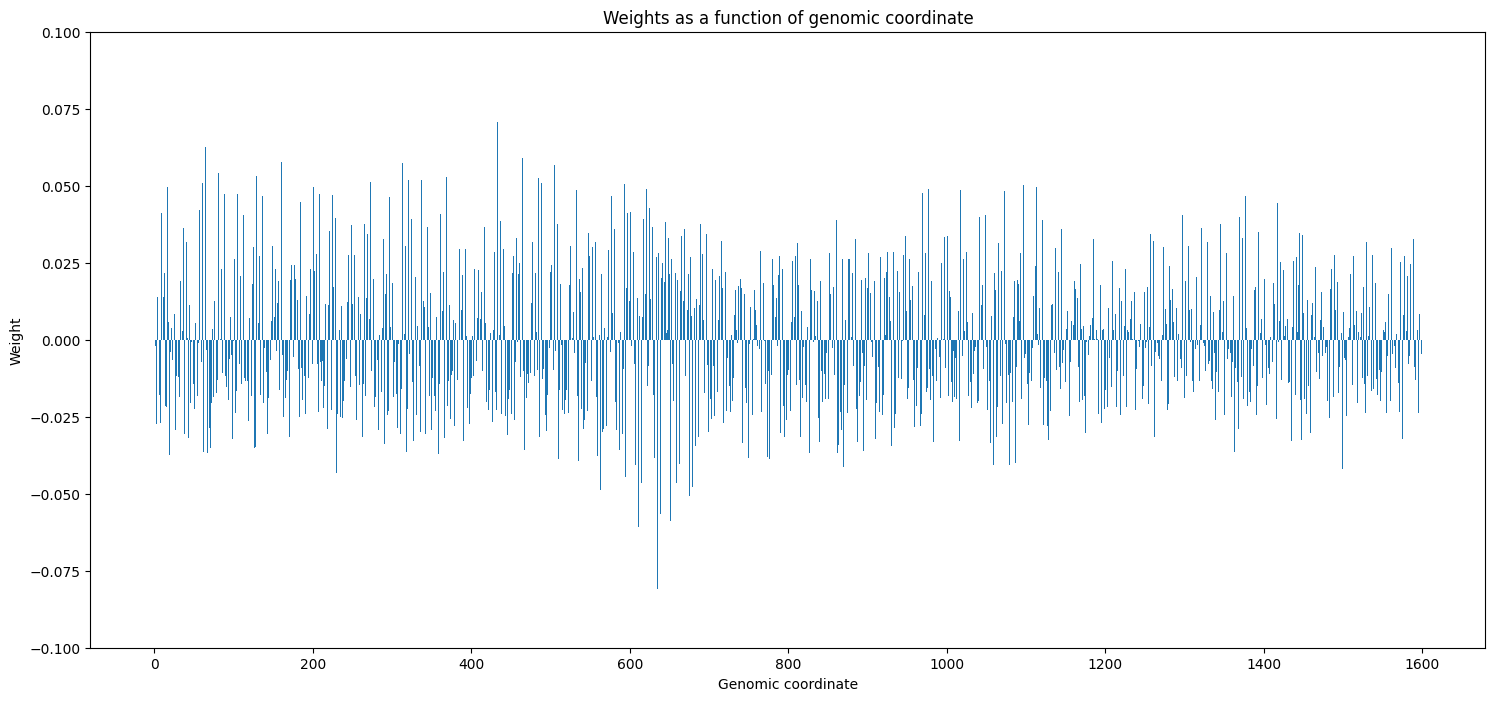

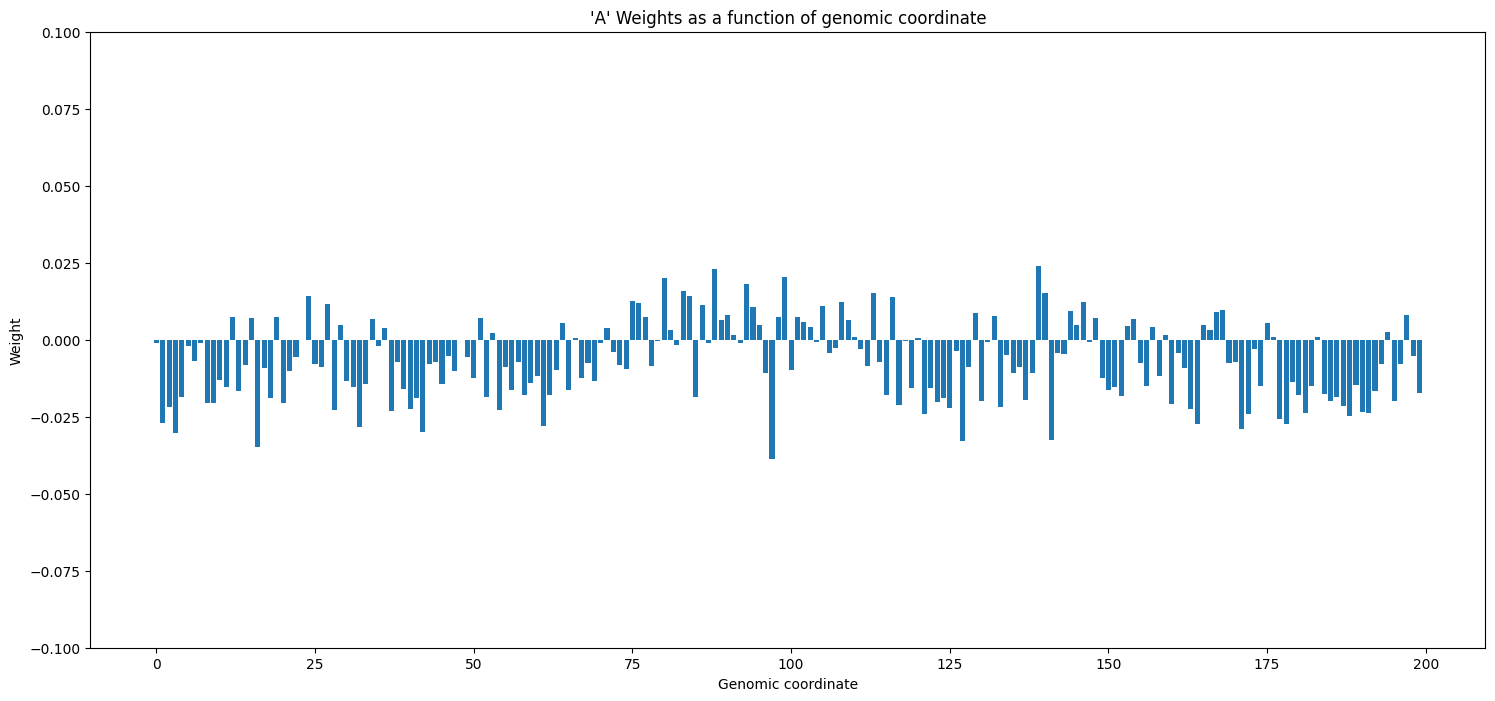

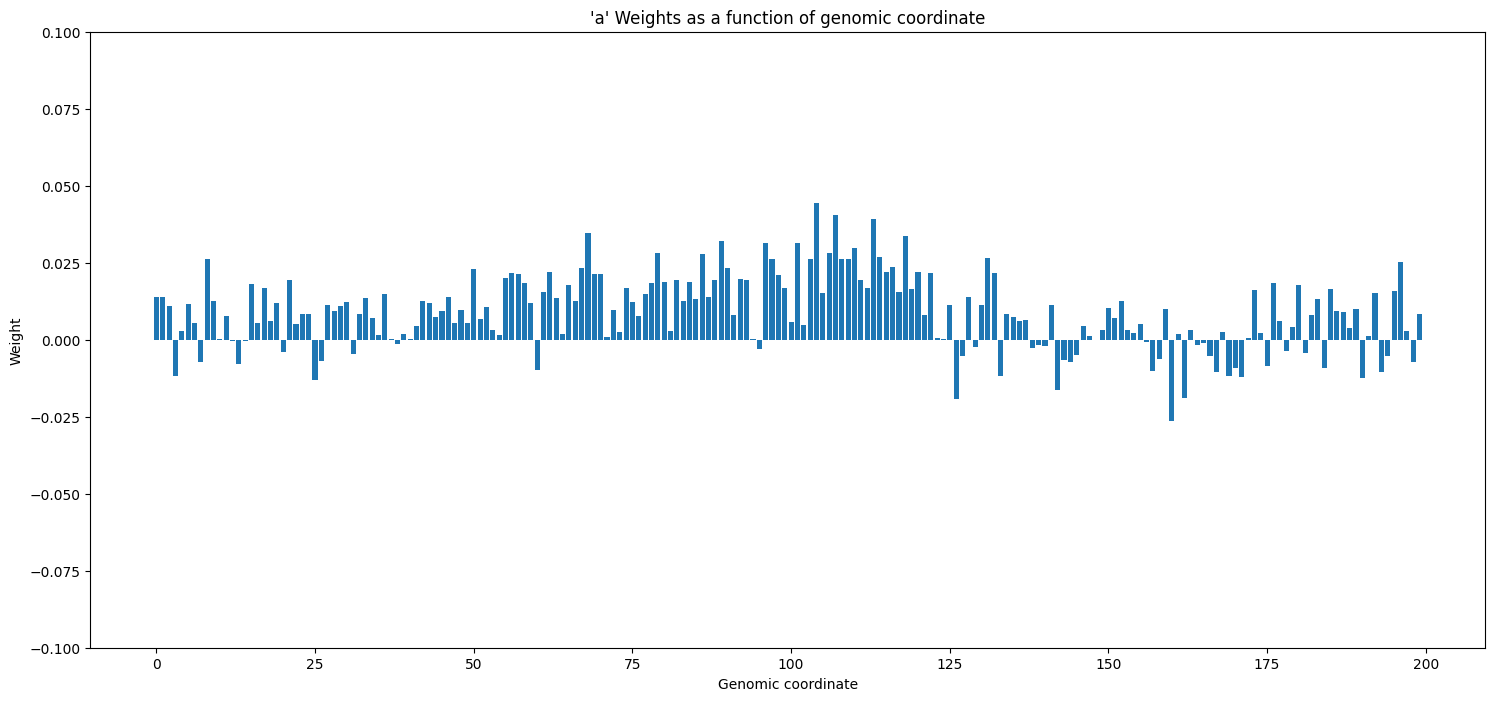

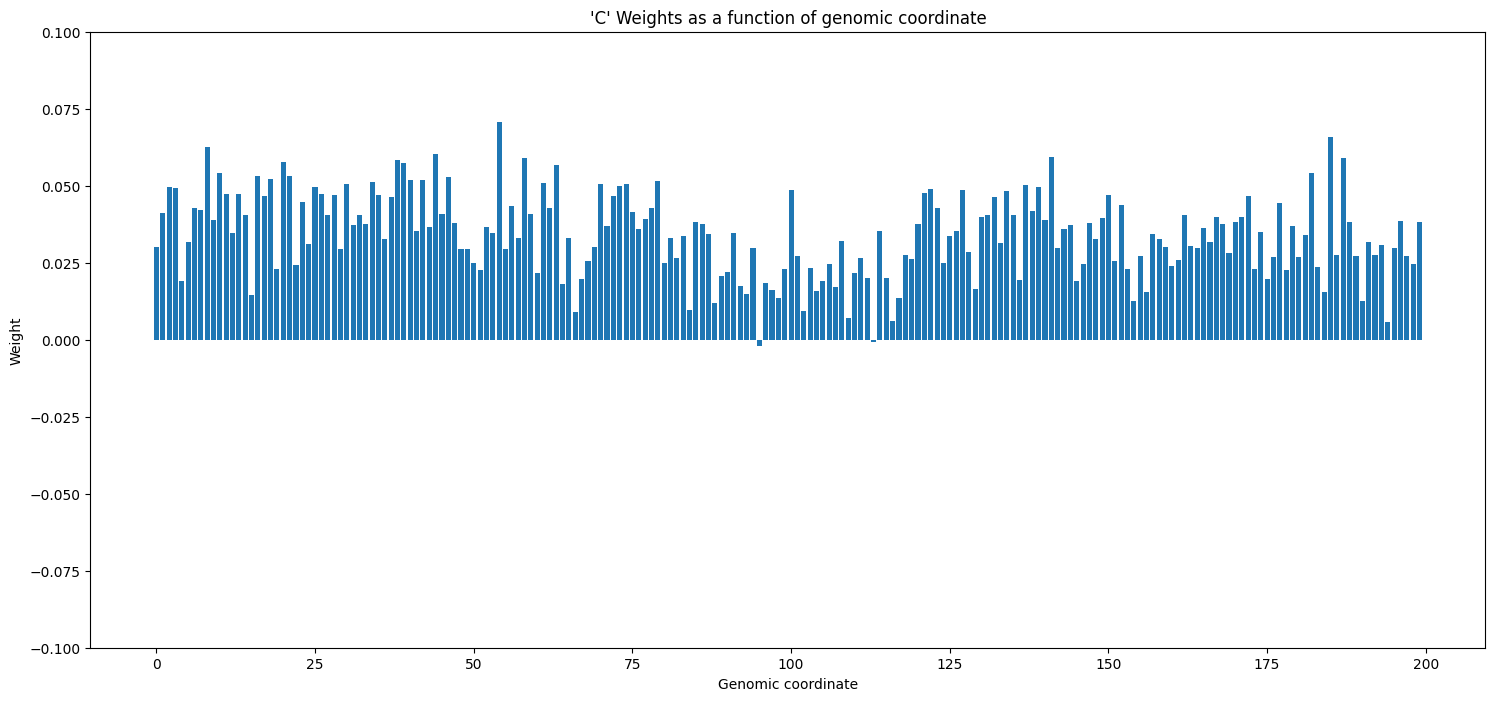

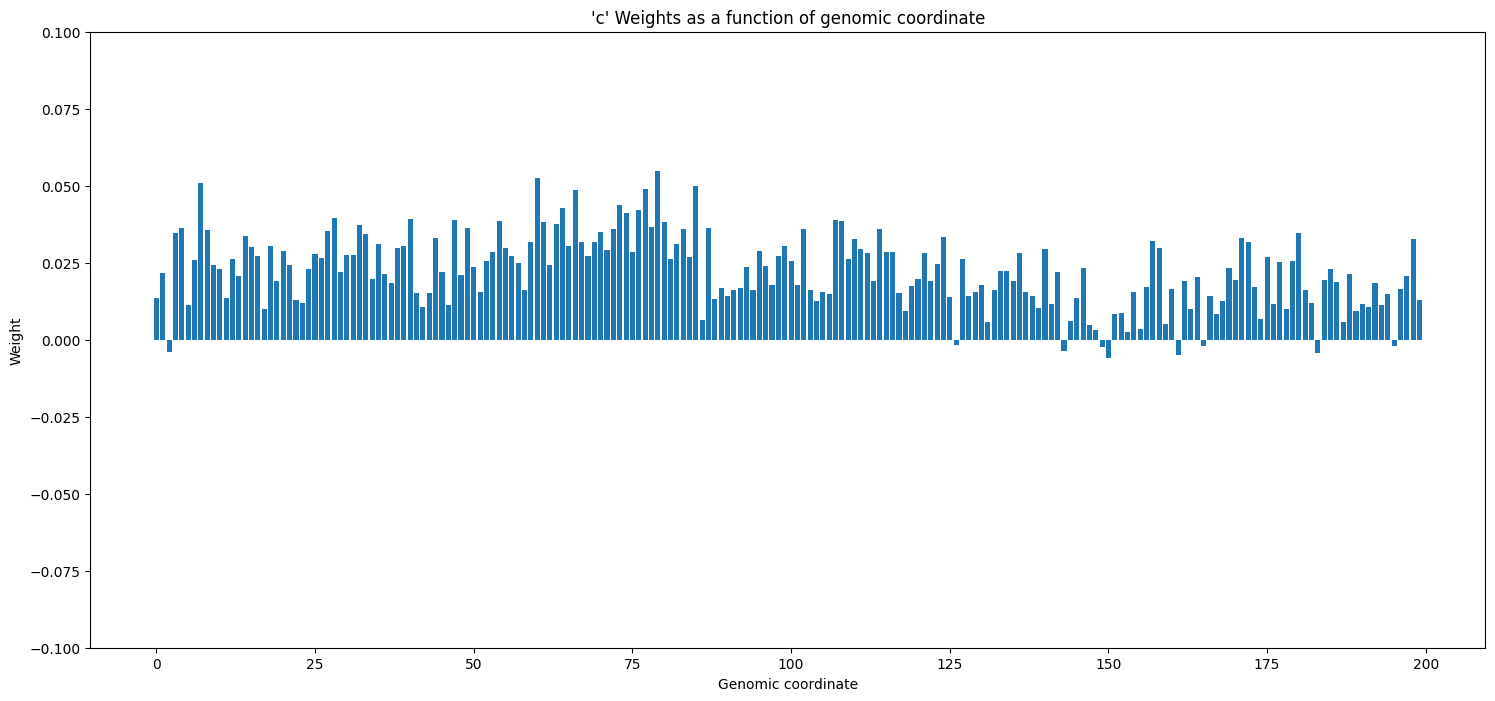

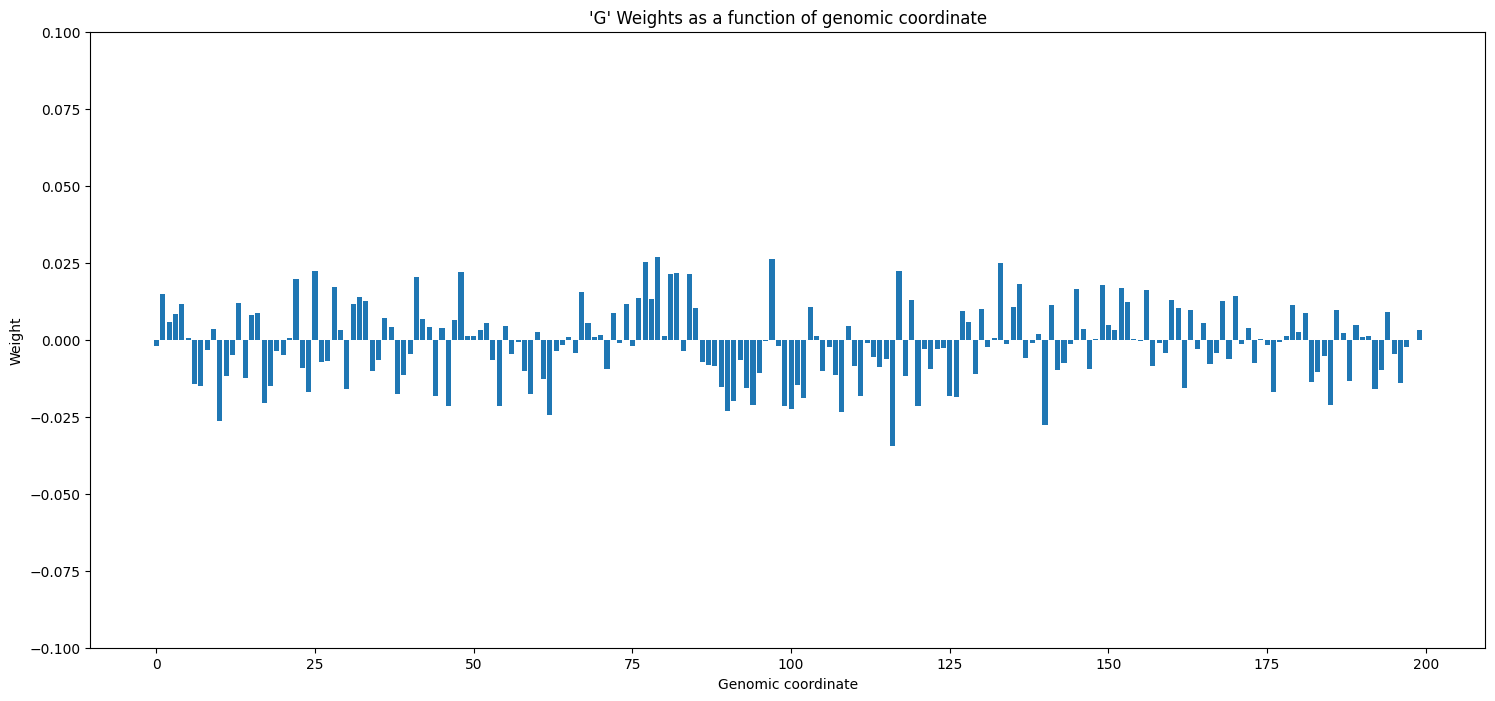

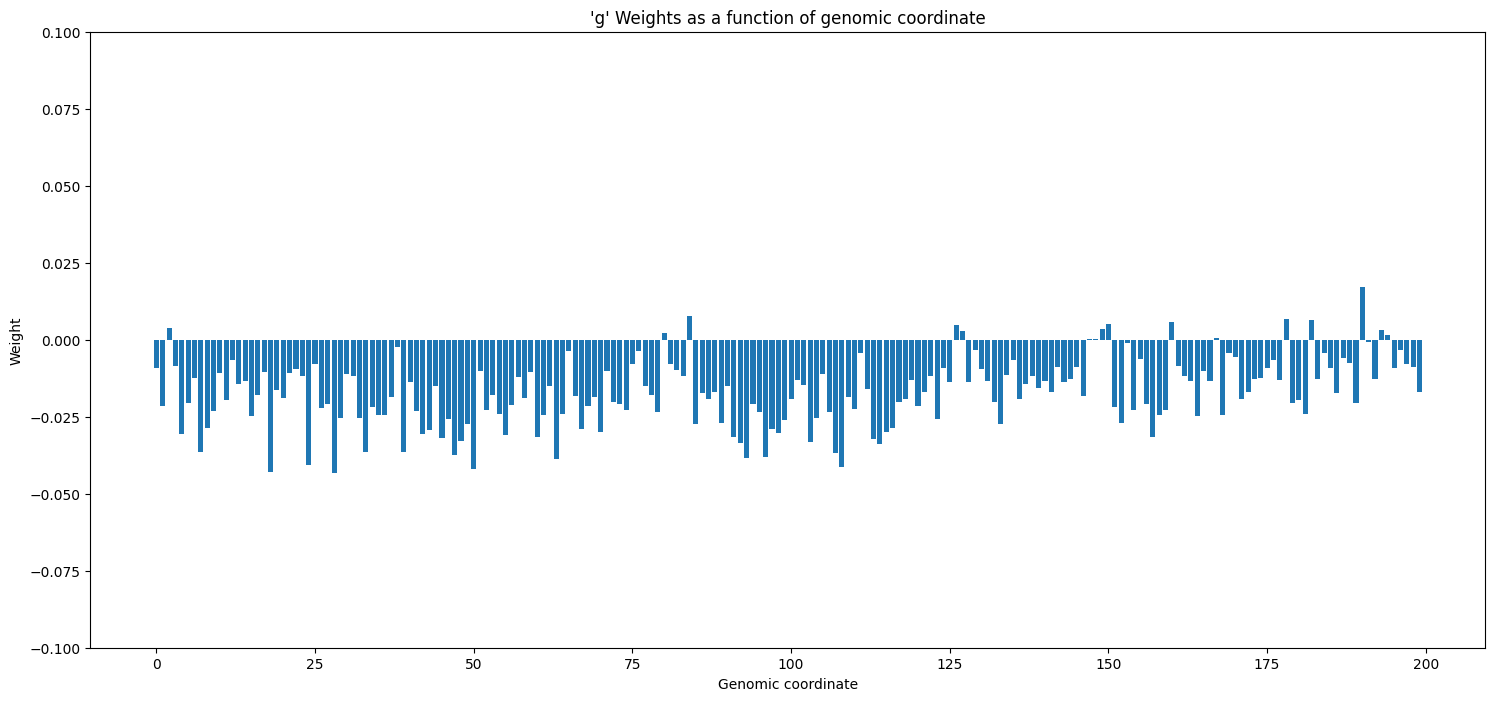

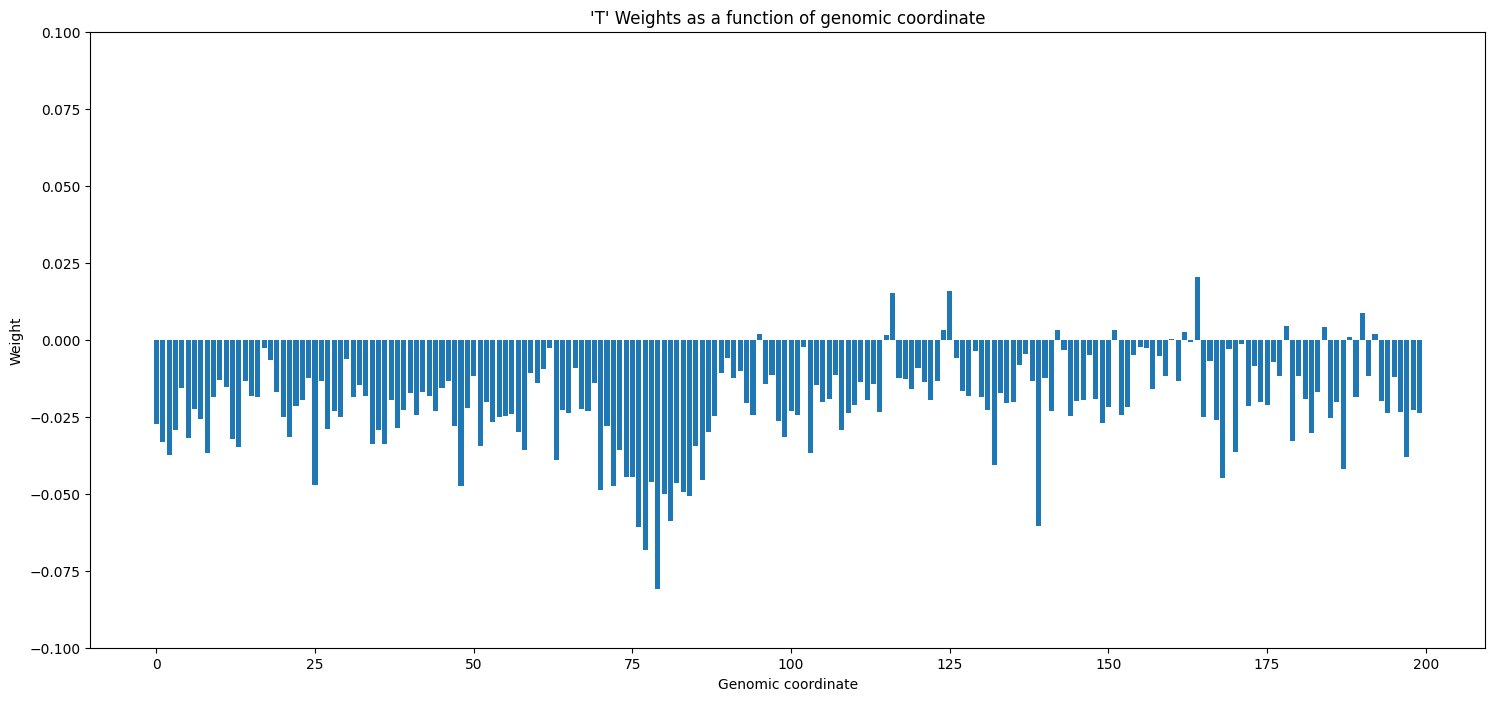

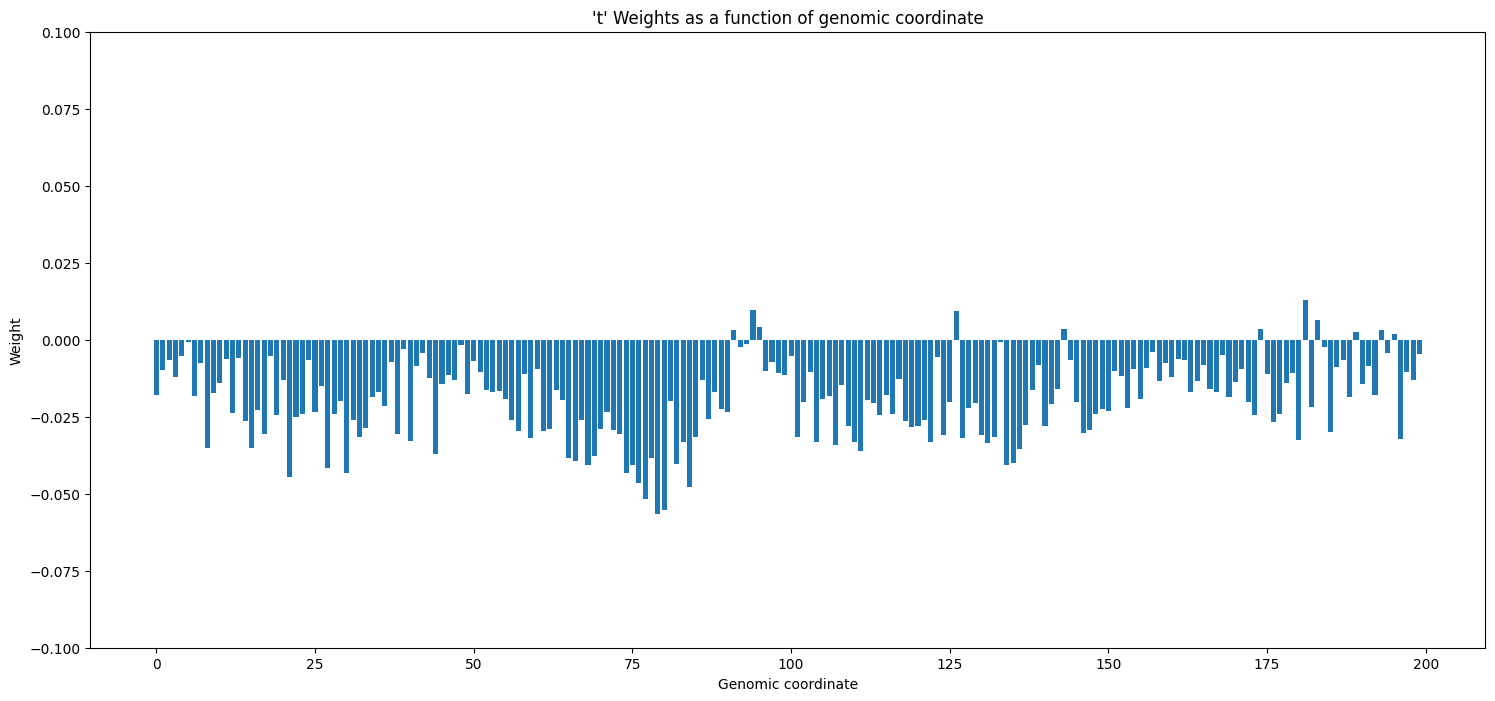

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_weights)), hnRNPL_ENCSR795CAI_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_A_weights)), hnRNPL_ENCSR795CAI_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_a_weights)), hnRNPL_ENCSR795CAI_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_C_weights)), hnRNPL_ENCSR795CAI_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_c_weights)), hnRNPL_ENCSR795CAI_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_G_weights)), hnRNPL_ENCSR795CAI_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_g_weights)), hnRNPL_ENCSR795CAI_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_T_weights)), hnRNPL_ENCSR795CAI_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_t_weights)), hnRNPL_ENCSR795CAI_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

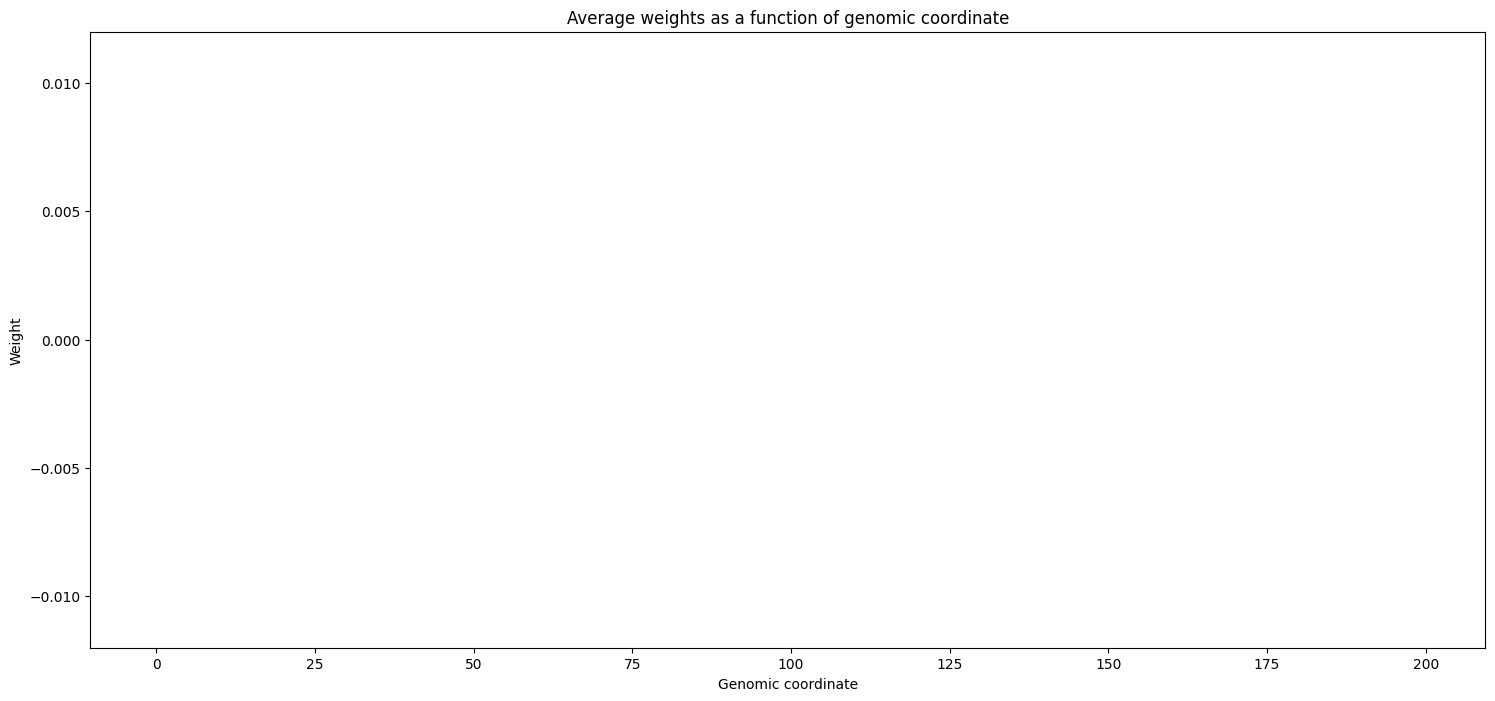

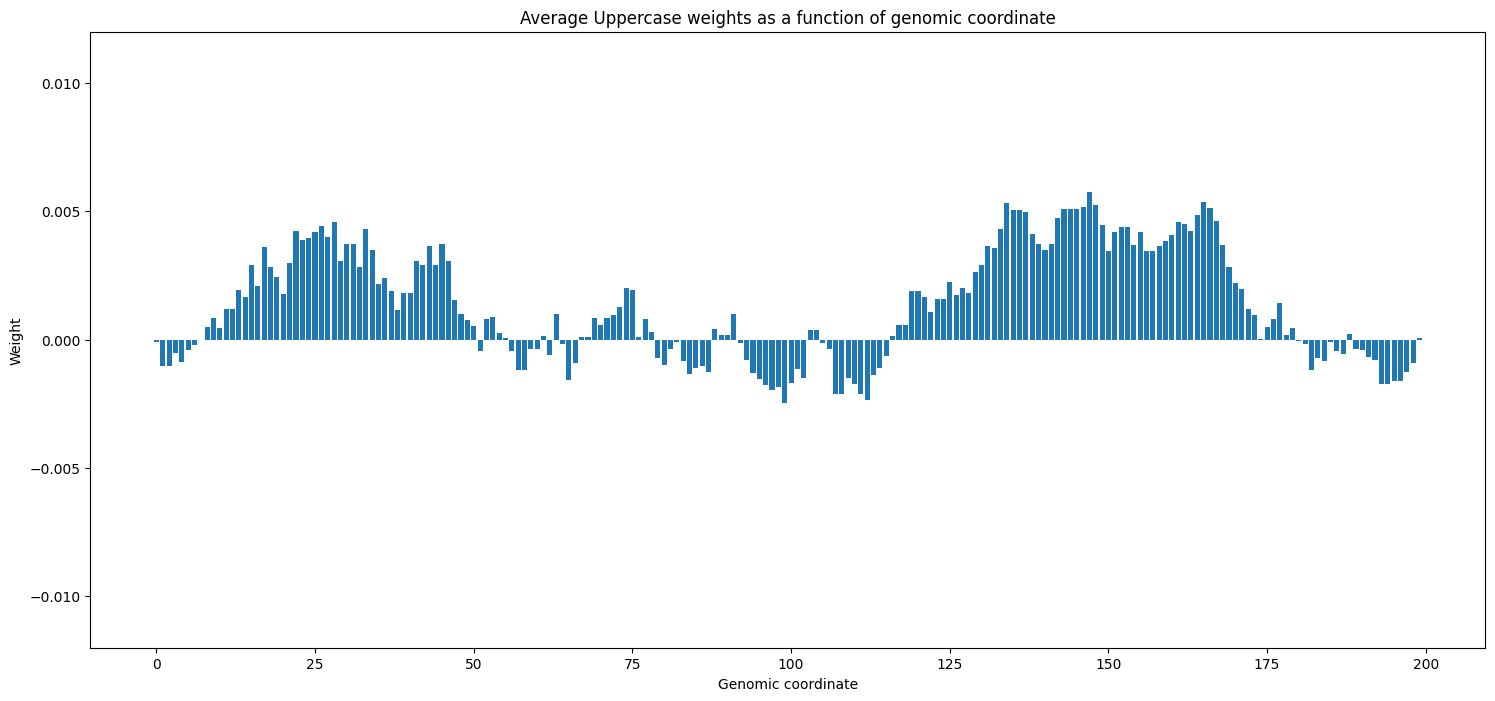

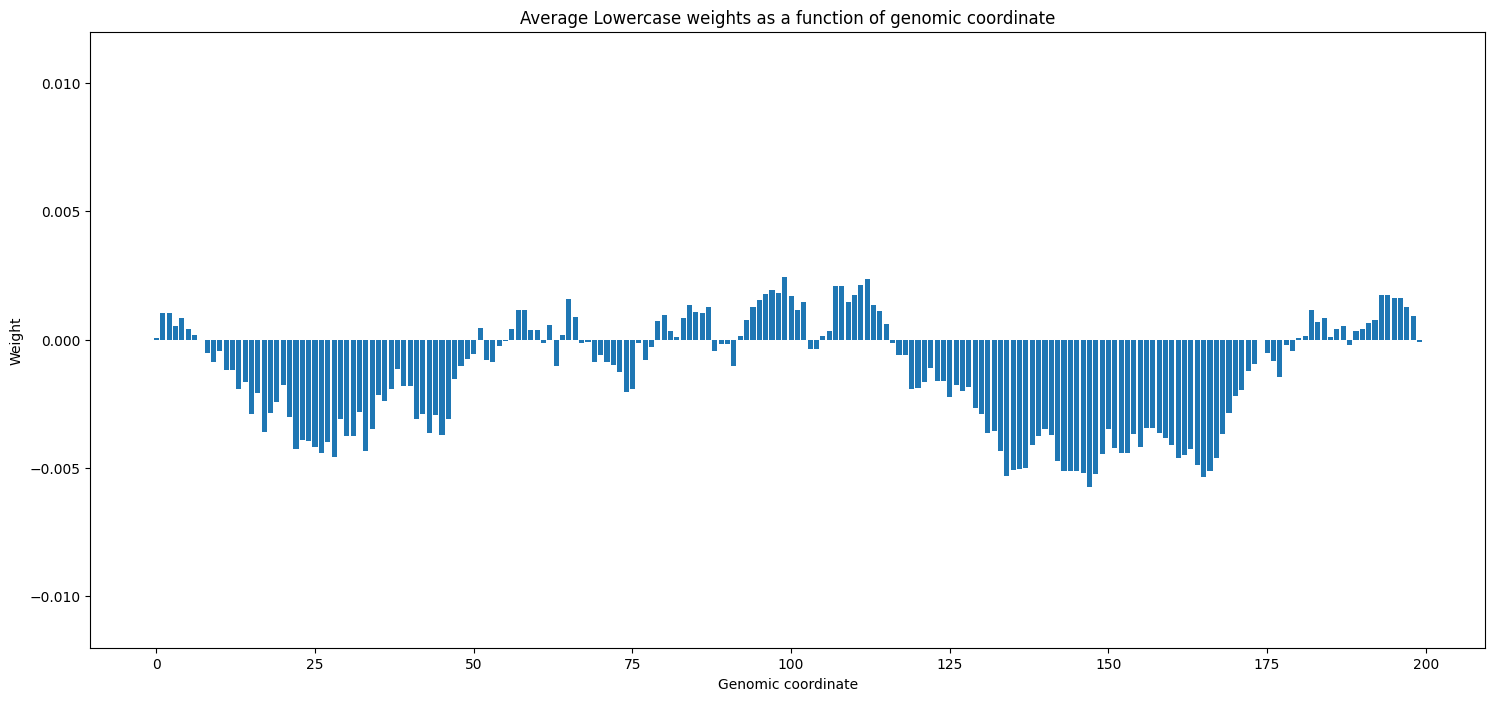

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_avg_weights)), hnRNPL_ENCSR795CAI_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_avg_uppercase_weights)), hnRNPL_ENCSR795CAI_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR795CAI_avg_lowercase_weights)), hnRNPL_ENCSR795CAI_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.ylim([-0.012, 0.012])
plt.show()

## Compare experiments

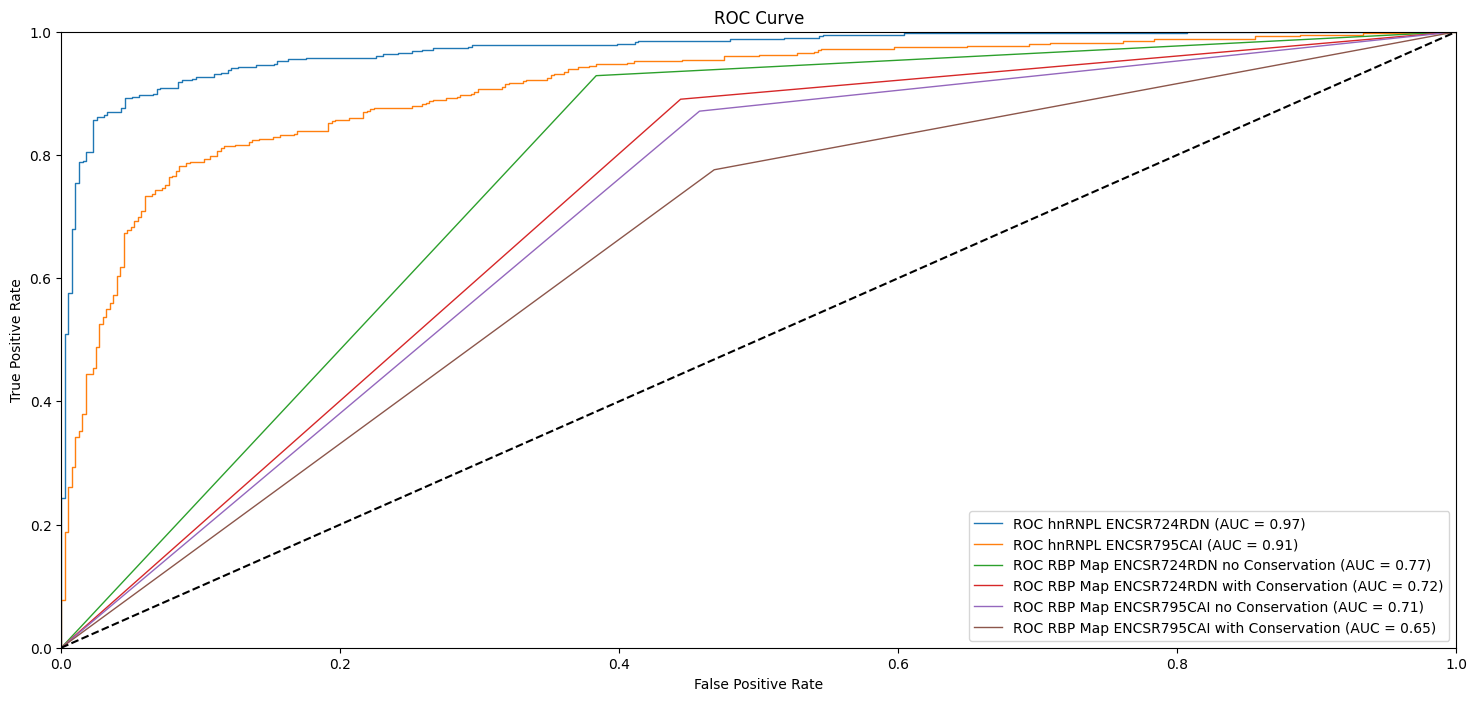

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR724RDN_model,
    hnRNPL_ENCSR724RDN_test_features,
    hnRNPL_ENCSR724RDN_test_labels,
    name=f"ROC hnRNPL ENCSR724RDN",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR795CAI_model,
    hnRNPL_ENCSR795CAI_test_features,
    hnRNPL_ENCSR795CAI_test_labels,
    name=f"ROC hnRNPL ENCSR795CAI",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR724RDN_rbp_no_conservation,
    hnRNPL_ENCSR724RDN_true_labels,
    name=f"ROC RBP Map ENCSR724RDN no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR724RDN_rbp_with_conservation,
    hnRNPL_ENCSR724RDN_true_labels,
    name=f"ROC RBP Map ENCSR724RDN with Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR795CAI_rbp_no_conservation,
    hnRNPL_ENCSR795CAI_true_labels,
    name=f"ROC RBP Map ENCSR795CAI no Conservation",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_predictions(
    hnRNPL_ENCSR795CAI_rbp_with_conservation,
    hnRNPL_ENCSR795CAI_true_labels,
    name=f"ROC RBP Map ENCSR795CAI with Conservation",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Compare model weights

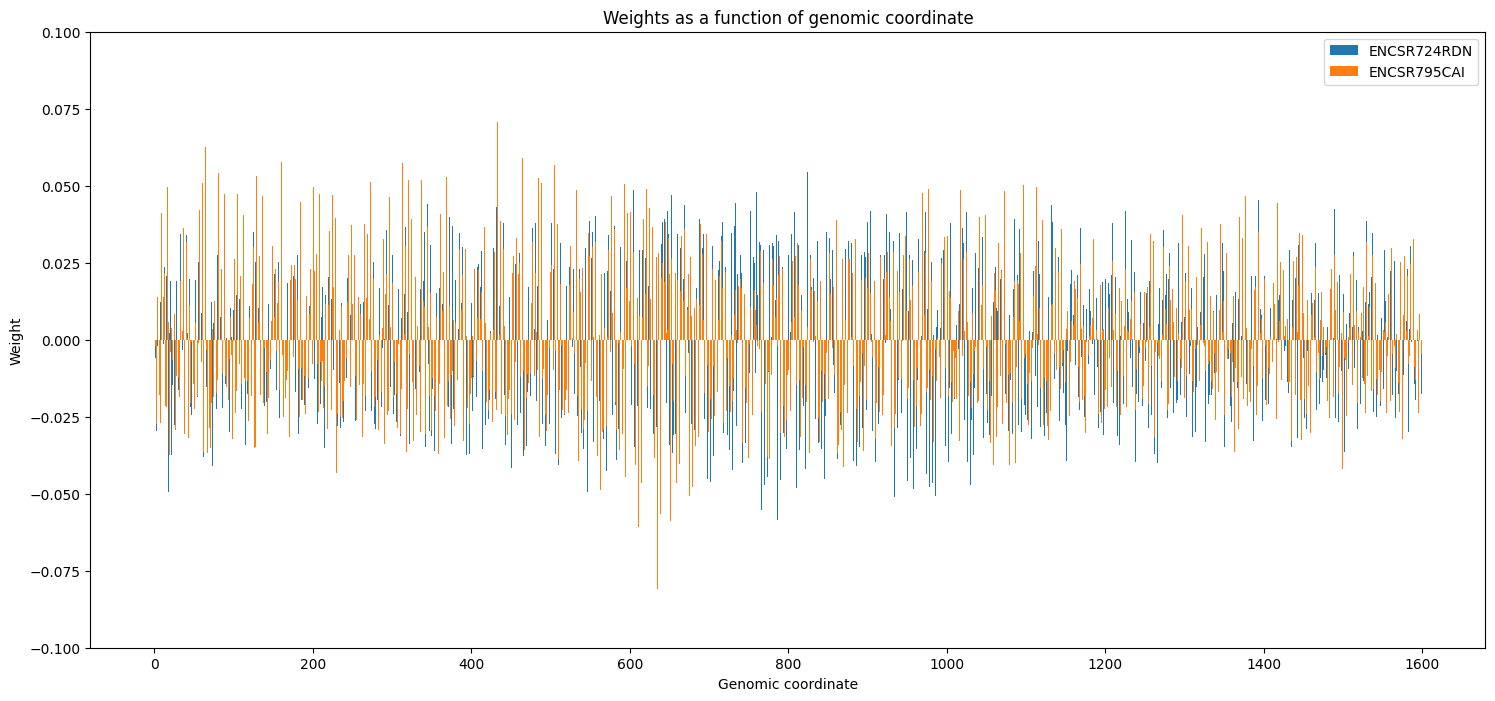

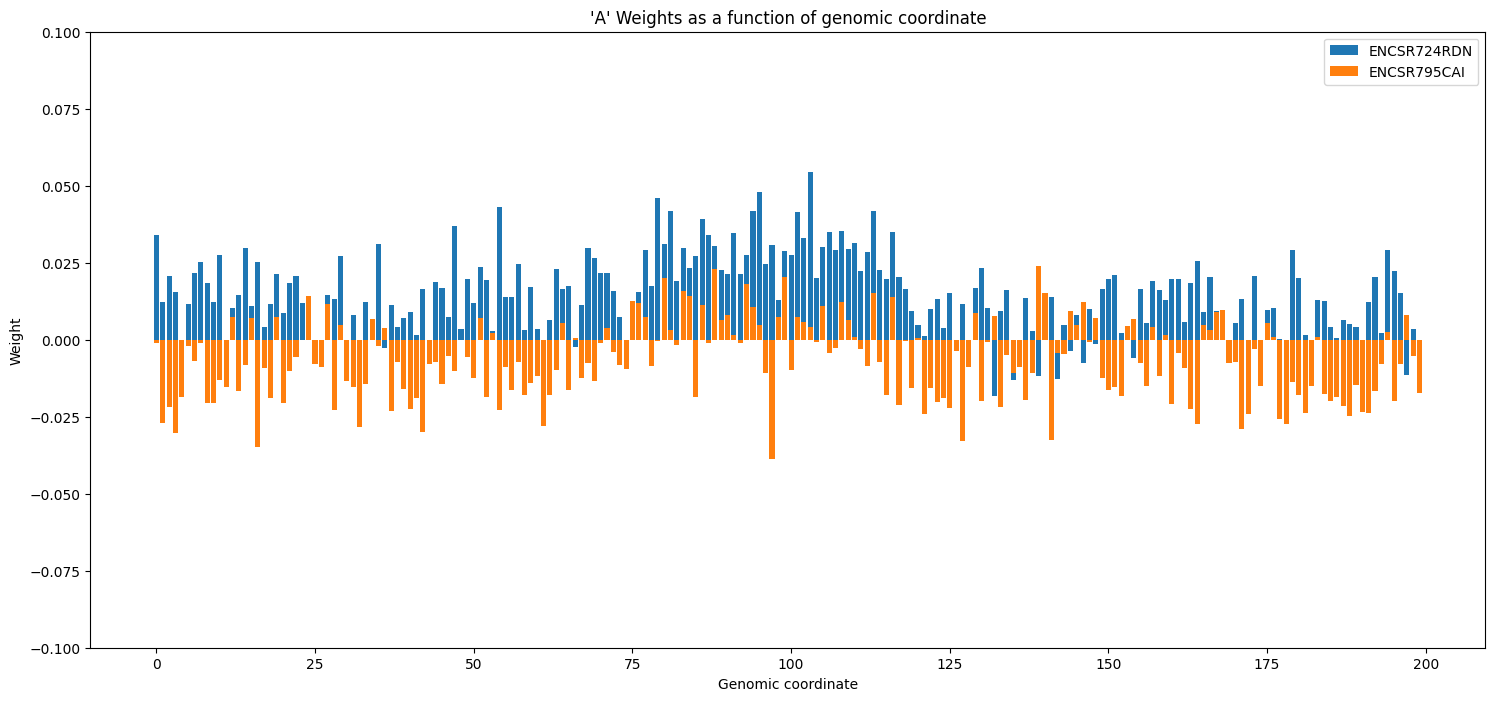

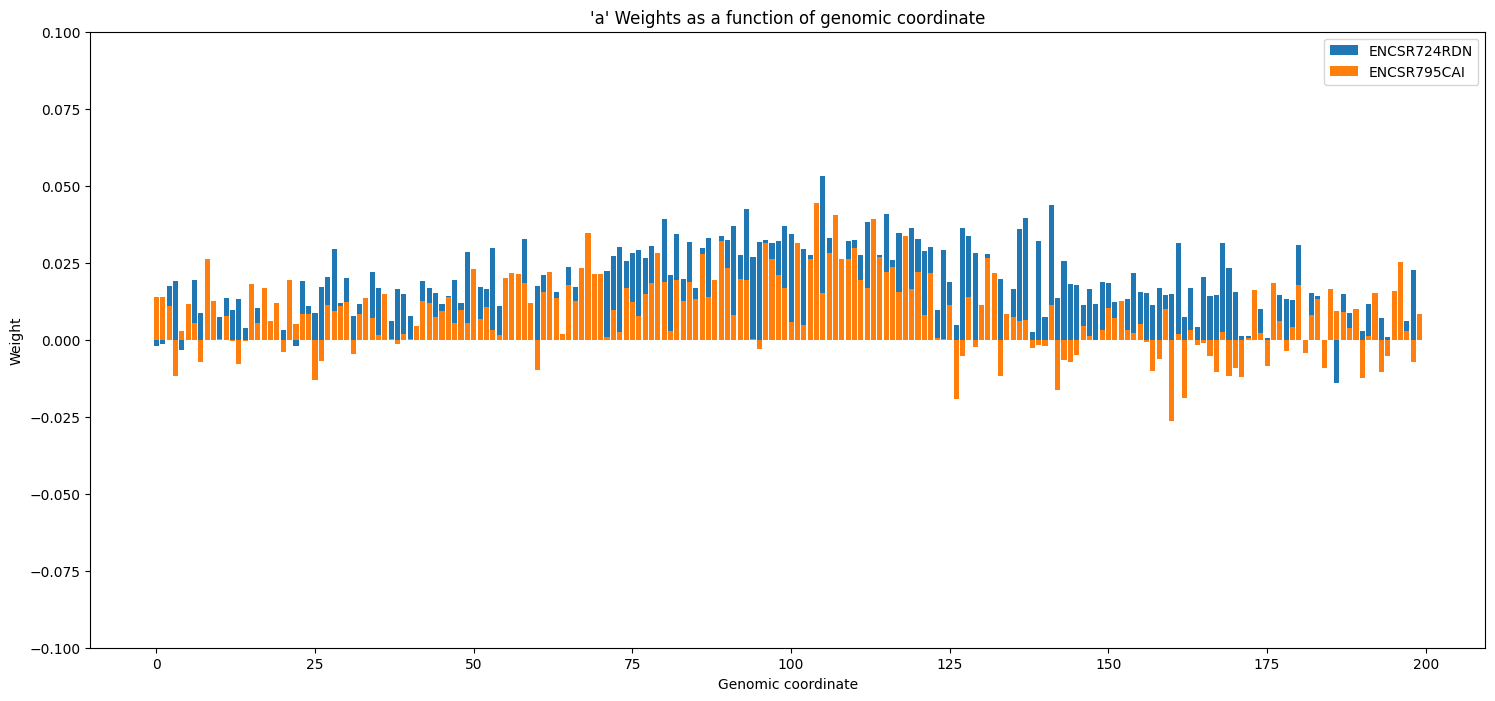

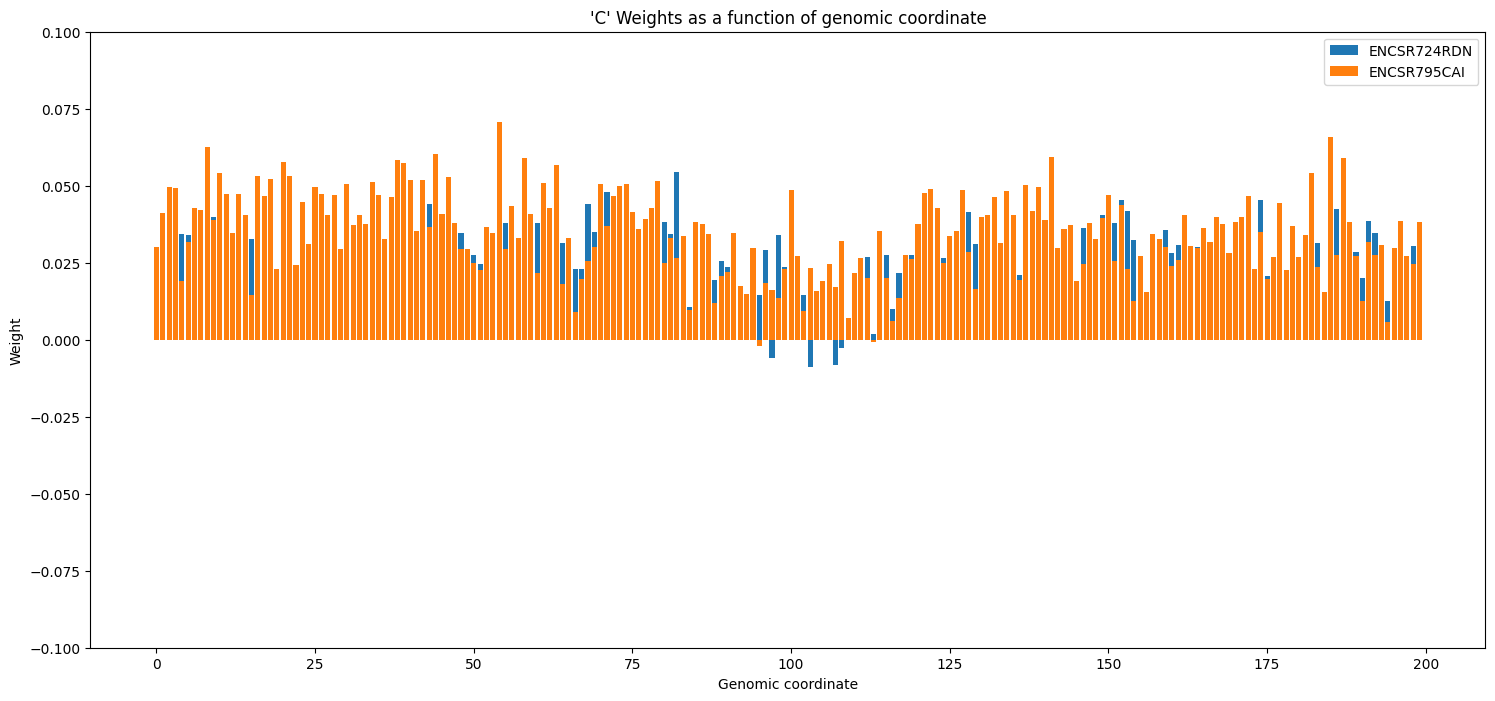

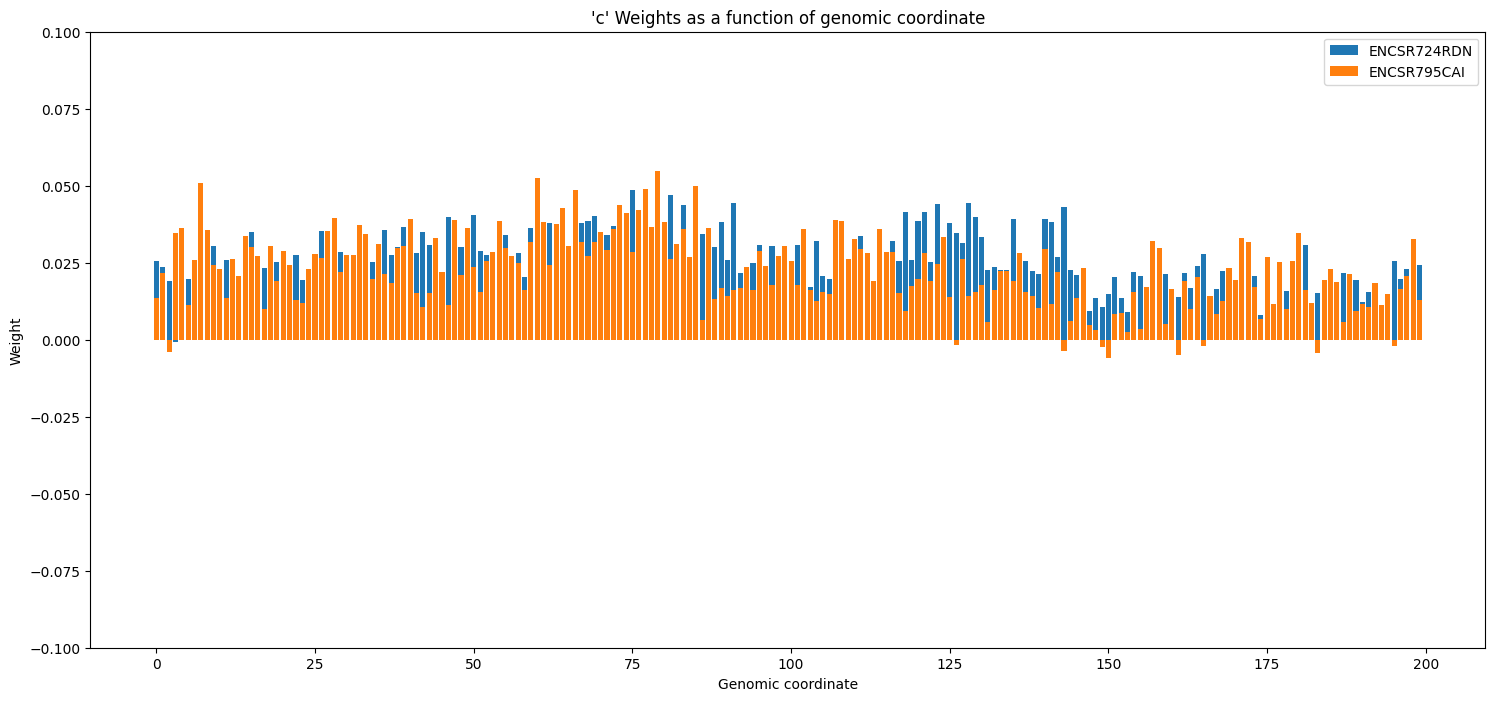

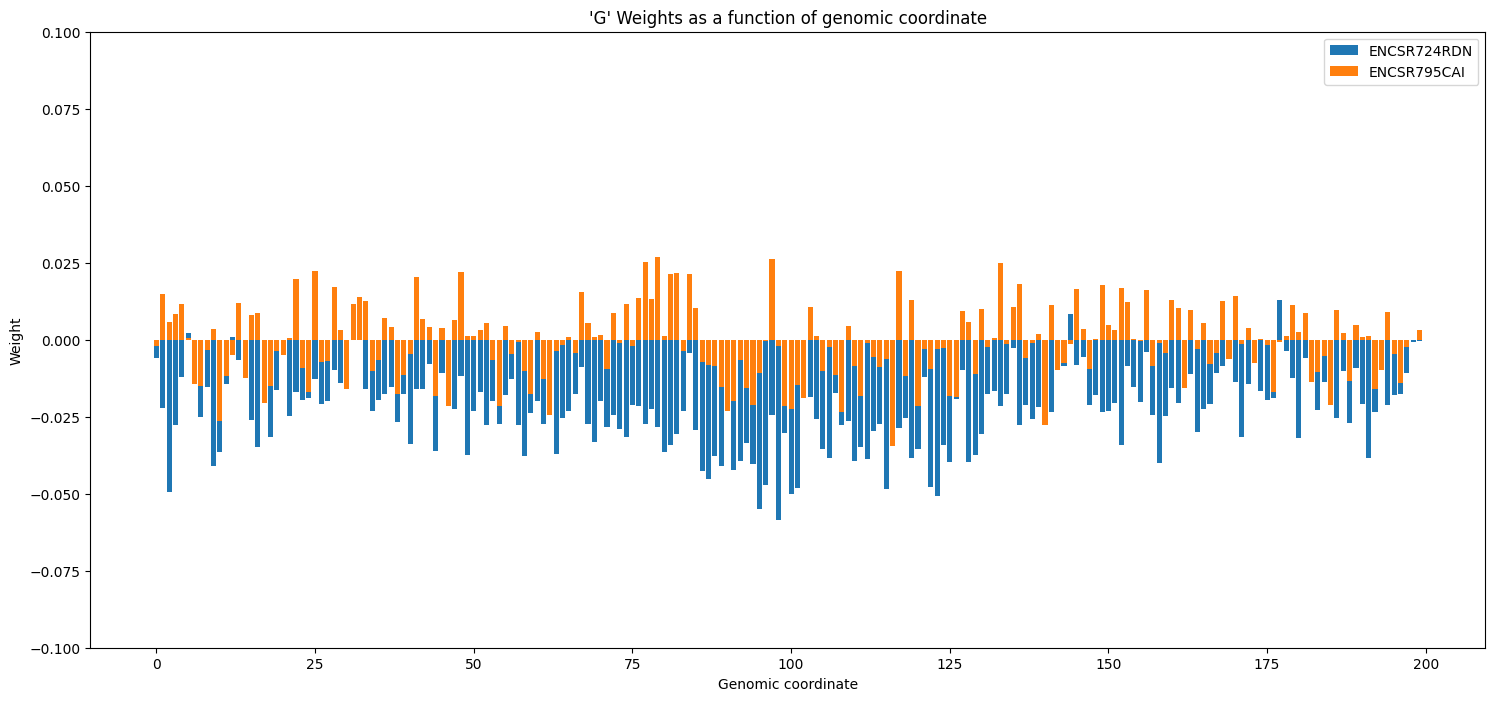

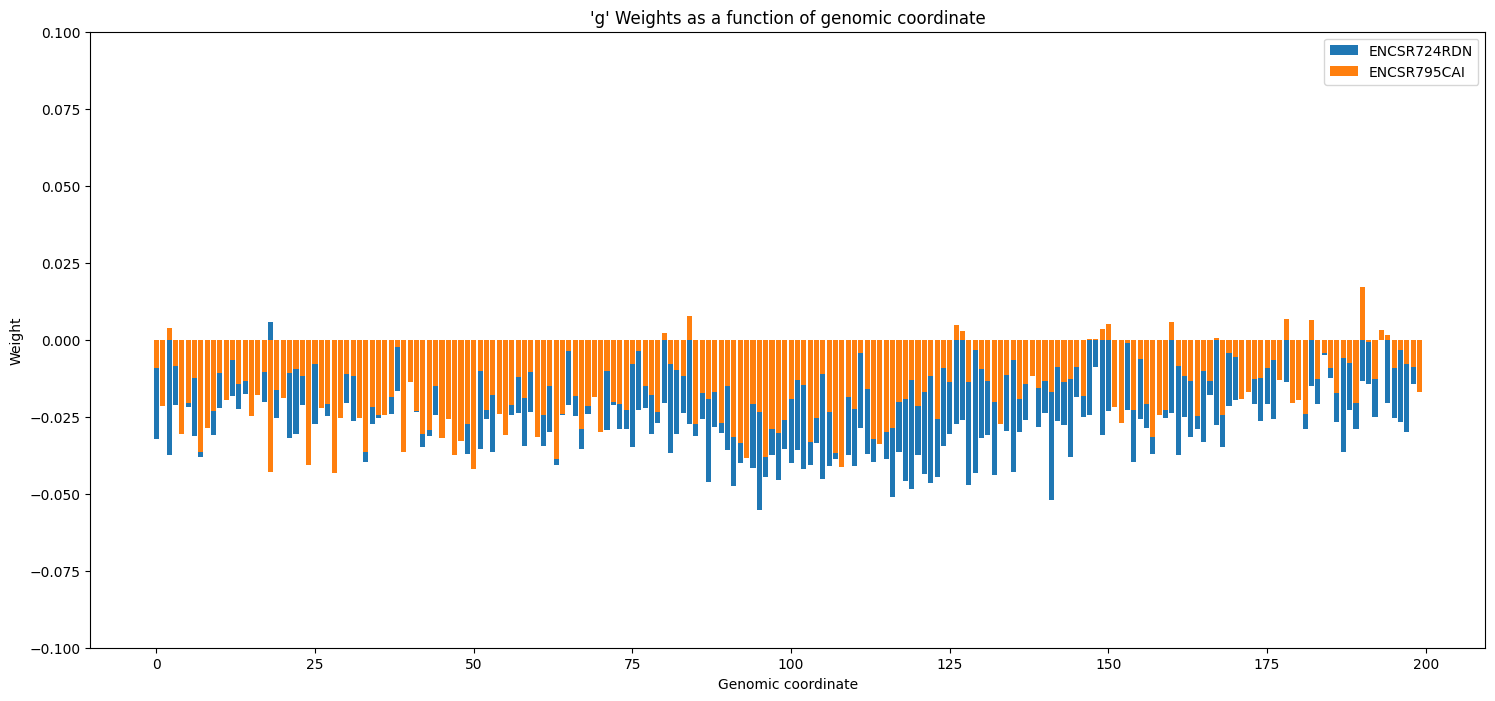

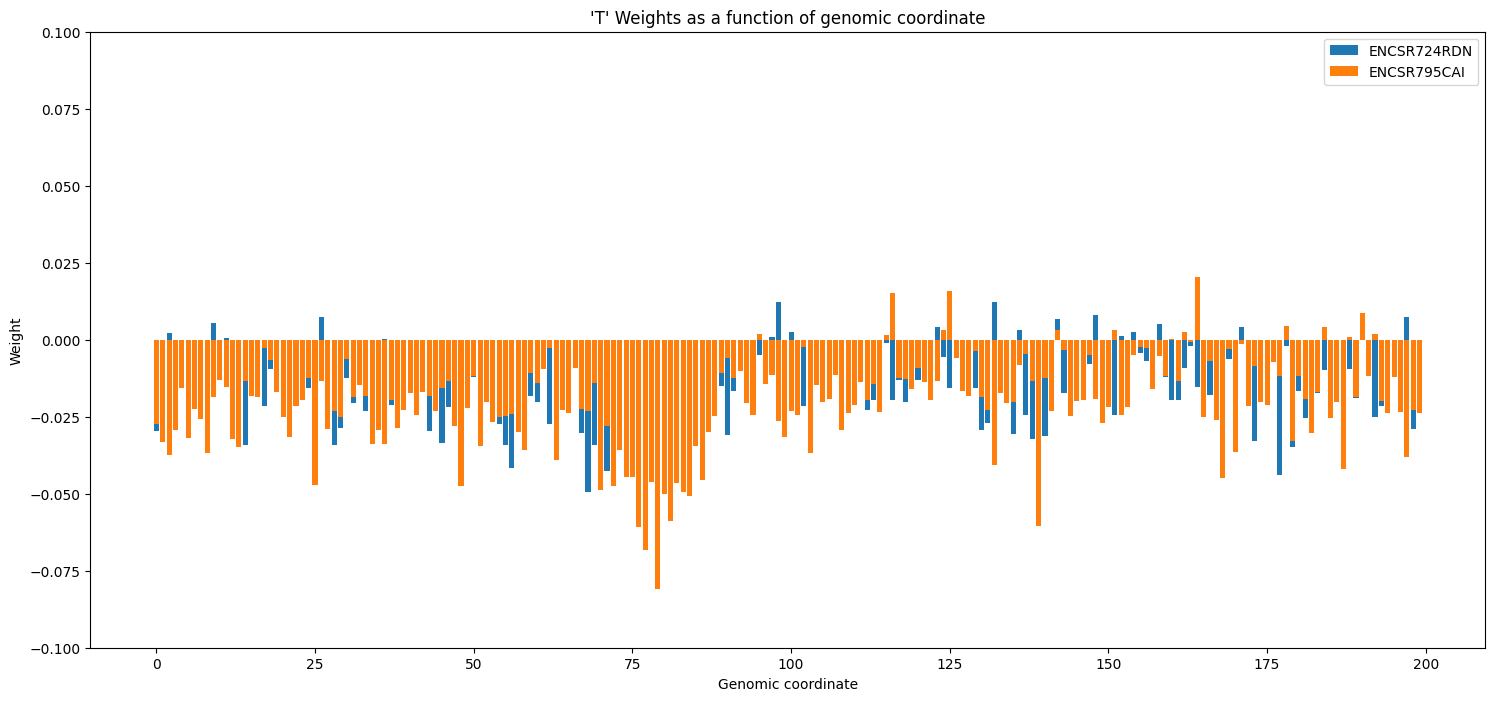

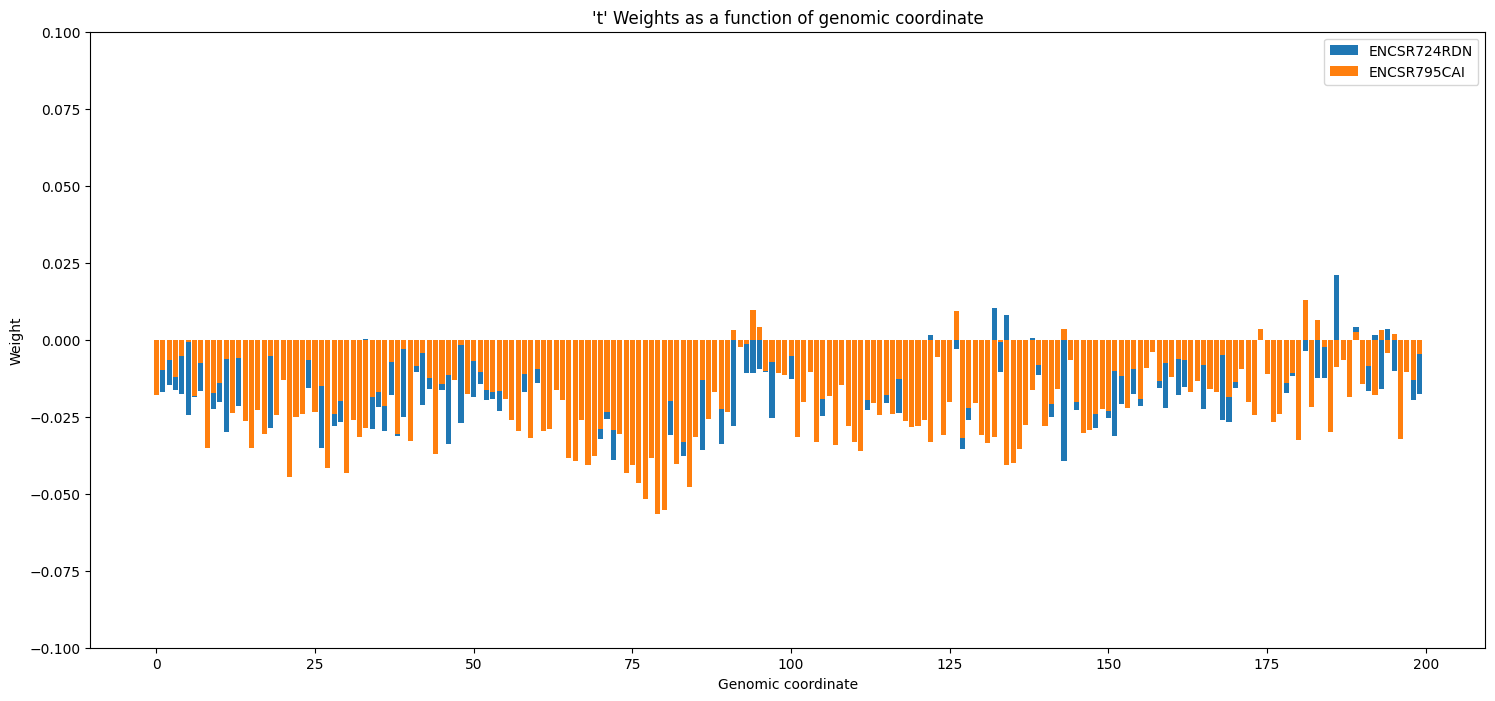

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_weights)), hnRNPL_ENCSR724RDN_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_weights)), hnRNPL_ENCSR795CAI_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_A_weights)), hnRNPL_ENCSR724RDN_A_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_A_weights)), hnRNPL_ENCSR795CAI_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_a_weights)), hnRNPL_ENCSR724RDN_a_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_a_weights)), hnRNPL_ENCSR795CAI_a_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_C_weights)), hnRNPL_ENCSR724RDN_C_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_C_weights)), hnRNPL_ENCSR795CAI_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_c_weights)), hnRNPL_ENCSR724RDN_c_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_c_weights)), hnRNPL_ENCSR795CAI_c_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_G_weights)), hnRNPL_ENCSR724RDN_G_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_G_weights)), hnRNPL_ENCSR795CAI_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_g_weights)), hnRNPL_ENCSR724RDN_g_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_g_weights)), hnRNPL_ENCSR795CAI_g_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_T_weights)), hnRNPL_ENCSR724RDN_T_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_T_weights)), hnRNPL_ENCSR795CAI_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_t_weights)), hnRNPL_ENCSR724RDN_t_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_t_weights)), hnRNPL_ENCSR795CAI_t_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

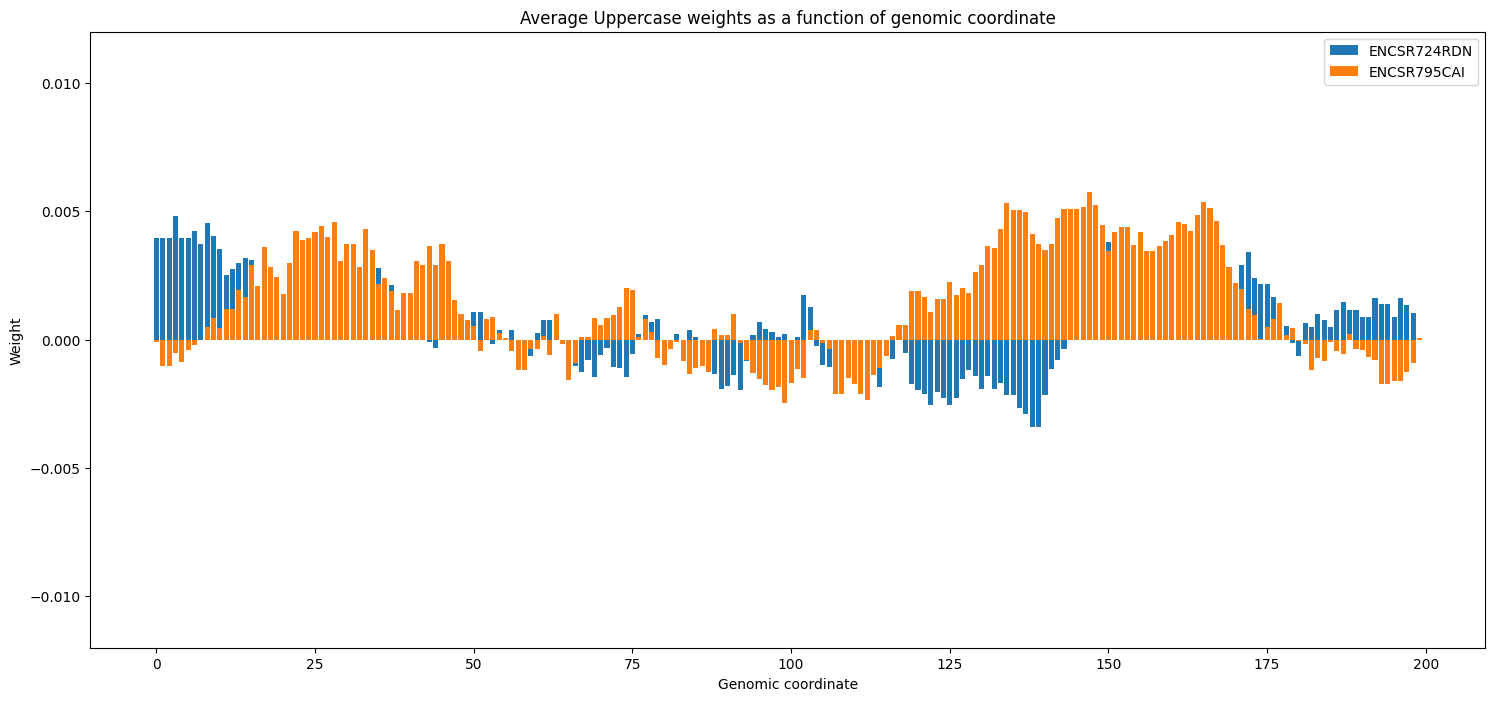

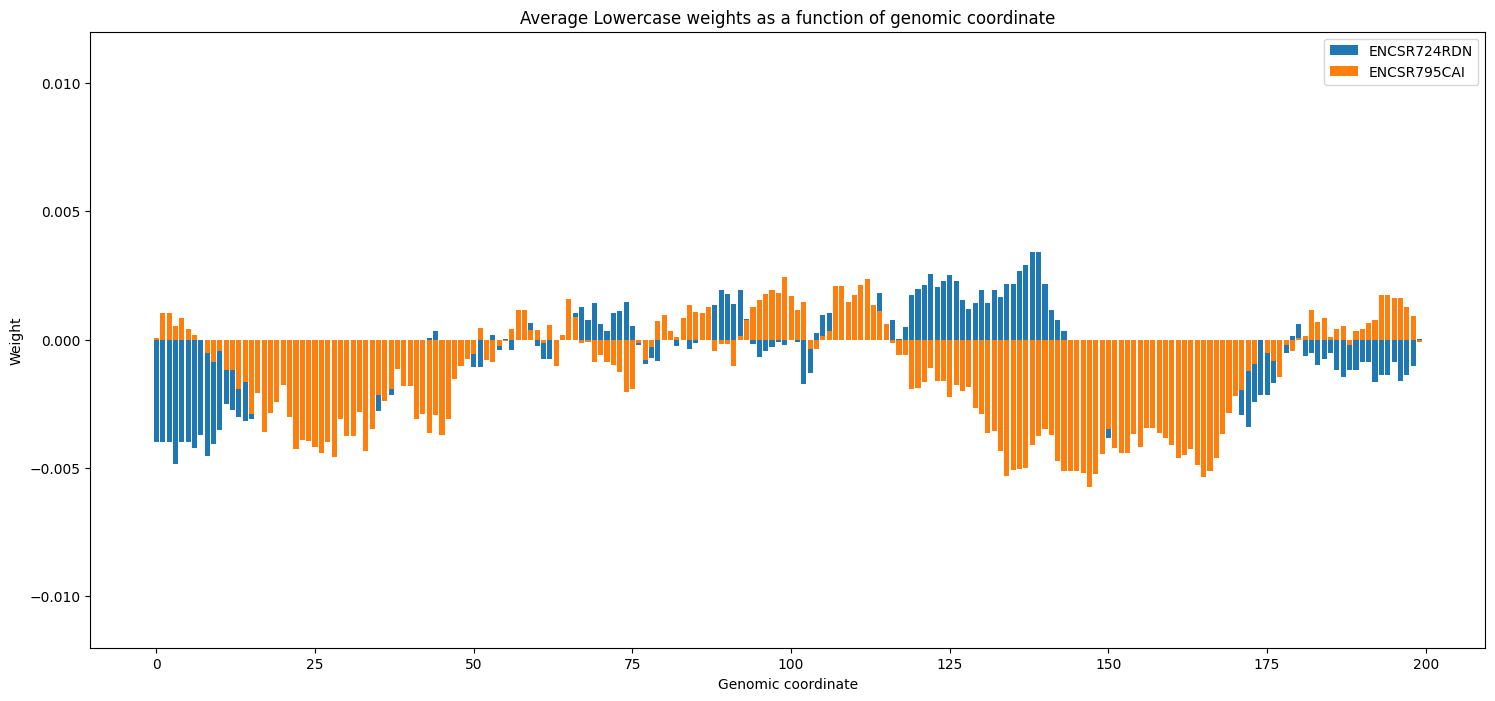

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_avg_uppercase_weights)), hnRNPL_ENCSR724RDN_avg_uppercase_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_avg_uppercase_weights)), hnRNPL_ENCSR795CAI_avg_uppercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(hnRNPL_ENCSR724RDN_avg_lowercase_weights)), hnRNPL_ENCSR724RDN_avg_lowercase_weights)
plt.bar(range(len(hnRNPL_ENCSR795CAI_avg_lowercase_weights)), hnRNPL_ENCSR795CAI_avg_lowercase_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.legend(['ENCSR724RDN', 'ENCSR795CAI'])
plt.ylim([-0.012, 0.012])
plt.show()

# Compare All Proteins

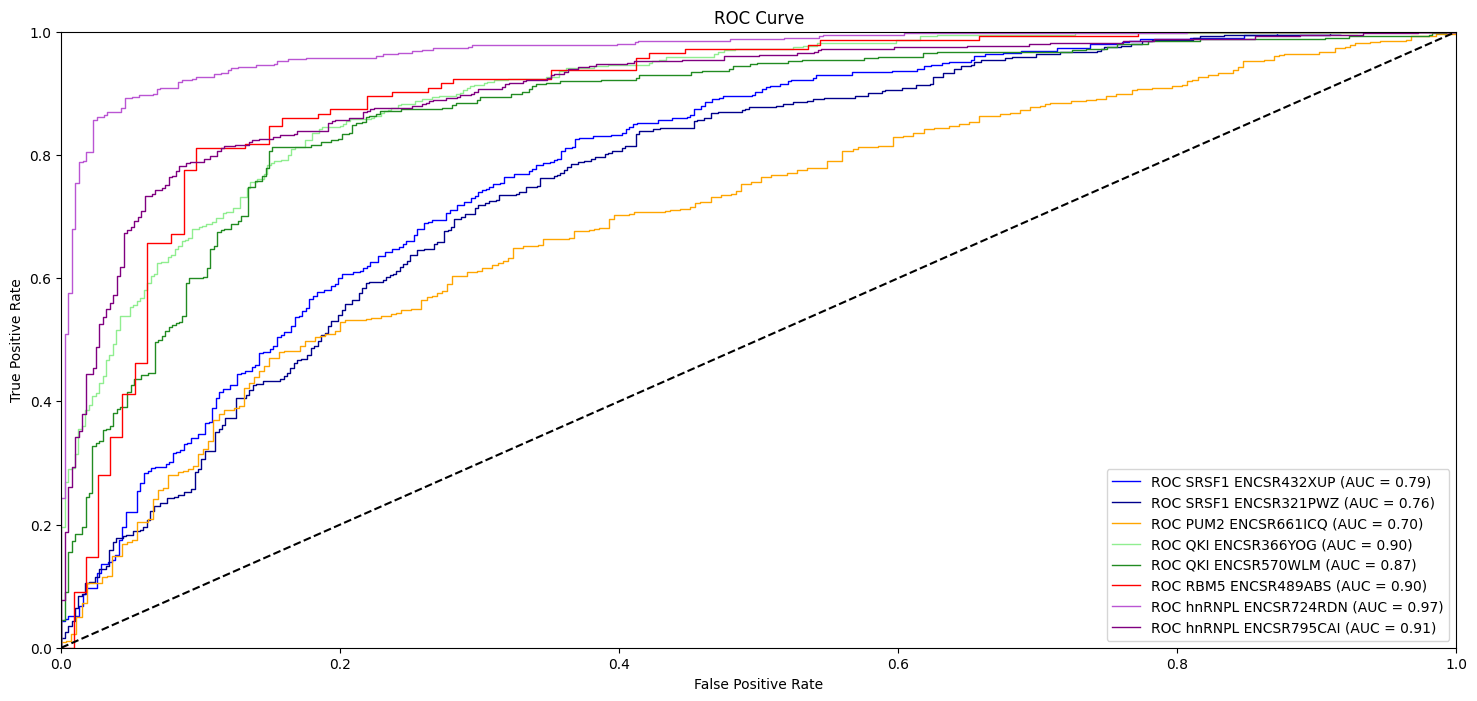

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR432XUP_model,
    SRSF1_ENCSR432XUP_test_features,
    SRSF1_ENCSR432XUP_test_labels,
    name=f"ROC SRSF1 ENCSR432XUP",
    color="blue",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR321PWZ_model,
    SRSF1_ENCSR321PWZ_test_features,
    SRSF1_ENCSR321PWZ_test_labels,
    name=f"ROC SRSF1 ENCSR321PWZ",
    color="darkblue",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    PUM2_ENCSR661ICQ_model,
    PUM2_ENCSR661ICQ_test_features,
    PUM2_ENCSR661ICQ_test_labels,
    name=f"ROC PUM2 ENCSR661ICQ",
    color="orange",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR366YOG_model,
    QKI_ENCSR366YOG_test_features,
    QKI_ENCSR366YOG_test_labels,
    name=f"ROC QKI ENCSR366YOG",
    color="lightgreen",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR570WLM_model,
    QKI_ENCSR570WLM_test_features,
    QKI_ENCSR570WLM_test_labels,
    name=f"ROC QKI ENCSR570WLM",
    color="forestgreen",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    RBM5_ENCSR489ABS_model,
    RBM5_ENCSR489ABS_test_features,
    RBM5_ENCSR489ABS_test_labels,
    name=f"ROC RBM5 ENCSR489ABS",
    color="red",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR724RDN_model,
    hnRNPL_ENCSR724RDN_test_features,
    hnRNPL_ENCSR724RDN_test_labels,
    name=f"ROC hnRNPL ENCSR724RDN",
    color="mediumorchid",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR795CAI_model,
    hnRNPL_ENCSR795CAI_test_features,
    hnRNPL_ENCSR795CAI_test_labels,
    name=f"ROC hnRNPL ENCSR795CAI",
    color="purple",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)
ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Compare all model weights

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


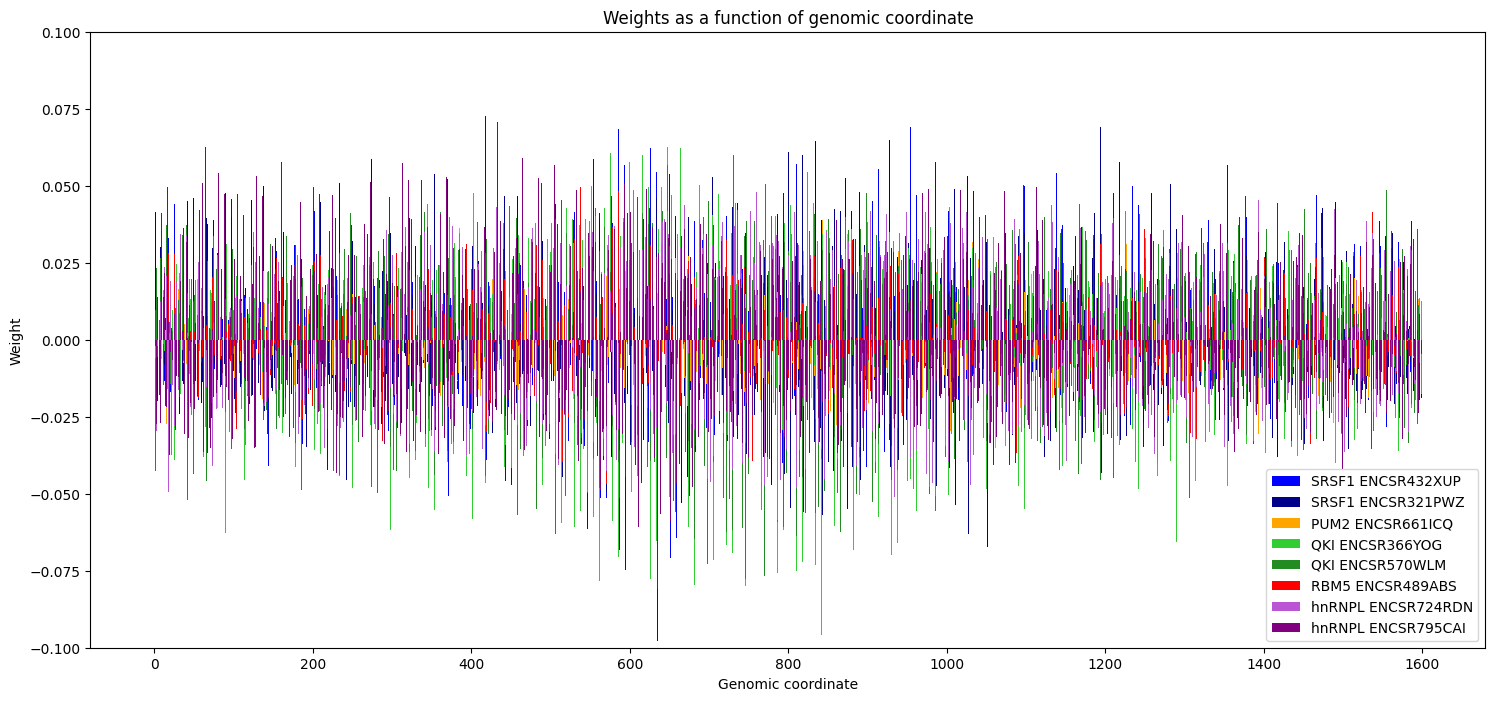

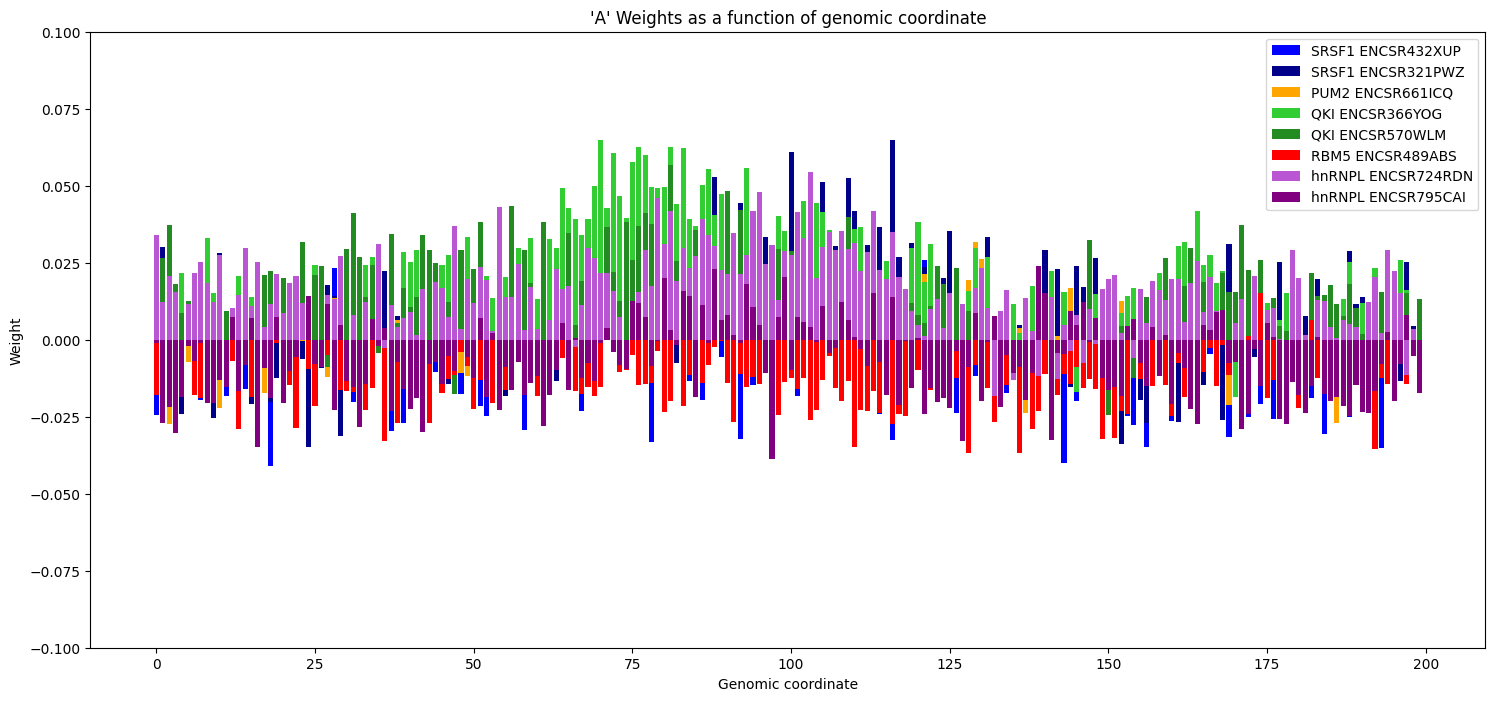

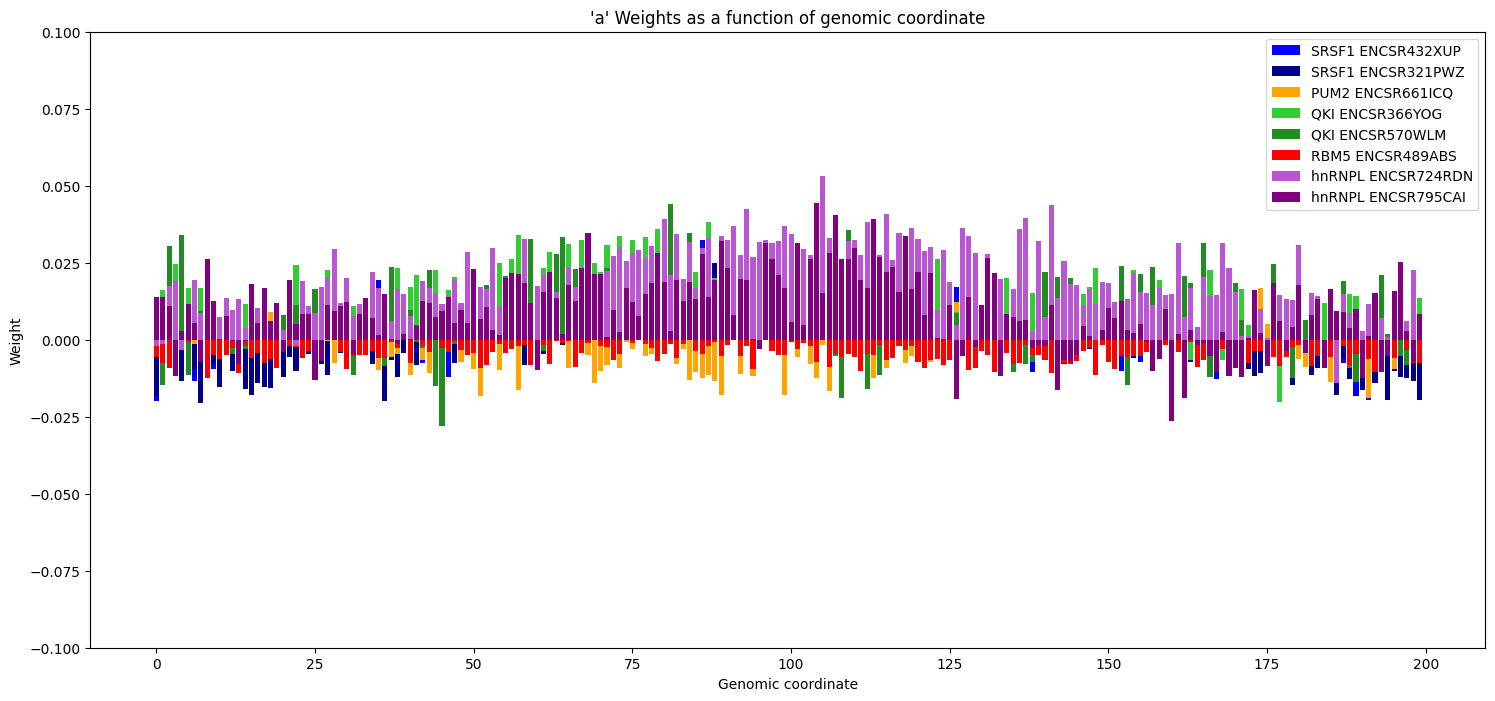

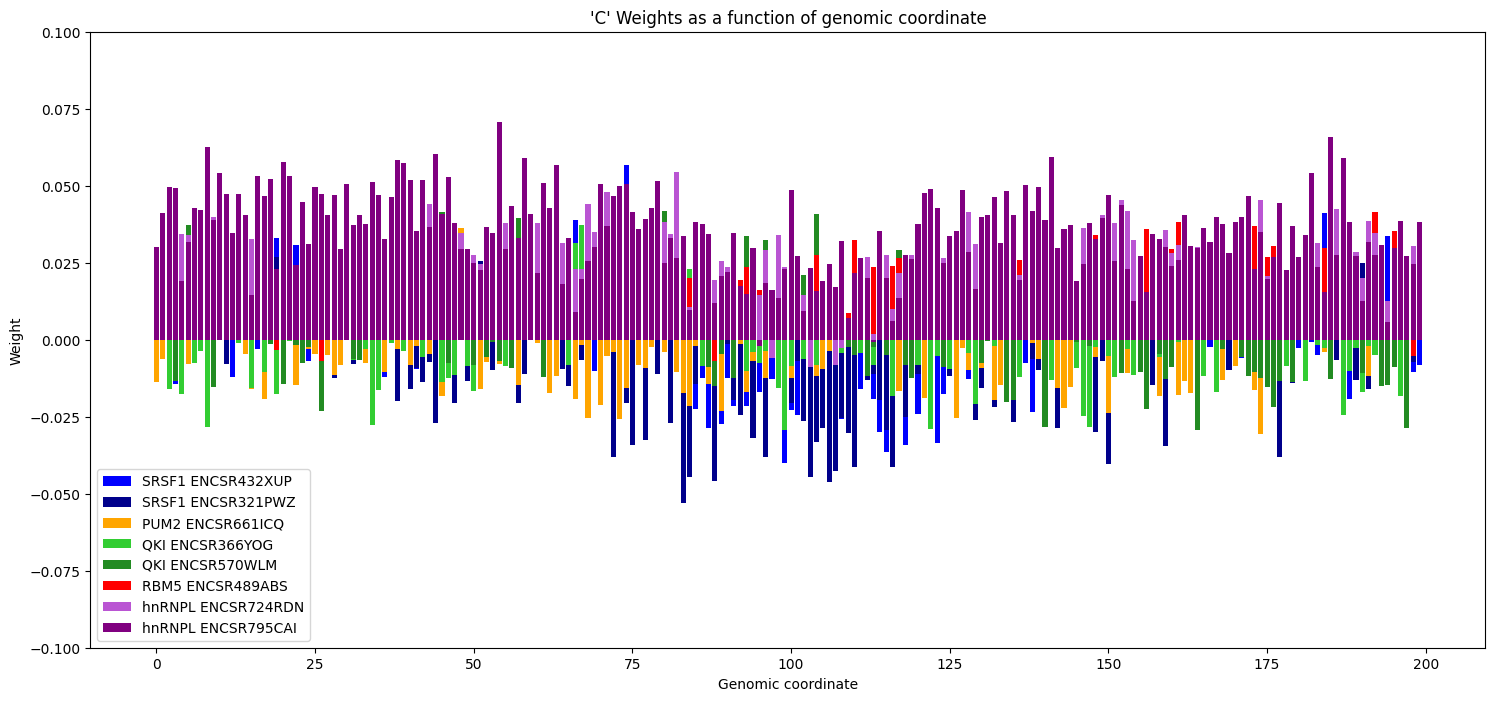

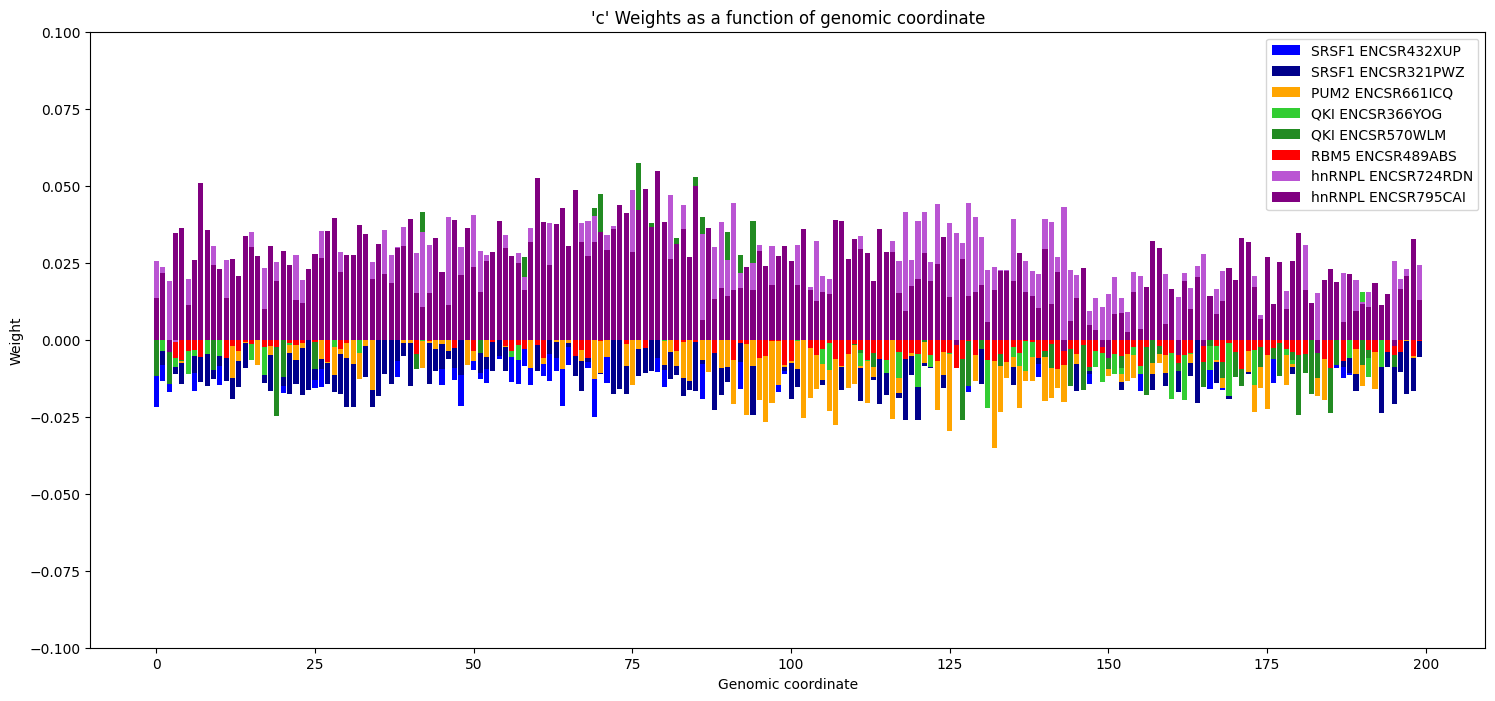

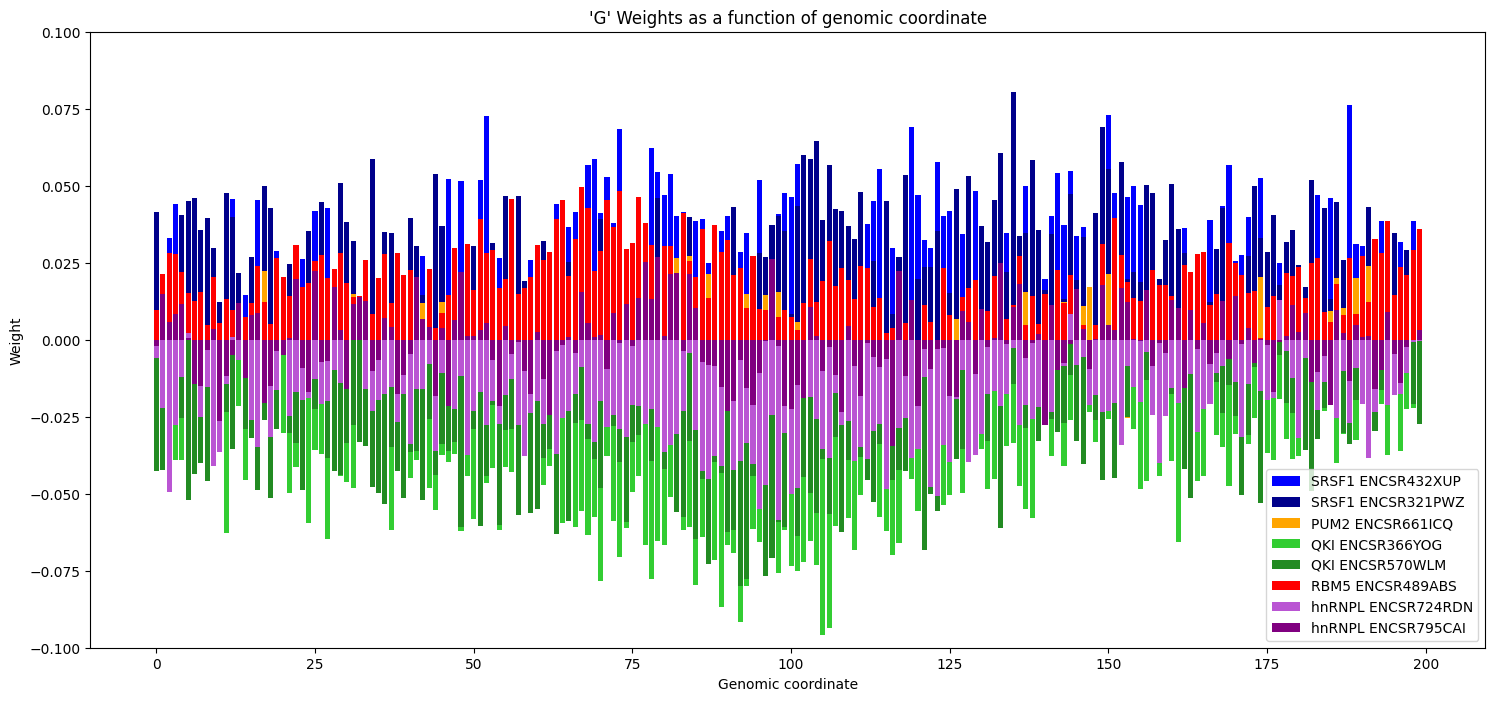

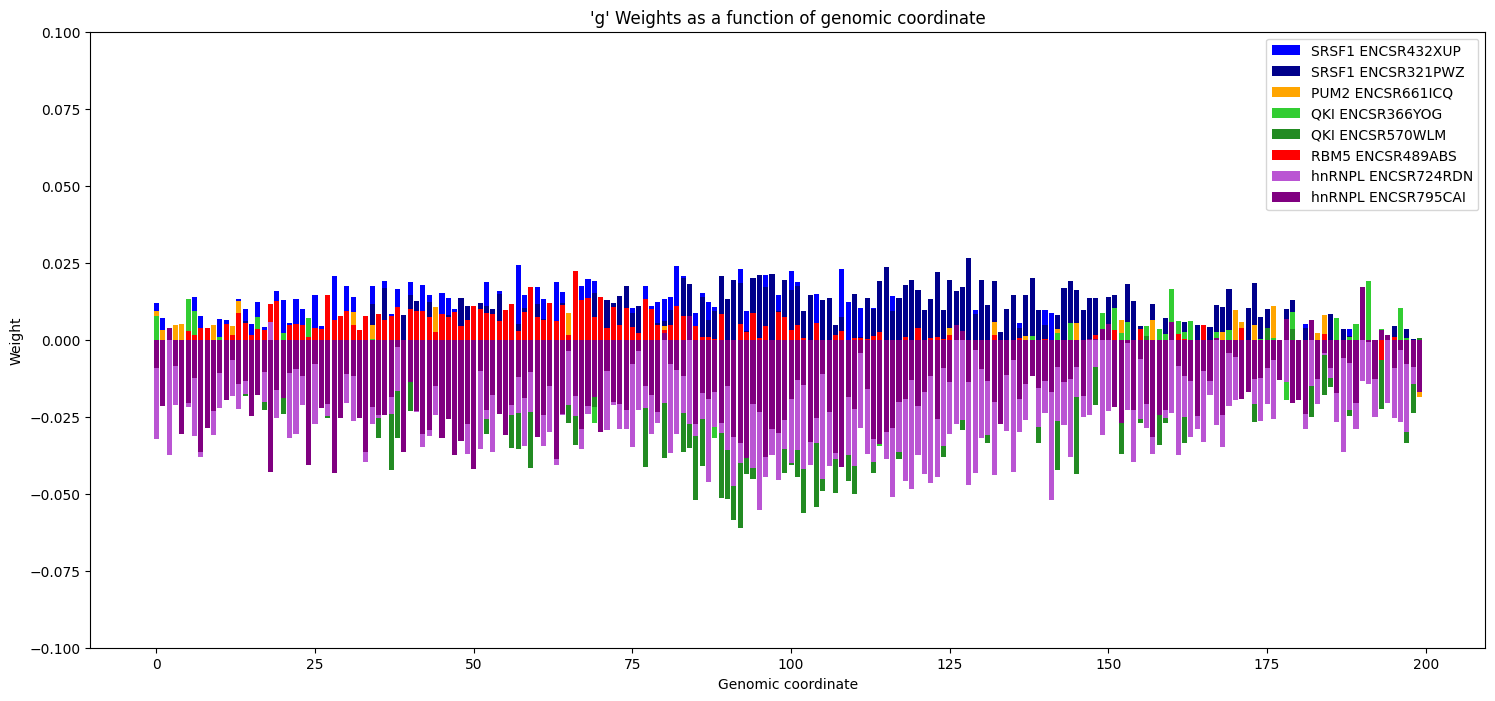

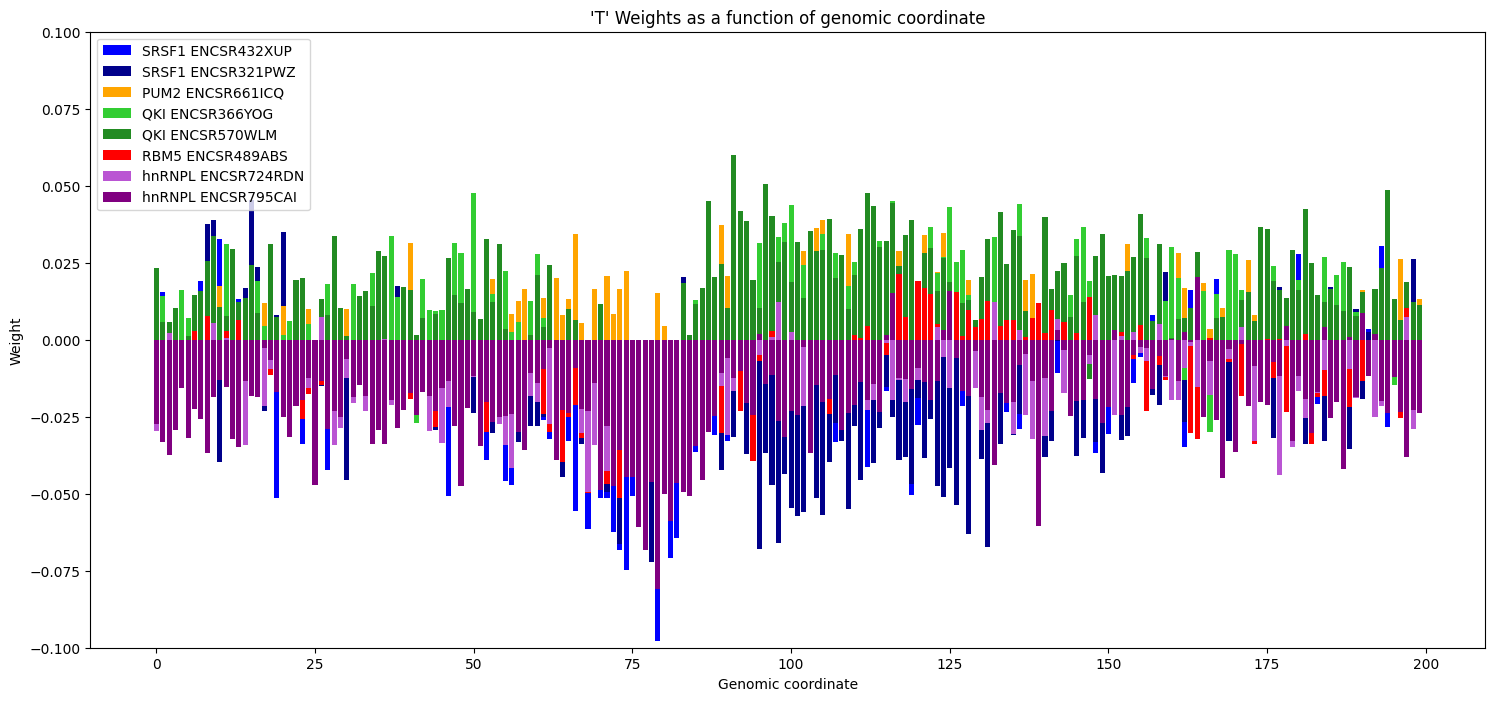

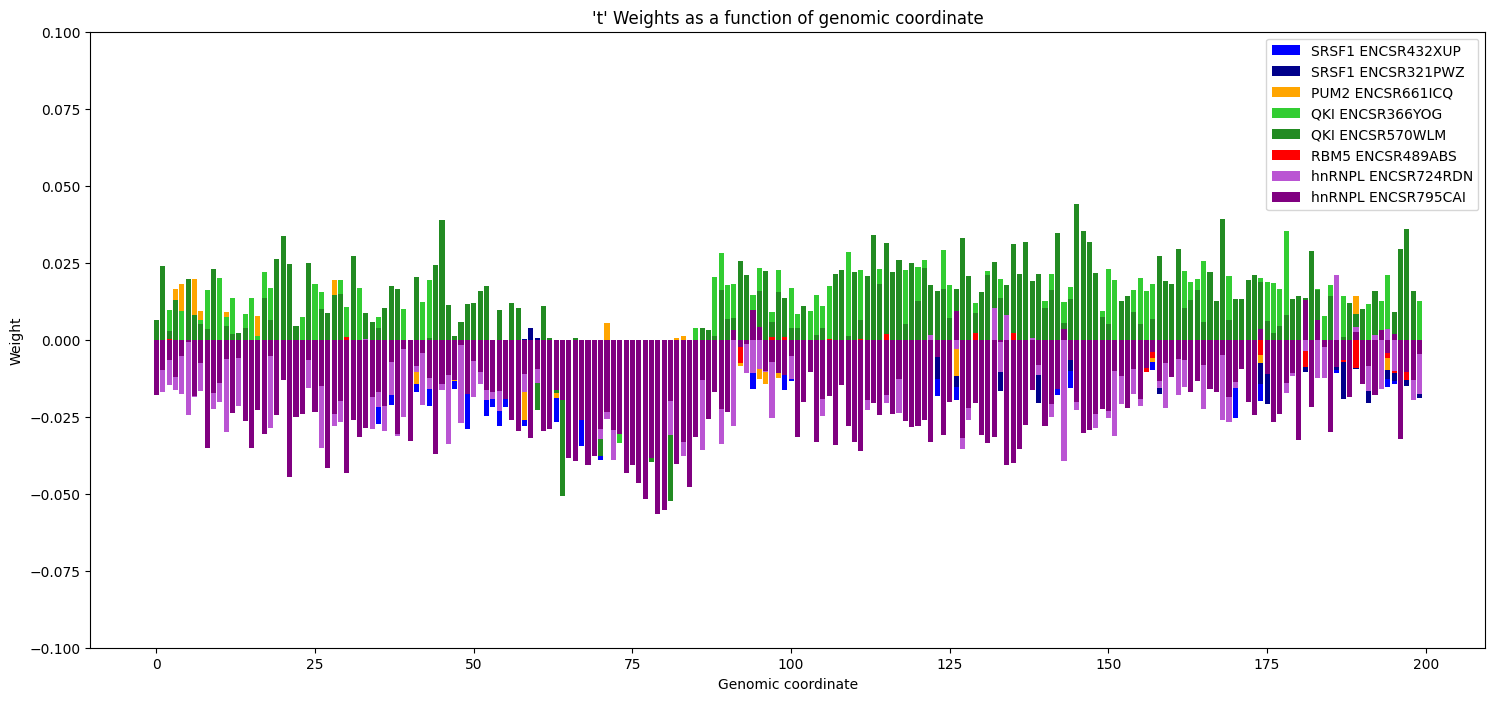

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_weights)), SRSF1_ENCSR432XUP_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_weights)), SRSF1_ENCSR321PWZ_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_weights)), PUM2_ENCSR661ICQ_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_weights)), QKI_ENCSR366YOG_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_weights)), QKI_ENCSR570WLM_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_weights)), RBM5_ENCSR489ABS_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_weights)), hnRNPL_ENCSR724RDN_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_weights)), hnRNPL_ENCSR795CAI_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_A_weights)), SRSF1_ENCSR432XUP_A_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_A_weights)), SRSF1_ENCSR321PWZ_A_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_A_weights)), PUM2_ENCSR661ICQ_A_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_A_weights)), QKI_ENCSR366YOG_A_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_A_weights)), QKI_ENCSR570WLM_A_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_A_weights)), RBM5_ENCSR489ABS_A_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_A_weights)), hnRNPL_ENCSR724RDN_A_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_A_weights)), hnRNPL_ENCSR795CAI_A_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_a_weights)), SRSF1_ENCSR432XUP_a_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_a_weights)), SRSF1_ENCSR321PWZ_a_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_a_weights)), PUM2_ENCSR661ICQ_a_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_a_weights)), QKI_ENCSR366YOG_a_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_a_weights)), QKI_ENCSR570WLM_a_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_a_weights)), RBM5_ENCSR489ABS_a_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_a_weights)), hnRNPL_ENCSR724RDN_a_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_a_weights)), hnRNPL_ENCSR795CAI_a_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'a' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_C_weights)), SRSF1_ENCSR432XUP_C_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_C_weights)), SRSF1_ENCSR321PWZ_C_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_C_weights)), PUM2_ENCSR661ICQ_C_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_C_weights)), QKI_ENCSR366YOG_C_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_C_weights)), QKI_ENCSR570WLM_C_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_C_weights)), RBM5_ENCSR489ABS_C_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_C_weights)), hnRNPL_ENCSR724RDN_C_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_C_weights)), hnRNPL_ENCSR795CAI_C_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_c_weights)), SRSF1_ENCSR432XUP_c_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_c_weights)), SRSF1_ENCSR321PWZ_c_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_c_weights)), PUM2_ENCSR661ICQ_c_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_c_weights)), QKI_ENCSR366YOG_c_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_c_weights)), QKI_ENCSR570WLM_c_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_c_weights)), RBM5_ENCSR489ABS_c_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_c_weights)), hnRNPL_ENCSR724RDN_c_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_c_weights)), hnRNPL_ENCSR795CAI_c_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'c' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_G_weights)), SRSF1_ENCSR432XUP_G_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_G_weights)), SRSF1_ENCSR321PWZ_G_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_G_weights)), PUM2_ENCSR661ICQ_G_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_G_weights)), QKI_ENCSR366YOG_G_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_G_weights)), QKI_ENCSR570WLM_G_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_G_weights)), RBM5_ENCSR489ABS_G_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_G_weights)), hnRNPL_ENCSR724RDN_G_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_G_weights)), hnRNPL_ENCSR795CAI_G_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_g_weights)), SRSF1_ENCSR432XUP_g_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_g_weights)), SRSF1_ENCSR321PWZ_g_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_g_weights)), PUM2_ENCSR661ICQ_g_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_g_weights)), QKI_ENCSR366YOG_g_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_g_weights)), QKI_ENCSR570WLM_g_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_g_weights)), RBM5_ENCSR489ABS_g_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_g_weights)), hnRNPL_ENCSR724RDN_g_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_g_weights)), hnRNPL_ENCSR795CAI_g_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'g' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_T_weights)), SRSF1_ENCSR432XUP_T_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_T_weights)), SRSF1_ENCSR321PWZ_T_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_T_weights)), PUM2_ENCSR661ICQ_T_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_T_weights)), QKI_ENCSR366YOG_T_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_T_weights)), QKI_ENCSR570WLM_T_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_T_weights)), RBM5_ENCSR489ABS_T_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_T_weights)), hnRNPL_ENCSR724RDN_T_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_T_weights)), hnRNPL_ENCSR795CAI_T_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_t_weights)), SRSF1_ENCSR432XUP_t_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_t_weights)), SRSF1_ENCSR321PWZ_t_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_t_weights)), PUM2_ENCSR661ICQ_t_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_t_weights)), QKI_ENCSR366YOG_t_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_t_weights)), QKI_ENCSR570WLM_t_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_t_weights)), RBM5_ENCSR489ABS_t_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_t_weights)), hnRNPL_ENCSR724RDN_t_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_t_weights)), hnRNPL_ENCSR795CAI_t_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'t' Weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.1, 0.1])
plt.show()

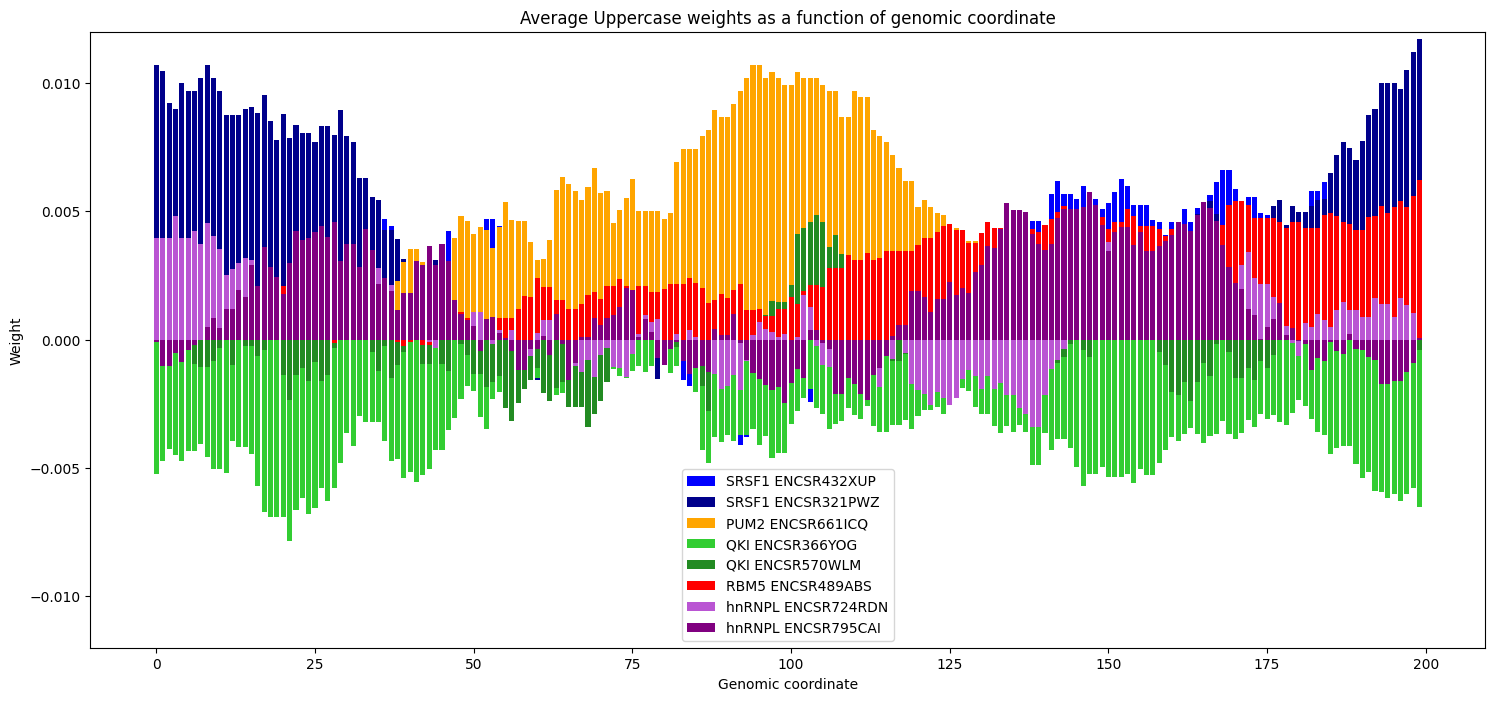

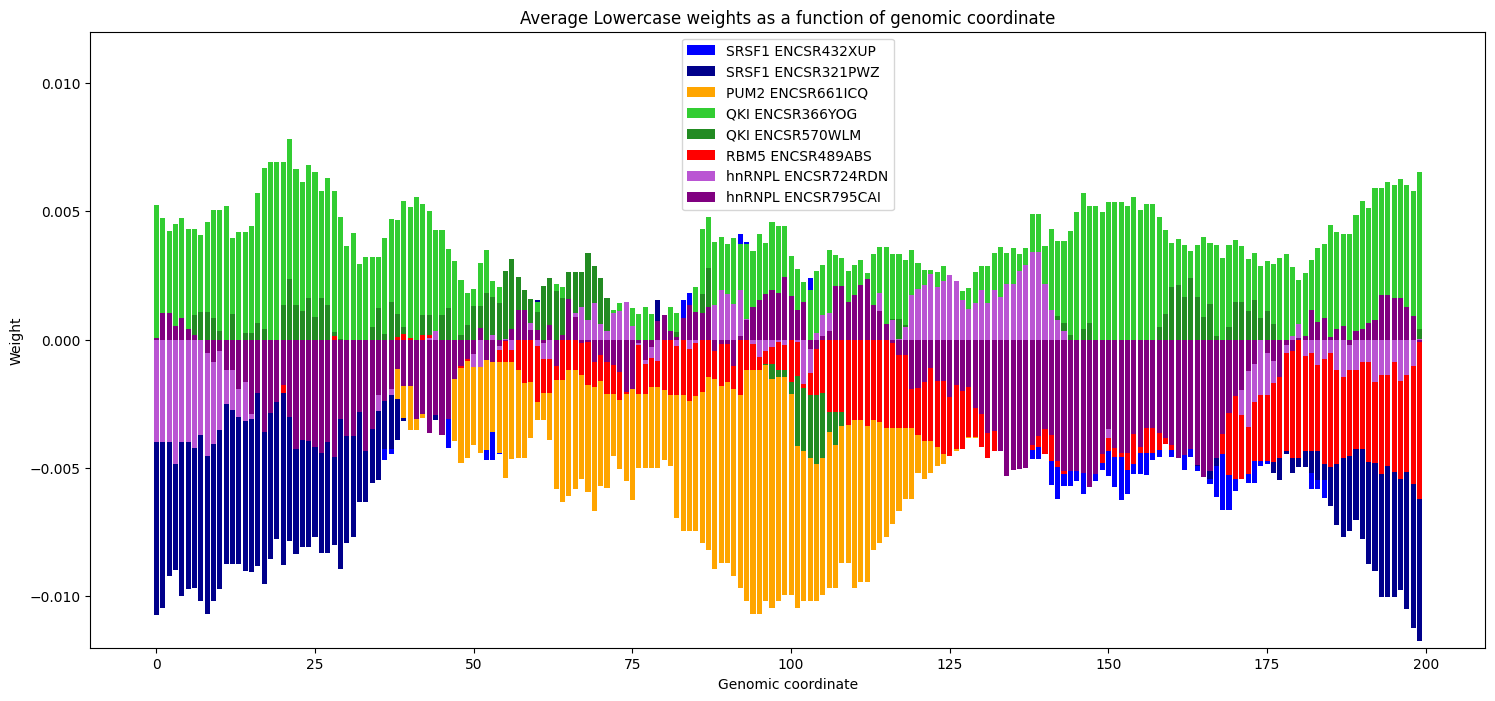

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_uppercase_weights)), SRSF1_ENCSR432XUP_avg_uppercase_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_avg_uppercase_weights)), SRSF1_ENCSR321PWZ_avg_uppercase_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_avg_uppercase_weights)), PUM2_ENCSR661ICQ_avg_uppercase_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_avg_uppercase_weights)), QKI_ENCSR366YOG_avg_uppercase_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_avg_uppercase_weights)), QKI_ENCSR570WLM_avg_uppercase_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_avg_uppercase_weights)), RBM5_ENCSR489ABS_avg_uppercase_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_avg_uppercase_weights)), hnRNPL_ENCSR724RDN_avg_uppercase_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_avg_uppercase_weights)), hnRNPL_ENCSR795CAI_avg_uppercase_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Uppercase weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.012, 0.012])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_lowercase_weights)), SRSF1_ENCSR432XUP_avg_lowercase_weights, color='blue')
plt.bar(range(len(SRSF1_ENCSR321PWZ_avg_lowercase_weights)), SRSF1_ENCSR321PWZ_avg_lowercase_weights, color='darkblue')
plt.bar(range(len(PUM2_ENCSR661ICQ_avg_lowercase_weights)), PUM2_ENCSR661ICQ_avg_lowercase_weights, color='orange')
plt.bar(range(len(QKI_ENCSR366YOG_avg_lowercase_weights)), QKI_ENCSR366YOG_avg_lowercase_weights, color='limegreen')
plt.bar(range(len(QKI_ENCSR570WLM_avg_lowercase_weights)), QKI_ENCSR570WLM_avg_lowercase_weights, color='forestgreen')
plt.bar(range(len(RBM5_ENCSR489ABS_avg_lowercase_weights)), RBM5_ENCSR489ABS_avg_lowercase_weights, color='red')
plt.bar(range(len(hnRNPL_ENCSR724RDN_avg_lowercase_weights)), hnRNPL_ENCSR724RDN_avg_lowercase_weights, color='mediumorchid')
plt.bar(range(len(hnRNPL_ENCSR795CAI_avg_lowercase_weights)), hnRNPL_ENCSR795CAI_avg_lowercase_weights, color='purple')
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average Lowercase weights as a function of genomic coordinate")
plt.legend(['SRSF1 ENCSR432XUP', 'SRSF1 ENCSR321PWZ', 'PUM2 ENCSR661ICQ', 'QKI ENCSR366YOG', 'QKI ENCSR570WLM', 'RBM5 ENCSR489ABS', 'hnRNPL ENCSR724RDN', 'hnRNPL ENCSR795CAI'])
plt.ylim([-0.012, 0.012])
plt.show()